In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [3]:
df = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf_hs_sphs.csv', index_col=0)
dff = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf1_hs_sphs.csv', index_col=0)
dff

travel time   distance  hour of day  living_street  motorway  \
0             2171  10972.721           18            0.0       0.0   
1              799  11089.693           21            0.0       0.0   
2              698  11062.494           19            0.0       0.0   
3              806  11384.159           17            0.0       0.0   
4              721  11785.827           17            0.0       0.0   
...            ...        ...          ...            ...       ...   
16226         1700  22341.337            8            0.0       0.0   
16227         1337  21957.802           22            0.0       0.0   
16228         1240  22461.781            1            0.0       0.0   
16229         1266  22737.294            3            0.0       0.0   
16230         1216  22127.191           23            0.0       0.0   

       motorway_link    primary  primary_link  residential  road  secondary  \
0                0.0   8720.782       384.698        0.000   0.0      0.000   
1                0.0   9565.882       384.698       25.175   0.0      0.000   
2                0.0   9206.024       384.698        0.000   0.0      0.000   
3                0.0   9427.408       384.698      156.129   0.0      0.000   
4                0.0   9206.024       384.698       81.136   0.0      0.000   
...              ...        ...           ...          ...   ...        ...   
16226            0.0  18514.226         0.000        0.000   0.0   1041.825   
16227            0.0  18514.226         0.000       85.594   0.0    858.916   
16228            0.0  18514.226         0.000        0.000   0.0   1041.825   
16229            0.0  18514.226         0.000      275.513   0.0   1041.825   
16230            0.0  18514.226         0.000       72.074   0.0   1041.825   

       secondary_link  service  tertiary  track  trunk  trunk_link  \
0                 0.0  357.834   691.246    0.0    0.0         0.0   
1                 0.0    0.000  1011.418    0.0    0.0         0.0   
2                 0.0  357.834  1011.418    0.0    0.0         0.0   
3                 0.0  546.686   766.718    0.0    0.0         0.0   
4                 0.0  630.686  1380.763    0.0    0.0         0.0   
...               ...      ...       ...    ...    ...         ...   
16226             0.0    0.000  2785.286    0.0    0.0         0.0   
16227             0.0    0.000  2499.066    0.0    0.0         0.0   
16228             0.0    0.000  2905.730    0.0    0.0         0.0   
16229             0.0    0.000  2905.730    0.0    0.0         0.0   
16230             0.0    0.000  2499.066    0.0    0.0         0.0   

       unclassified  others  
0           818.161     0.0  
1           102.520     0.0  
2           102.520     0.0  
3           102.520     0.0  
4           102.520     0.0  
...             ...     ...  
16226         0.000     0.0  
16227         0.000     0.0  
16228         0.000     0.0  
16229         0.000     0.0  
16230         0.000     0.0  

[16231 rows x 19 columns]

In [4]:
df

travel time   distance  hour of day 1st ranked    2nd ranked  \
0             2171  10972.721           18    primary  unclassified   
1              799  11089.693           21    primary      tertiary   
2              698  11062.494           19    primary      tertiary   
3              806  11384.159           17    primary      tertiary   
4              721  11785.827           17    primary      tertiary   
...            ...        ...          ...        ...           ...   
16226         1700  22341.337            8    primary      tertiary   
16227         1337  21957.802           22    primary      tertiary   
16228         1240  22461.781            1    primary      tertiary   
16229         1266  22737.294            3    primary      tertiary   
16230         1216  22127.191           23    primary      tertiary   

         3rd ranked     4d ranked    5th ranked    6th ranked  1st dist  \
0          tertiary  primary_link       service           NaN  0.794769   
1      primary_link  unclassified   residential           NaN  0.862592   
2      primary_link       service  unclassified           NaN  0.832183   
3           service  primary_link   residential  unclassified  0.828116   
4           service  primary_link  unclassified   residential  0.781110   
...             ...           ...           ...           ...       ...   
16226     secondary           NaN           NaN           NaN  0.828698   
16227     secondary   residential           NaN           NaN  0.843173   
16228     secondary           NaN           NaN           NaN  0.824255   
16229     secondary   residential           NaN           NaN  0.814267   
16230     secondary   residential           NaN           NaN  0.836718   

       2nd dist  3rd dist  4rd dist  5th dist  6th dist  
0      0.074563  0.062997  0.035059  0.032611       NaN  
1      0.091203  0.034690  0.009245  0.002270       NaN  
2      0.091428  0.034775  0.032347  0.009267       NaN  
3      0.067350  0.048022  0.033792  0.013715  0.009005  
4      0.117155  0.053512  0.032641  0.008699  0.006884  
...         ...       ...       ...       ...       ...  
16226  0.124670  0.046632       NaN       NaN       NaN  
16227  0.113812  0.039117  0.003898       NaN       NaN  
16228  0.129363  0.046382       NaN       NaN       NaN  
16229  0.127796  0.045820  0.012117       NaN       NaN  
16230  0.112941  0.047083  0.003257       NaN       NaN  

[16231 rows x 15 columns]

In [5]:
dff.loc[(dff['travel time']==536) & (dff['distance']==9008.779)]
dff.loc[(dff['travel time']==1038) & (dff['distance']==17838.624)]

Empty DataFrame
Columns: [travel time, distance, hour of day, living_street, motorway, motorway_link, primary, primary_link, residential, road, secondary, secondary_link, service, tertiary, track, trunk, trunk_link, unclassified, others]
Index: []

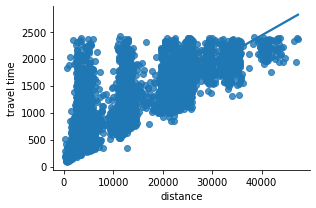

In [6]:
sns.lmplot(x='distance',y='travel time',data=df, height=3, aspect=1.5)

### Outlier removal

In [7]:
# If you have multiple columns in your dataframe and would like to
# remove all rows that have outliers in at least one column,
# the following expression would do that in one shot.
from scipy import stats
df = df[(np.abs(stats.zscore(df['distance'])) < 3)]


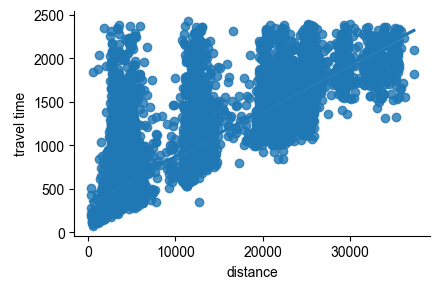

In [8]:
sns.lmplot(x='distance',y='travel time',data=df, height=3, aspect=1.5)
sns.set(rc={"figure.figsize":(10, 10)}) #width=1, #height=2

In [9]:
# Normalize using Min/Max Normalization.
normalized_distance2=(df['distance']-df['distance'].min())/(df['distance'].max()-df['distance'].min())
normalized_distance22=(dff['distance']-dff['distance'].min())/(dff['distance'].max()-dff['distance'].min())
# normalized_distance2
# from sklearn.preprocessing import StandardScaler
# x = breast_dataset.loc[:, features].values
# x = StandardScaler().fit_transform(x) # normalizing the features

In [10]:
df['distance'] = normalized_distance2
dff['distance'] = normalized_distance22

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Input,InputLayer
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [12]:
df['hr_sin'] = np.sin(df['hour of day']*(2.*np.pi/24))
df['hr_cos'] = np.cos(df['hour of day']*(2.*np.pi/24))
df = df.iloc[:,[0,1,2,15,16,3,4,5,6,7,8,9,10,11,12,13,14]] # change the column order to put "hr_sin" beside the "hour of day"
df.head(4)
df

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


travel time  distance  hour of day    hr_sin        hr_cos 1st ranked  \
0             2171  0.288827           18 -1.000000 -1.836970e-16    primary   
1              799  0.291979           21 -0.707107  7.071068e-01    primary   
2              698  0.291246           19 -0.965926  2.588190e-01    primary   
3              806  0.299914           17 -0.965926 -2.588190e-01    primary   
4              721  0.310737           17 -0.965926 -2.588190e-01    primary   
...            ...       ...          ...       ...           ...        ...   
16226         1700  0.595178            8  0.866025 -5.000000e-01    primary   
16227         1337  0.584843           22 -0.500000  8.660254e-01    primary   
16228         1240  0.598424            1  0.258819  9.659258e-01    primary   
16229         1266  0.605848            3  0.707107  7.071068e-01    primary   
16230         1216  0.589407           23 -0.258819  9.659258e-01    primary   

         2nd ranked    3rd ranked     4d ranked    5th ranked    6th ranked  \
0      unclassified      tertiary  primary_link       service           NaN   
1          tertiary  primary_link  unclassified   residential           NaN   
2          tertiary  primary_link       service  unclassified           NaN   
3          tertiary       service  primary_link   residential  unclassified   
4          tertiary       service  primary_link  unclassified   residential   
...             ...           ...           ...           ...           ...   
16226      tertiary     secondary           NaN           NaN           NaN   
16227      tertiary     secondary   residential           NaN           NaN   
16228      tertiary     secondary           NaN           NaN           NaN   
16229      tertiary     secondary   residential           NaN           NaN   
16230      tertiary     secondary   residential           NaN           NaN   

       1st dist  2nd dist  3rd dist  4rd dist  5th dist  6th dist  
0      0.794769  0.074563  0.062997  0.035059  0.032611       NaN  
1      0.862592  0.091203  0.034690  0.009245  0.002270       NaN  
2      0.832183  0.091428  0.034775  0.032347  0.009267       NaN  
3      0.828116  0.067350  0.048022  0.033792  0.013715  0.009005  
4      0.781110  0.117155  0.053512  0.032641  0.008699  0.006884  
...         ...       ...       ...       ...       ...       ...  
16226  0.828698  0.124670  0.046632       NaN       NaN       NaN  
16227  0.843173  0.113812  0.039117  0.003898       NaN       NaN  
16228  0.824255  0.129363  0.046382       NaN       NaN       NaN  
16229  0.814267  0.127796  0.045820  0.012117       NaN       NaN  
16230  0.836718  0.112941  0.047083  0.003257       NaN       NaN  

[16138 rows x 17 columns]

In [13]:
# fix random seed for reproducibility
#The specific seed value does not matter as long as it stays the same for each run of your code, it could be 1,2,3,...
np.random.seed(7)

In [14]:
def nnmodel(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    history = model.fit(X_train, y_train, verbose=1, epochs=Epoch,
                       validation_data=(X_test, y_test))   
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [15]:
def nnmodel_(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    elif num_hlayers == 2:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(num_neuron[2], activation='relu'))
        model.add(Dense(1))        
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    X_train0 = tf.convert_to_tensor(X_train,dtype = tf.float32)
    y_train0 = tf.convert_to_tensor(y_train,dtype = tf.float32)
    X_test0 = tf.convert_to_tensor(X_test,dtype = tf.float32)
    y_test0 = tf.convert_to_tensor(y_test,dtype = tf.float32)
    history = model.fit(X_train0, y_train0, verbose=1, epochs=Epoch,
                       validation_data=(X_test0, y_test0))   
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [16]:
def plotme(model):

    # Plot the training and validation accuracy and loss at each epoch
    loss1 = [f/60 for f in model.history['rmse']]
    val_loss1 = [f/60 for f in model.history['val_rmse']]
    loss2 = model.history['mape']
    val_loss2 = model.history['val_mape']
    epochs = range(1, len(model.history['loss'])+1)
    plt.figure(figsize=(5, 3))
    plt.plot(epochs, val_loss1, 'r', label='Validation rmse')
    plt.plot(epochs, loss1, 'y', label='Trainnig rmse')
    plt.plot(epochs, val_loss2, 'k', label='Validation mape')
    plt.plot(epochs, loss2, 'b', label='Trainnig mape')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    #plt.xlim(lims)
    yli = max(model.history['val_mape'])
    plt.ylim([-1, yli+10])
    plt.legend()
    plt.show()

## sub-problem 1:     ******* input:distance *********

In [17]:
my_df = df[['distance','travel time']]
my_df.head(3)

distance  travel time
0  0.288827         2171
1  0.291979          799
2  0.291246          698

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

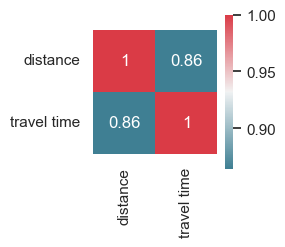

In [18]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(2,2))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [19]:
x = np.array(df[['distance']])
y = np.array(df['travel time'])
# x

In [20]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12910, 1)
(3228, 1)


In [22]:
import math

In [23]:
# inputs: distance
model1_1 = nnmodel(5, num_hlayers=1,Epoch=500)
model1_1

Epoch 1/500
404/404 [==============================] - 1s 893us/step - loss: 1084751.2500 - mape: 99.9684 - rmse: 1041.5139 - val_loss: 1056319.5000 - val_mape: 99.9359 - val_rmse: 1027.7740
Epoch 2/500
404/404 [==============================] - 0s 721us/step - loss: 1084031.8750 - mape: 99.9050 - rmse: 1041.1685 - val_loss: 1055609.5000 - val_mape: 99.8713 - val_rmse: 1027.4286
Epoch 3/500
404/404 [==============================] - 0s 704us/step - loss: 1083311.3750 - mape: 99.8407 - rmse: 1040.8225 - val_loss: 1054900.3750 - val_mape: 99.8067 - val_rmse: 1027.0834
Epoch 4/500
404/404 [==============================] - 0s 707us/step - loss: 1082593.6250 - mape: 99.7771 - rmse: 1040.4775 - val_loss: 1054194.0000 - val_mape: 99.7424 - val_rmse: 1026.7395
Epoch 5/500
404/404 [==============================] - 0s 717us/step - loss: 1081874.8750 - mape: 99.7137 - rmse: 1040.1322 - val_loss: 1053486.6250 - val_mape: 99.6779 - val_rmse: 1026.3950
Epoch 6/500
404/404 [========================

Epoch 44/500
404/404 [==============================] - 0s 730us/step - loss: 1054121.2500 - mape: 97.2275 - rmse: 1026.7041 - val_loss: 1026156.0000 - val_mape: 97.1650 - val_rmse: 1012.9936
Epoch 45/500
404/404 [==============================] - 0s 716us/step - loss: 1053416.3750 - mape: 97.1636 - rmse: 1026.3607 - val_loss: 1025461.4375 - val_mape: 97.1005 - val_rmse: 1012.6507
Epoch 46/500
404/404 [==============================] - 0s 724us/step - loss: 1052711.1250 - mape: 97.0999 - rmse: 1026.0171 - val_loss: 1024767.6250 - val_mape: 97.0361 - val_rmse: 1012.3080
Epoch 47/500
404/404 [==============================] - 0s 710us/step - loss: 1052006.2500 - mape: 97.0361 - rmse: 1025.6736 - val_loss: 1024073.8125 - val_mape: 96.9716 - val_rmse: 1011.9653
Epoch 48/500
404/404 [==============================] - 0s 755us/step - loss: 1051301.3750 - mape: 96.9725 - rmse: 1025.3298 - val_loss: 1023379.8125 - val_mape: 96.9071 - val_rmse: 1011.6224
Epoch 49/500
404/404 [==================

Epoch 87/500
404/404 [==============================] - 0s 731us/step - loss: 1024096.7500 - mape: 94.4869 - rmse: 1011.9767 - val_loss: 996598.2500 - val_mape: 94.3949 - val_rmse: 998.2977
Epoch 88/500
404/404 [==============================] - 0s 722us/step - loss: 1023406.2500 - mape: 94.4231 - rmse: 1011.6354 - val_loss: 995917.8750 - val_mape: 94.3306 - val_rmse: 997.9568
Epoch 89/500
404/404 [==============================] - 0s 737us/step - loss: 1022714.6250 - mape: 94.3597 - rmse: 1011.2935 - val_loss: 995237.8125 - val_mape: 94.2661 - val_rmse: 997.6161
Epoch 90/500
404/404 [==============================] - 0s 732us/step - loss: 1022024.1250 - mape: 94.2959 - rmse: 1010.9521 - val_loss: 994557.7500 - val_mape: 94.2016 - val_rmse: 997.2751
Epoch 91/500
404/404 [==============================] - 0s 747us/step - loss: 1021333.0625 - mape: 94.2322 - rmse: 1010.6102 - val_loss: 993878.5000 - val_mape: 94.1373 - val_rmse: 996.9346
Epoch 92/500
404/404 [============================

404/404 [==============================] - 0s 698us/step - loss: 994675.1875 - mape: 91.7473 - rmse: 997.3340 - val_loss: 967642.1875 - val_mape: 91.6256 - val_rmse: 983.6880
Epoch 131/500
404/404 [==============================] - 0s 719us/step - loss: 993998.4375 - mape: 91.6836 - rmse: 996.9947 - val_loss: 966976.6250 - val_mape: 91.5612 - val_rmse: 983.3497
Epoch 132/500
404/404 [==============================] - 0s 711us/step - loss: 993321.3125 - mape: 91.6200 - rmse: 996.6551 - val_loss: 966309.9375 - val_mape: 91.4968 - val_rmse: 983.0106
Epoch 133/500
404/404 [==============================] - 0s 710us/step - loss: 992645.0000 - mape: 91.5566 - rmse: 996.3157 - val_loss: 965644.0000 - val_mape: 91.4324 - val_rmse: 982.6719
Epoch 134/500
404/404 [==============================] - 0s 705us/step - loss: 991968.3750 - mape: 91.4925 - rmse: 995.9761 - val_loss: 964979.2500 - val_mape: 91.3680 - val_rmse: 982.3336
Epoch 135/500
404/404 [==============================] - 0s 723us/ste

404/404 [==============================] - 0s 700us/step - loss: 937646.7500 - mape: 86.2729 - rmse: 968.3216 - val_loss: 911546.3750 - val_mape: 86.0899 - val_rmse: 954.7494
Epoch 217/500
404/404 [==============================] - 0s 696us/step - loss: 936997.0625 - mape: 86.2091 - rmse: 967.9861 - val_loss: 910907.8750 - val_mape: 86.0256 - val_rmse: 954.4149
Epoch 218/500
404/404 [==============================] - 0s 720us/step - loss: 936348.5625 - mape: 86.1456 - rmse: 967.6511 - val_loss: 910269.9375 - val_mape: 85.9612 - val_rmse: 954.0807
Epoch 219/500
404/404 [==============================] - 0s 719us/step - loss: 935700.8125 - mape: 86.0819 - rmse: 967.3163 - val_loss: 909633.0000 - val_mape: 85.8969 - val_rmse: 953.7468
Epoch 220/500
404/404 [==============================] - 0s 720us/step - loss: 935052.9375 - mape: 86.0184 - rmse: 966.9813 - val_loss: 908995.7500 - val_mape: 85.8326 - val_rmse: 953.4127
Epoch 221/500
404/404 [==============================] - 0s 694us/ste

404/404 [==============================] - 0s 701us/step - loss: 883030.1875 - mape: 80.8142 - rmse: 939.6968 - val_loss: 857861.8125 - val_mape: 80.5744 - val_rmse: 926.2083
Epoch 303/500
404/404 [==============================] - 0s 730us/step - loss: 882409.3750 - mape: 80.7508 - rmse: 939.3665 - val_loss: 857251.7500 - val_mape: 80.5105 - val_rmse: 925.8789
Epoch 304/500
404/404 [==============================] - 0s 724us/step - loss: 881788.8750 - mape: 80.6878 - rmse: 939.0361 - val_loss: 856641.5625 - val_mape: 80.4467 - val_rmse: 925.5493
Epoch 305/500
404/404 [==============================] - 0s 730us/step - loss: 881168.1250 - mape: 80.6244 - rmse: 938.7056 - val_loss: 856032.5000 - val_mape: 80.3829 - val_rmse: 925.2202
Epoch 306/500
404/404 [==============================] - 0s 701us/step - loss: 880548.4375 - mape: 80.5611 - rmse: 938.3754 - val_loss: 855423.3750 - val_mape: 80.3190 - val_rmse: 924.8910
Epoch 307/500
404/404 [==============================] - 0s 707us/ste

404/404 [==============================] - 0s 706us/step - loss: 830818.5625 - mape: 75.3914 - rmse: 911.4925 - val_loss: 806581.0000 - val_mape: 75.0854 - val_rmse: 898.0986
Epoch 389/500
404/404 [==============================] - 0s 694us/step - loss: 830225.1875 - mape: 75.3286 - rmse: 911.1669 - val_loss: 805998.5625 - val_mape: 75.0216 - val_rmse: 897.7742
Epoch 390/500
404/404 [==============================] - 0s 720us/step - loss: 829632.5000 - mape: 75.2657 - rmse: 910.8416 - val_loss: 805417.0000 - val_mape: 74.9578 - val_rmse: 897.4503
Epoch 391/500
404/404 [==============================] - 0s 695us/step - loss: 829040.1250 - mape: 75.2033 - rmse: 910.5164 - val_loss: 804835.6250 - val_mape: 74.8940 - val_rmse: 897.1263
Epoch 392/500
404/404 [==============================] - 0s 672us/step - loss: 828447.8125 - mape: 75.1398 - rmse: 910.1911 - val_loss: 804255.0000 - val_mape: 74.8303 - val_rmse: 896.8027
Epoch 393/500
404/404 [==============================] - 0s 695us/ste

404/404 [==============================] - 0s 701us/step - loss: 781019.5000 - mape: 70.0077 - rmse: 883.7531 - val_loss: 757713.1875 - val_mape: 69.6440 - val_rmse: 870.4672
Epoch 475/500
404/404 [==============================] - 0s 691us/step - loss: 780454.4375 - mape: 69.9454 - rmse: 883.4333 - val_loss: 757158.0000 - val_mape: 69.5808 - val_rmse: 870.1483
Epoch 476/500
404/404 [==============================] - 0s 699us/step - loss: 779889.7500 - mape: 69.8828 - rmse: 883.1136 - val_loss: 756605.0000 - val_mape: 69.5177 - val_rmse: 869.8304
Epoch 477/500
404/404 [==============================] - 0s 687us/step - loss: 779325.8750 - mape: 69.8207 - rmse: 882.7944 - val_loss: 756051.5000 - val_mape: 69.4546 - val_rmse: 869.5122
Epoch 478/500
404/404 [==============================] - 0s 724us/step - loss: 778762.3750 - mape: 69.7584 - rmse: 882.4752 - val_loss: 755498.7500 - val_mape: 69.3915 - val_rmse: 869.1943
Epoch 479/500
404/404 [==============================] - 0s 696us/ste

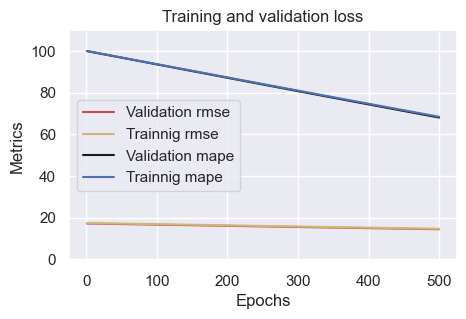

In [24]:
plotme(model1_1)

In [25]:
# inputs: distance
model1_2 = nnmodel(10, num_hlayers=1,Epoch=500)
model1_2

Epoch 1/500
404/404 [==============================] - 1s 871us/step - loss: 1083318.8750 - mape: 99.8714 - rmse: 1040.8260 - val_loss: 1052614.6250 - val_mape: 99.6742 - val_rmse: 1025.9701
Epoch 2/500
404/404 [==============================] - 0s 703us/step - loss: 1076078.7500 - mape: 99.3432 - rmse: 1037.3422 - val_loss: 1042813.9375 - val_mape: 98.9254 - val_rmse: 1021.1826
Epoch 3/500
404/404 [==============================] - 0s 721us/step - loss: 1063516.1250 - mape: 98.4009 - rmse: 1031.2692 - val_loss: 1028084.6875 - val_mape: 97.7869 - val_rmse: 1013.9451
Epoch 4/500
404/404 [==============================] - 0s 708us/step - loss: 1046269.5625 - mape: 97.1060 - rmse: 1022.8732 - val_loss: 1009109.5625 - val_mape: 96.3030 - val_rmse: 1004.5444
Epoch 5/500
404/404 [==============================] - 0s 715us/step - loss: 1025096.3125 - mape: 95.4727 - rmse: 1012.4704 - val_loss: 986665.8125 - val_mape: 94.5237 - val_rmse: 993.3105
Epoch 6/500
404/404 [==========================

Epoch 88/500
404/404 [==============================] - 0s 695us/step - loss: 71570.9766 - mape: 27.2933 - rmse: 267.5275 - val_loss: 72547.1250 - val_mape: 27.7263 - val_rmse: 269.3457
Epoch 89/500
404/404 [==============================] - 0s 695us/step - loss: 71432.4922 - mape: 27.1473 - rmse: 267.2686 - val_loss: 72416.3594 - val_mape: 27.4852 - val_rmse: 269.1029
Epoch 90/500
404/404 [==============================] - 0s 723us/step - loss: 71314.6484 - mape: 26.9246 - rmse: 267.0480 - val_loss: 72307.0859 - val_mape: 27.2663 - val_rmse: 268.8998
Epoch 91/500
404/404 [==============================] - 0s 720us/step - loss: 71216.6953 - mape: 26.6831 - rmse: 266.8646 - val_loss: 72219.3438 - val_mape: 27.1404 - val_rmse: 268.7366
Epoch 92/500
404/404 [==============================] - 0s 695us/step - loss: 71135.4062 - mape: 26.5233 - rmse: 266.7122 - val_loss: 72143.3125 - val_mape: 26.9994 - val_rmse: 268.5951
Epoch 93/500
404/404 [==============================] - 0s 721us/step 

Epoch 132/500
404/404 [==============================] - 0s 715us/step - loss: 70700.3438 - mape: 24.8432 - rmse: 265.8954 - val_loss: 71715.6406 - val_mape: 25.2519 - val_rmse: 267.7978
Epoch 133/500
404/404 [==============================] - 0s 719us/step - loss: 70698.0078 - mape: 24.6878 - rmse: 265.8910 - val_loss: 71717.5469 - val_mape: 25.2695 - val_rmse: 267.8013
Epoch 134/500
404/404 [==============================] - 0s 696us/step - loss: 70700.5859 - mape: 24.8136 - rmse: 265.8958 - val_loss: 71715.0078 - val_mape: 25.2388 - val_rmse: 267.7966
Epoch 135/500
404/404 [==============================] - 0s 694us/step - loss: 70699.2266 - mape: 24.7388 - rmse: 265.8932 - val_loss: 71717.2031 - val_mape: 25.2649 - val_rmse: 267.8007
Epoch 136/500
404/404 [==============================] - 0s 690us/step - loss: 70700.7734 - mape: 24.7849 - rmse: 265.8962 - val_loss: 71713.6562 - val_mape: 25.2158 - val_rmse: 267.7941
Epoch 137/500
404/404 [==============================] - 0s 703us

Epoch 176/500
404/404 [==============================] - 0s 710us/step - loss: 70699.6016 - mape: 24.6605 - rmse: 265.8940 - val_loss: 71720.7031 - val_mape: 25.2816 - val_rmse: 267.8072
Epoch 177/500
404/404 [==============================] - 0s 712us/step - loss: 70700.9531 - mape: 24.8116 - rmse: 265.8965 - val_loss: 71713.3359 - val_mape: 25.1942 - val_rmse: 267.7935
Epoch 178/500
404/404 [==============================] - 0s 690us/step - loss: 70700.7734 - mape: 24.6988 - rmse: 265.8962 - val_loss: 71716.2891 - val_mape: 25.2319 - val_rmse: 267.7990
Epoch 179/500
404/404 [==============================] - 0s 719us/step - loss: 70701.0000 - mape: 24.7607 - rmse: 265.8966 - val_loss: 71714.4062 - val_mape: 25.2101 - val_rmse: 267.7955
Epoch 180/500
404/404 [==============================] - 0s 748us/step - loss: 70699.9141 - mape: 24.6826 - rmse: 265.8946 - val_loss: 71718.5859 - val_mape: 25.2567 - val_rmse: 267.8033
Epoch 181/500
404/404 [==============================] - 0s 684us

Epoch 220/500
404/404 [==============================] - 0s 710us/step - loss: 70699.8594 - mape: 24.7201 - rmse: 265.8944 - val_loss: 71714.3828 - val_mape: 25.2070 - val_rmse: 267.7954
Epoch 221/500
404/404 [==============================] - 0s 716us/step - loss: 70699.5859 - mape: 24.7661 - rmse: 265.8940 - val_loss: 71713.1719 - val_mape: 25.1897 - val_rmse: 267.7932
Epoch 222/500
404/404 [==============================] - 0s 753us/step - loss: 70699.5234 - mape: 24.7351 - rmse: 265.8938 - val_loss: 71713.0625 - val_mape: 25.1893 - val_rmse: 267.7929
Epoch 223/500
404/404 [==============================] - 0s 771us/step - loss: 70698.1484 - mape: 24.6875 - rmse: 265.8912 - val_loss: 71713.3359 - val_mape: 25.1917 - val_rmse: 267.7935
Epoch 224/500
404/404 [==============================] - 0s 769us/step - loss: 70700.0078 - mape: 24.7608 - rmse: 265.8947 - val_loss: 71715.5312 - val_mape: 25.2211 - val_rmse: 267.7975
Epoch 225/500
404/404 [==============================] - 0s 767us

Epoch 264/500
404/404 [==============================] - 0s 720us/step - loss: 70702.5938 - mape: 24.7195 - rmse: 265.8996 - val_loss: 71709.7266 - val_mape: 25.1340 - val_rmse: 267.7867
Epoch 265/500
404/404 [==============================] - 0s 719us/step - loss: 70700.0938 - mape: 24.7057 - rmse: 265.8949 - val_loss: 71712.4219 - val_mape: 25.1837 - val_rmse: 267.7917
Epoch 266/500
404/404 [==============================] - 0s 719us/step - loss: 70697.1562 - mape: 24.6760 - rmse: 265.8894 - val_loss: 71715.7266 - val_mape: 25.2285 - val_rmse: 267.7979
Epoch 267/500
404/404 [==============================] - 0s 704us/step - loss: 70700.9766 - mape: 24.7795 - rmse: 265.8965 - val_loss: 71713.9844 - val_mape: 25.2068 - val_rmse: 267.7947
Epoch 268/500
404/404 [==============================] - 0s 695us/step - loss: 70698.7188 - mape: 24.6676 - rmse: 265.8923 - val_loss: 71716.0156 - val_mape: 25.2303 - val_rmse: 267.7985
Epoch 269/500
404/404 [==============================] - 0s 719us

Epoch 308/500
404/404 [==============================] - 0s 688us/step - loss: 70699.1953 - mape: 24.7435 - rmse: 265.8932 - val_loss: 71713.6797 - val_mape: 25.2005 - val_rmse: 267.7941
Epoch 309/500
404/404 [==============================] - 0s 695us/step - loss: 70699.0938 - mape: 24.7647 - rmse: 265.8930 - val_loss: 71712.3828 - val_mape: 25.1812 - val_rmse: 267.7917
Epoch 310/500
404/404 [==============================] - 0s 701us/step - loss: 70700.1172 - mape: 24.7671 - rmse: 265.8949 - val_loss: 71709.7812 - val_mape: 25.1374 - val_rmse: 267.7868
Epoch 311/500
404/404 [==============================] - 0s 687us/step - loss: 70699.5469 - mape: 24.7280 - rmse: 265.8939 - val_loss: 71711.5156 - val_mape: 25.1699 - val_rmse: 267.7901
Epoch 312/500
404/404 [==============================] - 0s 719us/step - loss: 70700.6562 - mape: 24.7264 - rmse: 265.8959 - val_loss: 71712.4375 - val_mape: 25.1857 - val_rmse: 267.7918
Epoch 313/500
404/404 [==============================] - 0s 721us

Epoch 352/500
404/404 [==============================] - 0s 732us/step - loss: 70700.9922 - mape: 24.6794 - rmse: 265.8966 - val_loss: 71712.6172 - val_mape: 25.1849 - val_rmse: 267.7921
Epoch 353/500
404/404 [==============================] - 0s 695us/step - loss: 70700.1094 - mape: 24.7593 - rmse: 265.8949 - val_loss: 71713.2188 - val_mape: 25.1953 - val_rmse: 267.7932
Epoch 354/500
404/404 [==============================] - 0s 695us/step - loss: 70701.8750 - mape: 24.7258 - rmse: 265.8983 - val_loss: 71713.3203 - val_mape: 25.1961 - val_rmse: 267.7934
Epoch 355/500
404/404 [==============================] - 0s 709us/step - loss: 70699.7578 - mape: 24.7552 - rmse: 265.8943 - val_loss: 71714.8750 - val_mape: 25.2163 - val_rmse: 267.7963
Epoch 356/500
404/404 [==============================] - 0s 733us/step - loss: 70699.1641 - mape: 24.7793 - rmse: 265.8932 - val_loss: 71713.1328 - val_mape: 25.1926 - val_rmse: 267.7931
Epoch 357/500
404/404 [==============================] - 0s 718us

Epoch 396/500
404/404 [==============================] - 0s 721us/step - loss: 70700.6250 - mape: 24.6837 - rmse: 265.8959 - val_loss: 71711.4375 - val_mape: 25.1634 - val_rmse: 267.7899
Epoch 397/500
404/404 [==============================] - 0s 695us/step - loss: 70697.7188 - mape: 24.8288 - rmse: 265.8904 - val_loss: 71707.6328 - val_mape: 25.0763 - val_rmse: 267.7828
Epoch 398/500
404/404 [==============================] - 0s 704us/step - loss: 70703.0547 - mape: 24.6835 - rmse: 265.9005 - val_loss: 71709.4922 - val_mape: 25.1290 - val_rmse: 267.7863
Epoch 399/500
404/404 [==============================] - 0s 718us/step - loss: 70698.7109 - mape: 24.6860 - rmse: 265.8923 - val_loss: 71711.5625 - val_mape: 25.1666 - val_rmse: 267.7902
Epoch 400/500
404/404 [==============================] - 0s 704us/step - loss: 70698.5078 - mape: 24.7442 - rmse: 265.8919 - val_loss: 71713.5391 - val_mape: 25.1974 - val_rmse: 267.7938
Epoch 401/500
404/404 [==============================] - 0s 713us

Epoch 440/500
404/404 [==============================] - 0s 720us/step - loss: 70697.3984 - mape: 24.8052 - rmse: 265.8898 - val_loss: 71709.7891 - val_mape: 25.1340 - val_rmse: 267.7868
Epoch 441/500
404/404 [==============================] - 0s 719us/step - loss: 70699.9297 - mape: 24.6550 - rmse: 265.8946 - val_loss: 71715.3281 - val_mape: 25.2211 - val_rmse: 267.7972
Epoch 442/500
404/404 [==============================] - 0s 720us/step - loss: 70700.6250 - mape: 24.7054 - rmse: 265.8959 - val_loss: 71715.3672 - val_mape: 25.2218 - val_rmse: 267.7972
Epoch 443/500
404/404 [==============================] - 0s 699us/step - loss: 70699.7578 - mape: 24.7470 - rmse: 265.8943 - val_loss: 71712.1641 - val_mape: 25.1755 - val_rmse: 267.7913
Epoch 444/500
404/404 [==============================] - 0s 717us/step - loss: 70703.2969 - mape: 24.7627 - rmse: 265.9009 - val_loss: 71712.3828 - val_mape: 25.1815 - val_rmse: 267.7917
Epoch 445/500
404/404 [==============================] - 0s 717us

Epoch 484/500
404/404 [==============================] - 0s 719us/step - loss: 70698.9297 - mape: 24.7527 - rmse: 265.8927 - val_loss: 71714.4766 - val_mape: 25.2082 - val_rmse: 267.7956
Epoch 485/500
404/404 [==============================] - 0s 698us/step - loss: 70700.5156 - mape: 24.7546 - rmse: 265.8957 - val_loss: 71713.5156 - val_mape: 25.1955 - val_rmse: 267.7938
Epoch 486/500
404/404 [==============================] - 0s 692us/step - loss: 70698.3438 - mape: 24.6941 - rmse: 265.8916 - val_loss: 71713.9062 - val_mape: 25.2013 - val_rmse: 267.7945
Epoch 487/500
404/404 [==============================] - 0s 720us/step - loss: 70699.0938 - mape: 24.6791 - rmse: 265.8930 - val_loss: 71717.8359 - val_mape: 25.2501 - val_rmse: 267.8018
Epoch 488/500
404/404 [==============================] - 0s 670us/step - loss: 70704.1875 - mape: 24.7696 - rmse: 265.9026 - val_loss: 71713.2266 - val_mape: 25.1934 - val_rmse: 267.7932
Epoch 489/500
404/404 [==============================] - 0s 695us

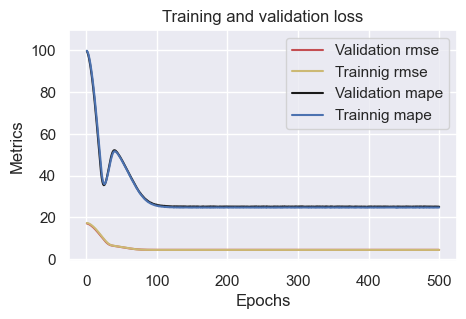

In [26]:
plotme(model1_2)

In [27]:
# inputs: distance
model1_3 = nnmodel(20, num_hlayers=1,Epoch=500)
model1_3

Epoch 1/500
404/404 [==============================] - 0s 867us/step - loss: 1080555.6250 - mape: 99.6861 - rmse: 1039.4978 - val_loss: 1045576.8750 - val_mape: 99.1673 - val_rmse: 1022.5345
Epoch 2/500
404/404 [==============================] - 0s 720us/step - loss: 1059648.7500 - mape: 98.1563 - rmse: 1029.3925 - val_loss: 1015531.3750 - val_mape: 96.8651 - val_rmse: 1007.7358
Epoch 3/500
404/404 [==============================] - 0s 701us/step - loss: 1020790.6250 - mape: 95.2110 - rmse: 1010.3419 - val_loss: 970091.3125 - val_mape: 93.2799 - val_rmse: 984.9321
Epoch 4/500
404/404 [==============================] - 0s 702us/step - loss: 968058.8750 - mape: 91.1131 - rmse: 983.8998 - val_loss: 912815.3750 - val_mape: 88.6022 - val_rmse: 955.4137
Epoch 5/500
404/404 [==============================] - 0s 723us/step - loss: 905160.6250 - mape: 85.9929 - rmse: 951.3993 - val_loss: 847356.5000 - val_mape: 83.0264 - val_rmse: 920.5197
Epoch 6/500
404/404 [==============================] - 

Epoch 45/500
404/404 [==============================] - 0s 695us/step - loss: 73925.0312 - mape: 29.8295 - rmse: 271.8916 - val_loss: 74593.4844 - val_mape: 30.1432 - val_rmse: 273.1181
Epoch 46/500
404/404 [==============================] - 0s 702us/step - loss: 73190.4453 - mape: 29.3150 - rmse: 270.5373 - val_loss: 73937.2109 - val_mape: 29.5360 - val_rmse: 271.9140
Epoch 47/500
404/404 [==============================] - 0s 704us/step - loss: 72598.3203 - mape: 28.6883 - rmse: 269.4408 - val_loss: 73399.1797 - val_mape: 28.8903 - val_rmse: 270.9228
Epoch 48/500
404/404 [==============================] - 0s 684us/step - loss: 72128.0938 - mape: 28.1593 - rmse: 268.5667 - val_loss: 72971.9688 - val_mape: 28.2329 - val_rmse: 270.1332
Epoch 49/500
404/404 [==============================] - 0s 691us/step - loss: 71770.6328 - mape: 27.5895 - rmse: 267.9004 - val_loss: 72666.5000 - val_mape: 27.8613 - val_rmse: 269.5673
Epoch 50/500
404/404 [==============================] - 0s 695us/step 

404/404 [==============================] - 0s 735us/step - loss: 70705.0000 - mape: 24.8112 - rmse: 265.9041 - val_loss: 71709.7578 - val_mape: 25.1397 - val_rmse: 267.7868
Epoch 90/500
404/404 [==============================] - 0s 692us/step - loss: 70704.3672 - mape: 24.6497 - rmse: 265.9029 - val_loss: 71721.6484 - val_mape: 25.2954 - val_rmse: 267.8090
Epoch 91/500
404/404 [==============================] - 0s 699us/step - loss: 70705.9766 - mape: 24.7428 - rmse: 265.9059 - val_loss: 71718.7031 - val_mape: 25.2639 - val_rmse: 267.8035
Epoch 92/500
404/404 [==============================] - 0s 705us/step - loss: 70702.2344 - mape: 24.7594 - rmse: 265.8989 - val_loss: 71719.4922 - val_mape: 25.2744 - val_rmse: 267.8050
Epoch 93/500
404/404 [==============================] - 0s 719us/step - loss: 70706.1719 - mape: 24.7502 - rmse: 265.9063 - val_loss: 71719.8594 - val_mape: 25.2729 - val_rmse: 267.8056
Epoch 94/500
404/404 [==============================] - 0s 722us/step - loss: 70704

Epoch 133/500
404/404 [==============================] - 0s 696us/step - loss: 70704.2422 - mape: 24.7503 - rmse: 265.9027 - val_loss: 71709.4297 - val_mape: 25.1214 - val_rmse: 267.7862
Epoch 134/500
404/404 [==============================] - 0s 730us/step - loss: 70705.9922 - mape: 24.7640 - rmse: 265.9060 - val_loss: 71711.4766 - val_mape: 25.1650 - val_rmse: 267.7900
Epoch 135/500
404/404 [==============================] - 0s 704us/step - loss: 70705.4297 - mape: 24.7129 - rmse: 265.9049 - val_loss: 71710.0312 - val_mape: 25.1320 - val_rmse: 267.7873
Epoch 136/500
404/404 [==============================] - 0s 672us/step - loss: 70702.1250 - mape: 24.6494 - rmse: 265.8987 - val_loss: 71718.4062 - val_mape: 25.2526 - val_rmse: 267.8029
Epoch 137/500
404/404 [==============================] - 0s 690us/step - loss: 70699.6719 - mape: 24.8215 - rmse: 265.8941 - val_loss: 71707.1719 - val_mape: 25.0559 - val_rmse: 267.7820
Epoch 138/500
404/404 [==============================] - 0s 684us

Epoch 177/500
404/404 [==============================] - 0s 735us/step - loss: 70704.1094 - mape: 24.6341 - rmse: 265.9024 - val_loss: 71718.2500 - val_mape: 25.2441 - val_rmse: 267.8026
Epoch 178/500
404/404 [==============================] - 0s 707us/step - loss: 70697.5312 - mape: 24.6616 - rmse: 265.8901 - val_loss: 71730.8047 - val_mape: 25.3603 - val_rmse: 267.8261
Epoch 179/500
404/404 [==============================] - 0s 695us/step - loss: 70709.0312 - mape: 24.8259 - rmse: 265.9117 - val_loss: 71720.7109 - val_mape: 25.2771 - val_rmse: 267.8072
Epoch 180/500
404/404 [==============================] - 0s 718us/step - loss: 70703.4297 - mape: 24.8204 - rmse: 265.9012 - val_loss: 71714.6641 - val_mape: 25.2124 - val_rmse: 267.7959
Epoch 181/500
404/404 [==============================] - 0s 705us/step - loss: 70703.6172 - mape: 24.7274 - rmse: 265.9015 - val_loss: 71710.7734 - val_mape: 25.1550 - val_rmse: 267.7887
Epoch 182/500
404/404 [==============================] - 0s 698us

Epoch 221/500
404/404 [==============================] - 0s 687us/step - loss: 70704.2188 - mape: 24.7512 - rmse: 265.9026 - val_loss: 71715.7500 - val_mape: 25.2189 - val_rmse: 267.7980
Epoch 222/500
404/404 [==============================] - 0s 695us/step - loss: 70704.5078 - mape: 24.6915 - rmse: 265.9032 - val_loss: 71718.9219 - val_mape: 25.2547 - val_rmse: 267.8039
Epoch 223/500
404/404 [==============================] - 0s 712us/step - loss: 70705.3828 - mape: 24.7711 - rmse: 265.9048 - val_loss: 71711.6641 - val_mape: 25.1706 - val_rmse: 267.7903
Epoch 224/500
404/404 [==============================] - 0s 687us/step - loss: 70704.4688 - mape: 24.7245 - rmse: 265.9031 - val_loss: 71712.0781 - val_mape: 25.1691 - val_rmse: 267.7911
Epoch 225/500
404/404 [==============================] - 0s 697us/step - loss: 70703.4844 - mape: 24.7192 - rmse: 265.9013 - val_loss: 71719.4219 - val_mape: 25.2688 - val_rmse: 267.8048
Epoch 226/500
404/404 [==============================] - 0s 682us

Epoch 265/500
404/404 [==============================] - 0s 691us/step - loss: 70702.6250 - mape: 24.7407 - rmse: 265.8997 - val_loss: 71716.0547 - val_mape: 25.2257 - val_rmse: 267.7985
Epoch 266/500
404/404 [==============================] - 0s 691us/step - loss: 70706.7578 - mape: 24.7711 - rmse: 265.9074 - val_loss: 71715.7734 - val_mape: 25.2236 - val_rmse: 267.7980
Epoch 267/500
404/404 [==============================] - 0s 692us/step - loss: 70703.1953 - mape: 24.6660 - rmse: 265.9007 - val_loss: 71719.9297 - val_mape: 25.2714 - val_rmse: 267.8058
Epoch 268/500
404/404 [==============================] - 0s 695us/step - loss: 70703.5625 - mape: 24.7467 - rmse: 265.9014 - val_loss: 71714.0078 - val_mape: 25.2030 - val_rmse: 267.7947
Epoch 269/500
404/404 [==============================] - 0s 693us/step - loss: 70705.9922 - mape: 24.7752 - rmse: 265.9060 - val_loss: 71710.4062 - val_mape: 25.1477 - val_rmse: 267.7880
Epoch 270/500
404/404 [==============================] - 0s 685us

Epoch 309/500
404/404 [==============================] - 0s 708us/step - loss: 70705.1641 - mape: 24.7102 - rmse: 265.9044 - val_loss: 71711.9922 - val_mape: 25.1744 - val_rmse: 267.7910
Epoch 310/500
404/404 [==============================] - 0s 695us/step - loss: 70699.7266 - mape: 24.7890 - rmse: 265.8942 - val_loss: 71708.1953 - val_mape: 25.0955 - val_rmse: 267.7839
Epoch 311/500
404/404 [==============================] - 0s 702us/step - loss: 70703.8672 - mape: 24.6941 - rmse: 265.9020 - val_loss: 71711.0859 - val_mape: 25.1583 - val_rmse: 267.7892
Epoch 312/500
404/404 [==============================] - 0s 732us/step - loss: 70701.7344 - mape: 24.6712 - rmse: 265.8980 - val_loss: 71719.4375 - val_mape: 25.2687 - val_rmse: 267.8048
Epoch 313/500
404/404 [==============================] - 0s 708us/step - loss: 70702.7656 - mape: 24.7540 - rmse: 265.8999 - val_loss: 71712.7109 - val_mape: 25.1817 - val_rmse: 267.7923
Epoch 314/500
404/404 [==============================] - 0s 695us

Epoch 353/500
404/404 [==============================] - 0s 685us/step - loss: 70703.4219 - mape: 24.7198 - rmse: 265.9012 - val_loss: 71717.2031 - val_mape: 25.2417 - val_rmse: 267.8007
Epoch 354/500
404/404 [==============================] - 0s 708us/step - loss: 70701.2422 - mape: 24.8270 - rmse: 265.8971 - val_loss: 71711.0625 - val_mape: 25.1582 - val_rmse: 267.7892
Epoch 355/500
404/404 [==============================] - 0s 693us/step - loss: 70702.6719 - mape: 24.7393 - rmse: 265.8997 - val_loss: 71710.2891 - val_mape: 25.1430 - val_rmse: 267.7878
Epoch 356/500
404/404 [==============================] - 0s 700us/step - loss: 70701.8672 - mape: 24.6750 - rmse: 265.8982 - val_loss: 71714.0703 - val_mape: 25.2042 - val_rmse: 267.7948
Epoch 357/500
404/404 [==============================] - 0s 704us/step - loss: 70702.7891 - mape: 24.7660 - rmse: 265.9000 - val_loss: 71710.9609 - val_mape: 25.1589 - val_rmse: 267.7890
Epoch 358/500
404/404 [==============================] - 0s 706us

Epoch 397/500
404/404 [==============================] - 0s 685us/step - loss: 70702.2734 - mape: 24.7971 - rmse: 265.8990 - val_loss: 71707.4375 - val_mape: 25.0680 - val_rmse: 267.7824
Epoch 398/500
404/404 [==============================] - 0s 695us/step - loss: 70704.2734 - mape: 24.7412 - rmse: 265.9027 - val_loss: 71709.4609 - val_mape: 25.1263 - val_rmse: 267.7862
Epoch 399/500
404/404 [==============================] - 0s 694us/step - loss: 70704.8906 - mape: 24.6757 - rmse: 265.9039 - val_loss: 71714.8047 - val_mape: 25.2132 - val_rmse: 267.7962
Epoch 400/500
404/404 [==============================] - 0s 695us/step - loss: 70704.5547 - mape: 24.7064 - rmse: 265.9033 - val_loss: 71717.7031 - val_mape: 25.2457 - val_rmse: 267.8016
Epoch 401/500
404/404 [==============================] - 0s 695us/step - loss: 70703.6875 - mape: 24.7156 - rmse: 265.9016 - val_loss: 71719.4297 - val_mape: 25.2617 - val_rmse: 267.8048
Epoch 402/500
404/404 [==============================] - 0s 695us

Epoch 441/500
404/404 [==============================] - 0s 703us/step - loss: 70704.0469 - mape: 24.7252 - rmse: 265.9023 - val_loss: 71710.6094 - val_mape: 25.1506 - val_rmse: 267.7884
Epoch 442/500
404/404 [==============================] - 0s 715us/step - loss: 70700.4453 - mape: 24.6584 - rmse: 265.8955 - val_loss: 71721.1719 - val_mape: 25.2856 - val_rmse: 267.8081
Epoch 443/500
404/404 [==============================] - 0s 682us/step - loss: 70701.6562 - mape: 24.7207 - rmse: 265.8978 - val_loss: 71722.1797 - val_mape: 25.2959 - val_rmse: 267.8100
Epoch 444/500
404/404 [==============================] - 0s 720us/step - loss: 70702.5078 - mape: 24.8452 - rmse: 265.8994 - val_loss: 71709.7969 - val_mape: 25.1366 - val_rmse: 267.7868
Epoch 445/500
404/404 [==============================] - 0s 694us/step - loss: 70706.1562 - mape: 24.6589 - rmse: 265.9063 - val_loss: 71716.2109 - val_mape: 25.2323 - val_rmse: 267.7988
Epoch 446/500
404/404 [==============================] - 0s 722us

Epoch 485/500
404/404 [==============================] - 0s 704us/step - loss: 70706.1875 - mape: 24.7845 - rmse: 265.9063 - val_loss: 71712.9375 - val_mape: 25.1880 - val_rmse: 267.7927
Epoch 486/500
404/404 [==============================] - 0s 691us/step - loss: 70703.4922 - mape: 24.7313 - rmse: 265.9013 - val_loss: 71710.8750 - val_mape: 25.1506 - val_rmse: 267.7888
Epoch 487/500
404/404 [==============================] - 0s 693us/step - loss: 70700.4141 - mape: 24.7898 - rmse: 265.8955 - val_loss: 71707.7812 - val_mape: 25.0820 - val_rmse: 267.7831
Epoch 488/500
404/404 [==============================] - 0s 716us/step - loss: 70703.2188 - mape: 24.6525 - rmse: 265.9008 - val_loss: 71713.0469 - val_mape: 25.1881 - val_rmse: 267.7929
Epoch 489/500
404/404 [==============================] - 0s 717us/step - loss: 70703.7266 - mape: 24.7941 - rmse: 265.9017 - val_loss: 71707.1641 - val_mape: 25.0549 - val_rmse: 267.7819
Epoch 490/500
404/404 [==============================] - 0s 694us

In [28]:
# inputs: distance
model1_4 = nnmodel(10,5, num_hlayers=2,Epoch=500)
model1_4

Epoch 1/500
404/404 [==============================] - 1s 870us/step - loss: 1075534.5000 - mape: 99.3433 - rmse: 1037.0798 - val_loss: 1026759.6250 - val_mape: 97.7981 - val_rmse: 1013.2915
Epoch 2/500
404/404 [==============================] - 0s 732us/step - loss: 991608.9375 - mape: 93.0577 - rmse: 995.7957 - val_loss: 878256.5625 - val_mape: 85.9979 - val_rmse: 937.1534
Epoch 3/500
404/404 [==============================] - 0s 744us/step - loss: 768426.3125 - mape: 74.2908 - rmse: 876.5993 - val_loss: 600431.6875 - val_mape: 60.0835 - val_rmse: 774.8752
Epoch 4/500
404/404 [==============================] - 0s 720us/step - loss: 467730.8438 - mape: 45.7681 - rmse: 683.9085 - val_loss: 320356.2188 - val_mape: 34.9601 - val_rmse: 566.0002
Epoch 5/500
404/404 [==============================] - 0s 744us/step - loss: 242303.5000 - mape: 37.3009 - rmse: 492.2433 - val_loss: 176071.0156 - val_mape: 41.6324 - val_rmse: 419.6082
Epoch 6/500
404/404 [==============================] - 0s 720

Epoch 45/500
404/404 [==============================] - 0s 712us/step - loss: 70722.0156 - mape: 24.6935 - rmse: 265.9361 - val_loss: 71761.9375 - val_mape: 25.5275 - val_rmse: 267.8842
Epoch 46/500
404/404 [==============================] - 0s 714us/step - loss: 70717.5469 - mape: 24.7568 - rmse: 265.9277 - val_loss: 71709.9766 - val_mape: 24.9045 - val_rmse: 267.7872
Epoch 47/500
404/404 [==============================] - 0s 719us/step - loss: 70725.0000 - mape: 24.7304 - rmse: 265.9417 - val_loss: 71713.2969 - val_mape: 25.2010 - val_rmse: 267.7934
Epoch 48/500
404/404 [==============================] - 0s 724us/step - loss: 70730.0938 - mape: 24.7793 - rmse: 265.9513 - val_loss: 71707.3125 - val_mape: 25.0613 - val_rmse: 267.7822
Epoch 49/500
404/404 [==============================] - 0s 718us/step - loss: 70724.2344 - mape: 24.7478 - rmse: 265.9403 - val_loss: 71708.2734 - val_mape: 24.9801 - val_rmse: 267.7840
Epoch 50/500
404/404 [==============================] - 0s 720us/step 

404/404 [==============================] - 0s 719us/step - loss: 70722.0703 - mape: 24.7494 - rmse: 265.9362 - val_loss: 71746.8359 - val_mape: 25.4413 - val_rmse: 267.8560
Epoch 90/500
404/404 [==============================] - 0s 720us/step - loss: 70730.8281 - mape: 24.7042 - rmse: 265.9527 - val_loss: 71725.8672 - val_mape: 25.3317 - val_rmse: 267.8169
Epoch 91/500
404/404 [==============================] - 0s 719us/step - loss: 70712.9375 - mape: 24.6527 - rmse: 265.9190 - val_loss: 71770.5547 - val_mape: 25.5825 - val_rmse: 267.9003
Epoch 92/500
404/404 [==============================] - 0s 723us/step - loss: 70735.9375 - mape: 24.8215 - rmse: 265.9623 - val_loss: 71715.1562 - val_mape: 25.2421 - val_rmse: 267.7968
Epoch 93/500
404/404 [==============================] - 0s 715us/step - loss: 70718.8906 - mape: 24.7920 - rmse: 265.9302 - val_loss: 71707.9375 - val_mape: 24.9726 - val_rmse: 267.7834
Epoch 94/500
404/404 [==============================] - 0s 710us/step - loss: 70725

Epoch 133/500
404/404 [==============================] - 0s 721us/step - loss: 70732.1484 - mape: 24.6945 - rmse: 265.9552 - val_loss: 71725.5547 - val_mape: 25.3325 - val_rmse: 267.8163
Epoch 134/500
404/404 [==============================] - 0s 745us/step - loss: 70719.9688 - mape: 24.8258 - rmse: 265.9323 - val_loss: 71710.7344 - val_mape: 25.1597 - val_rmse: 267.7886
Epoch 135/500
404/404 [==============================] - 0s 717us/step - loss: 70728.8203 - mape: 24.7037 - rmse: 265.9489 - val_loss: 71730.0859 - val_mape: 25.3327 - val_rmse: 267.8247
Epoch 136/500
404/404 [==============================] - 0s 720us/step - loss: 70718.7969 - mape: 24.8031 - rmse: 265.9301 - val_loss: 71718.6406 - val_mape: 24.8058 - val_rmse: 267.8034
Epoch 137/500
404/404 [==============================] - 0s 720us/step - loss: 70711.0156 - mape: 24.6626 - rmse: 265.9154 - val_loss: 71783.6719 - val_mape: 25.6026 - val_rmse: 267.9247
Epoch 138/500
404/404 [==============================] - 0s 719us

Epoch 177/500
404/404 [==============================] - 0s 719us/step - loss: 70727.2734 - mape: 24.8317 - rmse: 265.9460 - val_loss: 71707.0859 - val_mape: 25.0479 - val_rmse: 267.7818
Epoch 178/500
404/404 [==============================] - 0s 731us/step - loss: 70727.1016 - mape: 24.7200 - rmse: 265.9457 - val_loss: 71707.1953 - val_mape: 25.0554 - val_rmse: 267.7820
Epoch 179/500
404/404 [==============================] - 0s 712us/step - loss: 70729.8125 - mape: 24.6442 - rmse: 265.9508 - val_loss: 71731.8906 - val_mape: 25.3839 - val_rmse: 267.8281
Epoch 180/500
404/404 [==============================] - 0s 727us/step - loss: 70721.4766 - mape: 24.8257 - rmse: 265.9351 - val_loss: 71707.2734 - val_mape: 25.0610 - val_rmse: 267.7821
Epoch 181/500
404/404 [==============================] - 0s 734us/step - loss: 70733.3594 - mape: 24.7450 - rmse: 265.9574 - val_loss: 71707.7891 - val_mape: 25.0852 - val_rmse: 267.7831
Epoch 182/500
404/404 [==============================] - 0s 755us

Epoch 221/500
404/404 [==============================] - 0s 720us/step - loss: 70729.6875 - mape: 24.7877 - rmse: 265.9505 - val_loss: 71707.7109 - val_mape: 25.0806 - val_rmse: 267.7830
Epoch 222/500
404/404 [==============================] - 0s 726us/step - loss: 70728.7656 - mape: 24.7699 - rmse: 265.9488 - val_loss: 71709.5234 - val_mape: 24.9184 - val_rmse: 267.7863
Epoch 223/500
404/404 [==============================] - 0s 732us/step - loss: 70706.4375 - mape: 24.6705 - rmse: 265.9068 - val_loss: 71707.2344 - val_mape: 25.0418 - val_rmse: 267.7821
Epoch 224/500
404/404 [==============================] - 0s 742us/step - loss: 70725.9766 - mape: 24.7326 - rmse: 265.9436 - val_loss: 71709.3438 - val_mape: 25.1336 - val_rmse: 267.7860
Epoch 225/500
404/404 [==============================] - 0s 722us/step - loss: 70714.5781 - mape: 24.7293 - rmse: 265.9221 - val_loss: 71710.0156 - val_mape: 25.1516 - val_rmse: 267.7873
Epoch 226/500
404/404 [==============================] - 0s 730us

Epoch 265/500
404/404 [==============================] - 0s 702us/step - loss: 70729.5859 - mape: 24.7452 - rmse: 265.9503 - val_loss: 71710.0547 - val_mape: 25.1435 - val_rmse: 267.7873
Epoch 266/500
404/404 [==============================] - 0s 715us/step - loss: 70725.7969 - mape: 24.6883 - rmse: 265.9432 - val_loss: 71707.0938 - val_mape: 25.0253 - val_rmse: 267.7818
Epoch 267/500
404/404 [==============================] - 0s 736us/step - loss: 70717.7656 - mape: 24.8535 - rmse: 265.9281 - val_loss: 71730.3203 - val_mape: 24.7131 - val_rmse: 267.8252
Epoch 268/500
404/404 [==============================] - 0s 745us/step - loss: 70728.7578 - mape: 24.6807 - rmse: 265.9488 - val_loss: 71712.7734 - val_mape: 25.1834 - val_rmse: 267.7924
Epoch 269/500
404/404 [==============================] - 0s 739us/step - loss: 70711.9922 - mape: 24.7189 - rmse: 265.9173 - val_loss: 71711.3672 - val_mape: 25.1450 - val_rmse: 267.7898
Epoch 270/500
404/404 [==============================] - 0s 719us

Epoch 309/500
404/404 [==============================] - 0s 720us/step - loss: 70701.3359 - mape: 24.5394 - rmse: 265.8972 - val_loss: 71875.1250 - val_mape: 25.8972 - val_rmse: 268.0954
Epoch 310/500
404/404 [==============================] - 0s 741us/step - loss: 70726.3359 - mape: 24.8384 - rmse: 265.9442 - val_loss: 71711.2500 - val_mape: 25.1660 - val_rmse: 267.7896
Epoch 311/500
404/404 [==============================] - 0s 755us/step - loss: 70715.1875 - mape: 24.7738 - rmse: 265.9233 - val_loss: 71707.4062 - val_mape: 25.0052 - val_rmse: 267.7824
Epoch 312/500
404/404 [==============================] - 0s 720us/step - loss: 70721.1250 - mape: 24.6942 - rmse: 265.9344 - val_loss: 71709.5234 - val_mape: 25.1398 - val_rmse: 267.7863
Epoch 313/500
404/404 [==============================] - 0s 734us/step - loss: 70723.8516 - mape: 24.7456 - rmse: 265.9396 - val_loss: 71708.4922 - val_mape: 25.0116 - val_rmse: 267.7844
Epoch 314/500
404/404 [==============================] - 0s 710us

Epoch 353/500
404/404 [==============================] - 0s 718us/step - loss: 70711.8828 - mape: 24.7669 - rmse: 265.9171 - val_loss: 71712.4688 - val_mape: 25.1669 - val_rmse: 267.7918
Epoch 354/500
404/404 [==============================] - 0s 745us/step - loss: 70721.5703 - mape: 24.6941 - rmse: 265.9353 - val_loss: 71717.1875 - val_mape: 25.2341 - val_rmse: 267.8007
Epoch 355/500
404/404 [==============================] - 0s 734us/step - loss: 70712.3125 - mape: 24.6563 - rmse: 265.9179 - val_loss: 71747.4219 - val_mape: 25.4746 - val_rmse: 267.8571
Epoch 356/500
404/404 [==============================] - 0s 718us/step - loss: 70723.2500 - mape: 24.8394 - rmse: 265.9384 - val_loss: 71707.5078 - val_mape: 25.0718 - val_rmse: 267.7826
Epoch 357/500
404/404 [==============================] - 0s 716us/step - loss: 70719.1797 - mape: 24.7002 - rmse: 265.9308 - val_loss: 71784.4922 - val_mape: 25.6055 - val_rmse: 267.9263
Epoch 358/500
404/404 [==============================] - 0s 746us

Epoch 397/500
404/404 [==============================] - 0s 729us/step - loss: 70722.9219 - mape: 24.7904 - rmse: 265.9378 - val_loss: 71707.8438 - val_mape: 25.0866 - val_rmse: 267.7832
Epoch 398/500
404/404 [==============================] - 0s 742us/step - loss: 70710.3359 - mape: 24.8028 - rmse: 265.9142 - val_loss: 71709.9609 - val_mape: 24.9431 - val_rmse: 267.7872
Epoch 399/500
404/404 [==============================] - 0s 731us/step - loss: 70691.8438 - mape: 24.5697 - rmse: 265.8794 - val_loss: 71831.5469 - val_mape: 25.7951 - val_rmse: 268.0141
Epoch 400/500
404/404 [==============================] - 0s 737us/step - loss: 70731.7344 - mape: 24.7848 - rmse: 265.9544 - val_loss: 71764.2656 - val_mape: 25.5436 - val_rmse: 267.8885
Epoch 401/500
404/404 [==============================] - 0s 744us/step - loss: 70704.0938 - mape: 24.7607 - rmse: 265.9024 - val_loss: 71773.3203 - val_mape: 25.5840 - val_rmse: 267.9054
Epoch 402/500
404/404 [==============================] - 0s 722us

Epoch 441/500
404/404 [==============================] - 0s 723us/step - loss: 70723.7891 - mape: 24.6891 - rmse: 265.9395 - val_loss: 71725.3828 - val_mape: 25.3150 - val_rmse: 267.8159
Epoch 442/500
404/404 [==============================] - 0s 708us/step - loss: 70729.1094 - mape: 24.7412 - rmse: 265.9495 - val_loss: 71725.5156 - val_mape: 25.2967 - val_rmse: 267.8162
Epoch 443/500
404/404 [==============================] - 0s 720us/step - loss: 70716.7266 - mape: 24.6750 - rmse: 265.9262 - val_loss: 71734.5000 - val_mape: 25.4020 - val_rmse: 267.8330
Epoch 444/500
404/404 [==============================] - 0s 736us/step - loss: 70730.8438 - mape: 24.8106 - rmse: 265.9527 - val_loss: 71720.2891 - val_mape: 25.2648 - val_rmse: 267.8064
Epoch 445/500
404/404 [==============================] - 0s 756us/step - loss: 70715.8594 - mape: 24.7366 - rmse: 265.9245 - val_loss: 71749.0234 - val_mape: 25.4654 - val_rmse: 267.8601
Epoch 446/500
404/404 [==============================] - 0s 718us

Epoch 485/500
404/404 [==============================] - 0s 736us/step - loss: 70731.6562 - mape: 24.7155 - rmse: 265.9542 - val_loss: 71709.2891 - val_mape: 25.1308 - val_rmse: 267.7859
Epoch 486/500
404/404 [==============================] - 0s 707us/step - loss: 70723.8438 - mape: 24.6954 - rmse: 265.9395 - val_loss: 71758.7422 - val_mape: 25.5353 - val_rmse: 267.8782
Epoch 487/500
404/404 [==============================] - 0s 714us/step - loss: 70723.3672 - mape: 24.7766 - rmse: 265.9387 - val_loss: 71708.0391 - val_mape: 24.9601 - val_rmse: 267.7836
Epoch 488/500
404/404 [==============================] - 0s 719us/step - loss: 70724.5312 - mape: 24.7715 - rmse: 265.9408 - val_loss: 71707.4922 - val_mape: 25.0610 - val_rmse: 267.7825
Epoch 489/500
404/404 [==============================] - 0s 770us/step - loss: 70713.8906 - mape: 24.6573 - rmse: 265.9208 - val_loss: 71766.4297 - val_mape: 25.5513 - val_rmse: 267.8926
Epoch 490/500
404/404 [==============================] - 0s 720us

In [29]:
# plotme(model1_4)

In [30]:
# inputs: distance
model1_5 = nnmodel(20,10, num_hlayers=2,Epoch=500)
model1_5

Epoch 1/500
404/404 [==============================] - 1s 867us/step - loss: 1073828.2500 - mape: 99.1876 - rmse: 1036.2568 - val_loss: 1017352.8750 - val_mape: 97.0039 - val_rmse: 1008.6391
Epoch 2/500
404/404 [==============================] - 0s 794us/step - loss: 954034.8125 - mape: 89.9080 - rmse: 976.7471 - val_loss: 804143.6875 - val_mape: 79.2824 - val_rmse: 896.7406
Epoch 3/500
404/404 [==============================] - 0s 742us/step - loss: 651184.1875 - mape: 62.9239 - rmse: 806.9598 - val_loss: 455731.0000 - val_mape: 43.8896 - val_rmse: 675.0785
Epoch 4/500
404/404 [==============================] - 0s 729us/step - loss: 326185.6562 - mape: 37.7493 - rmse: 571.1266 - val_loss: 211395.5625 - val_mape: 38.7807 - val_rmse: 459.7777
Epoch 5/500
404/404 [==============================] - 0s 727us/step - loss: 173752.0781 - mape: 44.7635 - rmse: 416.8358 - val_loss: 148791.1875 - val_mape: 49.3506 - val_rmse: 385.7346
Epoch 6/500
404/404 [==============================] - 0s 732

Epoch 45/500
404/404 [==============================] - 0s 731us/step - loss: 70731.7656 - mape: 24.7089 - rmse: 265.9544 - val_loss: 71713.0938 - val_mape: 25.1925 - val_rmse: 267.7930
Epoch 46/500
404/404 [==============================] - 0s 731us/step - loss: 70722.2422 - mape: 24.7394 - rmse: 265.9365 - val_loss: 71742.5391 - val_mape: 25.4292 - val_rmse: 267.8480
Epoch 47/500
404/404 [==============================] - 0s 745us/step - loss: 70738.5156 - mape: 24.7892 - rmse: 265.9671 - val_loss: 71707.3125 - val_mape: 24.9839 - val_rmse: 267.7822
Epoch 48/500
404/404 [==============================] - 0s 733us/step - loss: 70726.6641 - mape: 24.6992 - rmse: 265.9449 - val_loss: 71732.6562 - val_mape: 24.7351 - val_rmse: 267.8295
Epoch 49/500
404/404 [==============================] - 0s 736us/step - loss: 70711.6953 - mape: 24.8186 - rmse: 265.9167 - val_loss: 71758.3594 - val_mape: 24.5575 - val_rmse: 267.8775
Epoch 50/500
404/404 [==============================] - 0s 733us/step 

404/404 [==============================] - 0s 738us/step - loss: 70717.7969 - mape: 24.8020 - rmse: 265.9282 - val_loss: 71725.3203 - val_mape: 24.7473 - val_rmse: 267.8158
Epoch 90/500
404/404 [==============================] - 0s 756us/step - loss: 70723.6406 - mape: 24.6372 - rmse: 265.9392 - val_loss: 71774.7422 - val_mape: 25.6086 - val_rmse: 267.9081
Epoch 91/500
404/404 [==============================] - 0s 745us/step - loss: 70729.4453 - mape: 24.7805 - rmse: 265.9501 - val_loss: 71729.0781 - val_mape: 25.3573 - val_rmse: 267.8228
Epoch 92/500
404/404 [==============================] - 0s 780us/step - loss: 70728.6016 - mape: 24.8029 - rmse: 265.9485 - val_loss: 71736.2656 - val_mape: 24.6787 - val_rmse: 267.8363
Epoch 93/500
404/404 [==============================] - 0s 731us/step - loss: 70719.7422 - mape: 24.6832 - rmse: 265.9318 - val_loss: 71743.0469 - val_mape: 25.4330 - val_rmse: 267.8489
Epoch 94/500
404/404 [==============================] - 0s 743us/step - loss: 70738

Epoch 133/500
404/404 [==============================] - 0s 744us/step - loss: 70724.8203 - mape: 24.7470 - rmse: 265.9414 - val_loss: 71723.4062 - val_mape: 25.3144 - val_rmse: 267.8123
Epoch 134/500
404/404 [==============================] - 0s 733us/step - loss: 70707.2266 - mape: 24.7470 - rmse: 265.9083 - val_loss: 71792.5938 - val_mape: 25.6279 - val_rmse: 267.9414
Epoch 135/500
404/404 [==============================] - 0s 716us/step - loss: 70720.2500 - mape: 24.8703 - rmse: 265.9328 - val_loss: 71752.5391 - val_mape: 24.5605 - val_rmse: 267.8666
Epoch 136/500
404/404 [==============================] - 0s 762us/step - loss: 70723.2891 - mape: 24.6004 - rmse: 265.9385 - val_loss: 71734.0625 - val_mape: 25.3764 - val_rmse: 267.8322
Epoch 137/500
404/404 [==============================] - 0s 720us/step - loss: 70745.4531 - mape: 24.7821 - rmse: 265.9802 - val_loss: 71710.3281 - val_mape: 24.9056 - val_rmse: 267.7878
Epoch 138/500
404/404 [==============================] - 0s 721us

Epoch 177/500
404/404 [==============================] - 0s 731us/step - loss: 70716.8047 - mape: 24.6782 - rmse: 265.9263 - val_loss: 71712.2969 - val_mape: 25.1711 - val_rmse: 267.7915
Epoch 178/500
404/404 [==============================] - 0s 749us/step - loss: 70716.5625 - mape: 24.8105 - rmse: 265.9259 - val_loss: 71711.8438 - val_mape: 25.1621 - val_rmse: 267.7907
Epoch 179/500
404/404 [==============================] - 0s 727us/step - loss: 70731.1797 - mape: 24.6830 - rmse: 265.9533 - val_loss: 71751.9375 - val_mape: 25.4746 - val_rmse: 267.8655
Epoch 180/500
404/404 [==============================] - 0s 736us/step - loss: 70723.6250 - mape: 24.8079 - rmse: 265.9391 - val_loss: 71740.9375 - val_mape: 25.3957 - val_rmse: 267.8450
Epoch 181/500
404/404 [==============================] - 0s 723us/step - loss: 70726.5156 - mape: 24.7186 - rmse: 265.9446 - val_loss: 71727.5312 - val_mape: 25.2998 - val_rmse: 267.8199
Epoch 182/500
404/404 [==============================] - 0s 731us

Epoch 221/500
404/404 [==============================] - 0s 730us/step - loss: 70715.7188 - mape: 24.6691 - rmse: 265.9243 - val_loss: 71747.5469 - val_mape: 25.4540 - val_rmse: 267.8573
Epoch 222/500
404/404 [==============================] - 0s 717us/step - loss: 70741.8906 - mape: 24.7427 - rmse: 265.9735 - val_loss: 71741.1328 - val_mape: 25.4052 - val_rmse: 267.8454
Epoch 223/500
404/404 [==============================] - 0s 719us/step - loss: 70733.9688 - mape: 24.7440 - rmse: 265.9586 - val_loss: 71772.9688 - val_mape: 25.5602 - val_rmse: 267.9048
Epoch 224/500
404/404 [==============================] - 0s 745us/step - loss: 70735.6797 - mape: 24.7790 - rmse: 265.9618 - val_loss: 71707.6875 - val_mape: 25.0771 - val_rmse: 267.7829
Epoch 225/500
404/404 [==============================] - 0s 735us/step - loss: 70710.7812 - mape: 24.6253 - rmse: 265.9150 - val_loss: 71839.7188 - val_mape: 25.8265 - val_rmse: 268.0293
Epoch 226/500
404/404 [==============================] - 0s 737us

Epoch 265/500
404/404 [==============================] - 0s 726us/step - loss: 70723.1641 - mape: 24.8762 - rmse: 265.9383 - val_loss: 71709.3359 - val_mape: 25.1360 - val_rmse: 267.7860
Epoch 266/500
404/404 [==============================] - 0s 749us/step - loss: 70716.3203 - mape: 24.7187 - rmse: 265.9254 - val_loss: 71730.9844 - val_mape: 25.3556 - val_rmse: 267.8264
Epoch 267/500
404/404 [==============================] - 0s 726us/step - loss: 70735.2109 - mape: 24.7839 - rmse: 265.9609 - val_loss: 71710.5234 - val_mape: 24.9175 - val_rmse: 267.7882
Epoch 268/500
404/404 [==============================] - 0s 733us/step - loss: 70723.6953 - mape: 24.7199 - rmse: 265.9393 - val_loss: 71707.3203 - val_mape: 25.0635 - val_rmse: 267.7822
Epoch 269/500
404/404 [==============================] - 0s 726us/step - loss: 70726.9453 - mape: 24.7644 - rmse: 265.9454 - val_loss: 71710.2266 - val_mape: 25.1269 - val_rmse: 267.7877
Epoch 270/500
404/404 [==============================] - 0s 741us

Epoch 309/500
404/404 [==============================] - 0s 723us/step - loss: 70725.5547 - mape: 24.6619 - rmse: 265.9428 - val_loss: 71725.5938 - val_mape: 25.3241 - val_rmse: 267.8163
Epoch 310/500
404/404 [==============================] - 0s 717us/step - loss: 70730.9844 - mape: 24.7374 - rmse: 265.9530 - val_loss: 71706.6172 - val_mape: 24.9545 - val_rmse: 267.7809
Epoch 311/500
404/404 [==============================] - 0s 720us/step - loss: 70715.6016 - mape: 24.7589 - rmse: 265.9240 - val_loss: 71719.1406 - val_mape: 24.8017 - val_rmse: 267.8043
Epoch 312/500
404/404 [==============================] - 0s 732us/step - loss: 70697.4141 - mape: 24.6446 - rmse: 265.8899 - val_loss: 71834.9219 - val_mape: 25.8057 - val_rmse: 268.0204
Epoch 313/500
404/404 [==============================] - 0s 729us/step - loss: 70710.0781 - mape: 24.6918 - rmse: 265.9137 - val_loss: 71829.1562 - val_mape: 25.7726 - val_rmse: 268.0096
Epoch 314/500
404/404 [==============================] - 0s 743us

Epoch 353/500
404/404 [==============================] - 0s 716us/step - loss: 70727.8281 - mape: 24.7261 - rmse: 265.9471 - val_loss: 71708.4688 - val_mape: 25.1104 - val_rmse: 267.7844
Epoch 354/500
404/404 [==============================] - 0s 724us/step - loss: 70728.2500 - mape: 24.6956 - rmse: 265.9478 - val_loss: 71751.4141 - val_mape: 25.4862 - val_rmse: 267.8645
Epoch 355/500
404/404 [==============================] - 0s 711us/step - loss: 70711.3984 - mape: 24.7773 - rmse: 265.9161 - val_loss: 71798.6406 - val_mape: 25.6930 - val_rmse: 267.9527
Epoch 356/500
404/404 [==============================] - 0s 732us/step - loss: 70717.9844 - mape: 24.7388 - rmse: 265.9285 - val_loss: 71725.1719 - val_mape: 25.3028 - val_rmse: 267.8156
Epoch 357/500
404/404 [==============================] - 0s 727us/step - loss: 70719.3750 - mape: 24.7037 - rmse: 265.9312 - val_loss: 71747.1641 - val_mape: 25.4450 - val_rmse: 267.8566
Epoch 358/500
404/404 [==============================] - 0s 724us

Epoch 397/500
404/404 [==============================] - 0s 778us/step - loss: 70731.4688 - mape: 24.7375 - rmse: 265.9539 - val_loss: 71727.3438 - val_mape: 25.3195 - val_rmse: 267.8196
Epoch 398/500
404/404 [==============================] - 0s 735us/step - loss: 70722.1094 - mape: 24.7941 - rmse: 265.9363 - val_loss: 71707.3594 - val_mape: 24.9555 - val_rmse: 267.7823
Epoch 399/500
404/404 [==============================] - 0s 724us/step - loss: 70719.7188 - mape: 24.6334 - rmse: 265.9318 - val_loss: 71819.6953 - val_mape: 25.7477 - val_rmse: 267.9920
Epoch 400/500
404/404 [==============================] - 0s 744us/step - loss: 70732.7031 - mape: 24.8212 - rmse: 265.9562 - val_loss: 71711.5859 - val_mape: 25.1631 - val_rmse: 267.7902
Epoch 401/500
404/404 [==============================] - 0s 750us/step - loss: 70749.7656 - mape: 24.7928 - rmse: 265.9883 - val_loss: 71706.9453 - val_mape: 24.9847 - val_rmse: 267.7815
Epoch 402/500
404/404 [==============================] - 0s 739us

Epoch 441/500
404/404 [==============================] - 0s 754us/step - loss: 70727.6250 - mape: 24.6606 - rmse: 265.9467 - val_loss: 71723.0859 - val_mape: 25.2653 - val_rmse: 267.8117
Epoch 442/500
404/404 [==============================] - 0s 744us/step - loss: 70698.8047 - mape: 24.8021 - rmse: 265.8925 - val_loss: 71717.2109 - val_mape: 24.8041 - val_rmse: 267.8007
Epoch 443/500
404/404 [==============================] - 0s 739us/step - loss: 70731.4453 - mape: 24.6059 - rmse: 265.9538 - val_loss: 71748.1172 - val_mape: 25.4649 - val_rmse: 267.8584
Epoch 444/500
404/404 [==============================] - 0s 725us/step - loss: 70719.5703 - mape: 24.7207 - rmse: 265.9315 - val_loss: 71781.5000 - val_mape: 25.5851 - val_rmse: 267.9207
Epoch 445/500
404/404 [==============================] - 0s 724us/step - loss: 70725.5391 - mape: 24.8441 - rmse: 265.9427 - val_loss: 71711.8516 - val_mape: 24.8911 - val_rmse: 267.7907
Epoch 446/500
404/404 [==============================] - 0s 744us

Epoch 485/500
404/404 [==============================] - 0s 725us/step - loss: 70708.7266 - mape: 24.8381 - rmse: 265.9111 - val_loss: 71718.7109 - val_mape: 24.7505 - val_rmse: 267.8035
Epoch 486/500
404/404 [==============================] - 0s 726us/step - loss: 70711.5156 - mape: 24.6796 - rmse: 265.9164 - val_loss: 71706.7578 - val_mape: 24.9831 - val_rmse: 267.7812
Epoch 487/500
404/404 [==============================] - 0s 712us/step - loss: 70708.4922 - mape: 24.7210 - rmse: 265.9107 - val_loss: 71707.6328 - val_mape: 25.0737 - val_rmse: 267.7828
Epoch 488/500
404/404 [==============================] - 0s 738us/step - loss: 70717.4688 - mape: 24.7214 - rmse: 265.9276 - val_loss: 71707.7422 - val_mape: 25.0837 - val_rmse: 267.7830
Epoch 489/500
404/404 [==============================] - 0s 721us/step - loss: 70719.2188 - mape: 24.6673 - rmse: 265.9308 - val_loss: 71749.1328 - val_mape: 25.4702 - val_rmse: 267.8603
Epoch 490/500
404/404 [==============================] - 0s 723us

In [31]:
# inputs: distance
model1_6 = nnmodel(2, num_hlayers=1,Epoch=500)
model1_6

Epoch 1/500
404/404 [==============================] - 0s 854us/step - loss: 1085110.5000 - mape: 99.9781 - rmse: 1041.6864 - val_loss: 1056436.2500 - val_mape: 99.9379 - val_rmse: 1027.8308
Epoch 2/500
404/404 [==============================] - 0s 707us/step - loss: 1084079.0000 - mape: 99.9054 - rmse: 1041.1912 - val_loss: 1055613.2500 - val_mape: 99.8711 - val_rmse: 1027.4304
Epoch 3/500
404/404 [==============================] - 0s 713us/step - loss: 1083312.6250 - mape: 99.8407 - rmse: 1040.8230 - val_loss: 1054900.8750 - val_mape: 99.8066 - val_rmse: 1027.0836
Epoch 4/500
404/404 [==============================] - 0s 693us/step - loss: 1082591.3750 - mape: 99.7768 - rmse: 1040.4766 - val_loss: 1054191.5000 - val_mape: 99.7421 - val_rmse: 1026.7383
Epoch 5/500
404/404 [==============================] - 0s 716us/step - loss: 1081872.8750 - mape: 99.7128 - rmse: 1040.1312 - val_loss: 1053484.3750 - val_mape: 99.6777 - val_rmse: 1026.3939
Epoch 6/500
404/404 [========================

Epoch 44/500
404/404 [==============================] - 0s 753us/step - loss: 1054118.5000 - mape: 97.2271 - rmse: 1026.7028 - val_loss: 1026153.9375 - val_mape: 97.1647 - val_rmse: 1012.9926
Epoch 45/500
404/404 [==============================] - 0s 720us/step - loss: 1053414.1250 - mape: 97.1635 - rmse: 1026.3596 - val_loss: 1025460.1250 - val_mape: 97.1004 - val_rmse: 1012.6500
Epoch 46/500
404/404 [==============================] - 0s 721us/step - loss: 1052710.0000 - mape: 97.0998 - rmse: 1026.0166 - val_loss: 1024766.5000 - val_mape: 97.0359 - val_rmse: 1012.3075
Epoch 47/500
404/404 [==============================] - 0s 694us/step - loss: 1052004.8750 - mape: 97.0362 - rmse: 1025.6729 - val_loss: 1024073.0625 - val_mape: 96.9716 - val_rmse: 1011.9650
Epoch 48/500
404/404 [==============================] - 0s 693us/step - loss: 1051302.3750 - mape: 96.9721 - rmse: 1025.3303 - val_loss: 1023380.3125 - val_mape: 96.9072 - val_rmse: 1011.6226
Epoch 49/500
404/404 [==================

Epoch 87/500
404/404 [==============================] - 0s 733us/step - loss: 1024096.9375 - mape: 94.4873 - rmse: 1011.9767 - val_loss: 996597.5625 - val_mape: 94.3949 - val_rmse: 998.2973
Epoch 88/500
404/404 [==============================] - 0s 815us/step - loss: 1023406.0000 - mape: 94.4232 - rmse: 1011.6353 - val_loss: 995917.9375 - val_mape: 94.3306 - val_rmse: 997.9569
Epoch 89/500
404/404 [==============================] - 0s 694us/step - loss: 1022715.1250 - mape: 94.3598 - rmse: 1011.2938 - val_loss: 995238.3125 - val_mape: 94.2662 - val_rmse: 997.6163
Epoch 90/500
404/404 [==============================] - 0s 717us/step - loss: 1022024.0000 - mape: 94.2961 - rmse: 1010.9520 - val_loss: 994558.1875 - val_mape: 94.2017 - val_rmse: 997.2754
Epoch 91/500
404/404 [==============================] - 0s 719us/step - loss: 1021334.5625 - mape: 94.2323 - rmse: 1010.6110 - val_loss: 993879.6875 - val_mape: 94.1374 - val_rmse: 996.9351
Epoch 92/500
404/404 [============================

404/404 [==============================] - 0s 702us/step - loss: 994678.4375 - mape: 91.7476 - rmse: 997.3357 - val_loss: 967646.1875 - val_mape: 91.6260 - val_rmse: 983.6901
Epoch 131/500
404/404 [==============================] - 0s 720us/step - loss: 994002.0625 - mape: 91.6840 - rmse: 996.9965 - val_loss: 966980.3750 - val_mape: 91.5616 - val_rmse: 983.3516
Epoch 132/500
404/404 [==============================] - 0s 688us/step - loss: 993324.2500 - mape: 91.6204 - rmse: 996.6566 - val_loss: 966313.6875 - val_mape: 91.4972 - val_rmse: 983.0126
Epoch 133/500
404/404 [==============================] - 0s 702us/step - loss: 992647.9375 - mape: 91.5566 - rmse: 996.3172 - val_loss: 965647.6250 - val_mape: 91.4327 - val_rmse: 982.6737
Epoch 134/500
404/404 [==============================] - 0s 718us/step - loss: 991972.2500 - mape: 91.4926 - rmse: 995.9780 - val_loss: 964982.7500 - val_mape: 91.3683 - val_rmse: 982.3353
Epoch 135/500
404/404 [==============================] - 0s 717us/ste

404/404 [==============================] - 0s 734us/step - loss: 937648.0625 - mape: 86.2728 - rmse: 968.3223 - val_loss: 911547.9375 - val_mape: 86.0902 - val_rmse: 954.7502
Epoch 217/500
404/404 [==============================] - 0s 720us/step - loss: 936999.1250 - mape: 86.2093 - rmse: 967.9871 - val_loss: 910910.1875 - val_mape: 86.0258 - val_rmse: 954.4161
Epoch 218/500
404/404 [==============================] - 0s 708us/step - loss: 936350.6875 - mape: 86.1453 - rmse: 967.6522 - val_loss: 910271.7500 - val_mape: 85.9614 - val_rmse: 954.0816
Epoch 219/500
404/404 [==============================] - 0s 716us/step - loss: 935702.3125 - mape: 86.0823 - rmse: 967.3171 - val_loss: 909634.3125 - val_mape: 85.8971 - val_rmse: 953.7475
Epoch 220/500
404/404 [==============================] - 0s 712us/step - loss: 935054.3750 - mape: 86.0185 - rmse: 966.9821 - val_loss: 908998.5000 - val_mape: 85.8328 - val_rmse: 953.4141
Epoch 221/500
404/404 [==============================] - 0s 706us/ste

404/404 [==============================] - 0s 722us/step - loss: 883025.8750 - mape: 80.8134 - rmse: 939.6946 - val_loss: 857858.0000 - val_mape: 80.5740 - val_rmse: 926.2062
Epoch 303/500
404/404 [==============================] - 0s 694us/step - loss: 882404.7500 - mape: 80.7504 - rmse: 939.3640 - val_loss: 857246.8750 - val_mape: 80.5100 - val_rmse: 925.8763
Epoch 304/500
404/404 [==============================] - 0s 722us/step - loss: 881784.2500 - mape: 80.6870 - rmse: 939.0337 - val_loss: 856637.8750 - val_mape: 80.4462 - val_rmse: 925.5474
Epoch 305/500
404/404 [==============================] - 0s 711us/step - loss: 881163.8750 - mape: 80.6239 - rmse: 938.7033 - val_loss: 856028.3750 - val_mape: 80.3824 - val_rmse: 925.2180
Epoch 306/500
404/404 [==============================] - 0s 694us/step - loss: 880543.2500 - mape: 80.5609 - rmse: 938.3727 - val_loss: 855417.8125 - val_mape: 80.3184 - val_rmse: 924.8880
Epoch 307/500
404/404 [==============================] - 0s 693us/ste

404/404 [==============================] - 0s 702us/step - loss: 830814.5625 - mape: 75.3910 - rmse: 911.4903 - val_loss: 806576.8750 - val_mape: 75.0850 - val_rmse: 898.0963
Epoch 389/500
404/404 [==============================] - 0s 696us/step - loss: 830221.4375 - mape: 75.3281 - rmse: 911.1649 - val_loss: 805995.1250 - val_mape: 75.0212 - val_rmse: 897.7723
Epoch 390/500
404/404 [==============================] - 0s 694us/step - loss: 829630.1250 - mape: 75.2653 - rmse: 910.8403 - val_loss: 805414.0625 - val_mape: 74.9575 - val_rmse: 897.4487
Epoch 391/500
404/404 [==============================] - 0s 727us/step - loss: 829038.0000 - mape: 75.2025 - rmse: 910.5153 - val_loss: 804833.3750 - val_mape: 74.8937 - val_rmse: 897.1251
Epoch 392/500
404/404 [==============================] - 0s 748us/step - loss: 828446.2500 - mape: 75.1396 - rmse: 910.1902 - val_loss: 804252.3750 - val_mape: 74.8300 - val_rmse: 896.8012
Epoch 393/500
404/404 [==============================] - 0s 707us/ste

404/404 [==============================] - 0s 815us/step - loss: 781014.2500 - mape: 70.0072 - rmse: 883.7501 - val_loss: 757708.0000 - val_mape: 69.6434 - val_rmse: 870.4642
Epoch 475/500
404/404 [==============================] - 0s 706us/step - loss: 780449.7500 - mape: 69.9446 - rmse: 883.4307 - val_loss: 757153.8750 - val_mape: 69.5803 - val_rmse: 870.1459
Epoch 476/500
404/404 [==============================] - 0s 720us/step - loss: 779885.8750 - mape: 69.8823 - rmse: 883.1115 - val_loss: 756600.3750 - val_mape: 69.5172 - val_rmse: 869.8278
Epoch 477/500
404/404 [==============================] - 0s 703us/step - loss: 779321.5625 - mape: 69.8202 - rmse: 882.7919 - val_loss: 756047.8750 - val_mape: 69.4541 - val_rmse: 869.5101
Epoch 478/500
404/404 [==============================] - 0s 720us/step - loss: 778757.8750 - mape: 69.7579 - rmse: 882.4726 - val_loss: 755494.3125 - val_mape: 69.3910 - val_rmse: 869.1918
Epoch 479/500
404/404 [==============================] - 0s 704us/ste

In [32]:
# plotme(model1_6)

# sub-problem 2:     ******* input: distance & hour *********

In [33]:
df.shape

(16138, 17)

In [34]:
df.head()

travel time  distance  hour of day    hr_sin        hr_cos 1st ranked  \
0         2171  0.288827           18 -1.000000 -1.836970e-16    primary   
1          799  0.291979           21 -0.707107  7.071068e-01    primary   
2          698  0.291246           19 -0.965926  2.588190e-01    primary   
3          806  0.299914           17 -0.965926 -2.588190e-01    primary   
4          721  0.310737           17 -0.965926 -2.588190e-01    primary   

     2nd ranked    3rd ranked     4d ranked    5th ranked    6th ranked  \
0  unclassified      tertiary  primary_link       service           NaN   
1      tertiary  primary_link  unclassified   residential           NaN   
2      tertiary  primary_link       service  unclassified           NaN   
3      tertiary       service  primary_link   residential  unclassified   
4      tertiary       service  primary_link  unclassified   residential   

   1st dist  2nd dist  3rd dist  4rd dist  5th dist  6th dist  
0  0.794769  0.074563  0.062997  0.035059  0.032611       NaN  
1  0.862592  0.091203  0.034690  0.009245  0.002270       NaN  
2  0.832183  0.091428  0.034775  0.032347  0.009267       NaN  
3  0.828116  0.067350  0.048022  0.033792  0.013715  0.009005  
4  0.781110  0.117155  0.053512  0.032641  0.008699  0.006884

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

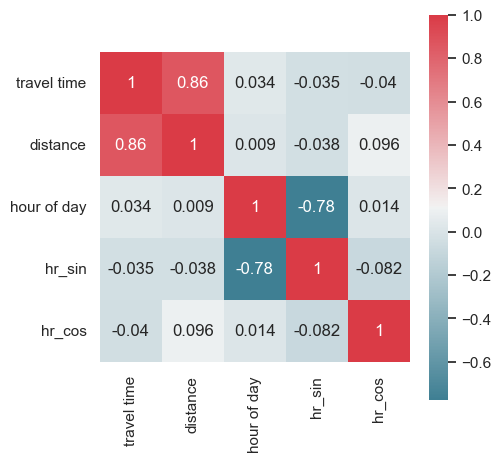

In [35]:
# run correlation matrix and plot
my_df = df[['travel time','distance','hour of day','hr_sin','hr_cos']]
f, ax = plt.subplots(figsize=(5,5))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

### cyclical encoding of hour

In [36]:
x = np.array(df[['distance','hr_sin','hr_cos']])
y = np.array(df['travel time'])
x

array([[ 2.88826596e-01, -1.00000000e+00, -1.83697020e-16],
       [ 2.91978652e-01, -7.07106781e-01,  7.07106781e-01],
       [ 2.91245718e-01, -9.65925826e-01,  2.58819045e-01],
       ...,
       [ 5.98423508e-01,  2.58819045e-01,  9.65925826e-01],
       [ 6.05847786e-01,  7.07106781e-01,  7.07106781e-01],
       [ 5.89407276e-01, -2.58819045e-01,  9.65925826e-01]])

In [37]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12910, 3)
(3228, 3)


In [39]:
# inputs: distance + hour
model2_0 = nnmodel(5, num_hlayers=1,Epoch=500)
model2_0

Epoch 1/500
404/404 [==============================] - 1s 868us/step - loss: 1083726.7500 - mape: 99.9110 - rmse: 1041.0220 - val_loss: 1053349.2500 - val_mape: 99.7323 - val_rmse: 1026.3280
Epoch 2/500
404/404 [==============================] - 0s 719us/step - loss: 1077446.0000 - mape: 99.4433 - rmse: 1038.0010 - val_loss: 1044451.6250 - val_mape: 99.0536 - val_rmse: 1021.9841
Epoch 3/500
404/404 [==============================] - 0s 710us/step - loss: 1064510.7500 - mape: 98.4766 - rmse: 1031.7513 - val_loss: 1028396.8750 - val_mape: 97.8211 - val_rmse: 1014.0991
Epoch 4/500
404/404 [==============================] - 0s 728us/step - loss: 1045399.9375 - mape: 97.0399 - rmse: 1022.4480 - val_loss: 1007475.5000 - val_mape: 96.1917 - val_rmse: 1003.7308
Epoch 5/500
404/404 [==============================] - 0s 735us/step - loss: 1021848.1875 - mape: 95.2626 - rmse: 1010.8651 - val_loss: 982657.6875 - val_mape: 94.2282 - val_rmse: 991.2909
Epoch 6/500
404/404 [==========================

Epoch 88/500
404/404 [==============================] - 0s 702us/step - loss: 67430.2344 - mape: 26.0809 - rmse: 259.6733 - val_loss: 67939.2188 - val_mape: 26.1361 - val_rmse: 260.6515
Epoch 89/500
404/404 [==============================] - 0s 716us/step - loss: 67272.6641 - mape: 25.8749 - rmse: 259.3698 - val_loss: 67790.1250 - val_mape: 25.8360 - val_rmse: 260.3654
Epoch 90/500
404/404 [==============================] - 0s 717us/step - loss: 67141.3984 - mape: 25.5469 - rmse: 259.1166 - val_loss: 67666.8203 - val_mape: 25.6194 - val_rmse: 260.1285
Epoch 91/500
404/404 [==============================] - 0s 707us/step - loss: 67029.7422 - mape: 25.3020 - rmse: 258.9010 - val_loss: 67563.0469 - val_mape: 25.4634 - val_rmse: 259.9289
Epoch 92/500
404/404 [==============================] - 0s 724us/step - loss: 66937.9688 - mape: 25.2068 - rmse: 258.7237 - val_loss: 67470.1641 - val_mape: 25.1889 - val_rmse: 259.7502
Epoch 93/500
404/404 [==============================] - 0s 712us/step 

Epoch 132/500
404/404 [==============================] - 0s 707us/step - loss: 66454.9766 - mape: 23.2773 - rmse: 257.7886 - val_loss: 67008.1406 - val_mape: 23.3835 - val_rmse: 258.8593
Epoch 133/500
404/404 [==============================] - 0s 691us/step - loss: 66455.8047 - mape: 23.1989 - rmse: 257.7902 - val_loss: 67008.7344 - val_mape: 23.3839 - val_rmse: 258.8604
Epoch 134/500
404/404 [==============================] - 0s 744us/step - loss: 66454.7031 - mape: 23.2535 - rmse: 257.7881 - val_loss: 67009.5781 - val_mape: 23.4002 - val_rmse: 258.8621
Epoch 135/500
404/404 [==============================] - 0s 707us/step - loss: 66454.6484 - mape: 23.2994 - rmse: 257.7880 - val_loss: 67008.7188 - val_mape: 23.3633 - val_rmse: 258.8604
Epoch 136/500
404/404 [==============================] - 0s 712us/step - loss: 66453.2500 - mape: 23.1459 - rmse: 257.7853 - val_loss: 67013.4297 - val_mape: 23.4676 - val_rmse: 258.8695
Epoch 137/500
404/404 [==============================] - 0s 714us

Epoch 176/500
404/404 [==============================] - 0s 745us/step - loss: 66453.0312 - mape: 23.2469 - rmse: 257.7849 - val_loss: 67010.0781 - val_mape: 23.3400 - val_rmse: 258.8630
Epoch 177/500
404/404 [==============================] - 0s 720us/step - loss: 66453.5938 - mape: 23.2354 - rmse: 257.7859 - val_loss: 67009.5391 - val_mape: 23.3579 - val_rmse: 258.8620
Epoch 178/500
404/404 [==============================] - 0s 696us/step - loss: 66456.0703 - mape: 23.1984 - rmse: 257.7907 - val_loss: 67010.9688 - val_mape: 23.4018 - val_rmse: 258.8648
Epoch 179/500
404/404 [==============================] - 0s 715us/step - loss: 66452.7344 - mape: 23.1634 - rmse: 257.7843 - val_loss: 67010.9531 - val_mape: 23.4026 - val_rmse: 258.8647
Epoch 180/500
404/404 [==============================] - 0s 720us/step - loss: 66454.0781 - mape: 23.2202 - rmse: 257.7869 - val_loss: 67009.6562 - val_mape: 23.3896 - val_rmse: 258.8622
Epoch 181/500
404/404 [==============================] - 0s 721us

Epoch 220/500
404/404 [==============================] - 0s 720us/step - loss: 66456.5156 - mape: 23.1641 - rmse: 257.7916 - val_loss: 67011.8047 - val_mape: 23.4228 - val_rmse: 258.8664
Epoch 221/500
404/404 [==============================] - 0s 698us/step - loss: 66453.6094 - mape: 23.2103 - rmse: 257.7860 - val_loss: 67011.0156 - val_mape: 23.4151 - val_rmse: 258.8649
Epoch 222/500
404/404 [==============================] - 0s 706us/step - loss: 66453.4922 - mape: 23.2700 - rmse: 257.7857 - val_loss: 67007.2031 - val_mape: 23.3440 - val_rmse: 258.8575
Epoch 223/500
404/404 [==============================] - 0s 745us/step - loss: 66457.2500 - mape: 23.2140 - rmse: 257.7930 - val_loss: 67008.8438 - val_mape: 23.3665 - val_rmse: 258.8607
Epoch 224/500
404/404 [==============================] - 0s 695us/step - loss: 66453.4375 - mape: 23.1548 - rmse: 257.7856 - val_loss: 67014.7500 - val_mape: 23.4581 - val_rmse: 258.8721
Epoch 225/500
404/404 [==============================] - 0s 699us

Epoch 264/500
404/404 [==============================] - 0s 720us/step - loss: 66454.5703 - mape: 23.1743 - rmse: 257.7878 - val_loss: 67011.2969 - val_mape: 23.4089 - val_rmse: 258.8654
Epoch 265/500
404/404 [==============================] - 0s 719us/step - loss: 66456.2266 - mape: 23.2083 - rmse: 257.7910 - val_loss: 67011.5703 - val_mape: 23.4152 - val_rmse: 258.8659
Epoch 266/500
404/404 [==============================] - 0s 725us/step - loss: 66454.5859 - mape: 23.2384 - rmse: 257.7879 - val_loss: 67009.0391 - val_mape: 23.3850 - val_rmse: 258.8611
Epoch 267/500
404/404 [==============================] - 0s 692us/step - loss: 66456.1953 - mape: 23.1979 - rmse: 257.7910 - val_loss: 67010.0000 - val_mape: 23.4034 - val_rmse: 258.8629
Epoch 268/500
404/404 [==============================] - 0s 733us/step - loss: 66453.8438 - mape: 23.2320 - rmse: 257.7864 - val_loss: 67009.0781 - val_mape: 23.3888 - val_rmse: 258.8611
Epoch 269/500
404/404 [==============================] - 0s 721us

Epoch 308/500
404/404 [==============================] - 0s 715us/step - loss: 66452.2188 - mape: 23.2183 - rmse: 257.7833 - val_loss: 67009.6484 - val_mape: 23.3990 - val_rmse: 258.8622
Epoch 309/500
404/404 [==============================] - 0s 756us/step - loss: 66454.6172 - mape: 23.2223 - rmse: 257.7879 - val_loss: 67010.5234 - val_mape: 23.4178 - val_rmse: 258.8639
Epoch 310/500
404/404 [==============================] - 0s 694us/step - loss: 66454.4531 - mape: 23.1788 - rmse: 257.7876 - val_loss: 67009.4531 - val_mape: 23.3927 - val_rmse: 258.8618
Epoch 311/500
404/404 [==============================] - 0s 744us/step - loss: 66454.9922 - mape: 23.1782 - rmse: 257.7887 - val_loss: 67012.6797 - val_mape: 23.4277 - val_rmse: 258.8681
Epoch 312/500
404/404 [==============================] - 0s 725us/step - loss: 66453.8594 - mape: 23.2684 - rmse: 257.7865 - val_loss: 67008.7188 - val_mape: 23.3750 - val_rmse: 258.8604
Epoch 313/500
404/404 [==============================] - 0s 702us

Epoch 352/500
404/404 [==============================] - 0s 719us/step - loss: 66455.0156 - mape: 23.1735 - rmse: 257.7887 - val_loss: 67009.6719 - val_mape: 23.3907 - val_rmse: 258.8623
Epoch 353/500
404/404 [==============================] - 0s 720us/step - loss: 66453.9375 - mape: 23.2699 - rmse: 257.7866 - val_loss: 67010.0000 - val_mape: 23.3765 - val_rmse: 258.8629
Epoch 354/500
404/404 [==============================] - 0s 720us/step - loss: 66454.2266 - mape: 23.2341 - rmse: 257.7872 - val_loss: 67005.5234 - val_mape: 23.3114 - val_rmse: 258.8542
Epoch 355/500
404/404 [==============================] - 0s 707us/step - loss: 66455.6094 - mape: 23.1935 - rmse: 257.7899 - val_loss: 67009.1016 - val_mape: 23.3625 - val_rmse: 258.8612
Epoch 356/500
404/404 [==============================] - 0s 695us/step - loss: 66454.8516 - mape: 23.1938 - rmse: 257.7884 - val_loss: 67009.6641 - val_mape: 23.3875 - val_rmse: 258.8622
Epoch 357/500
404/404 [==============================] - 0s 724us

Epoch 396/500
404/404 [==============================] - 0s 699us/step - loss: 66453.6406 - mape: 23.2024 - rmse: 257.7860 - val_loss: 67017.1719 - val_mape: 23.4706 - val_rmse: 258.8767
Epoch 397/500
404/404 [==============================] - 0s 725us/step - loss: 66456.0156 - mape: 23.2733 - rmse: 257.7906 - val_loss: 67014.3594 - val_mape: 23.4360 - val_rmse: 258.8713
Epoch 398/500
404/404 [==============================] - 0s 728us/step - loss: 66454.8906 - mape: 23.2147 - rmse: 257.7885 - val_loss: 67008.5391 - val_mape: 23.3809 - val_rmse: 258.8601
Epoch 399/500
404/404 [==============================] - 0s 722us/step - loss: 66452.4375 - mape: 23.2667 - rmse: 257.7837 - val_loss: 67008.1094 - val_mape: 23.3676 - val_rmse: 258.8593
Epoch 400/500
404/404 [==============================] - 0s 726us/step - loss: 66454.8047 - mape: 23.1808 - rmse: 257.7883 - val_loss: 67010.1328 - val_mape: 23.3926 - val_rmse: 258.8632
Epoch 401/500
404/404 [==============================] - 0s 716us

Epoch 440/500
404/404 [==============================] - 0s 720us/step - loss: 66453.3438 - mape: 23.2624 - rmse: 257.7855 - val_loss: 67008.2656 - val_mape: 23.3324 - val_rmse: 258.8596
Epoch 441/500
404/404 [==============================] - 0s 706us/step - loss: 66453.8359 - mape: 23.1849 - rmse: 257.7864 - val_loss: 67008.8281 - val_mape: 23.3754 - val_rmse: 258.8606
Epoch 442/500
404/404 [==============================] - 0s 721us/step - loss: 66454.7656 - mape: 23.2399 - rmse: 257.7882 - val_loss: 67006.8203 - val_mape: 23.3346 - val_rmse: 258.8568
Epoch 443/500
404/404 [==============================] - 0s 705us/step - loss: 66453.3750 - mape: 23.1531 - rmse: 257.7855 - val_loss: 67012.6250 - val_mape: 23.4257 - val_rmse: 258.8680
Epoch 444/500
404/404 [==============================] - 0s 719us/step - loss: 66455.3281 - mape: 23.2125 - rmse: 257.7893 - val_loss: 67011.6562 - val_mape: 23.4070 - val_rmse: 258.8661
Epoch 445/500
404/404 [==============================] - 0s 714us

Epoch 484/500
404/404 [==============================] - 0s 711us/step - loss: 66452.8672 - mape: 23.3006 - rmse: 257.7845 - val_loss: 67007.9609 - val_mape: 23.3634 - val_rmse: 258.8589
Epoch 485/500
404/404 [==============================] - 0s 726us/step - loss: 66455.9844 - mape: 23.1800 - rmse: 257.7906 - val_loss: 67011.8594 - val_mape: 23.4176 - val_rmse: 258.8665
Epoch 486/500
404/404 [==============================] - 0s 709us/step - loss: 66454.8125 - mape: 23.2278 - rmse: 257.7883 - val_loss: 67009.8906 - val_mape: 23.3685 - val_rmse: 258.8627
Epoch 487/500
404/404 [==============================] - 0s 707us/step - loss: 66454.5000 - mape: 23.2242 - rmse: 257.7877 - val_loss: 67010.5391 - val_mape: 23.3990 - val_rmse: 258.8640
Epoch 488/500
404/404 [==============================] - 0s 705us/step - loss: 66454.2812 - mape: 23.1292 - rmse: 257.7873 - val_loss: 67013.6719 - val_mape: 23.4257 - val_rmse: 258.8700
Epoch 489/500
404/404 [==============================] - 0s 721us

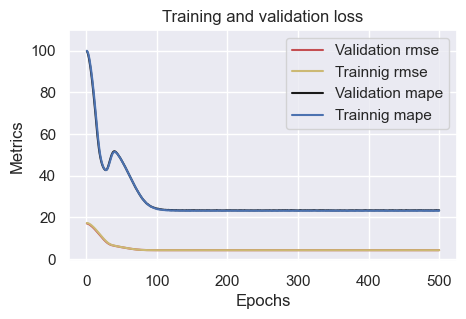

In [40]:
plotme(model2_0)

In [41]:
# inputs: distance + hour
model2_1 = nnmodel(20, num_hlayers=1,Epoch=500)
model2_1

Epoch 1/500
404/404 [==============================] - 1s 872us/step - loss: 1079619.3750 - mape: 99.5606 - rmse: 1039.0474 - val_loss: 1041682.0625 - val_mape: 98.7712 - val_rmse: 1020.6283
Epoch 2/500
404/404 [==============================] - 0s 703us/step - loss: 1047472.7500 - mape: 97.0964 - rmse: 1023.4612 - val_loss: 993304.1250 - val_mape: 94.9425 - val_rmse: 996.6464
Epoch 3/500
404/404 [==============================] - 0s 734us/step - loss: 983821.1875 - mape: 92.1200 - rmse: 991.8776 - val_loss: 919684.9375 - val_mape: 88.8891 - val_rmse: 959.0021
Epoch 4/500
404/404 [==============================] - 0s 729us/step - loss: 900249.3750 - mape: 85.2603 - rmse: 948.8147 - val_loss: 831918.3750 - val_mape: 81.2802 - val_rmse: 912.0956
Epoch 5/500
404/404 [==============================] - 0s 744us/step - loss: 805781.0625 - mape: 77.0776 - rmse: 897.6531 - val_loss: 736954.4375 - val_mape: 72.4569 - val_rmse: 858.4605
Epoch 6/500
404/404 [==============================] - 0s 7

Epoch 45/500
404/404 [==============================] - 0s 744us/step - loss: 66092.1172 - mape: 23.4454 - rmse: 257.0839 - val_loss: 66528.5469 - val_mape: 23.5081 - val_rmse: 257.9313
Epoch 46/500
404/404 [==============================] - 0s 750us/step - loss: 66051.8516 - mape: 23.2717 - rmse: 257.0056 - val_loss: 66506.2578 - val_mape: 23.4521 - val_rmse: 257.8881
Epoch 47/500
404/404 [==============================] - 0s 726us/step - loss: 66027.2578 - mape: 23.3082 - rmse: 256.9577 - val_loss: 66483.6719 - val_mape: 23.4615 - val_rmse: 257.8443
Epoch 48/500
404/404 [==============================] - 0s 702us/step - loss: 65991.3047 - mape: 23.2484 - rmse: 256.8877 - val_loss: 66458.0547 - val_mape: 23.3612 - val_rmse: 257.7946
Epoch 49/500
404/404 [==============================] - 0s 694us/step - loss: 65958.4062 - mape: 23.2358 - rmse: 256.8237 - val_loss: 66427.4766 - val_mape: 23.2352 - val_rmse: 257.7353
Epoch 50/500
404/404 [==============================] - 0s 743us/step 

404/404 [==============================] - 0s 705us/step - loss: 64737.8906 - mape: 22.4894 - rmse: 254.4364 - val_loss: 65338.8633 - val_mape: 22.6684 - val_rmse: 255.6147
Epoch 90/500
404/404 [==============================] - 0s 701us/step - loss: 64708.4336 - mape: 22.4508 - rmse: 254.3785 - val_loss: 65330.5469 - val_mape: 22.7251 - val_rmse: 255.5984
Epoch 91/500
404/404 [==============================] - 0s 716us/step - loss: 64695.7031 - mape: 22.3866 - rmse: 254.3535 - val_loss: 65318.7305 - val_mape: 22.7879 - val_rmse: 255.5753
Epoch 92/500
404/404 [==============================] - 0s 717us/step - loss: 64671.0820 - mape: 22.2987 - rmse: 254.3051 - val_loss: 65332.7617 - val_mape: 22.9540 - val_rmse: 255.6027
Epoch 93/500
404/404 [==============================] - 0s 719us/step - loss: 64673.2305 - mape: 22.5060 - rmse: 254.3093 - val_loss: 65296.7344 - val_mape: 22.7152 - val_rmse: 255.5323
Epoch 94/500
404/404 [==============================] - 0s 735us/step - loss: 64656

Epoch 133/500
404/404 [==============================] - 0s 732us/step - loss: 64435.4727 - mape: 22.0101 - rmse: 253.8414 - val_loss: 65048.6836 - val_mape: 22.3549 - val_rmse: 255.0464
Epoch 134/500
404/404 [==============================] - 0s 795us/step - loss: 64440.2773 - mape: 22.0511 - rmse: 253.8509 - val_loss: 65033.1602 - val_mape: 22.1481 - val_rmse: 255.0160
Epoch 135/500
404/404 [==============================] - 0s 744us/step - loss: 64430.1250 - mape: 21.9349 - rmse: 253.8309 - val_loss: 65049.3281 - val_mape: 22.3467 - val_rmse: 255.0477
Epoch 136/500
404/404 [==============================] - 0s 737us/step - loss: 64426.9102 - mape: 21.9716 - rmse: 253.8246 - val_loss: 65032.8320 - val_mape: 22.2716 - val_rmse: 255.0154
Epoch 137/500
404/404 [==============================] - 0s 705us/step - loss: 64423.5195 - mape: 21.9401 - rmse: 253.8179 - val_loss: 65028.3359 - val_mape: 22.2834 - val_rmse: 255.0065
Epoch 138/500
404/404 [==============================] - 0s 710us

Epoch 177/500
404/404 [==============================] - 0s 719us/step - loss: 64352.7734 - mape: 21.9396 - rmse: 253.6785 - val_loss: 64948.1797 - val_mape: 22.1465 - val_rmse: 254.8493
Epoch 178/500
404/404 [==============================] - 0s 732us/step - loss: 64350.3203 - mape: 21.9332 - rmse: 253.6736 - val_loss: 64943.9297 - val_mape: 22.0436 - val_rmse: 254.8410
Epoch 179/500
404/404 [==============================] - 0s 714us/step - loss: 64349.1836 - mape: 21.7846 - rmse: 253.6714 - val_loss: 64958.9805 - val_mape: 22.2908 - val_rmse: 254.8705
Epoch 180/500
404/404 [==============================] - 0s 720us/step - loss: 64352.0430 - mape: 21.9073 - rmse: 253.6770 - val_loss: 64950.3242 - val_mape: 22.2293 - val_rmse: 254.8535
Epoch 181/500
404/404 [==============================] - 0s 705us/step - loss: 64341.9297 - mape: 21.8937 - rmse: 253.6571 - val_loss: 64953.9766 - val_mape: 22.2055 - val_rmse: 254.8607
Epoch 182/500
404/404 [==============================] - 0s 719us

Epoch 221/500
404/404 [==============================] - 0s 720us/step - loss: 64299.6602 - mape: 21.8411 - rmse: 253.5738 - val_loss: 64908.0977 - val_mape: 22.1498 - val_rmse: 254.7707
Epoch 222/500
404/404 [==============================] - 0s 719us/step - loss: 64294.9023 - mape: 21.8329 - rmse: 253.5644 - val_loss: 64901.7070 - val_mape: 22.1001 - val_rmse: 254.7581
Epoch 223/500
404/404 [==============================] - 0s 719us/step - loss: 64295.5703 - mape: 21.7619 - rmse: 253.5657 - val_loss: 64926.8438 - val_mape: 22.3539 - val_rmse: 254.8075
Epoch 224/500
404/404 [==============================] - 0s 725us/step - loss: 64297.6523 - mape: 21.9540 - rmse: 253.5698 - val_loss: 64894.2109 - val_mape: 21.9924 - val_rmse: 254.7434
Epoch 225/500
404/404 [==============================] - 0s 720us/step - loss: 64296.9336 - mape: 21.7971 - rmse: 253.5684 - val_loss: 64895.5000 - val_mape: 22.0377 - val_rmse: 254.7460
Epoch 226/500
404/404 [==============================] - 0s 719us

Epoch 265/500
404/404 [==============================] - 0s 730us/step - loss: 64275.3945 - mape: 21.8069 - rmse: 253.5259 - val_loss: 64885.4062 - val_mape: 21.9650 - val_rmse: 254.7261
Epoch 266/500
404/404 [==============================] - 0s 709us/step - loss: 64277.9219 - mape: 21.6785 - rmse: 253.5309 - val_loss: 64897.1914 - val_mape: 22.1823 - val_rmse: 254.7493
Epoch 267/500
404/404 [==============================] - 0s 699us/step - loss: 64275.4844 - mape: 21.7823 - rmse: 253.5261 - val_loss: 64892.3008 - val_mape: 22.2050 - val_rmse: 254.7397
Epoch 268/500
404/404 [==============================] - 0s 714us/step - loss: 64280.4297 - mape: 21.8787 - rmse: 253.5359 - val_loss: 64884.3125 - val_mape: 22.0536 - val_rmse: 254.7240
Epoch 269/500
404/404 [==============================] - 0s 705us/step - loss: 64278.2578 - mape: 21.8190 - rmse: 253.5316 - val_loss: 64883.6992 - val_mape: 21.9551 - val_rmse: 254.7228
Epoch 270/500
404/404 [==============================] - 0s 702us

Epoch 309/500
404/404 [==============================] - 0s 728us/step - loss: 64257.6719 - mape: 21.7428 - rmse: 253.4910 - val_loss: 64884.7734 - val_mape: 22.2363 - val_rmse: 254.7249
Epoch 310/500
404/404 [==============================] - 0s 719us/step - loss: 64261.9570 - mape: 21.8810 - rmse: 253.4994 - val_loss: 64869.4258 - val_mape: 21.9096 - val_rmse: 254.6948
Epoch 311/500
404/404 [==============================] - 0s 720us/step - loss: 64258.5469 - mape: 21.7138 - rmse: 253.4927 - val_loss: 64893.6641 - val_mape: 22.1820 - val_rmse: 254.7424
Epoch 312/500
404/404 [==============================] - 0s 719us/step - loss: 64258.1016 - mape: 21.8848 - rmse: 253.4918 - val_loss: 64867.7539 - val_mape: 21.9299 - val_rmse: 254.6915
Epoch 313/500
404/404 [==============================] - 0s 733us/step - loss: 64260.9023 - mape: 21.7105 - rmse: 253.4973 - val_loss: 64875.0039 - val_mape: 22.1281 - val_rmse: 254.7057
Epoch 314/500
404/404 [==============================] - 0s 732us

Epoch 353/500
404/404 [==============================] - 0s 708us/step - loss: 64252.0703 - mape: 21.7542 - rmse: 253.4799 - val_loss: 64868.9453 - val_mape: 22.1240 - val_rmse: 254.6938
Epoch 354/500
404/404 [==============================] - 0s 759us/step - loss: 64250.9883 - mape: 21.7551 - rmse: 253.4778 - val_loss: 64873.6406 - val_mape: 22.1272 - val_rmse: 254.7030
Epoch 355/500
404/404 [==============================] - 0s 721us/step - loss: 64254.4648 - mape: 21.8181 - rmse: 253.4846 - val_loss: 64878.8438 - val_mape: 22.1497 - val_rmse: 254.7133
Epoch 356/500
404/404 [==============================] - 0s 681us/step - loss: 64251.3047 - mape: 21.8859 - rmse: 253.4784 - val_loss: 64859.8750 - val_mape: 21.8400 - val_rmse: 254.6760
Epoch 357/500
404/404 [==============================] - 0s 695us/step - loss: 64255.4531 - mape: 21.7531 - rmse: 253.4866 - val_loss: 64862.3789 - val_mape: 21.9222 - val_rmse: 254.6809
Epoch 358/500
404/404 [==============================] - 0s 695us

Epoch 397/500
404/404 [==============================] - 0s 716us/step - loss: 64245.1562 - mape: 21.7698 - rmse: 253.4663 - val_loss: 64864.8594 - val_mape: 22.0431 - val_rmse: 254.6858
Epoch 398/500
404/404 [==============================] - 0s 706us/step - loss: 64247.5000 - mape: 21.7982 - rmse: 253.4709 - val_loss: 64862.9180 - val_mape: 21.9647 - val_rmse: 254.6820
Epoch 399/500
404/404 [==============================] - 0s 735us/step - loss: 64248.0781 - mape: 21.7711 - rmse: 253.4720 - val_loss: 64857.9883 - val_mape: 21.9229 - val_rmse: 254.6723
Epoch 400/500
404/404 [==============================] - 0s 719us/step - loss: 64250.6406 - mape: 21.7139 - rmse: 253.4771 - val_loss: 64860.5508 - val_mape: 22.0380 - val_rmse: 254.6774
Epoch 401/500
404/404 [==============================] - 0s 715us/step - loss: 64250.3477 - mape: 21.8106 - rmse: 253.4765 - val_loss: 64863.8828 - val_mape: 21.9347 - val_rmse: 254.6839
Epoch 402/500
404/404 [==============================] - 0s 736us

Epoch 441/500
404/404 [==============================] - 0s 739us/step - loss: 64246.9180 - mape: 21.8062 - rmse: 253.4698 - val_loss: 64864.2188 - val_mape: 22.0916 - val_rmse: 254.6846
Epoch 442/500
404/404 [==============================] - 0s 719us/step - loss: 64247.3008 - mape: 21.8042 - rmse: 253.4705 - val_loss: 64859.5977 - val_mape: 21.9042 - val_rmse: 254.6755
Epoch 443/500
404/404 [==============================] - 0s 730us/step - loss: 64249.6836 - mape: 21.8110 - rmse: 253.4752 - val_loss: 64856.5469 - val_mape: 21.8935 - val_rmse: 254.6695
Epoch 444/500
404/404 [==============================] - 0s 718us/step - loss: 64255.6562 - mape: 21.6187 - rmse: 253.4870 - val_loss: 64871.0039 - val_mape: 22.0827 - val_rmse: 254.6979
Epoch 445/500
404/404 [==============================] - 0s 704us/step - loss: 64245.6484 - mape: 21.8898 - rmse: 253.4673 - val_loss: 64868.6133 - val_mape: 21.9726 - val_rmse: 254.6932
Epoch 446/500
404/404 [==============================] - 0s 719us

Epoch 485/500
404/404 [==============================] - 0s 731us/step - loss: 64249.5586 - mape: 21.7883 - rmse: 253.4750 - val_loss: 64870.9141 - val_mape: 22.1080 - val_rmse: 254.6977
Epoch 486/500
404/404 [==============================] - 0s 702us/step - loss: 64245.6953 - mape: 21.7117 - rmse: 253.4673 - val_loss: 64868.0703 - val_mape: 22.1375 - val_rmse: 254.6921
Epoch 487/500
404/404 [==============================] - 0s 738us/step - loss: 64243.5859 - mape: 21.7648 - rmse: 253.4632 - val_loss: 64867.9375 - val_mape: 22.1013 - val_rmse: 254.6918
Epoch 488/500
404/404 [==============================] - 0s 719us/step - loss: 64241.4102 - mape: 21.8202 - rmse: 253.4589 - val_loss: 64853.2891 - val_mape: 21.9495 - val_rmse: 254.6631
Epoch 489/500
404/404 [==============================] - 0s 729us/step - loss: 64246.5625 - mape: 21.6580 - rmse: 253.4691 - val_loss: 64885.0898 - val_mape: 22.2670 - val_rmse: 254.7255
Epoch 490/500
404/404 [==============================] - 0s 692us

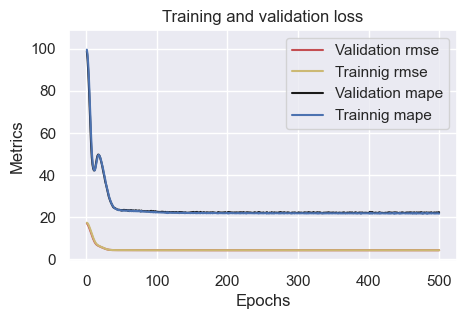

In [42]:
plotme(model2_1)

In [43]:
# inputs: distance + hour
model2_2 = nnmodel(50, num_hlayers=1,Epoch=1000)
model2_2

Epoch 1/1000
404/404 [==============================] - 1s 868us/step - loss: 1071448.3750 - mape: 98.9345 - rmse: 1035.1079 - val_loss: 1018084.3750 - val_mape: 96.9155 - val_rmse: 1009.0016
Epoch 2/1000
404/404 [==============================] - 0s 735us/step - loss: 993115.6250 - mape: 92.8490 - rmse: 996.5519 - val_loss: 905571.1875 - val_mape: 87.6993 - val_rmse: 951.6151
Epoch 3/1000
404/404 [==============================] - 0s 736us/step - loss: 853272.2500 - mape: 81.1676 - rmse: 923.7274 - val_loss: 752659.1250 - val_mape: 73.9794 - val_rmse: 867.5593
Epoch 4/1000
404/404 [==============================] - 0s 741us/step - loss: 691061.8125 - mape: 66.1376 - rmse: 831.3013 - val_loss: 594635.0000 - val_mape: 58.2463 - val_rmse: 771.1258
Epoch 5/1000
404/404 [==============================] - 0s 762us/step - loss: 536318.5625 - mape: 52.5417 - rmse: 732.3377 - val_loss: 454497.0000 - val_mape: 47.8505 - val_rmse: 674.1639
Epoch 6/1000
404/404 [==============================] - 

Epoch 45/1000
404/404 [==============================] - 0s 745us/step - loss: 65226.4844 - mape: 22.9589 - rmse: 255.3948 - val_loss: 65800.7500 - val_mape: 22.7174 - val_rmse: 256.5166
Epoch 46/1000
404/404 [==============================] - 0s 722us/step - loss: 65190.4297 - mape: 22.6822 - rmse: 255.3242 - val_loss: 65776.4688 - val_mape: 23.1665 - val_rmse: 256.4692
Epoch 47/1000
404/404 [==============================] - 0s 726us/step - loss: 65147.0664 - mape: 22.8806 - rmse: 255.2392 - val_loss: 65724.0234 - val_mape: 22.9319 - val_rmse: 256.3670
Epoch 48/1000
404/404 [==============================] - 0s 718us/step - loss: 65092.7109 - mape: 22.7050 - rmse: 255.1327 - val_loss: 65694.7578 - val_mape: 23.2631 - val_rmse: 256.3099
Epoch 49/1000
404/404 [==============================] - 0s 743us/step - loss: 65061.3008 - mape: 22.8079 - rmse: 255.0712 - val_loss: 65619.0156 - val_mape: 22.8978 - val_rmse: 256.1621
Epoch 50/1000
404/404 [==============================] - 0s 745us

Epoch 89/1000
404/404 [==============================] - 0s 745us/step - loss: 64322.3516 - mape: 21.9026 - rmse: 253.6185 - val_loss: 64925.8555 - val_mape: 22.1193 - val_rmse: 254.8055
Epoch 90/1000
404/404 [==============================] - 0s 731us/step - loss: 64329.2422 - mape: 21.9169 - rmse: 253.6321 - val_loss: 64915.0586 - val_mape: 21.9690 - val_rmse: 254.7843
Epoch 91/1000
404/404 [==============================] - 0s 730us/step - loss: 64319.6914 - mape: 21.7680 - rmse: 253.6133 - val_loss: 64940.0156 - val_mape: 22.3394 - val_rmse: 254.8333
Epoch 92/1000
404/404 [==============================] - 0s 744us/step - loss: 64321.8789 - mape: 21.9289 - rmse: 253.6176 - val_loss: 64928.4375 - val_mape: 22.3213 - val_rmse: 254.8106
Epoch 93/1000
404/404 [==============================] - 0s 745us/step - loss: 64322.4727 - mape: 21.8865 - rmse: 253.6188 - val_loss: 64938.2656 - val_mape: 22.4368 - val_rmse: 254.8299
Epoch 94/1000
404/404 [==============================] - 0s 719us

Epoch 133/1000
404/404 [==============================] - 0s 724us/step - loss: 64273.9258 - mape: 21.7233 - rmse: 253.5230 - val_loss: 64846.3594 - val_mape: 21.9135 - val_rmse: 254.6495
Epoch 134/1000
404/404 [==============================] - 0s 739us/step - loss: 64258.8242 - mape: 21.7161 - rmse: 253.4932 - val_loss: 64864.3477 - val_mape: 22.1387 - val_rmse: 254.6848
Epoch 135/1000
404/404 [==============================] - 0s 745us/step - loss: 64270.1484 - mape: 21.8431 - rmse: 253.5156 - val_loss: 64850.5312 - val_mape: 21.9164 - val_rmse: 254.6577
Epoch 136/1000
404/404 [==============================] - 0s 748us/step - loss: 64265.0234 - mape: 21.7861 - rmse: 253.5055 - val_loss: 64880.6094 - val_mape: 22.1227 - val_rmse: 254.7167
Epoch 137/1000
404/404 [==============================] - 0s 740us/step - loss: 64268.6680 - mape: 21.8237 - rmse: 253.5127 - val_loss: 64857.2578 - val_mape: 22.1442 - val_rmse: 254.6709
Epoch 138/1000
404/404 [==============================] - 0s

Epoch 220/1000
404/404 [==============================] - 0s 734us/step - loss: 64219.0234 - mape: 21.7668 - rmse: 253.4147 - val_loss: 64821.9961 - val_mape: 22.0185 - val_rmse: 254.6016
Epoch 221/1000
404/404 [==============================] - 0s 734us/step - loss: 64224.6055 - mape: 21.8060 - rmse: 253.4257 - val_loss: 64827.5156 - val_mape: 21.9630 - val_rmse: 254.6125
Epoch 222/1000
404/404 [==============================] - 0s 706us/step - loss: 64218.9219 - mape: 21.7237 - rmse: 253.4145 - val_loss: 64838.7461 - val_mape: 22.0447 - val_rmse: 254.6345
Epoch 223/1000
404/404 [==============================] - 0s 744us/step - loss: 64216.0352 - mape: 21.7481 - rmse: 253.4088 - val_loss: 64824.7812 - val_mape: 22.0522 - val_rmse: 254.6071
Epoch 224/1000
404/404 [==============================] - 0s 739us/step - loss: 64218.8906 - mape: 21.7460 - rmse: 253.4145 - val_loss: 64833.2148 - val_mape: 21.9817 - val_rmse: 254.6237
Epoch 225/1000
404/404 [==============================] - 0s

Epoch 307/1000
404/404 [==============================] - 0s 719us/step - loss: 64165.4727 - mape: 21.7300 - rmse: 253.3091 - val_loss: 64806.0312 - val_mape: 21.9139 - val_rmse: 254.5703
Epoch 308/1000
404/404 [==============================] - 0s 745us/step - loss: 64176.3281 - mape: 21.7168 - rmse: 253.3305 - val_loss: 64813.1211 - val_mape: 22.0573 - val_rmse: 254.5842
Epoch 309/1000
404/404 [==============================] - 0s 744us/step - loss: 64164.3086 - mape: 21.7079 - rmse: 253.3067 - val_loss: 64813.9102 - val_mape: 22.0038 - val_rmse: 254.5858
Epoch 310/1000
404/404 [==============================] - 0s 745us/step - loss: 64163.4141 - mape: 21.7901 - rmse: 253.3050 - val_loss: 64805.0352 - val_mape: 21.8641 - val_rmse: 254.5683
Epoch 311/1000
404/404 [==============================] - 0s 743us/step - loss: 64162.0859 - mape: 21.6765 - rmse: 253.3024 - val_loss: 64817.3477 - val_mape: 22.0541 - val_rmse: 254.5925
Epoch 312/1000
404/404 [==============================] - 0s

Epoch 394/1000
404/404 [==============================] - 0s 731us/step - loss: 64047.5898 - mape: 21.7996 - rmse: 253.0762 - val_loss: 64716.5156 - val_mape: 21.7274 - val_rmse: 254.3944
Epoch 395/1000
404/404 [==============================] - 0s 744us/step - loss: 64052.6289 - mape: 21.7513 - rmse: 253.0862 - val_loss: 64709.9336 - val_mape: 21.6777 - val_rmse: 254.3815
Epoch 396/1000
404/404 [==============================] - 0s 744us/step - loss: 64056.4766 - mape: 21.6007 - rmse: 253.0938 - val_loss: 64718.7148 - val_mape: 22.0111 - val_rmse: 254.3987
Epoch 397/1000
404/404 [==============================] - 0s 745us/step - loss: 64072.1016 - mape: 21.7522 - rmse: 253.1247 - val_loss: 64702.7812 - val_mape: 21.9055 - val_rmse: 254.3674
Epoch 398/1000
404/404 [==============================] - 0s 730us/step - loss: 64057.0000 - mape: 21.6623 - rmse: 253.0948 - val_loss: 64711.3984 - val_mape: 22.0146 - val_rmse: 254.3844
Epoch 399/1000
404/404 [==============================] - 0s

Epoch 481/1000
404/404 [==============================] - 0s 746us/step - loss: 63932.0820 - mape: 21.6687 - rmse: 252.8479 - val_loss: 64533.2344 - val_mape: 21.9910 - val_rmse: 254.0339
Epoch 482/1000
404/404 [==============================] - 0s 728us/step - loss: 63924.7734 - mape: 21.6331 - rmse: 252.8335 - val_loss: 64521.6211 - val_mape: 21.8501 - val_rmse: 254.0111
Epoch 483/1000
404/404 [==============================] - 0s 740us/step - loss: 63923.4883 - mape: 21.6346 - rmse: 252.8309 - val_loss: 64531.5234 - val_mape: 21.8589 - val_rmse: 254.0306
Epoch 484/1000
404/404 [==============================] - 0s 724us/step - loss: 63914.7227 - mape: 21.6507 - rmse: 252.8136 - val_loss: 64529.9844 - val_mape: 21.8408 - val_rmse: 254.0275
Epoch 485/1000
404/404 [==============================] - 0s 706us/step - loss: 63920.0664 - mape: 21.5608 - rmse: 252.8242 - val_loss: 64530.1680 - val_mape: 21.9992 - val_rmse: 254.0279
Epoch 486/1000
404/404 [==============================] - 0s

Epoch 568/1000
404/404 [==============================] - 0s 732us/step - loss: 63861.7695 - mape: 21.5719 - rmse: 252.7089 - val_loss: 64435.0625 - val_mape: 21.8637 - val_rmse: 253.8406
Epoch 569/1000
404/404 [==============================] - 0s 721us/step - loss: 63858.3359 - mape: 21.5988 - rmse: 252.7021 - val_loss: 64433.8789 - val_mape: 21.7102 - val_rmse: 253.8383
Epoch 570/1000
404/404 [==============================] - 0s 734us/step - loss: 63862.0000 - mape: 21.5637 - rmse: 252.7093 - val_loss: 64466.0078 - val_mape: 22.1011 - val_rmse: 253.9016
Epoch 571/1000
404/404 [==============================] - 0s 730us/step - loss: 63858.8516 - mape: 21.6007 - rmse: 252.7031 - val_loss: 64462.6211 - val_mape: 21.9917 - val_rmse: 253.8949
Epoch 572/1000
404/404 [==============================] - 0s 743us/step - loss: 63862.5742 - mape: 21.6709 - rmse: 252.7104 - val_loss: 64446.1523 - val_mape: 21.7749 - val_rmse: 253.8625
Epoch 573/1000
404/404 [==============================] - 0s

Epoch 655/1000
404/404 [==============================] - 0s 743us/step - loss: 63840.4258 - mape: 21.5768 - rmse: 252.6666 - val_loss: 64410.5430 - val_mape: 22.0772 - val_rmse: 253.7923
Epoch 656/1000
404/404 [==============================] - 0s 720us/step - loss: 63842.2148 - mape: 21.6500 - rmse: 252.6702 - val_loss: 64388.9648 - val_mape: 21.8199 - val_rmse: 253.7498
Epoch 657/1000
404/404 [==============================] - 0s 722us/step - loss: 63843.7617 - mape: 21.5767 - rmse: 252.6732 - val_loss: 64390.5000 - val_mape: 21.8245 - val_rmse: 253.7528
Epoch 658/1000
404/404 [==============================] - 0s 724us/step - loss: 63835.0117 - mape: 21.5264 - rmse: 252.6559 - val_loss: 64424.5781 - val_mape: 22.1543 - val_rmse: 253.8200
Epoch 659/1000
404/404 [==============================] - 0s 732us/step - loss: 63837.5664 - mape: 21.6793 - rmse: 252.6610 - val_loss: 64394.0820 - val_mape: 21.8556 - val_rmse: 253.7599
Epoch 660/1000
404/404 [==============================] - 0s

Epoch 742/1000
404/404 [==============================] - 0s 708us/step - loss: 63815.4023 - mape: 21.4849 - rmse: 252.6171 - val_loss: 64420.6992 - val_mape: 22.2595 - val_rmse: 253.8123
Epoch 743/1000
404/404 [==============================] - 0s 721us/step - loss: 63820.1289 - mape: 21.7935 - rmse: 252.6265 - val_loss: 64359.2188 - val_mape: 21.6124 - val_rmse: 253.6912
Epoch 744/1000
404/404 [==============================] - 0s 728us/step - loss: 63835.2695 - mape: 21.4814 - rmse: 252.6564 - val_loss: 64375.5078 - val_mape: 21.9630 - val_rmse: 253.7233
Epoch 745/1000
404/404 [==============================] - 0s 745us/step - loss: 63838.2930 - mape: 21.6617 - rmse: 252.6624 - val_loss: 64376.5156 - val_mape: 21.8709 - val_rmse: 253.7253
Epoch 746/1000
404/404 [==============================] - 0s 744us/step - loss: 63823.3516 - mape: 21.5965 - rmse: 252.6328 - val_loss: 64385.6094 - val_mape: 21.8759 - val_rmse: 253.7432
Epoch 747/1000
404/404 [==============================] - 0s

Epoch 829/1000
404/404 [==============================] - 0s 745us/step - loss: 63801.7969 - mape: 21.5590 - rmse: 252.5902 - val_loss: 64366.2695 - val_mape: 21.8655 - val_rmse: 253.7051
Epoch 830/1000
404/404 [==============================] - 0s 735us/step - loss: 63818.6055 - mape: 21.5224 - rmse: 252.6234 - val_loss: 64368.3516 - val_mape: 21.8573 - val_rmse: 253.7092
Epoch 831/1000
404/404 [==============================] - 0s 736us/step - loss: 63804.0898 - mape: 21.6796 - rmse: 252.5947 - val_loss: 64365.4922 - val_mape: 21.8916 - val_rmse: 253.7036
Epoch 832/1000
404/404 [==============================] - 0s 753us/step - loss: 63810.4844 - mape: 21.5897 - rmse: 252.6074 - val_loss: 64366.7969 - val_mape: 21.8798 - val_rmse: 253.7061
Epoch 833/1000
404/404 [==============================] - 0s 737us/step - loss: 63790.3281 - mape: 21.7419 - rmse: 252.5675 - val_loss: 64351.4609 - val_mape: 21.5601 - val_rmse: 253.6759
Epoch 834/1000
404/404 [==============================] - 0s

Epoch 916/1000
404/404 [==============================] - 0s 712us/step - loss: 63799.9102 - mape: 21.6457 - rmse: 252.5864 - val_loss: 64352.0039 - val_mape: 21.6128 - val_rmse: 253.6770
Epoch 917/1000
404/404 [==============================] - 0s 724us/step - loss: 63792.9375 - mape: 21.5228 - rmse: 252.5726 - val_loss: 64355.8477 - val_mape: 21.8817 - val_rmse: 253.6845
Epoch 918/1000
404/404 [==============================] - 0s 733us/step - loss: 63804.9531 - mape: 21.6476 - rmse: 252.5964 - val_loss: 64362.5078 - val_mape: 21.8713 - val_rmse: 253.6977
Epoch 919/1000
404/404 [==============================] - 0s 731us/step - loss: 63801.8672 - mape: 21.6552 - rmse: 252.5903 - val_loss: 64355.0977 - val_mape: 21.6772 - val_rmse: 253.6831
Epoch 920/1000
404/404 [==============================] - 0s 737us/step - loss: 63800.8906 - mape: 21.5599 - rmse: 252.5884 - val_loss: 64347.9805 - val_mape: 21.7961 - val_rmse: 253.6690
Epoch 921/1000
404/404 [==============================] - 0s

In [44]:
# plotme(model2_2)

In [45]:
# inputs: distance + hour
model2_3 = nnmodel(100, num_hlayers=1,Epoch=500)
model2_3

Epoch 1/500
404/404 [==============================] - 1s 935us/step - loss: 1064391.2500 - mape: 98.4001 - rmse: 1031.6934 - val_loss: 995243.3125 - val_mape: 95.1095 - val_rmse: 997.6188
Epoch 2/500
404/404 [==============================] - 0s 793us/step - loss: 940749.3750 - mape: 88.5922 - rmse: 969.9224 - val_loss: 825047.3750 - val_mape: 80.6800 - val_rmse: 908.3212
Epoch 3/500
404/404 [==============================] - 0s 760us/step - loss: 741561.4375 - mape: 71.1497 - rmse: 861.1396 - val_loss: 619728.0000 - val_mape: 60.7227 - val_rmse: 787.2280
Epoch 4/500
404/404 [==============================] - 0s 793us/step - loss: 539110.4375 - mape: 53.1183 - rmse: 734.2414 - val_loss: 438720.8438 - val_mape: 47.3999 - val_rmse: 662.3600
Epoch 5/500
404/404 [==============================] - 0s 802us/step - loss: 377465.5312 - mape: 44.5912 - rmse: 614.3823 - val_loss: 307107.5000 - val_mape: 43.0313 - val_rmse: 554.1728
Epoch 6/500
404/404 [==============================] - 0s 780us

Epoch 45/500
404/404 [==============================] - 0s 806us/step - loss: 64749.6445 - mape: 22.5387 - rmse: 254.4595 - val_loss: 65311.7383 - val_mape: 22.4547 - val_rmse: 255.5616
Epoch 46/500
404/404 [==============================] - 0s 773us/step - loss: 64689.7539 - mape: 22.4482 - rmse: 254.3418 - val_loss: 65258.3438 - val_mape: 22.4459 - val_rmse: 255.4571
Epoch 47/500
404/404 [==============================] - 0s 814us/step - loss: 64642.5430 - mape: 22.3202 - rmse: 254.2490 - val_loss: 65252.9883 - val_mape: 23.0061 - val_rmse: 255.4466
Epoch 48/500
404/404 [==============================] - 0s 782us/step - loss: 64606.5977 - mape: 22.5380 - rmse: 254.1783 - val_loss: 65166.4648 - val_mape: 22.2906 - val_rmse: 255.2772
Epoch 49/500
404/404 [==============================] - 0s 804us/step - loss: 64563.1016 - mape: 22.3740 - rmse: 254.0927 - val_loss: 65163.1484 - val_mape: 22.0604 - val_rmse: 255.2707
Epoch 50/500
404/404 [==============================] - 0s 783us/step 

404/404 [==============================] - 0s 818us/step - loss: 64166.5156 - mape: 21.6773 - rmse: 253.3111 - val_loss: 64882.8906 - val_mape: 22.6370 - val_rmse: 254.7212
Epoch 90/500
404/404 [==============================] - 0s 820us/step - loss: 64194.6016 - mape: 21.8508 - rmse: 253.3665 - val_loss: 64790.0586 - val_mape: 21.9945 - val_rmse: 254.5389
Epoch 91/500
404/404 [==============================] - 0s 792us/step - loss: 64160.1836 - mape: 21.9157 - rmse: 253.2986 - val_loss: 64805.7734 - val_mape: 21.4799 - val_rmse: 254.5698
Epoch 92/500
404/404 [==============================] - 0s 795us/step - loss: 64175.3945 - mape: 21.7122 - rmse: 253.3286 - val_loss: 64788.1055 - val_mape: 21.9566 - val_rmse: 254.5351
Epoch 93/500
404/404 [==============================] - 0s 794us/step - loss: 64171.1953 - mape: 21.7907 - rmse: 253.3203 - val_loss: 64797.3477 - val_mape: 21.7033 - val_rmse: 254.5532
Epoch 94/500
404/404 [==============================] - 0s 801us/step - loss: 64166

Epoch 133/500
404/404 [==============================] - 0s 807us/step - loss: 64068.8594 - mape: 21.7243 - rmse: 253.1183 - val_loss: 64732.6289 - val_mape: 22.1443 - val_rmse: 254.4261
Epoch 134/500
404/404 [==============================] - 0s 806us/step - loss: 64054.1484 - mape: 21.8232 - rmse: 253.0892 - val_loss: 64713.8477 - val_mape: 21.6639 - val_rmse: 254.3892
Epoch 135/500
404/404 [==============================] - 0s 806us/step - loss: 64068.7109 - mape: 21.6596 - rmse: 253.1180 - val_loss: 64728.1289 - val_mape: 21.9944 - val_rmse: 254.4172
Epoch 136/500
404/404 [==============================] - 0s 793us/step - loss: 64046.4609 - mape: 21.6724 - rmse: 253.0740 - val_loss: 64736.2227 - val_mape: 22.2287 - val_rmse: 254.4331
Epoch 137/500
404/404 [==============================] - 0s 780us/step - loss: 64068.2188 - mape: 21.7347 - rmse: 253.1170 - val_loss: 64714.6719 - val_mape: 21.9222 - val_rmse: 254.3908
Epoch 138/500
404/404 [==============================] - 0s 776us

Epoch 177/500
404/404 [==============================] - 0s 788us/step - loss: 63943.5938 - mape: 21.6768 - rmse: 252.8707 - val_loss: 64584.9414 - val_mape: 21.7372 - val_rmse: 254.1357
Epoch 178/500
404/404 [==============================] - 0s 794us/step - loss: 63948.9570 - mape: 21.6447 - rmse: 252.8813 - val_loss: 64595.9258 - val_mape: 21.6931 - val_rmse: 254.1573
Epoch 179/500
404/404 [==============================] - 0s 820us/step - loss: 63950.4453 - mape: 21.6102 - rmse: 252.8842 - val_loss: 64599.3125 - val_mape: 22.0932 - val_rmse: 254.1640
Epoch 180/500
404/404 [==============================] - 0s 784us/step - loss: 63945.1758 - mape: 21.7174 - rmse: 252.8738 - val_loss: 64596.0547 - val_mape: 21.9655 - val_rmse: 254.1575
Epoch 181/500
404/404 [==============================] - 0s 793us/step - loss: 63941.6992 - mape: 21.6509 - rmse: 252.8670 - val_loss: 64575.2422 - val_mape: 21.7775 - val_rmse: 254.1166
Epoch 182/500
404/404 [==============================] - 0s 794us

Epoch 221/500
404/404 [==============================] - 0s 795us/step - loss: 63855.2227 - mape: 21.6746 - rmse: 252.6959 - val_loss: 64499.0547 - val_mape: 21.4585 - val_rmse: 253.9666
Epoch 222/500
404/404 [==============================] - 0s 788us/step - loss: 63868.6719 - mape: 21.3954 - rmse: 252.7225 - val_loss: 64576.4648 - val_mape: 22.5102 - val_rmse: 254.1190
Epoch 223/500
404/404 [==============================] - 0s 789us/step - loss: 63881.1055 - mape: 21.7478 - rmse: 252.7471 - val_loss: 64473.1211 - val_mape: 21.9178 - val_rmse: 253.9156
Epoch 224/500
404/404 [==============================] - 0s 793us/step - loss: 63877.9805 - mape: 21.6953 - rmse: 252.7409 - val_loss: 64484.9531 - val_mape: 21.5693 - val_rmse: 253.9389
Epoch 225/500
404/404 [==============================] - 0s 785us/step - loss: 63885.9023 - mape: 21.5104 - rmse: 252.7566 - val_loss: 64503.0820 - val_mape: 22.1087 - val_rmse: 253.9746
Epoch 226/500
404/404 [==============================] - 0s 800us

Epoch 265/500
404/404 [==============================] - 0s 813us/step - loss: 63845.5625 - mape: 21.5940 - rmse: 252.6768 - val_loss: 64441.3867 - val_mape: 21.9013 - val_rmse: 253.8531
Epoch 266/500
404/404 [==============================] - 0s 788us/step - loss: 63840.3555 - mape: 21.5919 - rmse: 252.6665 - val_loss: 64426.5312 - val_mape: 21.7185 - val_rmse: 253.8238
Epoch 267/500
404/404 [==============================] - 0s 774us/step - loss: 63844.0312 - mape: 21.6250 - rmse: 252.6738 - val_loss: 64423.3945 - val_mape: 21.5534 - val_rmse: 253.8176
Epoch 268/500
404/404 [==============================] - 0s 792us/step - loss: 63823.1602 - mape: 21.4889 - rmse: 252.6325 - val_loss: 64497.5469 - val_mape: 22.3657 - val_rmse: 253.9637
Epoch 269/500
404/404 [==============================] - 0s 803us/step - loss: 63828.7109 - mape: 21.8118 - rmse: 252.6434 - val_loss: 64457.9570 - val_mape: 21.1984 - val_rmse: 253.8857
Epoch 270/500
404/404 [==============================] - 0s 794us

Epoch 309/500
404/404 [==============================] - 0s 776us/step - loss: 63819.9414 - mape: 21.6332 - rmse: 252.6261 - val_loss: 64404.1172 - val_mape: 21.6674 - val_rmse: 253.7797
Epoch 310/500
404/404 [==============================] - 0s 787us/step - loss: 63835.1797 - mape: 21.5338 - rmse: 252.6562 - val_loss: 64415.0117 - val_mape: 21.7752 - val_rmse: 253.8011
Epoch 311/500
404/404 [==============================] - 0s 805us/step - loss: 63825.4102 - mape: 21.7054 - rmse: 252.6369 - val_loss: 64411.3398 - val_mape: 21.7444 - val_rmse: 253.7939
Epoch 312/500
404/404 [==============================] - 0s 823us/step - loss: 63831.2539 - mape: 21.5642 - rmse: 252.6485 - val_loss: 64386.9336 - val_mape: 21.7716 - val_rmse: 253.7458
Epoch 313/500
404/404 [==============================] - 0s 779us/step - loss: 63831.6055 - mape: 21.6096 - rmse: 252.6492 - val_loss: 64392.4258 - val_mape: 21.6636 - val_rmse: 253.7566
Epoch 314/500
404/404 [==============================] - 0s 783us

Epoch 353/500
404/404 [==============================] - 0s 794us/step - loss: 63811.2930 - mape: 21.6751 - rmse: 252.6090 - val_loss: 64391.0781 - val_mape: 21.4823 - val_rmse: 253.7540
Epoch 354/500
404/404 [==============================] - 0s 794us/step - loss: 63815.7812 - mape: 21.5667 - rmse: 252.6179 - val_loss: 64386.5117 - val_mape: 21.7142 - val_rmse: 253.7450
Epoch 355/500
404/404 [==============================] - 0s 786us/step - loss: 63814.6016 - mape: 21.6104 - rmse: 252.6155 - val_loss: 64385.2969 - val_mape: 21.4774 - val_rmse: 253.7426
Epoch 356/500
404/404 [==============================] - 0s 757us/step - loss: 63819.7383 - mape: 21.5701 - rmse: 252.6257 - val_loss: 64376.2266 - val_mape: 21.8496 - val_rmse: 253.7247
Epoch 357/500
404/404 [==============================] - 0s 743us/step - loss: 63815.0586 - mape: 21.5979 - rmse: 252.6164 - val_loss: 64400.1484 - val_mape: 21.9520 - val_rmse: 253.7719
Epoch 358/500
404/404 [==============================] - 0s 775us

Epoch 397/500
404/404 [==============================] - 0s 795us/step - loss: 63800.7617 - mape: 21.6731 - rmse: 252.5881 - val_loss: 64383.9453 - val_mape: 21.2972 - val_rmse: 253.7399
Epoch 398/500
404/404 [==============================] - 0s 774us/step - loss: 63807.8672 - mape: 21.5220 - rmse: 252.6022 - val_loss: 64372.6641 - val_mape: 21.7961 - val_rmse: 253.7177
Epoch 399/500
404/404 [==============================] - 0s 758us/step - loss: 63814.1484 - mape: 21.6840 - rmse: 252.6146 - val_loss: 64366.6562 - val_mape: 21.5471 - val_rmse: 253.7058
Epoch 400/500
404/404 [==============================] - 0s 769us/step - loss: 63811.7031 - mape: 21.5219 - rmse: 252.6098 - val_loss: 64368.5898 - val_mape: 21.8935 - val_rmse: 253.7097
Epoch 401/500
404/404 [==============================] - 0s 801us/step - loss: 63815.1328 - mape: 21.6533 - rmse: 252.6166 - val_loss: 64379.0000 - val_mape: 21.4996 - val_rmse: 253.7302
Epoch 402/500
404/404 [==============================] - 0s 784us

Epoch 441/500
404/404 [==============================] - 0s 794us/step - loss: 63808.1797 - mape: 21.7514 - rmse: 252.6028 - val_loss: 64348.4180 - val_mape: 21.4284 - val_rmse: 253.6699
Epoch 442/500
404/404 [==============================] - 0s 807us/step - loss: 63805.5352 - mape: 21.4909 - rmse: 252.5976 - val_loss: 64362.8320 - val_mape: 21.9542 - val_rmse: 253.6983
Epoch 443/500
404/404 [==============================] - 0s 816us/step - loss: 63807.3672 - mape: 21.6090 - rmse: 252.6012 - val_loss: 64360.9922 - val_mape: 21.9307 - val_rmse: 253.6947
Epoch 444/500
404/404 [==============================] - 0s 818us/step - loss: 63798.2773 - mape: 21.5653 - rmse: 252.5832 - val_loss: 64354.1367 - val_mape: 21.7361 - val_rmse: 253.6812
Epoch 445/500
404/404 [==============================] - 0s 772us/step - loss: 63803.6328 - mape: 21.6301 - rmse: 252.5938 - val_loss: 64386.5039 - val_mape: 21.9513 - val_rmse: 253.7450
Epoch 446/500
404/404 [==============================] - 0s 794us

Epoch 485/500
404/404 [==============================] - 0s 807us/step - loss: 63791.8945 - mape: 21.5245 - rmse: 252.5706 - val_loss: 64391.1367 - val_mape: 22.1292 - val_rmse: 253.7541
Epoch 486/500
404/404 [==============================] - 0s 776us/step - loss: 63783.9023 - mape: 21.6760 - rmse: 252.5547 - val_loss: 64336.9570 - val_mape: 21.5948 - val_rmse: 253.6473
Epoch 487/500
404/404 [==============================] - 0s 809us/step - loss: 63787.9492 - mape: 21.5641 - rmse: 252.5628 - val_loss: 64363.9844 - val_mape: 21.6594 - val_rmse: 253.7006
Epoch 488/500
404/404 [==============================] - 0s 769us/step - loss: 63778.1758 - mape: 21.6442 - rmse: 252.5434 - val_loss: 64369.4570 - val_mape: 21.9024 - val_rmse: 253.7114
Epoch 489/500
404/404 [==============================] - 0s 772us/step - loss: 63781.3828 - mape: 21.6465 - rmse: 252.5498 - val_loss: 64354.9609 - val_mape: 21.5315 - val_rmse: 253.6828
Epoch 490/500
404/404 [==============================] - 0s 819us

In [46]:
# inputs: distance + hour
model2_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model2_4

Epoch 1/500
404/404 [==============================] - 1s 919us/step - loss: 691070.0625 - mape: 71.7125 - rmse: 831.3062 - val_loss: 173345.1094 - val_mape: 51.1895 - val_rmse: 416.3474
Epoch 2/500
404/404 [==============================] - 0s 777us/step - loss: 135491.4531 - mape: 50.3870 - rmse: 368.0916 - val_loss: 111531.3203 - val_mape: 46.7849 - val_rmse: 333.9630
Epoch 3/500
404/404 [==============================] - 0s 776us/step - loss: 92815.9219 - mape: 39.9570 - rmse: 304.6570 - val_loss: 78561.2969 - val_mape: 34.6022 - val_rmse: 280.2879
Epoch 4/500
404/404 [==============================] - 0s 773us/step - loss: 71407.8906 - mape: 29.7376 - rmse: 267.2225 - val_loss: 68128.0469 - val_mape: 26.3664 - val_rmse: 261.0135
Epoch 5/500
404/404 [==============================] - 0s 769us/step - loss: 66941.8594 - mape: 24.8852 - rmse: 258.7313 - val_loss: 67070.7734 - val_mape: 23.7671 - val_rmse: 258.9803
Epoch 6/500
404/404 [==============================] - 0s 774us/step - 

404/404 [==============================] - 0s 794us/step - loss: 64053.2422 - mape: 21.8303 - rmse: 253.0874 - val_loss: 64826.5859 - val_mape: 22.5993 - val_rmse: 254.6107
Epoch 90/500
404/404 [==============================] - 0s 788us/step - loss: 64120.7734 - mape: 21.8210 - rmse: 253.2208 - val_loss: 64920.7539 - val_mape: 20.8667 - val_rmse: 254.7955
Epoch 91/500
404/404 [==============================] - 0s 794us/step - loss: 64036.8945 - mape: 21.7178 - rmse: 253.0551 - val_loss: 64705.4688 - val_mape: 22.1976 - val_rmse: 254.3727
Epoch 92/500
404/404 [==============================] - 0s 774us/step - loss: 64071.2031 - mape: 21.9059 - rmse: 253.1229 - val_loss: 64721.2734 - val_mape: 21.1219 - val_rmse: 254.4038
Epoch 93/500
404/404 [==============================] - 0s 763us/step - loss: 64014.1094 - mape: 21.8099 - rmse: 253.0101 - val_loss: 64879.5977 - val_mape: 21.1401 - val_rmse: 254.7147
Epoch 94/500
404/404 [==============================] - 0s 794us/step - loss: 64025

Epoch 133/500
404/404 [==============================] - 0s 771us/step - loss: 64021.2227 - mape: 21.7511 - rmse: 253.0242 - val_loss: 64773.0547 - val_mape: 21.5237 - val_rmse: 254.5055
Epoch 134/500
404/404 [==============================] - 0s 796us/step - loss: 63920.9258 - mape: 21.7132 - rmse: 252.8259 - val_loss: 64857.4922 - val_mape: 21.5952 - val_rmse: 254.6713
Epoch 135/500
404/404 [==============================] - 0s 796us/step - loss: 63963.5000 - mape: 21.7194 - rmse: 252.9101 - val_loss: 64703.0742 - val_mape: 22.3909 - val_rmse: 254.3680
Epoch 136/500
404/404 [==============================] - 0s 759us/step - loss: 63971.2969 - mape: 21.6970 - rmse: 252.9255 - val_loss: 65072.0781 - val_mape: 23.4295 - val_rmse: 255.0923
Epoch 137/500
404/404 [==============================] - 0s 762us/step - loss: 63994.1484 - mape: 21.7817 - rmse: 252.9706 - val_loss: 64594.5078 - val_mape: 20.9667 - val_rmse: 254.1545
Epoch 138/500
404/404 [==============================] - 0s 782us

Epoch 177/500
404/404 [==============================] - 0s 781us/step - loss: 63923.4609 - mape: 21.7514 - rmse: 252.8309 - val_loss: 64595.8203 - val_mape: 22.0175 - val_rmse: 254.1571
Epoch 178/500
404/404 [==============================] - 0s 774us/step - loss: 63910.2852 - mape: 21.5961 - rmse: 252.8048 - val_loss: 64531.3320 - val_mape: 21.6754 - val_rmse: 254.0302
Epoch 179/500
404/404 [==============================] - 0s 790us/step - loss: 63838.3633 - mape: 21.7883 - rmse: 252.6626 - val_loss: 64678.2344 - val_mape: 20.6855 - val_rmse: 254.3192
Epoch 180/500
404/404 [==============================] - 0s 769us/step - loss: 63913.2695 - mape: 21.5496 - rmse: 252.8107 - val_loss: 64553.3633 - val_mape: 22.0965 - val_rmse: 254.0735
Epoch 181/500
404/404 [==============================] - 0s 791us/step - loss: 63895.2500 - mape: 21.8040 - rmse: 252.7751 - val_loss: 64597.5234 - val_mape: 21.1880 - val_rmse: 254.1604
Epoch 182/500
404/404 [==============================] - 0s 766us

Epoch 221/500
404/404 [==============================] - 0s 768us/step - loss: 63879.5781 - mape: 21.7124 - rmse: 252.7441 - val_loss: 64505.6641 - val_mape: 21.6047 - val_rmse: 253.9797
Epoch 222/500
404/404 [==============================] - 0s 752us/step - loss: 63829.3359 - mape: 21.6183 - rmse: 252.6447 - val_loss: 64928.2031 - val_mape: 23.0770 - val_rmse: 254.8101
Epoch 223/500
404/404 [==============================] - 0s 772us/step - loss: 63850.7227 - mape: 21.7244 - rmse: 252.6870 - val_loss: 64497.1914 - val_mape: 21.2862 - val_rmse: 253.9630
Epoch 224/500
404/404 [==============================] - 0s 768us/step - loss: 63853.1328 - mape: 21.5819 - rmse: 252.6918 - val_loss: 64524.7031 - val_mape: 22.1306 - val_rmse: 254.0171
Epoch 225/500
404/404 [==============================] - 0s 768us/step - loss: 63862.9883 - mape: 21.7413 - rmse: 252.7113 - val_loss: 64493.1641 - val_mape: 21.7739 - val_rmse: 253.9550
Epoch 226/500
404/404 [==============================] - 0s 767us

Epoch 265/500
404/404 [==============================] - 0s 766us/step - loss: 63812.0586 - mape: 21.7277 - rmse: 252.6105 - val_loss: 64526.0898 - val_mape: 21.6433 - val_rmse: 254.0199
Epoch 266/500
404/404 [==============================] - 0s 767us/step - loss: 63824.7031 - mape: 21.6380 - rmse: 252.6355 - val_loss: 64767.5586 - val_mape: 22.5201 - val_rmse: 254.4947
Epoch 267/500
404/404 [==============================] - 0s 762us/step - loss: 63802.1914 - mape: 21.6041 - rmse: 252.5910 - val_loss: 64759.1484 - val_mape: 22.6781 - val_rmse: 254.4782
Epoch 268/500
404/404 [==============================] - 0s 780us/step - loss: 63814.9023 - mape: 21.6362 - rmse: 252.6161 - val_loss: 64597.2148 - val_mape: 21.2950 - val_rmse: 254.1598
Epoch 269/500
404/404 [==============================] - 0s 769us/step - loss: 63840.3438 - mape: 21.7097 - rmse: 252.6665 - val_loss: 64687.9688 - val_mape: 22.1404 - val_rmse: 254.3383
Epoch 270/500
404/404 [==============================] - 0s 757us

Epoch 309/500
404/404 [==============================] - 0s 782us/step - loss: 63842.8555 - mape: 21.8109 - rmse: 252.6714 - val_loss: 64564.1680 - val_mape: 21.0144 - val_rmse: 254.0948
Epoch 310/500
404/404 [==============================] - 0s 746us/step - loss: 63810.0078 - mape: 21.6622 - rmse: 252.6064 - val_loss: 64473.9492 - val_mape: 21.5691 - val_rmse: 253.9172
Epoch 311/500
404/404 [==============================] - 0s 770us/step - loss: 63798.9375 - mape: 21.6056 - rmse: 252.5845 - val_loss: 66023.0156 - val_mape: 24.6994 - val_rmse: 256.9494
Epoch 312/500
404/404 [==============================] - 0s 765us/step - loss: 63793.7617 - mape: 21.7237 - rmse: 252.5743 - val_loss: 64554.5039 - val_mape: 21.7169 - val_rmse: 254.0758
Epoch 313/500
404/404 [==============================] - 0s 764us/step - loss: 63828.6328 - mape: 21.6882 - rmse: 252.6433 - val_loss: 64598.3359 - val_mape: 22.1814 - val_rmse: 254.1620
Epoch 314/500
404/404 [==============================] - 0s 770us

Epoch 353/500
404/404 [==============================] - 0s 782us/step - loss: 63757.5039 - mape: 21.6122 - rmse: 252.5025 - val_loss: 64490.4844 - val_mape: 21.8174 - val_rmse: 253.9498
Epoch 354/500
404/404 [==============================] - 0s 767us/step - loss: 63784.1094 - mape: 21.6902 - rmse: 252.5552 - val_loss: 64463.3555 - val_mape: 22.0847 - val_rmse: 253.8963
Epoch 355/500
404/404 [==============================] - 0s 769us/step - loss: 63709.9492 - mape: 21.7944 - rmse: 252.4083 - val_loss: 64927.7422 - val_mape: 20.2437 - val_rmse: 254.8092
Epoch 356/500
404/404 [==============================] - 0s 769us/step - loss: 63777.5469 - mape: 21.6513 - rmse: 252.5422 - val_loss: 64508.4922 - val_mape: 21.8406 - val_rmse: 253.9852
Epoch 357/500
404/404 [==============================] - 0s 808us/step - loss: 63745.0195 - mape: 21.5869 - rmse: 252.4778 - val_loss: 64476.3867 - val_mape: 22.0860 - val_rmse: 253.9220
Epoch 358/500
404/404 [==============================] - 0s 775us

Epoch 397/500
404/404 [==============================] - 0s 764us/step - loss: 63683.8477 - mape: 21.5423 - rmse: 252.3566 - val_loss: 64558.8984 - val_mape: 22.6017 - val_rmse: 254.0844
Epoch 398/500
404/404 [==============================] - 0s 754us/step - loss: 63753.8906 - mape: 21.8025 - rmse: 252.4953 - val_loss: 64663.9766 - val_mape: 20.6984 - val_rmse: 254.2911
Epoch 399/500
404/404 [==============================] - 0s 795us/step - loss: 63760.7461 - mape: 21.5964 - rmse: 252.5089 - val_loss: 64665.9141 - val_mape: 22.5820 - val_rmse: 254.2949
Epoch 400/500
404/404 [==============================] - 0s 770us/step - loss: 63745.8828 - mape: 21.6214 - rmse: 252.4795 - val_loss: 64510.7617 - val_mape: 22.0396 - val_rmse: 253.9897
Epoch 401/500
404/404 [==============================] - 0s 757us/step - loss: 63779.9609 - mape: 21.6840 - rmse: 252.5470 - val_loss: 64512.1797 - val_mape: 21.9660 - val_rmse: 253.9925
Epoch 402/500
404/404 [==============================] - 0s 769us

Epoch 441/500
404/404 [==============================] - 0s 785us/step - loss: 63817.2852 - mape: 21.5842 - rmse: 252.6208 - val_loss: 64512.3516 - val_mape: 21.5798 - val_rmse: 253.9928
Epoch 442/500
404/404 [==============================] - 0s 781us/step - loss: 63778.2852 - mape: 21.6978 - rmse: 252.5436 - val_loss: 64454.1719 - val_mape: 21.6711 - val_rmse: 253.8783
Epoch 443/500
404/404 [==============================] - 0s 774us/step - loss: 63711.4062 - mape: 21.7229 - rmse: 252.4112 - val_loss: 64685.3281 - val_mape: 21.8089 - val_rmse: 254.3331
Epoch 444/500
404/404 [==============================] - 0s 771us/step - loss: 63743.0469 - mape: 21.6162 - rmse: 252.4738 - val_loss: 64522.9531 - val_mape: 21.4471 - val_rmse: 254.0137
Epoch 445/500
404/404 [==============================] - 0s 773us/step - loss: 63765.7891 - mape: 21.6205 - rmse: 252.5189 - val_loss: 64932.4570 - val_mape: 23.1337 - val_rmse: 254.8185
Epoch 446/500
404/404 [==============================] - 0s 771us

Epoch 485/500
404/404 [==============================] - 0s 765us/step - loss: 63754.0078 - mape: 21.5568 - rmse: 252.4956 - val_loss: 64520.9453 - val_mape: 21.4232 - val_rmse: 254.0097
Epoch 486/500
404/404 [==============================] - 0s 778us/step - loss: 63778.4297 - mape: 21.7440 - rmse: 252.5439 - val_loss: 64472.3555 - val_mape: 21.4446 - val_rmse: 253.9141
Epoch 487/500
404/404 [==============================] - 0s 762us/step - loss: 63772.0586 - mape: 21.6090 - rmse: 252.5313 - val_loss: 64664.7773 - val_mape: 22.7021 - val_rmse: 254.2927
Epoch 488/500
404/404 [==============================] - 0s 769us/step - loss: 63763.6641 - mape: 21.7017 - rmse: 252.5147 - val_loss: 64564.8711 - val_mape: 21.3889 - val_rmse: 254.0962
Epoch 489/500
404/404 [==============================] - 0s 775us/step - loss: 63776.8984 - mape: 21.6581 - rmse: 252.5409 - val_loss: 64570.0664 - val_mape: 22.0284 - val_rmse: 254.1064
Epoch 490/500
404/404 [==============================] - 0s 795us

In [47]:
# inputs: distance + hour
model2_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model2_5

Epoch 1/500
404/404 [==============================] - 1s 992us/step - loss: 535825.1875 - mape: 65.8992 - rmse: 732.0008 - val_loss: 131893.8438 - val_mape: 51.8447 - val_rmse: 363.1719
Epoch 2/500
404/404 [==============================] - 0s 850us/step - loss: 102740.8672 - mape: 43.0630 - rmse: 320.5322 - val_loss: 80278.8828 - val_mape: 35.5586 - val_rmse: 283.3353
Epoch 3/500
404/404 [==============================] - 0s 847us/step - loss: 71200.2422 - mape: 29.3874 - rmse: 266.8337 - val_loss: 67861.6094 - val_mape: 26.4704 - val_rmse: 260.5026
Epoch 4/500
404/404 [==============================] - 0s 843us/step - loss: 66821.7734 - mape: 24.2630 - rmse: 258.4991 - val_loss: 67479.2500 - val_mape: 24.7998 - val_rmse: 259.7677
Epoch 5/500
404/404 [==============================] - 0s 830us/step - loss: 66698.1953 - mape: 23.5748 - rmse: 258.2599 - val_loss: 67112.5859 - val_mape: 24.1898 - val_rmse: 259.0610
Epoch 6/500
404/404 [==============================] - 0s 868us/step - l

404/404 [==============================] - 0s 843us/step - loss: 66640.3281 - mape: 23.3155 - rmse: 258.1479 - val_loss: 67467.7422 - val_mape: 24.0924 - val_rmse: 259.7455
Epoch 90/500
404/404 [==============================] - 0s 847us/step - loss: 66708.5547 - mape: 23.2370 - rmse: 258.2800 - val_loss: 67240.1328 - val_mape: 23.4644 - val_rmse: 259.3070
Epoch 91/500
404/404 [==============================] - 0s 840us/step - loss: 66610.3047 - mape: 23.3527 - rmse: 258.0897 - val_loss: 67099.4531 - val_mape: 23.7714 - val_rmse: 259.0356
Epoch 92/500
404/404 [==============================] - 0s 840us/step - loss: 66609.5312 - mape: 23.3241 - rmse: 258.0882 - val_loss: 67059.7500 - val_mape: 23.1407 - val_rmse: 258.9590
Epoch 93/500
404/404 [==============================] - 0s 868us/step - loss: 66602.3984 - mape: 23.4339 - rmse: 258.0744 - val_loss: 67478.3516 - val_mape: 21.7340 - val_rmse: 259.7660
Epoch 94/500
404/404 [==============================] - 0s 838us/step - loss: 66651

Epoch 133/500
404/404 [==============================] - 0s 843us/step - loss: 66462.7500 - mape: 23.2507 - rmse: 257.8037 - val_loss: 67185.3594 - val_mape: 23.4953 - val_rmse: 259.2014
Epoch 134/500
404/404 [==============================] - 0s 846us/step - loss: 66566.3672 - mape: 23.2040 - rmse: 258.0046 - val_loss: 66972.8750 - val_mape: 23.8666 - val_rmse: 258.7912
Epoch 135/500
404/404 [==============================] - 0s 857us/step - loss: 66541.2812 - mape: 23.3142 - rmse: 257.9560 - val_loss: 66976.9531 - val_mape: 22.9859 - val_rmse: 258.7991
Epoch 136/500
404/404 [==============================] - 0s 830us/step - loss: 66509.3203 - mape: 23.3402 - rmse: 257.8940 - val_loss: 67352.4531 - val_mape: 24.4491 - val_rmse: 259.5235
Epoch 137/500
404/404 [==============================] - 0s 822us/step - loss: 66533.3125 - mape: 23.2986 - rmse: 257.9405 - val_loss: 67387.7109 - val_mape: 24.6313 - val_rmse: 259.5914
Epoch 138/500
404/404 [==============================] - 0s 842us

Epoch 177/500
404/404 [==============================] - 0s 870us/step - loss: 66230.0000 - mape: 23.1048 - rmse: 257.3519 - val_loss: 66827.9531 - val_mape: 23.6593 - val_rmse: 258.5110
Epoch 178/500
404/404 [==============================] - 0s 842us/step - loss: 66301.6172 - mape: 23.3731 - rmse: 257.4910 - val_loss: 66763.6641 - val_mape: 22.9070 - val_rmse: 258.3867
Epoch 179/500
404/404 [==============================] - 0s 826us/step - loss: 66322.5234 - mape: 23.1628 - rmse: 257.5316 - val_loss: 67116.3125 - val_mape: 24.1884 - val_rmse: 259.0682
Epoch 180/500
404/404 [==============================] - 0s 842us/step - loss: 66254.3594 - mape: 23.2816 - rmse: 257.3992 - val_loss: 66766.9609 - val_mape: 23.4285 - val_rmse: 258.3930
Epoch 181/500
404/404 [==============================] - 0s 844us/step - loss: 66337.8594 - mape: 23.2286 - rmse: 257.5614 - val_loss: 66852.5000 - val_mape: 23.5701 - val_rmse: 258.5585
Epoch 182/500
404/404 [==============================] - 0s 843us

Epoch 221/500
404/404 [==============================] - 0s 828us/step - loss: 66216.9219 - mape: 23.1652 - rmse: 257.3265 - val_loss: 66802.6172 - val_mape: 23.2753 - val_rmse: 258.4620
Epoch 222/500
404/404 [==============================] - 0s 844us/step - loss: 66249.2188 - mape: 23.3057 - rmse: 257.3892 - val_loss: 66897.7656 - val_mape: 22.7483 - val_rmse: 258.6460
Epoch 223/500
404/404 [==============================] - 0s 871us/step - loss: 66224.4609 - mape: 23.2906 - rmse: 257.3411 - val_loss: 66984.0312 - val_mape: 24.1814 - val_rmse: 258.8127
Epoch 224/500
404/404 [==============================] - 0s 835us/step - loss: 66208.4062 - mape: 23.1763 - rmse: 257.3099 - val_loss: 66770.2812 - val_mape: 23.1090 - val_rmse: 258.3995
Epoch 225/500
404/404 [==============================] - 0s 823us/step - loss: 66212.6719 - mape: 23.2000 - rmse: 257.3182 - val_loss: 67311.6406 - val_mape: 24.9516 - val_rmse: 259.4449
Epoch 226/500
404/404 [==============================] - 0s 825us

Epoch 265/500
404/404 [==============================] - 0s 844us/step - loss: 66206.0000 - mape: 23.2509 - rmse: 257.3053 - val_loss: 66997.7031 - val_mape: 24.0849 - val_rmse: 258.8391
Epoch 266/500
404/404 [==============================] - 0s 832us/step - loss: 66293.5078 - mape: 23.2111 - rmse: 257.4753 - val_loss: 66781.9062 - val_mape: 23.7726 - val_rmse: 258.4220
Epoch 267/500
404/404 [==============================] - 0s 826us/step - loss: 66122.6250 - mape: 23.2677 - rmse: 257.1432 - val_loss: 67119.8203 - val_mape: 24.1574 - val_rmse: 259.0749
Epoch 268/500
404/404 [==============================] - 0s 844us/step - loss: 66238.7344 - mape: 23.2007 - rmse: 257.3689 - val_loss: 66741.4453 - val_mape: 23.6006 - val_rmse: 258.3437
Epoch 269/500
404/404 [==============================] - 0s 832us/step - loss: 66196.4375 - mape: 23.2567 - rmse: 257.2867 - val_loss: 67268.5000 - val_mape: 24.6206 - val_rmse: 259.3617
Epoch 270/500
404/404 [==============================] - 0s 844us

Epoch 309/500
404/404 [==============================] - 0s 831us/step - loss: 66220.8359 - mape: 23.3210 - rmse: 257.3341 - val_loss: 66819.8438 - val_mape: 23.7953 - val_rmse: 258.4953
Epoch 310/500
404/404 [==============================] - 0s 842us/step - loss: 66163.7734 - mape: 23.1519 - rmse: 257.2232 - val_loss: 66765.9922 - val_mape: 23.3400 - val_rmse: 258.3912
Epoch 311/500
404/404 [==============================] - 0s 843us/step - loss: 66181.2422 - mape: 23.3541 - rmse: 257.2571 - val_loss: 66782.4922 - val_mape: 23.4104 - val_rmse: 258.4231
Epoch 312/500
404/404 [==============================] - 0s 832us/step - loss: 66264.7734 - mape: 23.1847 - rmse: 257.4195 - val_loss: 66907.4141 - val_mape: 24.0641 - val_rmse: 258.6647
Epoch 313/500
404/404 [==============================] - 0s 845us/step - loss: 66219.8906 - mape: 23.2867 - rmse: 257.3322 - val_loss: 66798.3047 - val_mape: 22.8138 - val_rmse: 258.4537
Epoch 314/500
404/404 [==============================] - 0s 841us

Epoch 353/500
404/404 [==============================] - 0s 856us/step - loss: 66151.8750 - mape: 23.3017 - rmse: 257.2001 - val_loss: 66707.1016 - val_mape: 23.0210 - val_rmse: 258.2772
Epoch 354/500
404/404 [==============================] - 0s 856us/step - loss: 66160.7891 - mape: 23.1899 - rmse: 257.2174 - val_loss: 66788.8750 - val_mape: 23.5887 - val_rmse: 258.4354
Epoch 355/500
404/404 [==============================] - 0s 847us/step - loss: 66145.3438 - mape: 23.2325 - rmse: 257.1874 - val_loss: 66948.3438 - val_mape: 22.3356 - val_rmse: 258.7438
Epoch 356/500
404/404 [==============================] - 0s 823us/step - loss: 66139.1094 - mape: 23.1998 - rmse: 257.1753 - val_loss: 66971.9531 - val_mape: 24.2351 - val_rmse: 258.7894
Epoch 357/500
404/404 [==============================] - 0s 843us/step - loss: 66114.5625 - mape: 23.2350 - rmse: 257.1275 - val_loss: 66854.0859 - val_mape: 23.9746 - val_rmse: 258.5616
Epoch 358/500
404/404 [==============================] - 0s 844us

Epoch 397/500
404/404 [==============================] - 0s 843us/step - loss: 66136.7969 - mape: 23.2574 - rmse: 257.1707 - val_loss: 67515.6328 - val_mape: 25.1806 - val_rmse: 259.8377
Epoch 398/500
404/404 [==============================] - 0s 855us/step - loss: 66243.5391 - mape: 23.3121 - rmse: 257.3782 - val_loss: 66721.7188 - val_mape: 23.4074 - val_rmse: 258.3055
Epoch 399/500
404/404 [==============================] - 0s 845us/step - loss: 66231.8438 - mape: 23.1917 - rmse: 257.3555 - val_loss: 66890.7812 - val_mape: 24.1472 - val_rmse: 258.6325
Epoch 400/500
404/404 [==============================] - 0s 844us/step - loss: 66207.6875 - mape: 23.2310 - rmse: 257.3085 - val_loss: 67489.6094 - val_mape: 25.0140 - val_rmse: 259.7876
Epoch 401/500
404/404 [==============================] - 0s 880us/step - loss: 66144.5469 - mape: 23.1861 - rmse: 257.1858 - val_loss: 66777.0234 - val_mape: 22.8903 - val_rmse: 258.4125
Epoch 402/500
404/404 [==============================] - 0s 867us

Epoch 441/500
404/404 [==============================] - 0s 843us/step - loss: 66164.7578 - mape: 23.2511 - rmse: 257.2251 - val_loss: 67096.8984 - val_mape: 24.2867 - val_rmse: 259.0307
Epoch 442/500
404/404 [==============================] - 0s 854us/step - loss: 66104.2578 - mape: 23.2856 - rmse: 257.1075 - val_loss: 66849.2266 - val_mape: 23.9752 - val_rmse: 258.5522
Epoch 443/500
404/404 [==============================] - 0s 844us/step - loss: 66200.2656 - mape: 23.1821 - rmse: 257.2941 - val_loss: 66722.2578 - val_mape: 23.0790 - val_rmse: 258.3065
Epoch 444/500
404/404 [==============================] - 0s 868us/step - loss: 66086.2891 - mape: 23.1713 - rmse: 257.0725 - val_loss: 66756.8828 - val_mape: 23.3689 - val_rmse: 258.3735
Epoch 445/500
404/404 [==============================] - 0s 853us/step - loss: 66218.1094 - mape: 23.2770 - rmse: 257.3288 - val_loss: 66758.0859 - val_mape: 23.6789 - val_rmse: 258.3759
Epoch 446/500
404/404 [==============================] - 0s 849us

Epoch 485/500
404/404 [==============================] - 0s 840us/step - loss: 66153.3828 - mape: 23.2584 - rmse: 257.2030 - val_loss: 67030.1328 - val_mape: 22.0775 - val_rmse: 258.9018
Epoch 486/500
404/404 [==============================] - 0s 852us/step - loss: 66161.7656 - mape: 23.2016 - rmse: 257.2193 - val_loss: 66797.1875 - val_mape: 22.7220 - val_rmse: 258.4515
Epoch 487/500
404/404 [==============================] - 0s 861us/step - loss: 66079.0078 - mape: 23.1010 - rmse: 257.0584 - val_loss: 67188.2891 - val_mape: 24.7133 - val_rmse: 259.2070
Epoch 488/500
404/404 [==============================] - 0s 838us/step - loss: 66181.7656 - mape: 23.2581 - rmse: 257.2582 - val_loss: 66706.7422 - val_mape: 23.4649 - val_rmse: 258.2765
Epoch 489/500
404/404 [==============================] - 0s 845us/step - loss: 66239.7578 - mape: 23.3813 - rmse: 257.3708 - val_loss: 66801.1797 - val_mape: 22.9185 - val_rmse: 258.4592
Epoch 490/500
404/404 [==============================] - 0s 842us

# sub-problem 3:     ******* input: distance & hour & dominated roadtype *********

In [48]:
df1 = df.iloc[:,0:6].copy()
df1 = df1.drop('hr_sin',axis=1)
df1 = df1.drop('hr_cos',axis=1)
df1.head()

travel time  distance  hour of day 1st ranked
0         2171  0.288827           18    primary
1          799  0.291979           21    primary
2          698  0.291246           19    primary
3          806  0.299914           17    primary
4          721  0.310737           17    primary

In [49]:
df1['1st ranked'].isna().sum()

0

In [50]:
summar1 = df.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway           45
primary         12073
residential       566
secondary        3317
service             1
tertiary           41
unclassified       95
Name: travel time, dtype: int64

In [51]:
option = ['residential','tertiary','primary','secondary']
df1.loc[~df1['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df1.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1          141
primary        12073
residential      566
secondary       3317
tertiary          41
Name: travel time, dtype: int64

### 1. One-hot encoding of dominated roadtype

In [52]:
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [53]:
dummy_ = pd.get_dummies(df1['1st ranked'], prefix='dominant_')
df1 = pd.merge(
    left=df1,
    right=dummy_,
    left_index=True,
    right_index=True,)


In [54]:
df1 = df1.drop(columns = ['1st ranked'])
df1.head()

travel time  distance  hour of day  dominant__others1  dominant__primary  \
0         2171  0.288827           18                  0                  1   
1          799  0.291979           21                  0                  1   
2          698  0.291246           19                  0                  1   
3          806  0.299914           17                  0                  1   
4          721  0.310737           17                  0                  1   

   dominant__residential  dominant__secondary  dominant__tertiary  
0                      0                    0                   0  
1                      0                    0                   0  
2                      0                    0                   0  
3                      0                    0                   0  
4                      0                    0                   0

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

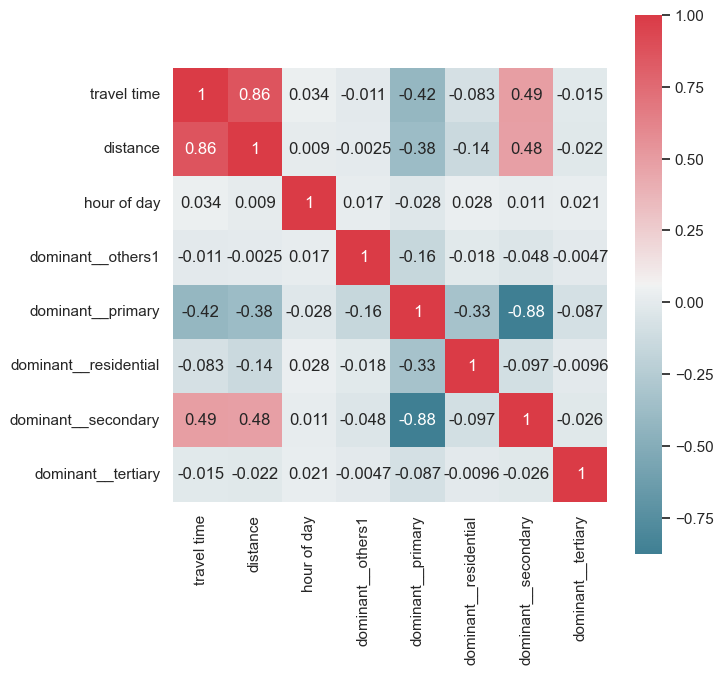

In [55]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(7,7))
corr = df1.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [56]:
x = np.array(df1[['distance','dominant__others1','dominant__primary','dominant__residential','dominant__tertiary','dominant__secondary']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df1['travel time'])
x

array([[0.2888266 , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.29197865, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.29124572, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.59842351, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.60584779, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.58940728, 0.        , 1.        , 0.        , 0.        ,
        0.        ]])

In [57]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12910, 6)
(3228, 6)


In [59]:
# inputs: distance +  dominant road
model3_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_1_1

Epoch 1/500
404/404 [==============================] - 1s 944us/step - loss: 1067655.1250 - mape: 98.6294 - rmse: 1033.2739 - val_loss: 1005859.9375 - val_mape: 95.7727 - val_rmse: 1002.9257
Epoch 2/500
404/404 [==============================] - 0s 745us/step - loss: 965571.3750 - mape: 90.0636 - rmse: 982.6349 - val_loss: 860646.0625 - val_mape: 82.8271 - val_rmse: 927.7101
Epoch 3/500
404/404 [==============================] - 0s 751us/step - loss: 790796.9375 - mape: 74.0117 - rmse: 889.2676 - val_loss: 672268.5000 - val_mape: 63.8039 - val_rmse: 819.9198
Epoch 4/500
404/404 [==============================] - 0s 813us/step - loss: 597921.1250 - mape: 53.9964 - rmse: 773.2536 - val_loss: 490718.6562 - val_mape: 43.9735 - val_rmse: 700.5131
Epoch 5/500
404/404 [==============================] - 0s 827us/step - loss: 429515.7188 - mape: 40.2753 - rmse: 655.3745 - val_loss: 348167.7812 - val_mape: 38.2698 - val_rmse: 590.0574
Epoch 6/500
404/404 [==============================] - 0s 823

Epoch 45/500
404/404 [==============================] - 0s 802us/step - loss: 67896.0547 - mape: 23.7410 - rmse: 260.5687 - val_loss: 68977.0859 - val_mape: 24.0554 - val_rmse: 262.6349
Epoch 46/500
404/404 [==============================] - 0s 790us/step - loss: 67896.6094 - mape: 23.5030 - rmse: 260.5698 - val_loss: 68987.3594 - val_mape: 24.2456 - val_rmse: 262.6544
Epoch 47/500
404/404 [==============================] - 0s 776us/step - loss: 67892.7578 - mape: 23.6077 - rmse: 260.5624 - val_loss: 69019.4375 - val_mape: 24.5010 - val_rmse: 262.7155
Epoch 48/500
404/404 [==============================] - 0s 767us/step - loss: 67889.5625 - mape: 23.8167 - rmse: 260.5562 - val_loss: 68975.1016 - val_mape: 23.6452 - val_rmse: 262.6311
Epoch 49/500
404/404 [==============================] - 0s 818us/step - loss: 67891.4297 - mape: 23.5173 - rmse: 260.5598 - val_loss: 68980.5859 - val_mape: 24.1523 - val_rmse: 262.6415
Epoch 50/500
404/404 [==============================] - 0s 795us/step 

404/404 [==============================] - 0s 820us/step - loss: 67865.2891 - mape: 23.4675 - rmse: 260.5097 - val_loss: 68946.1641 - val_mape: 24.1290 - val_rmse: 262.5760
Epoch 90/500
404/404 [==============================] - 0s 775us/step - loss: 67870.7344 - mape: 23.6329 - rmse: 260.5201 - val_loss: 68930.7969 - val_mape: 23.8793 - val_rmse: 262.5468
Epoch 91/500
404/404 [==============================] - 0s 795us/step - loss: 67865.1562 - mape: 23.5089 - rmse: 260.5094 - val_loss: 68950.2969 - val_mape: 24.1795 - val_rmse: 262.5839
Epoch 92/500
404/404 [==============================] - 0s 819us/step - loss: 67867.1484 - mape: 23.5052 - rmse: 260.5132 - val_loss: 68945.5000 - val_mape: 24.1443 - val_rmse: 262.5747
Epoch 93/500
404/404 [==============================] - 0s 770us/step - loss: 67876.2266 - mape: 23.6946 - rmse: 260.5307 - val_loss: 68927.9141 - val_mape: 23.7969 - val_rmse: 262.5413
Epoch 94/500
404/404 [==============================] - 0s 819us/step - loss: 67866

Epoch 133/500
404/404 [==============================] - 0s 831us/step - loss: 67846.8828 - mape: 23.5058 - rmse: 260.4743 - val_loss: 68910.6406 - val_mape: 24.0395 - val_rmse: 262.5084
Epoch 134/500
404/404 [==============================] - 0s 822us/step - loss: 67845.7344 - mape: 23.5737 - rmse: 260.4721 - val_loss: 68905.9609 - val_mape: 23.8775 - val_rmse: 262.4995
Epoch 135/500
404/404 [==============================] - 0s 826us/step - loss: 67851.9766 - mape: 23.5251 - rmse: 260.4841 - val_loss: 68905.6328 - val_mape: 23.9222 - val_rmse: 262.4988
Epoch 136/500
404/404 [==============================] - 0s 819us/step - loss: 67846.3281 - mape: 23.4953 - rmse: 260.4733 - val_loss: 68917.7422 - val_mape: 24.1190 - val_rmse: 262.5219
Epoch 137/500
404/404 [==============================] - 0s 843us/step - loss: 67849.1172 - mape: 23.6559 - rmse: 260.4786 - val_loss: 68905.7578 - val_mape: 23.9079 - val_rmse: 262.4991
Epoch 138/500
404/404 [==============================] - 0s 869us

Epoch 177/500
404/404 [==============================] - 0s 834us/step - loss: 67852.5781 - mape: 23.5150 - rmse: 260.4853 - val_loss: 68896.4062 - val_mape: 23.7407 - val_rmse: 262.4813
Epoch 178/500
404/404 [==============================] - 0s 839us/step - loss: 67853.7656 - mape: 23.4865 - rmse: 260.4875 - val_loss: 68904.9141 - val_mape: 24.0416 - val_rmse: 262.4975
Epoch 179/500
404/404 [==============================] - 0s 844us/step - loss: 67847.7812 - mape: 23.5174 - rmse: 260.4761 - val_loss: 68896.4141 - val_mape: 23.8717 - val_rmse: 262.4813
Epoch 180/500
404/404 [==============================] - 0s 868us/step - loss: 67847.8594 - mape: 23.5295 - rmse: 260.4762 - val_loss: 68902.9609 - val_mape: 24.0479 - val_rmse: 262.4937
Epoch 181/500
404/404 [==============================] - 0s 812us/step - loss: 67842.5859 - mape: 23.5554 - rmse: 260.4661 - val_loss: 68897.8750 - val_mape: 23.9405 - val_rmse: 262.4840
Epoch 182/500
404/404 [==============================] - 0s 843us

Epoch 221/500
404/404 [==============================] - 0s 833us/step - loss: 67837.4609 - mape: 23.4112 - rmse: 260.4563 - val_loss: 68926.2031 - val_mape: 24.2216 - val_rmse: 262.5380
Epoch 222/500
404/404 [==============================] - 0s 815us/step - loss: 67841.7969 - mape: 23.6386 - rmse: 260.4646 - val_loss: 68892.4688 - val_mape: 23.7105 - val_rmse: 262.4738
Epoch 223/500
404/404 [==============================] - 0s 837us/step - loss: 67846.0000 - mape: 23.5463 - rmse: 260.4727 - val_loss: 68889.1172 - val_mape: 23.7847 - val_rmse: 262.4674
Epoch 224/500
404/404 [==============================] - 0s 828us/step - loss: 67834.0547 - mape: 23.4183 - rmse: 260.4497 - val_loss: 68940.9844 - val_mape: 24.3755 - val_rmse: 262.5662
Epoch 225/500
404/404 [==============================] - 0s 831us/step - loss: 67821.5859 - mape: 23.7169 - rmse: 260.4258 - val_loss: 68922.9766 - val_mape: 23.4114 - val_rmse: 262.5319
Epoch 226/500
404/404 [==============================] - 0s 810us

Epoch 265/500
404/404 [==============================] - 0s 820us/step - loss: 67844.6953 - mape: 23.6495 - rmse: 260.4702 - val_loss: 68890.0938 - val_mape: 23.9614 - val_rmse: 262.4692
Epoch 266/500
404/404 [==============================] - 0s 830us/step - loss: 67837.7188 - mape: 23.4813 - rmse: 260.4568 - val_loss: 68886.9453 - val_mape: 23.9044 - val_rmse: 262.4632
Epoch 267/500
404/404 [==============================] - 0s 820us/step - loss: 67844.7969 - mape: 23.6367 - rmse: 260.4703 - val_loss: 68888.1406 - val_mape: 23.6981 - val_rmse: 262.4655
Epoch 268/500
404/404 [==============================] - 0s 818us/step - loss: 67832.7891 - mape: 23.4437 - rmse: 260.4473 - val_loss: 68915.8438 - val_mape: 24.2534 - val_rmse: 262.5183
Epoch 269/500
404/404 [==============================] - 0s 818us/step - loss: 67848.7266 - mape: 23.6175 - rmse: 260.4779 - val_loss: 68885.6484 - val_mape: 23.8681 - val_rmse: 262.4608
Epoch 270/500
404/404 [==============================] - 0s 819us

Epoch 309/500
404/404 [==============================] - 0s 742us/step - loss: 67834.1875 - mape: 23.6193 - rmse: 260.4500 - val_loss: 68878.5391 - val_mape: 23.7526 - val_rmse: 262.4472
Epoch 310/500
404/404 [==============================] - 0s 736us/step - loss: 67831.4062 - mape: 23.5448 - rmse: 260.4446 - val_loss: 68883.2734 - val_mape: 23.5850 - val_rmse: 262.4562
Epoch 311/500
404/404 [==============================] - 0s 788us/step - loss: 67838.7734 - mape: 23.4183 - rmse: 260.4588 - val_loss: 68882.7891 - val_mape: 23.9624 - val_rmse: 262.4553
Epoch 312/500
404/404 [==============================] - 0s 790us/step - loss: 67832.0938 - mape: 23.6250 - rmse: 260.4460 - val_loss: 68879.2344 - val_mape: 23.8657 - val_rmse: 262.4485
Epoch 313/500
404/404 [==============================] - 0s 793us/step - loss: 67832.0625 - mape: 23.4997 - rmse: 260.4459 - val_loss: 68887.4766 - val_mape: 23.6446 - val_rmse: 262.4642
Epoch 314/500
404/404 [==============================] - 0s 805us

Epoch 353/500
404/404 [==============================] - 0s 809us/step - loss: 67829.0469 - mape: 23.5514 - rmse: 260.4401 - val_loss: 68875.5625 - val_mape: 23.9118 - val_rmse: 262.4415
Epoch 354/500
404/404 [==============================] - 0s 820us/step - loss: 67834.4375 - mape: 23.5907 - rmse: 260.4504 - val_loss: 68873.4453 - val_mape: 23.7631 - val_rmse: 262.4375
Epoch 355/500
404/404 [==============================] - 0s 826us/step - loss: 67824.1250 - mape: 23.4288 - rmse: 260.4307 - val_loss: 68884.6250 - val_mape: 24.1011 - val_rmse: 262.4588
Epoch 356/500
404/404 [==============================] - 0s 843us/step - loss: 67830.9062 - mape: 23.5707 - rmse: 260.4437 - val_loss: 68892.1875 - val_mape: 24.1834 - val_rmse: 262.4732
Epoch 357/500
404/404 [==============================] - 0s 819us/step - loss: 67828.8047 - mape: 23.6268 - rmse: 260.4396 - val_loss: 68870.8359 - val_mape: 23.7977 - val_rmse: 262.4325
Epoch 358/500
404/404 [==============================] - 0s 817us

Epoch 397/500
404/404 [==============================] - 0s 834us/step - loss: 67830.5547 - mape: 23.5031 - rmse: 260.4430 - val_loss: 68870.0156 - val_mape: 23.8700 - val_rmse: 262.4310
Epoch 398/500
404/404 [==============================] - 0s 809us/step - loss: 67826.3672 - mape: 23.5668 - rmse: 260.4350 - val_loss: 68872.1953 - val_mape: 23.9670 - val_rmse: 262.4351
Epoch 399/500
404/404 [==============================] - 0s 804us/step - loss: 67825.0547 - mape: 23.5216 - rmse: 260.4324 - val_loss: 68871.1016 - val_mape: 23.9546 - val_rmse: 262.4330
Epoch 400/500
404/404 [==============================] - 0s 830us/step - loss: 67810.6484 - mape: 23.4720 - rmse: 260.4048 - val_loss: 68930.7578 - val_mape: 24.4302 - val_rmse: 262.5467
Epoch 401/500
404/404 [==============================] - 0s 821us/step - loss: 67826.4531 - mape: 23.5775 - rmse: 260.4351 - val_loss: 68879.5156 - val_mape: 24.0661 - val_rmse: 262.4491
Epoch 402/500
404/404 [==============================] - 0s 816us

Epoch 441/500
404/404 [==============================] - 0s 794us/step - loss: 67828.0938 - mape: 23.5821 - rmse: 260.4383 - val_loss: 68864.9844 - val_mape: 23.5981 - val_rmse: 262.4214
Epoch 442/500
404/404 [==============================] - 0s 827us/step - loss: 67817.5000 - mape: 23.4987 - rmse: 260.4179 - val_loss: 68864.6719 - val_mape: 23.7042 - val_rmse: 262.4208
Epoch 443/500
404/404 [==============================] - 0s 802us/step - loss: 67821.4297 - mape: 23.4523 - rmse: 260.4255 - val_loss: 68868.0000 - val_mape: 23.6890 - val_rmse: 262.4271
Epoch 444/500
404/404 [==============================] - 0s 844us/step - loss: 67818.7266 - mape: 23.6523 - rmse: 260.4203 - val_loss: 68886.1094 - val_mape: 23.4187 - val_rmse: 262.4616
Epoch 445/500
404/404 [==============================] - 0s 848us/step - loss: 67815.0469 - mape: 23.3211 - rmse: 260.4132 - val_loss: 68909.0938 - val_mape: 24.3746 - val_rmse: 262.5054
Epoch 446/500
404/404 [==============================] - 0s 819us

Epoch 485/500
404/404 [==============================] - 0s 828us/step - loss: 67820.7422 - mape: 23.5488 - rmse: 260.4242 - val_loss: 68861.4375 - val_mape: 23.9207 - val_rmse: 262.4146
Epoch 486/500
404/404 [==============================] - 0s 820us/step - loss: 67822.8984 - mape: 23.5466 - rmse: 260.4283 - val_loss: 68860.9297 - val_mape: 23.8865 - val_rmse: 262.4137
Epoch 487/500
404/404 [==============================] - 0s 795us/step - loss: 67825.3672 - mape: 23.4809 - rmse: 260.4330 - val_loss: 68876.7656 - val_mape: 24.1485 - val_rmse: 262.4438
Epoch 488/500
404/404 [==============================] - 0s 818us/step - loss: 67819.0625 - mape: 23.5966 - rmse: 260.4209 - val_loss: 68868.4375 - val_mape: 24.0535 - val_rmse: 262.4280
Epoch 489/500
404/404 [==============================] - 0s 828us/step - loss: 67820.0000 - mape: 23.5881 - rmse: 260.4227 - val_loss: 68857.2344 - val_mape: 23.7791 - val_rmse: 262.4066
Epoch 490/500
404/404 [==============================] - 0s 821us

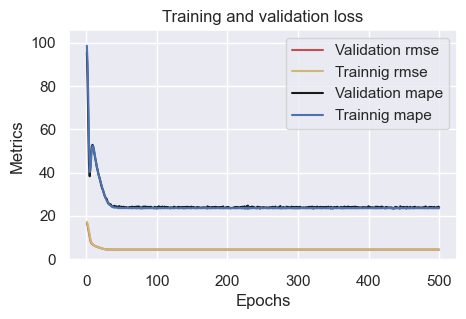

In [60]:
plotme(model3_1_1)


In [61]:
# inputs: distance +  dominant road
model3_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_1_2

Epoch 1/500
404/404 [==============================] - 1s 1ms/step - loss: 1051506.3750 - mape: 97.2754 - rmse: 1025.4298 - val_loss: 957408.2500 - val_mape: 91.5021 - val_rmse: 978.4724
Epoch 2/500
404/404 [==============================] - 0s 729us/step - loss: 861596.5625 - mape: 80.6349 - rmse: 928.2222 - val_loss: 703698.5625 - val_mape: 67.0314 - val_rmse: 838.8674
Epoch 3/500
404/404 [==============================] - 0s 759us/step - loss: 586107.3125 - mape: 52.7996 - rmse: 765.5765 - val_loss: 441807.2812 - val_mape: 40.2565 - val_rmse: 664.6859
Epoch 4/500
404/404 [==============================] - 0s 720us/step - loss: 360627.6250 - mape: 39.8383 - rmse: 600.5228 - val_loss: 274496.3438 - val_mape: 41.8341 - val_rmse: 523.9240
Epoch 5/500
404/404 [==============================] - 0s 720us/step - loss: 238779.3438 - mape: 46.2433 - rmse: 488.6505 - val_loss: 202187.5938 - val_mape: 49.7182 - val_rmse: 449.6527
Epoch 6/500
404/404 [==============================] - 0s 730us/s

Epoch 45/500
404/404 [==============================] - 0s 742us/step - loss: 67777.7656 - mape: 23.5182 - rmse: 260.3416 - val_loss: 68805.3516 - val_mape: 23.9128 - val_rmse: 262.3077
Epoch 46/500
404/404 [==============================] - 0s 721us/step - loss: 67784.8125 - mape: 23.5169 - rmse: 260.3552 - val_loss: 68799.4766 - val_mape: 23.7563 - val_rmse: 262.2965
Epoch 47/500
404/404 [==============================] - 0s 717us/step - loss: 67774.4219 - mape: 23.5341 - rmse: 260.3352 - val_loss: 68799.6953 - val_mape: 23.7110 - val_rmse: 262.2970
Epoch 48/500
404/404 [==============================] - 0s 723us/step - loss: 67751.7422 - mape: 23.5593 - rmse: 260.2917 - val_loss: 68901.8438 - val_mape: 22.9782 - val_rmse: 262.4916
Epoch 49/500
404/404 [==============================] - 0s 744us/step - loss: 67758.9922 - mape: 23.5235 - rmse: 260.3056 - val_loss: 68812.5938 - val_mape: 23.4531 - val_rmse: 262.3215
Epoch 50/500
404/404 [==============================] - 0s 745us/step 

404/404 [==============================] - 0s 746us/step - loss: 67723.1094 - mape: 23.5763 - rmse: 260.2366 - val_loss: 68738.1406 - val_mape: 23.7944 - val_rmse: 262.1796
Epoch 90/500
404/404 [==============================] - 0s 731us/step - loss: 67730.9453 - mape: 23.4555 - rmse: 260.2517 - val_loss: 68736.1406 - val_mape: 23.7668 - val_rmse: 262.1758
Epoch 91/500
404/404 [==============================] - 0s 749us/step - loss: 67728.3906 - mape: 23.4636 - rmse: 260.2468 - val_loss: 68733.8906 - val_mape: 23.7693 - val_rmse: 262.1715
Epoch 92/500
404/404 [==============================] - 0s 767us/step - loss: 67692.3906 - mape: 23.3770 - rmse: 260.1776 - val_loss: 68810.8516 - val_mape: 24.5718 - val_rmse: 262.3182
Epoch 93/500
404/404 [==============================] - 0s 734us/step - loss: 67739.9219 - mape: 23.7149 - rmse: 260.2690 - val_loss: 68734.7578 - val_mape: 23.8331 - val_rmse: 262.1732
Epoch 94/500
404/404 [==============================] - 0s 745us/step - loss: 67715

Epoch 133/500
404/404 [==============================] - 0s 723us/step - loss: 67697.4688 - mape: 23.5572 - rmse: 260.1874 - val_loss: 68734.9688 - val_mape: 24.1189 - val_rmse: 262.1736
Epoch 134/500
404/404 [==============================] - 0s 759us/step - loss: 67685.2500 - mape: 23.5496 - rmse: 260.1639 - val_loss: 68713.4844 - val_mape: 23.8700 - val_rmse: 262.1326
Epoch 135/500
404/404 [==============================] - 0s 743us/step - loss: 67702.5156 - mape: 23.4778 - rmse: 260.1971 - val_loss: 68714.6484 - val_mape: 23.6263 - val_rmse: 262.1348
Epoch 136/500
404/404 [==============================] - 0s 731us/step - loss: 67706.6953 - mape: 23.6017 - rmse: 260.2051 - val_loss: 68713.9219 - val_mape: 23.5979 - val_rmse: 262.1334
Epoch 137/500
404/404 [==============================] - 0s 739us/step - loss: 67707.3047 - mape: 23.4385 - rmse: 260.2063 - val_loss: 68714.8672 - val_mape: 23.6800 - val_rmse: 262.1352
Epoch 138/500
404/404 [==============================] - 0s 731us

Epoch 177/500
404/404 [==============================] - 0s 743us/step - loss: 67683.8281 - mape: 23.4744 - rmse: 260.1612 - val_loss: 68712.2578 - val_mape: 23.8838 - val_rmse: 262.1302
Epoch 178/500
404/404 [==============================] - 0s 720us/step - loss: 67717.3984 - mape: 23.4899 - rmse: 260.2257 - val_loss: 68725.4062 - val_mape: 24.0926 - val_rmse: 262.1553
Epoch 179/500
404/404 [==============================] - 0s 732us/step - loss: 67696.6953 - mape: 23.4140 - rmse: 260.1859 - val_loss: 68732.8672 - val_mape: 24.1903 - val_rmse: 262.1695
Epoch 180/500
404/404 [==============================] - 0s 717us/step - loss: 67696.1484 - mape: 23.6468 - rmse: 260.1848 - val_loss: 68711.6016 - val_mape: 23.8644 - val_rmse: 262.1290
Epoch 181/500
404/404 [==============================] - 0s 719us/step - loss: 67699.6094 - mape: 23.3714 - rmse: 260.1915 - val_loss: 68757.8203 - val_mape: 24.3645 - val_rmse: 262.2171
Epoch 182/500
404/404 [==============================] - 0s 729us

Epoch 221/500
404/404 [==============================] - 0s 719us/step - loss: 67676.9375 - mape: 23.3923 - rmse: 260.1479 - val_loss: 68786.8984 - val_mape: 24.5261 - val_rmse: 262.2726
Epoch 222/500
404/404 [==============================] - 0s 745us/step - loss: 67688.1094 - mape: 23.6838 - rmse: 260.1694 - val_loss: 68720.6406 - val_mape: 23.3816 - val_rmse: 262.1462
Epoch 223/500
404/404 [==============================] - 0s 720us/step - loss: 67701.1719 - mape: 23.4484 - rmse: 260.1945 - val_loss: 68704.4141 - val_mape: 23.8083 - val_rmse: 262.1153
Epoch 224/500
404/404 [==============================] - 0s 729us/step - loss: 67653.5703 - mape: 23.3287 - rmse: 260.1030 - val_loss: 68791.7031 - val_mape: 24.5872 - val_rmse: 262.2817
Epoch 225/500
404/404 [==============================] - 0s 752us/step - loss: 67694.0000 - mape: 23.6467 - rmse: 260.1807 - val_loss: 68715.6016 - val_mape: 24.0402 - val_rmse: 262.1366
Epoch 226/500
404/404 [==============================] - 0s 736us

Epoch 265/500
404/404 [==============================] - 0s 737us/step - loss: 67696.1875 - mape: 23.4918 - rmse: 260.1849 - val_loss: 68704.7422 - val_mape: 23.6805 - val_rmse: 262.1159
Epoch 266/500
404/404 [==============================] - 0s 746us/step - loss: 67688.5547 - mape: 23.4447 - rmse: 260.1702 - val_loss: 68713.6484 - val_mape: 23.9850 - val_rmse: 262.1329
Epoch 267/500
404/404 [==============================] - 0s 714us/step - loss: 67678.1250 - mape: 23.5816 - rmse: 260.1502 - val_loss: 68713.6172 - val_mape: 24.0174 - val_rmse: 262.1328
Epoch 268/500
404/404 [==============================] - 0s 863us/step - loss: 67668.4062 - mape: 23.6518 - rmse: 260.1315 - val_loss: 68738.4219 - val_mape: 23.1874 - val_rmse: 262.1801
Epoch 269/500
404/404 [==============================] - 0s 745us/step - loss: 67683.6562 - mape: 23.2896 - rmse: 260.1608 - val_loss: 68747.8438 - val_mape: 24.3130 - val_rmse: 262.1981
Epoch 270/500
404/404 [==============================] - 0s 745us

Epoch 309/500
404/404 [==============================] - 0s 737us/step - loss: 67703.8984 - mape: 23.5003 - rmse: 260.1997 - val_loss: 68728.9844 - val_mape: 24.2512 - val_rmse: 262.1621
Epoch 310/500
404/404 [==============================] - 0s 722us/step - loss: 67672.8203 - mape: 23.6773 - rmse: 260.1400 - val_loss: 68718.7656 - val_mape: 23.3639 - val_rmse: 262.1426
Epoch 311/500
404/404 [==============================] - 0s 723us/step - loss: 67683.2891 - mape: 23.4496 - rmse: 260.1601 - val_loss: 68705.3203 - val_mape: 23.9514 - val_rmse: 262.1170
Epoch 312/500
404/404 [==============================] - 0s 725us/step - loss: 67680.2812 - mape: 23.4134 - rmse: 260.1543 - val_loss: 68730.0625 - val_mape: 24.2697 - val_rmse: 262.1642
Epoch 313/500
404/404 [==============================] - 0s 735us/step - loss: 67685.3516 - mape: 23.6140 - rmse: 260.1641 - val_loss: 68747.7188 - val_mape: 23.2268 - val_rmse: 262.1979
Epoch 314/500
404/404 [==============================] - 0s 730us

Epoch 353/500
404/404 [==============================] - 0s 718us/step - loss: 67680.3359 - mape: 23.5424 - rmse: 260.1544 - val_loss: 68728.8438 - val_mape: 23.4055 - val_rmse: 262.1619
Epoch 354/500
404/404 [==============================] - 0s 727us/step - loss: 67677.9141 - mape: 23.4631 - rmse: 260.1498 - val_loss: 68698.1484 - val_mape: 23.7929 - val_rmse: 262.1033
Epoch 355/500
404/404 [==============================] - 0s 742us/step - loss: 67685.6250 - mape: 23.5670 - rmse: 260.1646 - val_loss: 68697.9609 - val_mape: 23.6850 - val_rmse: 262.1030
Epoch 356/500
404/404 [==============================] - 0s 748us/step - loss: 67687.6250 - mape: 23.4960 - rmse: 260.1685 - val_loss: 68696.3438 - val_mape: 23.7590 - val_rmse: 262.0999
Epoch 357/500
404/404 [==============================] - 0s 740us/step - loss: 67657.7812 - mape: 23.5793 - rmse: 260.1111 - val_loss: 68752.9609 - val_mape: 23.1197 - val_rmse: 262.2079
Epoch 358/500
404/404 [==============================] - 0s 745us

Epoch 397/500
404/404 [==============================] - 0s 718us/step - loss: 67660.9219 - mape: 23.3919 - rmse: 260.1171 - val_loss: 68730.9141 - val_mape: 24.2775 - val_rmse: 262.1658
Epoch 398/500
404/404 [==============================] - 0s 724us/step - loss: 67684.4453 - mape: 23.5228 - rmse: 260.1624 - val_loss: 68708.5625 - val_mape: 24.0730 - val_rmse: 262.1232
Epoch 399/500
404/404 [==============================] - 0s 727us/step - loss: 67665.1016 - mape: 23.5952 - rmse: 260.1252 - val_loss: 68735.5156 - val_mape: 23.2976 - val_rmse: 262.1746
Epoch 400/500
404/404 [==============================] - 0s 720us/step - loss: 67687.8906 - mape: 23.4693 - rmse: 260.1690 - val_loss: 68716.2812 - val_mape: 24.1384 - val_rmse: 262.1379
Epoch 401/500
404/404 [==============================] - 0s 740us/step - loss: 67674.4688 - mape: 23.5171 - rmse: 260.1432 - val_loss: 68697.5312 - val_mape: 23.8993 - val_rmse: 262.1021
Epoch 402/500
404/404 [==============================] - 0s 743us

Epoch 441/500
404/404 [==============================] - 0s 750us/step - loss: 67675.9531 - mape: 23.4894 - rmse: 260.1460 - val_loss: 68696.0234 - val_mape: 23.6932 - val_rmse: 262.0993
Epoch 442/500
404/404 [==============================] - 0s 734us/step - loss: 67675.4453 - mape: 23.5516 - rmse: 260.1451 - val_loss: 68695.4766 - val_mape: 23.9314 - val_rmse: 262.0982
Epoch 443/500
404/404 [==============================] - 0s 730us/step - loss: 67663.4844 - mape: 23.5830 - rmse: 260.1221 - val_loss: 68768.4609 - val_mape: 23.0567 - val_rmse: 262.2374
Epoch 444/500
404/404 [==============================] - 0s 722us/step - loss: 67679.6172 - mape: 23.4220 - rmse: 260.1531 - val_loss: 68693.2969 - val_mape: 23.7014 - val_rmse: 262.0941
Epoch 445/500
404/404 [==============================] - 0s 716us/step - loss: 67668.3516 - mape: 23.5250 - rmse: 260.1314 - val_loss: 68707.3906 - val_mape: 23.4298 - val_rmse: 262.1209
Epoch 446/500
404/404 [==============================] - 0s 723us

Epoch 485/500
404/404 [==============================] - 0s 741us/step - loss: 67670.0391 - mape: 23.5110 - rmse: 260.1346 - val_loss: 68702.7031 - val_mape: 23.5060 - val_rmse: 262.1120
Epoch 486/500
404/404 [==============================] - 0s 736us/step - loss: 67674.4688 - mape: 23.4326 - rmse: 260.1432 - val_loss: 68690.8750 - val_mape: 23.7976 - val_rmse: 262.0894
Epoch 487/500
404/404 [==============================] - 0s 731us/step - loss: 67680.0312 - mape: 23.5688 - rmse: 260.1539 - val_loss: 68703.7656 - val_mape: 24.0513 - val_rmse: 262.1140
Epoch 488/500
404/404 [==============================] - 0s 732us/step - loss: 67671.2812 - mape: 23.4793 - rmse: 260.1371 - val_loss: 68690.7734 - val_mape: 23.8670 - val_rmse: 262.0892
Epoch 489/500
404/404 [==============================] - 0s 757us/step - loss: 67665.6797 - mape: 23.5774 - rmse: 260.1263 - val_loss: 68717.6406 - val_mape: 23.3595 - val_rmse: 262.1405
Epoch 490/500
404/404 [==============================] - 0s 731us

In [62]:
# inputs: distance +  dominant road
model3_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model3_1_3

Epoch 1/500
404/404 [==============================] - 1s 904us/step - loss: 1021746.7500 - mape: 94.7514 - rmse: 1010.8149 - val_loss: 866054.3750 - val_mape: 83.2110 - val_rmse: 930.6204
Epoch 2/500
404/404 [==============================] - 0s 762us/step - loss: 686606.1250 - mape: 63.0471 - rmse: 828.6170 - val_loss: 468097.3125 - val_mape: 41.9806 - val_rmse: 684.1764
Epoch 3/500
404/404 [==============================] - 0s 756us/step - loss: 344607.2812 - mape: 40.9721 - rmse: 587.0326 - val_loss: 238676.7031 - val_mape: 45.0859 - val_rmse: 488.5455
Epoch 4/500
404/404 [==============================] - 0s 748us/step - loss: 205069.7344 - mape: 49.6399 - rmse: 452.8463 - val_loss: 177045.4531 - val_mape: 52.7513 - val_rmse: 420.7677
Epoch 5/500
404/404 [==============================] - 0s 747us/step - loss: 164467.5000 - mape: 51.9298 - rmse: 405.5459 - val_loss: 151275.2656 - val_mape: 51.0865 - val_rmse: 388.9412
Epoch 6/500
404/404 [==============================] - 0s 741us

Epoch 45/500
404/404 [==============================] - 0s 744us/step - loss: 67759.4062 - mape: 23.5504 - rmse: 260.3064 - val_loss: 68811.8750 - val_mape: 23.2257 - val_rmse: 262.3202
Epoch 46/500
404/404 [==============================] - 0s 770us/step - loss: 67758.5938 - mape: 23.3946 - rmse: 260.3048 - val_loss: 68799.5312 - val_mape: 24.2929 - val_rmse: 262.2967
Epoch 47/500
404/404 [==============================] - 0s 745us/step - loss: 67749.9375 - mape: 23.6213 - rmse: 260.2882 - val_loss: 68789.9219 - val_mape: 23.4923 - val_rmse: 262.2783
Epoch 48/500
404/404 [==============================] - 0s 773us/step - loss: 67756.5547 - mape: 23.4412 - rmse: 260.3009 - val_loss: 68768.1562 - val_mape: 23.8180 - val_rmse: 262.2368
Epoch 49/500
404/404 [==============================] - 0s 766us/step - loss: 67737.9844 - mape: 23.4856 - rmse: 260.2652 - val_loss: 68850.3359 - val_mape: 24.6127 - val_rmse: 262.3935
Epoch 50/500
404/404 [==============================] - 0s 756us/step 

404/404 [==============================] - 0s 750us/step - loss: 67703.5781 - mape: 23.3237 - rmse: 260.1991 - val_loss: 68824.0781 - val_mape: 24.6379 - val_rmse: 262.3434
Epoch 90/500
404/404 [==============================] - 0s 752us/step - loss: 67729.2344 - mape: 23.5362 - rmse: 260.2484 - val_loss: 68715.5391 - val_mape: 23.9566 - val_rmse: 262.1365
Epoch 91/500
404/404 [==============================] - 0s 755us/step - loss: 67707.1562 - mape: 23.5383 - rmse: 260.2060 - val_loss: 68736.2500 - val_mape: 24.2002 - val_rmse: 262.1760
Epoch 92/500
404/404 [==============================] - 0s 745us/step - loss: 67715.5391 - mape: 23.5099 - rmse: 260.2221 - val_loss: 68743.0703 - val_mape: 24.3256 - val_rmse: 262.1890
Epoch 93/500
404/404 [==============================] - 0s 757us/step - loss: 67704.9141 - mape: 23.5326 - rmse: 260.2017 - val_loss: 68709.4219 - val_mape: 23.8618 - val_rmse: 262.1248
Epoch 94/500
404/404 [==============================] - 0s 746us/step - loss: 67697

Epoch 133/500
404/404 [==============================] - 0s 748us/step - loss: 67700.4922 - mape: 23.5401 - rmse: 260.1932 - val_loss: 68709.9297 - val_mape: 23.5348 - val_rmse: 262.1258
Epoch 134/500
404/404 [==============================] - 0s 757us/step - loss: 67699.4062 - mape: 23.4128 - rmse: 260.1911 - val_loss: 68883.3984 - val_mape: 24.9562 - val_rmse: 262.4565
Epoch 135/500
404/404 [==============================] - 0s 743us/step - loss: 67702.1328 - mape: 23.5052 - rmse: 260.1964 - val_loss: 68711.7578 - val_mape: 24.0171 - val_rmse: 262.1293
Epoch 136/500
404/404 [==============================] - 0s 769us/step - loss: 67705.0703 - mape: 23.6451 - rmse: 260.2020 - val_loss: 68732.9453 - val_mape: 23.2424 - val_rmse: 262.1697
Epoch 137/500
404/404 [==============================] - 0s 756us/step - loss: 67682.5938 - mape: 23.2755 - rmse: 260.1588 - val_loss: 68846.7734 - val_mape: 24.8986 - val_rmse: 262.3867
Epoch 138/500
404/404 [==============================] - 0s 746us

Epoch 177/500
404/404 [==============================] - 0s 757us/step - loss: 67683.8828 - mape: 23.5785 - rmse: 260.1613 - val_loss: 68725.0078 - val_mape: 23.2076 - val_rmse: 262.1545
Epoch 178/500
404/404 [==============================] - 0s 768us/step - loss: 67704.5469 - mape: 23.3776 - rmse: 260.2010 - val_loss: 68705.9375 - val_mape: 23.9781 - val_rmse: 262.1182
Epoch 179/500
404/404 [==============================] - 0s 755us/step - loss: 67689.4375 - mape: 23.4476 - rmse: 260.1719 - val_loss: 68818.4141 - val_mape: 24.7495 - val_rmse: 262.3326
Epoch 180/500
404/404 [==============================] - 0s 766us/step - loss: 67702.2500 - mape: 23.5719 - rmse: 260.1966 - val_loss: 68699.8438 - val_mape: 23.8543 - val_rmse: 262.1065
Epoch 181/500
404/404 [==============================] - 0s 757us/step - loss: 67697.7969 - mape: 23.5136 - rmse: 260.1880 - val_loss: 68705.2344 - val_mape: 23.6435 - val_rmse: 262.1168
Epoch 182/500
404/404 [==============================] - 0s 744us

Epoch 221/500
404/404 [==============================] - 0s 750us/step - loss: 67693.6406 - mape: 23.3962 - rmse: 260.1800 - val_loss: 68722.7891 - val_mape: 24.2086 - val_rmse: 262.1503
Epoch 222/500
404/404 [==============================] - 0s 745us/step - loss: 67668.7031 - mape: 23.3990 - rmse: 260.1321 - val_loss: 68888.1797 - val_mape: 24.9667 - val_rmse: 262.4656
Epoch 223/500
404/404 [==============================] - 0s 729us/step - loss: 67714.9219 - mape: 23.6328 - rmse: 260.2209 - val_loss: 68695.1250 - val_mape: 23.8249 - val_rmse: 262.0975
Epoch 224/500
404/404 [==============================] - 0s 746us/step - loss: 67706.2266 - mape: 23.4446 - rmse: 260.2042 - val_loss: 68694.0859 - val_mape: 23.9057 - val_rmse: 262.0956
Epoch 225/500
404/404 [==============================] - 0s 755us/step - loss: 67683.6797 - mape: 23.5488 - rmse: 260.1609 - val_loss: 68707.4297 - val_mape: 24.1120 - val_rmse: 262.1210
Epoch 226/500
404/404 [==============================] - 0s 727us

Epoch 265/500
404/404 [==============================] - 0s 762us/step - loss: 67718.0078 - mape: 23.5498 - rmse: 260.2268 - val_loss: 68709.9297 - val_mape: 24.1305 - val_rmse: 262.1258
Epoch 266/500
404/404 [==============================] - 0s 769us/step - loss: 67696.2734 - mape: 23.5862 - rmse: 260.1851 - val_loss: 68692.2109 - val_mape: 23.8656 - val_rmse: 262.0920
Epoch 267/500
404/404 [==============================] - 0s 745us/step - loss: 67690.7500 - mape: 23.4969 - rmse: 260.1745 - val_loss: 68704.8359 - val_mape: 24.0793 - val_rmse: 262.1161
Epoch 268/500
404/404 [==============================] - 0s 769us/step - loss: 67694.0547 - mape: 23.5750 - rmse: 260.1808 - val_loss: 68693.3984 - val_mape: 23.4702 - val_rmse: 262.0943
Epoch 269/500
404/404 [==============================] - 0s 772us/step - loss: 67682.9531 - mape: 23.4260 - rmse: 260.1595 - val_loss: 68735.1016 - val_mape: 24.3037 - val_rmse: 262.1738
Epoch 270/500
404/404 [==============================] - 0s 765us

Epoch 309/500
404/404 [==============================] - 0s 745us/step - loss: 67696.6562 - mape: 23.4594 - rmse: 260.1858 - val_loss: 68701.4688 - val_mape: 23.9884 - val_rmse: 262.1096
Epoch 310/500
404/404 [==============================] - 0s 752us/step - loss: 67721.5547 - mape: 23.5014 - rmse: 260.2336 - val_loss: 68692.5703 - val_mape: 23.9531 - val_rmse: 262.0927
Epoch 311/500
404/404 [==============================] - 0s 753us/step - loss: 67691.7656 - mape: 23.5589 - rmse: 260.1764 - val_loss: 68689.3750 - val_mape: 23.7016 - val_rmse: 262.0866
Epoch 312/500
404/404 [==============================] - 0s 770us/step - loss: 67687.9766 - mape: 23.3635 - rmse: 260.1691 - val_loss: 68694.9453 - val_mape: 23.9723 - val_rmse: 262.0972
Epoch 313/500
404/404 [==============================] - 0s 759us/step - loss: 67692.2266 - mape: 23.5970 - rmse: 260.1773 - val_loss: 68704.2031 - val_mape: 24.0681 - val_rmse: 262.1149
Epoch 314/500
404/404 [==============================] - 0s 746us

Epoch 353/500
404/404 [==============================] - 0s 750us/step - loss: 67689.6484 - mape: 23.4968 - rmse: 260.1723 - val_loss: 68688.4688 - val_mape: 23.9331 - val_rmse: 262.0848
Epoch 354/500
404/404 [==============================] - 0s 753us/step - loss: 67665.2109 - mape: 23.5125 - rmse: 260.1254 - val_loss: 68715.7500 - val_mape: 24.1379 - val_rmse: 262.1369
Epoch 355/500
404/404 [==============================] - 0s 746us/step - loss: 67701.8984 - mape: 23.4936 - rmse: 260.1959 - val_loss: 68686.5703 - val_mape: 23.6479 - val_rmse: 262.0812
Epoch 356/500
404/404 [==============================] - 0s 746us/step - loss: 67650.8438 - mape: 23.5302 - rmse: 260.0977 - val_loss: 68763.3047 - val_mape: 23.0329 - val_rmse: 262.2276
Epoch 357/500
404/404 [==============================] - 0s 767us/step - loss: 67698.8203 - mape: 23.4058 - rmse: 260.1900 - val_loss: 68690.9922 - val_mape: 23.9949 - val_rmse: 262.0897
Epoch 358/500
404/404 [==============================] - 0s 771us

Epoch 397/500
404/404 [==============================] - 0s 771us/step - loss: 67678.5547 - mape: 23.5613 - rmse: 260.1510 - val_loss: 68747.3672 - val_mape: 23.0525 - val_rmse: 262.1972
Epoch 398/500
404/404 [==============================] - 0s 757us/step - loss: 67699.1562 - mape: 23.5066 - rmse: 260.1906 - val_loss: 68698.4062 - val_mape: 23.5678 - val_rmse: 262.1038
Epoch 399/500
404/404 [==============================] - 0s 744us/step - loss: 67688.4688 - mape: 23.4641 - rmse: 260.1701 - val_loss: 68700.5781 - val_mape: 24.1689 - val_rmse: 262.1079
Epoch 400/500
404/404 [==============================] - 0s 782us/step - loss: 67656.6094 - mape: 23.5466 - rmse: 260.1089 - val_loss: 68685.2891 - val_mape: 23.7625 - val_rmse: 262.0788
Epoch 401/500
404/404 [==============================] - 0s 758us/step - loss: 67664.6719 - mape: 23.5133 - rmse: 260.1243 - val_loss: 68681.5938 - val_mape: 23.6308 - val_rmse: 262.0717
Epoch 402/500
404/404 [==============================] - 0s 755us

Epoch 441/500
404/404 [==============================] - 0s 744us/step - loss: 67681.6875 - mape: 23.5565 - rmse: 260.1570 - val_loss: 68697.8359 - val_mape: 24.0068 - val_rmse: 262.1027
Epoch 442/500
404/404 [==============================] - 0s 744us/step - loss: 67663.9922 - mape: 23.5879 - rmse: 260.1230 - val_loss: 68768.2812 - val_mape: 23.0691 - val_rmse: 262.2371
Epoch 443/500
404/404 [==============================] - 0s 744us/step - loss: 67673.0078 - mape: 23.3463 - rmse: 260.1404 - val_loss: 68735.6250 - val_mape: 24.4460 - val_rmse: 262.1748
Epoch 444/500
404/404 [==============================] - 0s 746us/step - loss: 67663.2578 - mape: 23.5822 - rmse: 260.1216 - val_loss: 68686.5000 - val_mape: 23.6237 - val_rmse: 262.0811
Epoch 445/500
404/404 [==============================] - 0s 748us/step - loss: 67666.3594 - mape: 23.5722 - rmse: 260.1276 - val_loss: 68697.5938 - val_mape: 23.3456 - val_rmse: 262.1023
Epoch 446/500
404/404 [==============================] - 0s 752us

Epoch 485/500
404/404 [==============================] - 0s 727us/step - loss: 67671.6953 - mape: 23.5774 - rmse: 260.1378 - val_loss: 68678.9297 - val_mape: 23.7933 - val_rmse: 262.0667
Epoch 486/500
404/404 [==============================] - 0s 761us/step - loss: 67667.1250 - mape: 23.4827 - rmse: 260.1291 - val_loss: 68724.2656 - val_mape: 23.3807 - val_rmse: 262.1531
Epoch 487/500
404/404 [==============================] - 0s 768us/step - loss: 67686.8984 - mape: 23.4953 - rmse: 260.1671 - val_loss: 68704.5469 - val_mape: 23.4302 - val_rmse: 262.1155
Epoch 488/500
404/404 [==============================] - 0s 739us/step - loss: 67687.1328 - mape: 23.4384 - rmse: 260.1675 - val_loss: 68698.0938 - val_mape: 24.0628 - val_rmse: 262.1032
Epoch 489/500
404/404 [==============================] - 0s 753us/step - loss: 67680.0859 - mape: 23.6040 - rmse: 260.1540 - val_loss: 68685.3047 - val_mape: 23.6816 - val_rmse: 262.0788
Epoch 490/500
404/404 [==============================] - 0s 749us

In [63]:
# inputs: distance +  dominant road
model3_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_1_4

Epoch 1/500
404/404 [==============================] - 1s 935us/step - loss: 664331.0000 - mape: 70.8560 - rmse: 815.0650 - val_loss: 170302.5000 - val_mape: 55.4051 - val_rmse: 412.6772
Epoch 2/500
404/404 [==============================] - 0s 787us/step - loss: 134492.6406 - mape: 47.6477 - rmse: 366.7324 - val_loss: 113394.1875 - val_mape: 41.5573 - val_rmse: 336.7405
Epoch 3/500
404/404 [==============================] - 0s 798us/step - loss: 100786.5547 - mape: 37.5525 - rmse: 317.4690 - val_loss: 90152.5156 - val_mape: 35.2519 - val_rmse: 300.2541
Epoch 4/500
404/404 [==============================] - 0s 811us/step - loss: 80708.8438 - mape: 31.0618 - rmse: 284.0930 - val_loss: 74695.7500 - val_mape: 28.2092 - val_rmse: 273.3052
Epoch 5/500
404/404 [==============================] - 0s 819us/step - loss: 70597.1875 - mape: 26.4776 - rmse: 265.7013 - val_loss: 69503.2969 - val_mape: 25.5895 - val_rmse: 263.6348
Epoch 6/500
404/404 [==============================] - 0s 801us/step -

404/404 [==============================] - 0s 794us/step - loss: 66707.0781 - mape: 22.9060 - rmse: 258.2771 - val_loss: 67558.6797 - val_mape: 23.3495 - val_rmse: 259.9205
Epoch 46/500
404/404 [==============================] - 0s 784us/step - loss: 66681.5156 - mape: 22.9941 - rmse: 258.2276 - val_loss: 67538.2734 - val_mape: 22.8719 - val_rmse: 259.8813
Epoch 47/500
404/404 [==============================] - 0s 793us/step - loss: 66699.9688 - mape: 22.9694 - rmse: 258.2634 - val_loss: 67743.3672 - val_mape: 23.2859 - val_rmse: 260.2756
Epoch 48/500
404/404 [==============================] - 0s 798us/step - loss: 66701.9922 - mape: 22.8955 - rmse: 258.2673 - val_loss: 67601.4062 - val_mape: 23.9760 - val_rmse: 260.0027
Epoch 49/500
404/404 [==============================] - 0s 780us/step - loss: 66708.6641 - mape: 22.9631 - rmse: 258.2802 - val_loss: 67543.7188 - val_mape: 23.6262 - val_rmse: 259.8918
Epoch 50/500
404/404 [==============================] - 0s 795us/step - loss: 66608

Epoch 133/500
404/404 [==============================] - 0s 793us/step - loss: 66482.6719 - mape: 22.7615 - rmse: 257.8423 - val_loss: 67318.4766 - val_mape: 22.3613 - val_rmse: 259.4580
Epoch 134/500
404/404 [==============================] - 0s 795us/step - loss: 66496.9375 - mape: 22.6883 - rmse: 257.8700 - val_loss: 67340.7422 - val_mape: 23.7319 - val_rmse: 259.5009
Epoch 135/500
404/404 [==============================] - 0s 780us/step - loss: 66489.7266 - mape: 22.8694 - rmse: 257.8560 - val_loss: 67398.0938 - val_mape: 23.7779 - val_rmse: 259.6114
Epoch 136/500
404/404 [==============================] - 0s 781us/step - loss: 66512.1016 - mape: 22.8538 - rmse: 257.8994 - val_loss: 67546.1797 - val_mape: 21.5662 - val_rmse: 259.8965
Epoch 137/500
404/404 [==============================] - 0s 795us/step - loss: 66501.8516 - mape: 22.7462 - rmse: 257.8795 - val_loss: 67284.2266 - val_mape: 22.9844 - val_rmse: 259.3920
Epoch 138/500
404/404 [==============================] - 0s 793us

Epoch 177/500
404/404 [==============================] - 0s 784us/step - loss: 66460.4375 - mape: 22.8581 - rmse: 257.7992 - val_loss: 67273.1016 - val_mape: 22.2968 - val_rmse: 259.3706
Epoch 178/500
404/404 [==============================] - 0s 797us/step - loss: 66448.0703 - mape: 22.7783 - rmse: 257.7752 - val_loss: 67339.5781 - val_mape: 21.8922 - val_rmse: 259.4987
Epoch 179/500
404/404 [==============================] - 0s 792us/step - loss: 66441.5234 - mape: 22.5753 - rmse: 257.7625 - val_loss: 67684.0312 - val_mape: 24.6979 - val_rmse: 260.1616
Epoch 180/500
404/404 [==============================] - 0s 781us/step - loss: 66471.2656 - mape: 22.8150 - rmse: 257.8202 - val_loss: 67238.5156 - val_mape: 22.6047 - val_rmse: 259.3039
Epoch 181/500
404/404 [==============================] - 0s 778us/step - loss: 66449.8281 - mape: 22.8141 - rmse: 257.7787 - val_loss: 67232.3125 - val_mape: 23.0620 - val_rmse: 259.2919
Epoch 182/500
404/404 [==============================] - 0s 795us

Epoch 221/500
404/404 [==============================] - 0s 769us/step - loss: 66479.2891 - mape: 22.7702 - rmse: 257.8358 - val_loss: 67430.2578 - val_mape: 24.2517 - val_rmse: 259.6734
Epoch 222/500
404/404 [==============================] - 0s 784us/step - loss: 66447.6094 - mape: 22.8560 - rmse: 257.7744 - val_loss: 68087.9766 - val_mape: 20.6910 - val_rmse: 260.9367
Epoch 223/500
404/404 [==============================] - 0s 786us/step - loss: 66424.0156 - mape: 22.5887 - rmse: 257.7286 - val_loss: 67251.7734 - val_mape: 22.7137 - val_rmse: 259.3295
Epoch 224/500
404/404 [==============================] - 0s 774us/step - loss: 66402.6016 - mape: 22.8263 - rmse: 257.6870 - val_loss: 67191.2344 - val_mape: 23.1306 - val_rmse: 259.2127
Epoch 225/500
404/404 [==============================] - 0s 769us/step - loss: 66448.5391 - mape: 22.6576 - rmse: 257.7762 - val_loss: 67276.3828 - val_mape: 23.8231 - val_rmse: 259.3769
Epoch 226/500
404/404 [==============================] - 0s 779us

Epoch 265/500
404/404 [==============================] - 0s 794us/step - loss: 66392.3672 - mape: 22.6675 - rmse: 257.6672 - val_loss: 67247.0859 - val_mape: 22.0895 - val_rmse: 259.3204
Epoch 266/500
404/404 [==============================] - 0s 807us/step - loss: 66405.1875 - mape: 22.6862 - rmse: 257.6920 - val_loss: 67171.1016 - val_mape: 22.5560 - val_rmse: 259.1739
Epoch 267/500
404/404 [==============================] - 0s 786us/step - loss: 66410.8516 - mape: 22.6008 - rmse: 257.7030 - val_loss: 67486.5156 - val_mape: 24.0000 - val_rmse: 259.7817
Epoch 268/500
404/404 [==============================] - 0s 780us/step - loss: 66379.4375 - mape: 22.7375 - rmse: 257.6421 - val_loss: 67135.1797 - val_mape: 22.9923 - val_rmse: 259.1046
Epoch 269/500
404/404 [==============================] - 0s 800us/step - loss: 66364.9141 - mape: 22.6555 - rmse: 257.6139 - val_loss: 67256.6250 - val_mape: 23.6379 - val_rmse: 259.3388
Epoch 270/500
404/404 [==============================] - 0s 793us

Epoch 309/500
404/404 [==============================] - 0s 794us/step - loss: 66390.3359 - mape: 22.7693 - rmse: 257.6632 - val_loss: 67301.9844 - val_mape: 22.0025 - val_rmse: 259.4263
Epoch 310/500
404/404 [==============================] - 0s 786us/step - loss: 66422.5234 - mape: 22.6953 - rmse: 257.7257 - val_loss: 67185.9531 - val_mape: 22.9456 - val_rmse: 259.2025
Epoch 311/500
404/404 [==============================] - 0s 781us/step - loss: 66373.8125 - mape: 22.6291 - rmse: 257.6312 - val_loss: 67173.4609 - val_mape: 23.6168 - val_rmse: 259.1784
Epoch 312/500
404/404 [==============================] - 0s 794us/step - loss: 66337.9531 - mape: 22.6954 - rmse: 257.5616 - val_loss: 67138.2344 - val_mape: 22.7637 - val_rmse: 259.1105
Epoch 313/500
404/404 [==============================] - 0s 782us/step - loss: 66404.1562 - mape: 22.6966 - rmse: 257.6900 - val_loss: 67148.4297 - val_mape: 22.5717 - val_rmse: 259.1301
Epoch 314/500
404/404 [==============================] - 0s 794us

Epoch 353/500
404/404 [==============================] - 0s 775us/step - loss: 66413.3672 - mape: 22.7478 - rmse: 257.7079 - val_loss: 67132.2891 - val_mape: 22.3954 - val_rmse: 259.0990
Epoch 354/500
404/404 [==============================] - 0s 782us/step - loss: 66351.4609 - mape: 22.7193 - rmse: 257.5878 - val_loss: 67344.2812 - val_mape: 21.7252 - val_rmse: 259.5078
Epoch 355/500
404/404 [==============================] - 0s 784us/step - loss: 66384.5469 - mape: 22.5642 - rmse: 257.6520 - val_loss: 67101.0156 - val_mape: 22.9969 - val_rmse: 259.0386
Epoch 356/500
404/404 [==============================] - 0s 768us/step - loss: 66371.9844 - mape: 22.6814 - rmse: 257.6276 - val_loss: 67108.9375 - val_mape: 22.6549 - val_rmse: 259.0539
Epoch 357/500
404/404 [==============================] - 0s 773us/step - loss: 66342.0312 - mape: 22.6744 - rmse: 257.5695 - val_loss: 67110.7344 - val_mape: 22.9756 - val_rmse: 259.0574
Epoch 358/500
404/404 [==============================] - 0s 776us

Epoch 397/500
404/404 [==============================] - 0s 811us/step - loss: 66288.7578 - mape: 22.6654 - rmse: 257.4660 - val_loss: 67092.8359 - val_mape: 22.7754 - val_rmse: 259.0229
Epoch 398/500
404/404 [==============================] - 0s 802us/step - loss: 66360.9141 - mape: 22.5850 - rmse: 257.6061 - val_loss: 67441.1016 - val_mape: 24.6556 - val_rmse: 259.6942
Epoch 399/500
404/404 [==============================] - 0s 770us/step - loss: 66381.5859 - mape: 22.6776 - rmse: 257.6462 - val_loss: 67261.1406 - val_mape: 22.1009 - val_rmse: 259.3475
Epoch 400/500
404/404 [==============================] - 0s 770us/step - loss: 66374.3047 - mape: 22.6385 - rmse: 257.6321 - val_loss: 67316.0625 - val_mape: 24.2679 - val_rmse: 259.4534
Epoch 401/500
404/404 [==============================] - 0s 765us/step - loss: 66365.1562 - mape: 22.6689 - rmse: 257.6143 - val_loss: 67119.0234 - val_mape: 23.1528 - val_rmse: 259.0734
Epoch 402/500
404/404 [==============================] - 0s 774us

Epoch 441/500
404/404 [==============================] - 0s 796us/step - loss: 66335.2812 - mape: 22.6278 - rmse: 257.5564 - val_loss: 67160.3828 - val_mape: 23.6854 - val_rmse: 259.1532
Epoch 442/500
404/404 [==============================] - 0s 793us/step - loss: 66281.4453 - mape: 22.6845 - rmse: 257.4518 - val_loss: 67100.2266 - val_mape: 22.5308 - val_rmse: 259.0371
Epoch 443/500
404/404 [==============================] - 0s 787us/step - loss: 66316.0078 - mape: 22.6471 - rmse: 257.5190 - val_loss: 67427.3828 - val_mape: 23.7381 - val_rmse: 259.6678
Epoch 444/500
404/404 [==============================] - 0s 790us/step - loss: 66404.6172 - mape: 22.6495 - rmse: 257.6909 - val_loss: 67124.8359 - val_mape: 22.1768 - val_rmse: 259.0846
Epoch 445/500
404/404 [==============================] - 0s 786us/step - loss: 66332.5859 - mape: 22.5705 - rmse: 257.5511 - val_loss: 67467.5234 - val_mape: 24.0960 - val_rmse: 259.7451
Epoch 446/500
404/404 [==============================] - 0s 795us

Epoch 485/500
404/404 [==============================] - 0s 789us/step - loss: 66341.9141 - mape: 22.6152 - rmse: 257.5692 - val_loss: 67338.6406 - val_mape: 23.9658 - val_rmse: 259.4969
Epoch 486/500
404/404 [==============================] - 0s 786us/step - loss: 66350.9453 - mape: 22.6739 - rmse: 257.5868 - val_loss: 67146.4219 - val_mape: 23.4922 - val_rmse: 259.1263
Epoch 487/500
404/404 [==============================] - 0s 792us/step - loss: 66353.2031 - mape: 22.5173 - rmse: 257.5912 - val_loss: 67232.7969 - val_mape: 24.0441 - val_rmse: 259.2929
Epoch 488/500
404/404 [==============================] - 0s 794us/step - loss: 66314.3047 - mape: 22.7628 - rmse: 257.5156 - val_loss: 67112.1250 - val_mape: 22.3100 - val_rmse: 259.0601
Epoch 489/500
404/404 [==============================] - 0s 818us/step - loss: 66405.7969 - mape: 22.6304 - rmse: 257.6932 - val_loss: 67118.1328 - val_mape: 22.4819 - val_rmse: 259.0717
Epoch 490/500
404/404 [==============================] - 0s 789us

In [64]:
# inputs: distance +  dominant road
model3_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_1_5

Epoch 1/500
404/404 [==============================] - 1s 1ms/step - loss: 499499.0000 - mape: 65.1200 - rmse: 706.7524 - val_loss: 130113.6641 - val_mape: 46.1884 - val_rmse: 360.7127
Epoch 2/500
404/404 [==============================] - 0s 861us/step - loss: 106558.6094 - mape: 39.1103 - rmse: 326.4332 - val_loss: 88809.6484 - val_mape: 33.8438 - val_rmse: 298.0095
Epoch 3/500
404/404 [==============================] - 0s 869us/step - loss: 77015.0391 - mape: 29.5963 - rmse: 277.5158 - val_loss: 71123.5469 - val_mape: 25.5387 - val_rmse: 266.6900
Epoch 4/500
404/404 [==============================] - 0s 843us/step - loss: 68725.5312 - mape: 24.7756 - rmse: 262.1555 - val_loss: 69121.2109 - val_mape: 25.0580 - val_rmse: 262.9091
Epoch 5/500
404/404 [==============================] - 0s 864us/step - loss: 68123.2969 - mape: 23.7293 - rmse: 261.0044 - val_loss: 68948.8906 - val_mape: 24.3149 - val_rmse: 262.5812
Epoch 6/500
404/404 [==============================] - 0s 849us/step - los

404/404 [==============================] - 0s 860us/step - loss: 66593.5234 - mape: 22.9115 - rmse: 258.0572 - val_loss: 67814.1953 - val_mape: 24.6506 - val_rmse: 260.4116
Epoch 90/500
404/404 [==============================] - 0s 859us/step - loss: 66794.7422 - mape: 23.2513 - rmse: 258.4468 - val_loss: 67618.9766 - val_mape: 23.5805 - val_rmse: 260.0365
Epoch 91/500
404/404 [==============================] - 0s 847us/step - loss: 66735.4062 - mape: 22.9650 - rmse: 258.3320 - val_loss: 67626.0156 - val_mape: 23.8190 - val_rmse: 260.0500
Epoch 92/500
404/404 [==============================] - 0s 868us/step - loss: 66852.5469 - mape: 23.0820 - rmse: 258.5586 - val_loss: 67563.0625 - val_mape: 23.2166 - val_rmse: 259.9290
Epoch 93/500
404/404 [==============================] - 0s 845us/step - loss: 66794.9922 - mape: 23.0535 - rmse: 258.4473 - val_loss: 67653.7266 - val_mape: 23.7471 - val_rmse: 260.1033
Epoch 94/500
404/404 [==============================] - 0s 849us/step - loss: 66717

Epoch 133/500
404/404 [==============================] - 0s 843us/step - loss: 66731.9922 - mape: 23.0089 - rmse: 258.3253 - val_loss: 67735.3672 - val_mape: 24.7238 - val_rmse: 260.2602
Epoch 134/500
404/404 [==============================] - 0s 841us/step - loss: 66668.8906 - mape: 22.9691 - rmse: 258.2032 - val_loss: 67632.9141 - val_mape: 24.1703 - val_rmse: 260.0633
Epoch 135/500
404/404 [==============================] - 0s 843us/step - loss: 66659.6484 - mape: 23.0379 - rmse: 258.1853 - val_loss: 67912.7109 - val_mape: 21.9639 - val_rmse: 260.6007
Epoch 136/500
404/404 [==============================] - 0s 847us/step - loss: 66635.2500 - mape: 23.0570 - rmse: 258.1380 - val_loss: 68165.8438 - val_mape: 21.0762 - val_rmse: 261.0859
Epoch 137/500
404/404 [==============================] - 0s 867us/step - loss: 66679.5781 - mape: 22.9183 - rmse: 258.2239 - val_loss: 67644.3984 - val_mape: 22.6401 - val_rmse: 260.0854
Epoch 138/500
404/404 [==============================] - 0s 838us

Epoch 177/500
404/404 [==============================] - 0s 856us/step - loss: 66654.7188 - mape: 22.9290 - rmse: 258.1758 - val_loss: 67508.8438 - val_mape: 23.2888 - val_rmse: 259.8246
Epoch 178/500
404/404 [==============================] - 0s 863us/step - loss: 66580.3359 - mape: 22.8781 - rmse: 258.0316 - val_loss: 67547.8438 - val_mape: 23.9848 - val_rmse: 259.8997
Epoch 179/500
404/404 [==============================] - 0s 850us/step - loss: 66674.3047 - mape: 23.1115 - rmse: 258.2137 - val_loss: 67470.0938 - val_mape: 23.1226 - val_rmse: 259.7501
Epoch 180/500
404/404 [==============================] - 0s 848us/step - loss: 66541.1094 - mape: 22.8144 - rmse: 257.9556 - val_loss: 67630.6562 - val_mape: 24.4948 - val_rmse: 260.0590
Epoch 181/500
404/404 [==============================] - 0s 856us/step - loss: 66596.0547 - mape: 23.1320 - rmse: 258.0621 - val_loss: 67584.2969 - val_mape: 22.2758 - val_rmse: 259.9698
Epoch 182/500
404/404 [==============================] - 0s 842us

Epoch 221/500
404/404 [==============================] - 0s 859us/step - loss: 66628.4297 - mape: 22.9403 - rmse: 258.1248 - val_loss: 67395.5469 - val_mape: 22.7827 - val_rmse: 259.6065
Epoch 222/500
404/404 [==============================] - 0s 857us/step - loss: 66614.8750 - mape: 22.9731 - rmse: 258.0986 - val_loss: 67412.9453 - val_mape: 23.0830 - val_rmse: 259.6400
Epoch 223/500
404/404 [==============================] - 0s 853us/step - loss: 66710.6328 - mape: 22.8320 - rmse: 258.2840 - val_loss: 67999.3047 - val_mape: 25.2648 - val_rmse: 260.7668
Epoch 224/500
404/404 [==============================] - 0s 848us/step - loss: 66724.9062 - mape: 22.9962 - rmse: 258.3116 - val_loss: 67847.6016 - val_mape: 24.5164 - val_rmse: 260.4757
Epoch 225/500
404/404 [==============================] - 0s 848us/step - loss: 66632.6406 - mape: 22.8725 - rmse: 258.1330 - val_loss: 67840.4609 - val_mape: 24.1231 - val_rmse: 260.4620
Epoch 226/500
404/404 [==============================] - 0s 845us

Epoch 265/500
404/404 [==============================] - 0s 845us/step - loss: 66515.5703 - mape: 22.7986 - rmse: 257.9061 - val_loss: 67369.4062 - val_mape: 23.1523 - val_rmse: 259.5562
Epoch 266/500
404/404 [==============================] - 0s 856us/step - loss: 66593.5391 - mape: 23.0044 - rmse: 258.0573 - val_loss: 67393.9297 - val_mape: 22.6792 - val_rmse: 259.6034
Epoch 267/500
404/404 [==============================] - 0s 851us/step - loss: 66565.4219 - mape: 22.8458 - rmse: 258.0027 - val_loss: 67486.1406 - val_mape: 23.8091 - val_rmse: 259.7809
Epoch 268/500
404/404 [==============================] - 0s 851us/step - loss: 66663.9688 - mape: 22.9696 - rmse: 258.1937 - val_loss: 67489.9062 - val_mape: 23.9296 - val_rmse: 259.7882
Epoch 269/500
404/404 [==============================] - 0s 857us/step - loss: 66606.6016 - mape: 22.9378 - rmse: 258.0826 - val_loss: 67392.0234 - val_mape: 22.6939 - val_rmse: 259.5997
Epoch 270/500
404/404 [==============================] - 0s 845us

Epoch 309/500
404/404 [==============================] - 0s 855us/step - loss: 66590.8828 - mape: 22.8206 - rmse: 258.0521 - val_loss: 67413.5781 - val_mape: 23.1320 - val_rmse: 259.6412
Epoch 310/500
404/404 [==============================] - 0s 862us/step - loss: 66591.5938 - mape: 22.8968 - rmse: 258.0535 - val_loss: 68008.3984 - val_mape: 25.3721 - val_rmse: 260.7842
Epoch 311/500
404/404 [==============================] - 0s 858us/step - loss: 66653.9922 - mape: 23.0379 - rmse: 258.1743 - val_loss: 67880.8047 - val_mape: 24.1636 - val_rmse: 260.5395
Epoch 312/500
404/404 [==============================] - 0s 854us/step - loss: 66605.6016 - mape: 22.8647 - rmse: 258.0806 - val_loss: 67382.4609 - val_mape: 22.7707 - val_rmse: 259.5813
Epoch 313/500
404/404 [==============================] - 0s 869us/step - loss: 66617.0781 - mape: 22.8760 - rmse: 258.1028 - val_loss: 67373.9219 - val_mape: 23.5923 - val_rmse: 259.5649
Epoch 314/500
404/404 [==============================] - 0s 880us

Epoch 353/500
404/404 [==============================] - 0s 850us/step - loss: 66512.8359 - mape: 22.9887 - rmse: 257.9008 - val_loss: 67656.3203 - val_mape: 24.0973 - val_rmse: 260.1083
Epoch 354/500
404/404 [==============================] - 0s 844us/step - loss: 66588.6328 - mape: 22.8204 - rmse: 258.0477 - val_loss: 67817.4922 - val_mape: 24.4491 - val_rmse: 260.4179
Epoch 355/500
404/404 [==============================] - 0s 849us/step - loss: 66501.2422 - mape: 22.8841 - rmse: 257.8784 - val_loss: 67481.4688 - val_mape: 23.8887 - val_rmse: 259.7719
Epoch 356/500
404/404 [==============================] - 0s 839us/step - loss: 66565.2578 - mape: 22.9965 - rmse: 258.0024 - val_loss: 67645.9141 - val_mape: 21.4887 - val_rmse: 260.0883
Epoch 357/500
404/404 [==============================] - 0s 843us/step - loss: 66640.0234 - mape: 22.8574 - rmse: 258.1473 - val_loss: 67333.2422 - val_mape: 22.5382 - val_rmse: 259.4865
Epoch 358/500
404/404 [==============================] - 0s 870us

Epoch 397/500
404/404 [==============================] - 0s 868us/step - loss: 66594.1641 - mape: 22.8608 - rmse: 258.0584 - val_loss: 67314.5938 - val_mape: 22.8554 - val_rmse: 259.4506
Epoch 398/500
404/404 [==============================] - 0s 844us/step - loss: 66544.4531 - mape: 22.8902 - rmse: 257.9621 - val_loss: 67319.9688 - val_mape: 23.0970 - val_rmse: 259.4609
Epoch 399/500
404/404 [==============================] - 0s 847us/step - loss: 66516.1484 - mape: 22.7984 - rmse: 257.9073 - val_loss: 67700.3516 - val_mape: 24.5912 - val_rmse: 260.1929
Epoch 400/500
404/404 [==============================] - 0s 851us/step - loss: 66495.6641 - mape: 22.9571 - rmse: 257.8675 - val_loss: 67406.0938 - val_mape: 22.3625 - val_rmse: 259.6268
Epoch 401/500
404/404 [==============================] - 0s 857us/step - loss: 66508.6328 - mape: 22.7794 - rmse: 257.8927 - val_loss: 67313.0547 - val_mape: 22.9395 - val_rmse: 259.4476
Epoch 402/500
404/404 [==============================] - 0s 853us

Epoch 441/500
404/404 [==============================] - 0s 838us/step - loss: 66501.7344 - mape: 22.7724 - rmse: 257.8793 - val_loss: 67402.7109 - val_mape: 22.1919 - val_rmse: 259.6203
Epoch 442/500
404/404 [==============================] - 0s 855us/step - loss: 66510.1172 - mape: 22.8843 - rmse: 257.8956 - val_loss: 67271.2500 - val_mape: 22.9984 - val_rmse: 259.3670
Epoch 443/500
404/404 [==============================] - 0s 844us/step - loss: 66463.9062 - mape: 22.8379 - rmse: 257.8059 - val_loss: 67476.8359 - val_mape: 23.9497 - val_rmse: 259.7630
Epoch 444/500
404/404 [==============================] - 0s 846us/step - loss: 66467.6250 - mape: 22.8468 - rmse: 257.8132 - val_loss: 67473.8828 - val_mape: 22.5138 - val_rmse: 259.7574
Epoch 445/500
404/404 [==============================] - 0s 893us/step - loss: 66526.9609 - mape: 22.9085 - rmse: 257.9282 - val_loss: 67283.1484 - val_mape: 22.6477 - val_rmse: 259.3900
Epoch 446/500
404/404 [==============================] - 0s 837us

Epoch 485/500
404/404 [==============================] - 0s 859us/step - loss: 66547.5703 - mape: 22.8509 - rmse: 257.9682 - val_loss: 67383.8594 - val_mape: 22.1946 - val_rmse: 259.5840
Epoch 486/500
404/404 [==============================] - 0s 841us/step - loss: 66507.6641 - mape: 22.9034 - rmse: 257.8908 - val_loss: 67285.0234 - val_mape: 22.7772 - val_rmse: 259.3936
Epoch 487/500
404/404 [==============================] - 0s 858us/step - loss: 66490.7188 - mape: 22.8868 - rmse: 257.8579 - val_loss: 67287.0859 - val_mape: 22.5869 - val_rmse: 259.3976
Epoch 488/500
404/404 [==============================] - 0s 842us/step - loss: 66586.1016 - mape: 22.8454 - rmse: 258.0428 - val_loss: 67358.5859 - val_mape: 23.7224 - val_rmse: 259.5353
Epoch 489/500
404/404 [==============================] - 0s 854us/step - loss: 66489.7656 - mape: 22.8578 - rmse: 257.8561 - val_loss: 67302.8281 - val_mape: 23.3036 - val_rmse: 259.4279
Epoch 490/500
404/404 [==============================] - 0s 842us

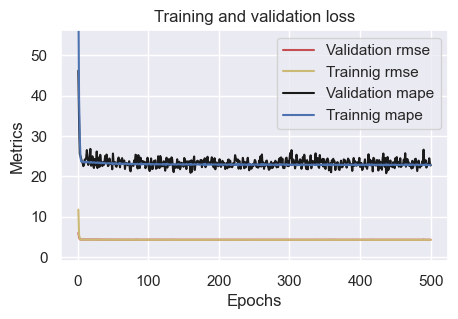

In [65]:
plotme(model3_1_5)

#### 2. Target (mean) encoding of dominated roadtype

In [66]:
df2 = df.iloc[:,0:6].copy()
df2 = df2.drop('hour of day',axis=1)
df2.head()

travel time  distance    hr_sin        hr_cos 1st ranked
0         2171  0.288827 -1.000000 -1.836970e-16    primary
1          799  0.291979 -0.707107  7.071068e-01    primary
2          698  0.291246 -0.965926  2.588190e-01    primary
3          806  0.299914 -0.965926 -2.588190e-01    primary
4          721  0.310737 -0.965926 -2.588190e-01    primary

In [67]:
te = TargetEncoder()
df2['1st ranked'] = te.fit_transform(df2['1st ranked'],df2['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [68]:
df2.head()

travel time  distance    hr_sin        hr_cos  1st ranked
0         2171  0.288827 -1.000000 -1.836970e-16   763.99619
1          799  0.291979 -0.707107  7.071068e-01   763.99619
2          698  0.291246 -0.965926  2.588190e-01   763.99619
3          806  0.299914 -0.965926 -2.588190e-01   763.99619
4          721  0.310737 -0.965926 -2.588190e-01   763.99619

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

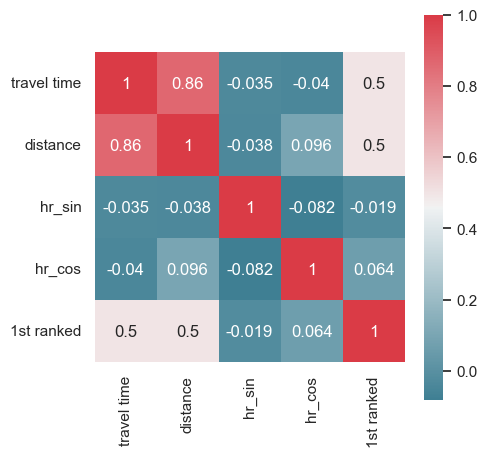

In [69]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(5,5))
corr = df2.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [70]:
x = np.array(df2[['distance','hr_sin','hr_cos','1st ranked']])
y = np.array(df2['travel time'])
x

array([[ 2.88826596e-01, -1.00000000e+00, -1.83697020e-16,
         7.63996190e+02],
       [ 2.91978652e-01, -7.07106781e-01,  7.07106781e-01,
         7.63996190e+02],
       [ 2.91245718e-01, -9.65925826e-01,  2.58819045e-01,
         7.63996190e+02],
       ...,
       [ 5.98423508e-01,  2.58819045e-01,  9.65925826e-01,
         7.63996190e+02],
       [ 6.05847786e-01,  7.07106781e-01,  7.07106781e-01,
         7.63996190e+02],
       [ 5.89407276e-01, -2.58819045e-01,  9.65925826e-01,
         7.63996190e+02]])

In [71]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12910, 4)
(3228, 4)


In [73]:
# inputs: distance + hour + dominant road
model3_3_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_3_1

Epoch 1/500
404/404 [==============================] - 0s 844us/step - loss: 273419.9375 - mape: 52.1014 - rmse: 522.8958 - val_loss: 209829.1406 - val_mape: 55.6985 - val_rmse: 458.0711
Epoch 2/500
404/404 [==============================] - 0s 728us/step - loss: 210802.5781 - mape: 55.1480 - rmse: 459.1324 - val_loss: 209579.0312 - val_mape: 54.1951 - val_rmse: 457.7980
Epoch 3/500
404/404 [==============================] - 0s 716us/step - loss: 210557.1875 - mape: 55.0915 - rmse: 458.8651 - val_loss: 209392.0469 - val_mape: 55.5959 - val_rmse: 457.5938
Epoch 4/500
404/404 [==============================] - 0s 712us/step - loss: 210386.5781 - mape: 54.9369 - rmse: 458.6792 - val_loss: 209212.8438 - val_mape: 55.7957 - val_rmse: 457.3979
Epoch 5/500
404/404 [==============================] - 0s 729us/step - loss: 210218.7969 - mape: 55.0991 - rmse: 458.4962 - val_loss: 208834.2031 - val_mape: 54.6267 - val_rmse: 456.9838
Epoch 6/500
404/404 [==============================] - 0s 697us/s

Epoch 45/500
404/404 [==============================] - 0s 729us/step - loss: 136918.1719 - mape: 42.6065 - rmse: 370.0246 - val_loss: 133826.1406 - val_mape: 42.2260 - val_rmse: 365.8225
Epoch 46/500
404/404 [==============================] - 0s 698us/step - loss: 133094.5938 - mape: 41.8207 - rmse: 364.8213 - val_loss: 139599.7656 - val_mape: 50.5217 - val_rmse: 373.6305
Epoch 47/500
404/404 [==============================] - 0s 703us/step - loss: 129669.8359 - mape: 41.1804 - rmse: 360.0970 - val_loss: 126417.1562 - val_mape: 40.8383 - val_rmse: 355.5519
Epoch 48/500
404/404 [==============================] - 0s 692us/step - loss: 125542.8359 - mape: 40.3431 - rmse: 354.3203 - val_loss: 124404.5625 - val_mape: 43.4250 - val_rmse: 352.7103
Epoch 49/500
404/404 [==============================] - 0s 715us/step - loss: 121974.9453 - mape: 39.6404 - rmse: 349.2491 - val_loss: 119409.2266 - val_mape: 40.8603 - val_rmse: 345.5564
Epoch 50/500
404/404 [==============================] - 0s 7

Epoch 89/500
404/404 [==============================] - 0s 719us/step - loss: 65805.2500 - mape: 21.9763 - rmse: 256.5253 - val_loss: 66792.3672 - val_mape: 25.1677 - val_rmse: 258.4422
Epoch 90/500
404/404 [==============================] - 0s 719us/step - loss: 65984.3594 - mape: 22.1326 - rmse: 256.8742 - val_loss: 65287.3906 - val_mape: 21.6734 - val_rmse: 255.5140
Epoch 91/500
404/404 [==============================] - 0s 707us/step - loss: 65980.0938 - mape: 22.1332 - rmse: 256.8659 - val_loss: 65351.7383 - val_mape: 21.2695 - val_rmse: 255.6399
Epoch 92/500
404/404 [==============================] - 0s 719us/step - loss: 65887.2734 - mape: 22.0554 - rmse: 256.6852 - val_loss: 65600.8750 - val_mape: 20.6852 - val_rmse: 256.1267
Epoch 93/500
404/404 [==============================] - 0s 704us/step - loss: 65860.0156 - mape: 22.0564 - rmse: 256.6320 - val_loss: 67864.5938 - val_mape: 26.4222 - val_rmse: 260.5083
Epoch 94/500
404/404 [==============================] - 0s 735us/step 

Epoch 133/500
404/404 [==============================] - 0s 695us/step - loss: 65818.3203 - mape: 22.5742 - rmse: 256.5508 - val_loss: 66786.5391 - val_mape: 19.7963 - val_rmse: 258.4309
Epoch 134/500
404/404 [==============================] - 0s 721us/step - loss: 65409.7266 - mape: 22.4002 - rmse: 255.7533 - val_loss: 66641.9844 - val_mape: 25.8212 - val_rmse: 258.1511
Epoch 135/500
404/404 [==============================] - 0s 707us/step - loss: 65595.6094 - mape: 22.5999 - rmse: 256.1164 - val_loss: 66251.2188 - val_mape: 20.1727 - val_rmse: 257.3931
Epoch 136/500
404/404 [==============================] - 0s 705us/step - loss: 65835.0469 - mape: 22.6340 - rmse: 256.5834 - val_loss: 65084.2539 - val_mape: 22.6545 - val_rmse: 255.1162
Epoch 137/500
404/404 [==============================] - 0s 709us/step - loss: 66036.3281 - mape: 22.6458 - rmse: 256.9753 - val_loss: 66845.1562 - val_mape: 19.7668 - val_rmse: 258.5443
Epoch 138/500
404/404 [==============================] - 0s 717us

Epoch 177/500
404/404 [==============================] - 0s 732us/step - loss: 65573.4141 - mape: 22.6283 - rmse: 256.0731 - val_loss: 65799.3906 - val_mape: 24.7934 - val_rmse: 256.5139
Epoch 178/500
404/404 [==============================] - 0s 720us/step - loss: 65914.2812 - mape: 22.7628 - rmse: 256.7378 - val_loss: 68694.2578 - val_mape: 19.0521 - val_rmse: 262.0959
Epoch 179/500
404/404 [==============================] - 0s 720us/step - loss: 65520.5195 - mape: 22.6704 - rmse: 255.9698 - val_loss: 65383.7188 - val_mape: 23.9812 - val_rmse: 255.7024
Epoch 180/500
404/404 [==============================] - 0s 708us/step - loss: 65209.1055 - mape: 22.6223 - rmse: 255.3607 - val_loss: 67008.8672 - val_mape: 26.3605 - val_rmse: 258.8607
Epoch 181/500
404/404 [==============================] - 0s 702us/step - loss: 65595.5625 - mape: 22.7073 - rmse: 256.1163 - val_loss: 65633.7812 - val_mape: 24.5002 - val_rmse: 256.1909
Epoch 182/500
404/404 [==============================] - 0s 719us

Epoch 221/500
404/404 [==============================] - 0s 734us/step - loss: 65839.5938 - mape: 22.8050 - rmse: 256.5923 - val_loss: 65213.9609 - val_mape: 23.5165 - val_rmse: 255.3702
Epoch 222/500
404/404 [==============================] - 0s 707us/step - loss: 65889.2266 - mape: 22.7841 - rmse: 256.6890 - val_loss: 66497.1797 - val_mape: 25.7941 - val_rmse: 257.8705
Epoch 223/500
404/404 [==============================] - 0s 709us/step - loss: 65611.1328 - mape: 22.7286 - rmse: 256.1467 - val_loss: 66882.4844 - val_mape: 26.2397 - val_rmse: 258.6165
Epoch 224/500
404/404 [==============================] - 0s 717us/step - loss: 65926.5547 - mape: 22.6960 - rmse: 256.7617 - val_loss: 67431.9141 - val_mape: 26.8183 - val_rmse: 259.6765
Epoch 225/500
404/404 [==============================] - 0s 695us/step - loss: 65730.5000 - mape: 22.7922 - rmse: 256.3796 - val_loss: 69664.0000 - val_mape: 28.7372 - val_rmse: 263.9394
Epoch 226/500
404/404 [==============================] - 0s 700us

Epoch 265/500
404/404 [==============================] - 0s 744us/step - loss: 65996.3516 - mape: 22.7930 - rmse: 256.8976 - val_loss: 67558.8906 - val_mape: 19.4895 - val_rmse: 259.9209
Epoch 266/500
404/404 [==============================] - 0s 709us/step - loss: 65764.8125 - mape: 22.7199 - rmse: 256.4465 - val_loss: 65079.1406 - val_mape: 22.4854 - val_rmse: 255.1061
Epoch 267/500
404/404 [==============================] - 0s 719us/step - loss: 65678.4688 - mape: 22.7581 - rmse: 256.2781 - val_loss: 65126.6406 - val_mape: 23.1260 - val_rmse: 255.1992
Epoch 268/500
404/404 [==============================] - 0s 719us/step - loss: 65870.2109 - mape: 22.7846 - rmse: 256.6519 - val_loss: 67595.8359 - val_mape: 26.9799 - val_rmse: 259.9920
Epoch 269/500
404/404 [==============================] - 0s 716us/step - loss: 65626.6953 - mape: 22.8577 - rmse: 256.1771 - val_loss: 67504.1406 - val_mape: 19.5081 - val_rmse: 259.8156
Epoch 270/500
404/404 [==============================] - 0s 699us

Epoch 309/500
404/404 [==============================] - 0s 720us/step - loss: 66480.2734 - mape: 22.9737 - rmse: 257.8377 - val_loss: 65551.3984 - val_mape: 21.0590 - val_rmse: 256.0301
Epoch 310/500
404/404 [==============================] - 0s 699us/step - loss: 65788.3828 - mape: 22.8095 - rmse: 256.4925 - val_loss: 65471.5391 - val_mape: 24.2146 - val_rmse: 255.8741
Epoch 311/500
404/404 [==============================] - 0s 710us/step - loss: 65818.3594 - mape: 22.7029 - rmse: 256.5509 - val_loss: 65612.4688 - val_mape: 24.5061 - val_rmse: 256.1493
Epoch 312/500
404/404 [==============================] - 0s 708us/step - loss: 65343.7617 - mape: 22.6145 - rmse: 255.6243 - val_loss: 65076.4961 - val_mape: 22.5186 - val_rmse: 255.1010
Epoch 313/500
404/404 [==============================] - 0s 707us/step - loss: 65781.0391 - mape: 22.7023 - rmse: 256.4781 - val_loss: 65104.9727 - val_mape: 23.0030 - val_rmse: 255.1568
Epoch 314/500
404/404 [==============================] - 0s 707us

Epoch 353/500
404/404 [==============================] - 0s 719us/step - loss: 66166.5625 - mape: 22.9652 - rmse: 257.2286 - val_loss: 76400.2422 - val_mape: 18.2879 - val_rmse: 276.4059
Epoch 354/500
404/404 [==============================] - 0s 697us/step - loss: 66003.8750 - mape: 22.7039 - rmse: 256.9122 - val_loss: 65218.1523 - val_mape: 21.7197 - val_rmse: 255.3784
Epoch 355/500
404/404 [==============================] - 0s 742us/step - loss: 65917.6016 - mape: 22.7796 - rmse: 256.7442 - val_loss: 66594.7734 - val_mape: 20.0356 - val_rmse: 258.0596
Epoch 356/500
404/404 [==============================] - 0s 691us/step - loss: 65556.0703 - mape: 22.7171 - rmse: 256.0392 - val_loss: 66492.8359 - val_mape: 20.1016 - val_rmse: 257.8621
Epoch 357/500
404/404 [==============================] - 0s 716us/step - loss: 65688.1641 - mape: 22.7039 - rmse: 256.2970 - val_loss: 66116.7266 - val_mape: 20.4014 - val_rmse: 257.1317
Epoch 358/500
404/404 [==============================] - 0s 719us

Epoch 397/500
404/404 [==============================] - 0s 704us/step - loss: 65618.6875 - mape: 22.7427 - rmse: 256.1614 - val_loss: 65312.5156 - val_mape: 21.4703 - val_rmse: 255.5631
Epoch 398/500
404/404 [==============================] - 0s 693us/step - loss: 66113.5859 - mape: 22.8126 - rmse: 257.1256 - val_loss: 66439.0703 - val_mape: 20.1375 - val_rmse: 257.7578
Epoch 399/500
404/404 [==============================] - 0s 732us/step - loss: 65523.0977 - mape: 22.6706 - rmse: 255.9748 - val_loss: 67966.5547 - val_mape: 19.3241 - val_rmse: 260.7039
Epoch 400/500
404/404 [==============================] - 0s 715us/step - loss: 65653.9062 - mape: 22.7849 - rmse: 256.2302 - val_loss: 65137.4961 - val_mape: 23.1974 - val_rmse: 255.2205
Epoch 401/500
404/404 [==============================] - 0s 696us/step - loss: 65930.0703 - mape: 22.7052 - rmse: 256.7685 - val_loss: 74244.1875 - val_mape: 31.7097 - val_rmse: 272.4779
Epoch 402/500
404/404 [==============================] - 0s 709us

Epoch 441/500
404/404 [==============================] - 0s 731us/step - loss: 65734.2344 - mape: 22.6498 - rmse: 256.3869 - val_loss: 68900.2656 - val_mape: 28.1586 - val_rmse: 262.4886
Epoch 442/500
404/404 [==============================] - 0s 699us/step - loss: 65853.7969 - mape: 22.7146 - rmse: 256.6199 - val_loss: 65524.7305 - val_mape: 21.0998 - val_rmse: 255.9780
Epoch 443/500
404/404 [==============================] - 0s 695us/step - loss: 65902.8047 - mape: 22.8220 - rmse: 256.7154 - val_loss: 65394.9648 - val_mape: 24.0440 - val_rmse: 255.7244
Epoch 444/500
404/404 [==============================] - 0s 697us/step - loss: 65717.0703 - mape: 22.7428 - rmse: 256.3534 - val_loss: 66236.9609 - val_mape: 25.4780 - val_rmse: 257.3654
Epoch 445/500
404/404 [==============================] - 0s 717us/step - loss: 65447.1250 - mape: 22.6492 - rmse: 255.8264 - val_loss: 65449.2969 - val_mape: 21.2085 - val_rmse: 255.8306
Epoch 446/500
404/404 [==============================] - 0s 702us

Epoch 485/500
404/404 [==============================] - 0s 721us/step - loss: 65920.6562 - mape: 22.6909 - rmse: 256.7502 - val_loss: 65120.2812 - val_mape: 22.0786 - val_rmse: 255.1868
Epoch 486/500
404/404 [==============================] - 0s 735us/step - loss: 65413.6562 - mape: 22.6919 - rmse: 255.7609 - val_loss: 65391.9961 - val_mape: 21.3103 - val_rmse: 255.7186
Epoch 487/500
404/404 [==============================] - 0s 715us/step - loss: 65281.7539 - mape: 22.6541 - rmse: 255.5029 - val_loss: 66635.2969 - val_mape: 19.9894 - val_rmse: 258.1381
Epoch 488/500
404/404 [==============================] - 0s 699us/step - loss: 65558.6094 - mape: 22.6907 - rmse: 256.0442 - val_loss: 65828.2578 - val_mape: 20.6733 - val_rmse: 256.5702
Epoch 489/500
404/404 [==============================] - 0s 720us/step - loss: 65486.2617 - mape: 22.6143 - rmse: 255.9028 - val_loss: 66434.0781 - val_mape: 25.7087 - val_rmse: 257.7481
Epoch 490/500
404/404 [==============================] - 0s 722us

In [74]:
# inputs: distance + hour + dominant road
model3_3_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_3_2

Epoch 1/500
404/404 [==============================] - 1s 880us/step - loss: 250342.8906 - mape: 53.4069 - rmse: 500.3428 - val_loss: 209543.0781 - val_mape: 54.9071 - val_rmse: 457.7588
Epoch 2/500
404/404 [==============================] - 0s 750us/step - loss: 210638.0469 - mape: 55.1334 - rmse: 458.9532 - val_loss: 209365.5938 - val_mape: 56.0630 - val_rmse: 457.5648
Epoch 3/500
404/404 [==============================] - 0s 745us/step - loss: 210547.1719 - mape: 54.8798 - rmse: 458.8542 - val_loss: 209274.8438 - val_mape: 56.7993 - val_rmse: 457.4657
Epoch 4/500
404/404 [==============================] - 0s 744us/step - loss: 209857.7969 - mape: 54.9251 - rmse: 458.1024 - val_loss: 209015.5469 - val_mape: 57.0714 - val_rmse: 457.1822
Epoch 5/500
404/404 [==============================] - 0s 764us/step - loss: 209545.5938 - mape: 55.0441 - rmse: 457.7615 - val_loss: 208022.1250 - val_mape: 53.3449 - val_rmse: 456.0944
Epoch 6/500
404/404 [==============================] - 0s 737us/s

Epoch 45/500
404/404 [==============================] - 0s 745us/step - loss: 95321.7109 - mape: 33.2908 - rmse: 308.7422 - val_loss: 92563.0469 - val_mape: 33.0051 - val_rmse: 304.2418
Epoch 46/500
404/404 [==============================] - 0s 744us/step - loss: 92336.9219 - mape: 32.3421 - rmse: 303.8699 - val_loss: 91589.2266 - val_mape: 35.9304 - val_rmse: 302.6371
Epoch 47/500
404/404 [==============================] - 0s 753us/step - loss: 88872.8516 - mape: 31.4820 - rmse: 298.1155 - val_loss: 86414.8828 - val_mape: 30.9787 - val_rmse: 293.9641
Epoch 48/500
404/404 [==============================] - 0s 750us/step - loss: 87271.5859 - mape: 30.7073 - rmse: 295.4176 - val_loss: 85134.1094 - val_mape: 33.3247 - val_rmse: 291.7775
Epoch 49/500
404/404 [==============================] - 0s 765us/step - loss: 82995.1641 - mape: 29.6354 - rmse: 288.0888 - val_loss: 81438.8984 - val_mape: 27.8016 - val_rmse: 285.3750
Epoch 50/500
404/404 [==============================] - 0s 754us/step 

404/404 [==============================] - 0s 747us/step - loss: 66383.2969 - mape: 22.5940 - rmse: 257.6496 - val_loss: 69004.4688 - val_mape: 18.7779 - val_rmse: 262.6870
Epoch 90/500
404/404 [==============================] - 0s 741us/step - loss: 66629.1484 - mape: 22.5932 - rmse: 258.1262 - val_loss: 65252.3164 - val_mape: 21.4407 - val_rmse: 255.4453
Epoch 91/500
404/404 [==============================] - 0s 750us/step - loss: 65980.8828 - mape: 22.4387 - rmse: 256.8674 - val_loss: 65671.7188 - val_mape: 24.2019 - val_rmse: 256.2650
Epoch 92/500
404/404 [==============================] - 0s 745us/step - loss: 65827.7500 - mape: 22.4321 - rmse: 256.5692 - val_loss: 66366.9062 - val_mape: 25.2645 - val_rmse: 257.6178
Epoch 93/500
404/404 [==============================] - 0s 756us/step - loss: 65673.2422 - mape: 22.5156 - rmse: 256.2679 - val_loss: 65575.1641 - val_mape: 20.7996 - val_rmse: 256.0765
Epoch 94/500
404/404 [==============================] - 0s 756us/step - loss: 66586

Epoch 133/500
404/404 [==============================] - 0s 740us/step - loss: 66086.9922 - mape: 22.7681 - rmse: 257.0739 - val_loss: 69352.5000 - val_mape: 18.8673 - val_rmse: 263.3486
Epoch 134/500
404/404 [==============================] - 0s 745us/step - loss: 66040.3984 - mape: 22.7522 - rmse: 256.9833 - val_loss: 66885.0938 - val_mape: 26.2031 - val_rmse: 258.6215
Epoch 135/500
404/404 [==============================] - 0s 757us/step - loss: 66082.8047 - mape: 22.9189 - rmse: 257.0658 - val_loss: 66245.1719 - val_mape: 20.2537 - val_rmse: 257.3814
Epoch 136/500
404/404 [==============================] - 0s 752us/step - loss: 65658.2734 - mape: 22.7303 - rmse: 256.2387 - val_loss: 65113.4336 - val_mape: 22.0909 - val_rmse: 255.1733
Epoch 137/500
404/404 [==============================] - 0s 717us/step - loss: 65886.4453 - mape: 22.7629 - rmse: 256.6836 - val_loss: 66297.7031 - val_mape: 20.2027 - val_rmse: 257.4834
Epoch 138/500
404/404 [==============================] - 0s 742us

Epoch 177/500
404/404 [==============================] - 0s 748us/step - loss: 66093.4922 - mape: 22.8458 - rmse: 257.0865 - val_loss: 69505.9141 - val_mape: 18.8571 - val_rmse: 263.6397
Epoch 178/500
404/404 [==============================] - 0s 732us/step - loss: 65417.4805 - mape: 22.6482 - rmse: 255.7684 - val_loss: 66418.0000 - val_mape: 20.1558 - val_rmse: 257.7169
Epoch 179/500
404/404 [==============================] - 0s 739us/step - loss: 65736.0000 - mape: 22.7168 - rmse: 256.3903 - val_loss: 68663.9922 - val_mape: 27.9437 - val_rmse: 262.0381
Epoch 180/500
404/404 [==============================] - 0s 758us/step - loss: 65989.8906 - mape: 22.7976 - rmse: 256.8850 - val_loss: 66051.6250 - val_mape: 25.2014 - val_rmse: 257.0051
Epoch 181/500
404/404 [==============================] - 0s 714us/step - loss: 66093.2500 - mape: 22.8440 - rmse: 257.0861 - val_loss: 65604.5781 - val_mape: 20.9607 - val_rmse: 256.1339
Epoch 182/500
404/404 [==============================] - 0s 732us

Epoch 221/500
404/404 [==============================] - 0s 721us/step - loss: 65741.1953 - mape: 22.7698 - rmse: 256.4005 - val_loss: 65816.1641 - val_mape: 20.7093 - val_rmse: 256.5466
Epoch 222/500
404/404 [==============================] - 0s 738us/step - loss: 65711.5547 - mape: 22.7760 - rmse: 256.3427 - val_loss: 65093.5156 - val_mape: 22.3026 - val_rmse: 255.1343
Epoch 223/500
404/404 [==============================] - 0s 760us/step - loss: 66228.5078 - mape: 22.8244 - rmse: 257.3490 - val_loss: 65276.9648 - val_mape: 23.7271 - val_rmse: 255.4936
Epoch 224/500
404/404 [==============================] - 0s 755us/step - loss: 65620.7891 - mape: 22.7299 - rmse: 256.1656 - val_loss: 65276.9883 - val_mape: 23.7232 - val_rmse: 255.4936
Epoch 225/500
404/404 [==============================] - 0s 755us/step - loss: 65755.0391 - mape: 22.6422 - rmse: 256.4275 - val_loss: 65872.0859 - val_mape: 24.9284 - val_rmse: 256.6556
Epoch 226/500
404/404 [==============================] - 0s 745us

Epoch 265/500
404/404 [==============================] - 0s 769us/step - loss: 66339.6719 - mape: 22.8119 - rmse: 257.5649 - val_loss: 67895.6094 - val_mape: 27.2818 - val_rmse: 260.5679
Epoch 266/500
404/404 [==============================] - 0s 757us/step - loss: 65563.2891 - mape: 22.6838 - rmse: 256.0533 - val_loss: 68973.0781 - val_mape: 28.2014 - val_rmse: 262.6273
Epoch 267/500
404/404 [==============================] - 0s 770us/step - loss: 66723.3281 - mape: 22.8978 - rmse: 258.3086 - val_loss: 66360.6875 - val_mape: 20.1973 - val_rmse: 257.6057
Epoch 268/500
404/404 [==============================] - 0s 748us/step - loss: 65653.6719 - mape: 22.7274 - rmse: 256.2297 - val_loss: 68624.7812 - val_mape: 19.0941 - val_rmse: 261.9633
Epoch 269/500
404/404 [==============================] - 0s 769us/step - loss: 65677.1953 - mape: 22.6163 - rmse: 256.2756 - val_loss: 65329.6445 - val_mape: 23.8705 - val_rmse: 255.5966
Epoch 270/500
404/404 [==============================] - 0s 756us

Epoch 309/500
404/404 [==============================] - 0s 722us/step - loss: 66245.2734 - mape: 22.8753 - rmse: 257.3816 - val_loss: 65253.3477 - val_mape: 21.6160 - val_rmse: 255.4473
Epoch 310/500
404/404 [==============================] - 0s 744us/step - loss: 66543.6641 - mape: 22.9150 - rmse: 257.9606 - val_loss: 67726.7422 - val_mape: 27.1155 - val_rmse: 260.2436
Epoch 311/500
404/404 [==============================] - 0s 744us/step - loss: 65905.1328 - mape: 22.8865 - rmse: 256.7199 - val_loss: 65138.7695 - val_mape: 21.9979 - val_rmse: 255.2230
Epoch 312/500
404/404 [==============================] - 0s 750us/step - loss: 66137.3906 - mape: 22.8540 - rmse: 257.1719 - val_loss: 65591.8594 - val_mape: 20.9913 - val_rmse: 256.1091
Epoch 313/500
404/404 [==============================] - 0s 770us/step - loss: 65773.6094 - mape: 22.7303 - rmse: 256.4637 - val_loss: 65080.8086 - val_mape: 22.7108 - val_rmse: 255.1094
Epoch 314/500
404/404 [==============================] - 0s 744us

Epoch 353/500
404/404 [==============================] - 0s 795us/step - loss: 65986.3047 - mape: 22.8244 - rmse: 256.8780 - val_loss: 67561.5234 - val_mape: 19.5083 - val_rmse: 259.9260
Epoch 354/500
404/404 [==============================] - 0s 770us/step - loss: 65728.0547 - mape: 22.7584 - rmse: 256.3748 - val_loss: 65087.8398 - val_mape: 22.3376 - val_rmse: 255.1232
Epoch 355/500
404/404 [==============================] - 0s 756us/step - loss: 65772.6797 - mape: 22.7702 - rmse: 256.4619 - val_loss: 65637.4062 - val_mape: 20.9298 - val_rmse: 256.1980
Epoch 356/500
404/404 [==============================] - 0s 758us/step - loss: 65597.1172 - mape: 22.7056 - rmse: 256.1194 - val_loss: 65185.1289 - val_mape: 23.4199 - val_rmse: 255.3138
Epoch 357/500
404/404 [==============================] - 0s 776us/step - loss: 65552.0703 - mape: 22.7339 - rmse: 256.0314 - val_loss: 65866.8594 - val_mape: 24.9319 - val_rmse: 256.6454
Epoch 358/500
404/404 [==============================] - 0s 744us

Epoch 397/500
404/404 [==============================] - 0s 751us/step - loss: 65837.7891 - mape: 22.7620 - rmse: 256.5887 - val_loss: 65454.5742 - val_mape: 24.1731 - val_rmse: 255.8409
Epoch 398/500
404/404 [==============================] - 0s 763us/step - loss: 65453.6523 - mape: 22.7165 - rmse: 255.8391 - val_loss: 65730.0859 - val_mape: 20.7962 - val_rmse: 256.3788
Epoch 399/500
404/404 [==============================] - 0s 745us/step - loss: 66183.4531 - mape: 22.8207 - rmse: 257.2614 - val_loss: 65112.8281 - val_mape: 22.1501 - val_rmse: 255.1721
Epoch 400/500
404/404 [==============================] - 0s 769us/step - loss: 66809.3359 - mape: 22.9874 - rmse: 258.4750 - val_loss: 68033.0547 - val_mape: 27.4215 - val_rmse: 260.8315
Epoch 401/500
404/404 [==============================] - 0s 751us/step - loss: 65929.2422 - mape: 22.7190 - rmse: 256.7669 - val_loss: 68354.7344 - val_mape: 27.7046 - val_rmse: 261.4474
Epoch 402/500
404/404 [==============================] - 0s 734us

Epoch 441/500
404/404 [==============================] - 0s 744us/step - loss: 66041.0469 - mape: 22.7566 - rmse: 256.9845 - val_loss: 68986.0469 - val_mape: 28.2233 - val_rmse: 262.6519
Epoch 442/500
404/404 [==============================] - 0s 744us/step - loss: 65883.6328 - mape: 22.8776 - rmse: 256.6781 - val_loss: 65800.4375 - val_mape: 24.8322 - val_rmse: 256.5160
Epoch 443/500
404/404 [==============================] - 0s 749us/step - loss: 65608.6172 - mape: 22.7186 - rmse: 256.1418 - val_loss: 68178.6484 - val_mape: 27.5447 - val_rmse: 261.1104
Epoch 444/500
404/404 [==============================] - 0s 757us/step - loss: 65649.7266 - mape: 22.6757 - rmse: 256.2220 - val_loss: 67250.8281 - val_mape: 19.6511 - val_rmse: 259.3276
Epoch 445/500
404/404 [==============================] - 0s 757us/step - loss: 65985.9609 - mape: 22.7965 - rmse: 256.8773 - val_loss: 65813.5938 - val_mape: 24.8516 - val_rmse: 256.5416
Epoch 446/500
404/404 [==============================] - 0s 750us

Epoch 485/500
404/404 [==============================] - 0s 765us/step - loss: 65805.0859 - mape: 22.7205 - rmse: 256.5250 - val_loss: 65366.3984 - val_mape: 21.3523 - val_rmse: 255.6685
Epoch 486/500
404/404 [==============================] - 0s 742us/step - loss: 66296.5312 - mape: 22.8895 - rmse: 257.4811 - val_loss: 66359.3438 - val_mape: 25.6315 - val_rmse: 257.6031
Epoch 487/500
404/404 [==============================] - 0s 742us/step - loss: 65926.5547 - mape: 22.8174 - rmse: 256.7617 - val_loss: 68505.7500 - val_mape: 19.1382 - val_rmse: 261.7360
Epoch 488/500
404/404 [==============================] - 0s 744us/step - loss: 65836.3750 - mape: 22.7765 - rmse: 256.5860 - val_loss: 65452.3359 - val_mape: 24.1705 - val_rmse: 255.8365
Epoch 489/500
404/404 [==============================] - 0s 769us/step - loss: 66137.0703 - mape: 22.8223 - rmse: 257.1713 - val_loss: 66101.7109 - val_mape: 20.4264 - val_rmse: 257.1025
Epoch 490/500
404/404 [==============================] - 0s 746us

In [75]:
# inputs: distance + hour + dominant road
model3_3_3 = nnmodel(300, num_hlayers=1,Epoch=500)
model3_3_3

Epoch 1/500
404/404 [==============================] - 1s 901us/step - loss: 241122.2188 - mape: 54.8571 - rmse: 491.0420 - val_loss: 210038.3438 - val_mape: 52.4374 - val_rmse: 458.2994
Epoch 2/500
404/404 [==============================] - 0s 749us/step - loss: 210555.8281 - mape: 54.9358 - rmse: 458.8636 - val_loss: 208755.7500 - val_mape: 55.5187 - val_rmse: 456.8980
Epoch 3/500
404/404 [==============================] - 0s 776us/step - loss: 210139.2969 - mape: 54.9988 - rmse: 458.4095 - val_loss: 208173.9375 - val_mape: 55.9576 - val_rmse: 456.2608
Epoch 4/500
404/404 [==============================] - 0s 784us/step - loss: 209199.1875 - mape: 54.8844 - rmse: 457.3830 - val_loss: 207114.7656 - val_mape: 54.4842 - val_rmse: 455.0986
Epoch 5/500
404/404 [==============================] - 0s 772us/step - loss: 208092.9688 - mape: 54.7590 - rmse: 456.1721 - val_loss: 206315.1094 - val_mape: 55.5793 - val_rmse: 454.2192
Epoch 6/500
404/404 [==============================] - 0s 767us/s

Epoch 45/500
404/404 [==============================] - 0s 768us/step - loss: 67560.7812 - mape: 22.6266 - rmse: 259.9246 - val_loss: 65507.0430 - val_mape: 23.8101 - val_rmse: 255.9434
Epoch 46/500
404/404 [==============================] - 0s 763us/step - loss: 66703.1016 - mape: 22.6686 - rmse: 258.2694 - val_loss: 65405.4766 - val_mape: 21.2470 - val_rmse: 255.7449
Epoch 47/500
404/404 [==============================] - 0s 757us/step - loss: 66826.7969 - mape: 22.5664 - rmse: 258.5088 - val_loss: 67842.9922 - val_mape: 26.9073 - val_rmse: 260.4669
Epoch 48/500
404/404 [==============================] - 0s 764us/step - loss: 67419.5469 - mape: 22.9241 - rmse: 259.6527 - val_loss: 65523.6328 - val_mape: 24.0112 - val_rmse: 255.9758
Epoch 49/500
404/404 [==============================] - 0s 769us/step - loss: 66904.8359 - mape: 22.5826 - rmse: 258.6597 - val_loss: 69332.1562 - val_mape: 28.1400 - val_rmse: 263.3100
Epoch 50/500
404/404 [==============================] - 0s 770us/step 

404/404 [==============================] - 0s 758us/step - loss: 66149.6719 - mape: 22.9688 - rmse: 257.1958 - val_loss: 66106.9688 - val_mape: 20.2832 - val_rmse: 257.1128
Epoch 90/500
404/404 [==============================] - 0s 772us/step - loss: 66619.8203 - mape: 23.0539 - rmse: 258.1082 - val_loss: 67348.8438 - val_mape: 27.0389 - val_rmse: 259.5166
Epoch 91/500
404/404 [==============================] - 0s 766us/step - loss: 65783.5312 - mape: 22.8795 - rmse: 256.4830 - val_loss: 68350.2344 - val_mape: 27.9893 - val_rmse: 261.4388
Epoch 92/500
404/404 [==============================] - 0s 755us/step - loss: 66441.4453 - mape: 23.0493 - rmse: 257.7624 - val_loss: 67686.6094 - val_mape: 26.9594 - val_rmse: 260.1665
Epoch 93/500
404/404 [==============================] - 0s 770us/step - loss: 66544.2812 - mape: 23.1083 - rmse: 257.9618 - val_loss: 64962.8047 - val_mape: 22.3142 - val_rmse: 254.8780
Epoch 94/500
404/404 [==============================] - 0s 756us/step - loss: 66243

Epoch 133/500
404/404 [==============================] - 0s 776us/step - loss: 66547.4141 - mape: 23.1268 - rmse: 257.9679 - val_loss: 64874.3789 - val_mape: 23.2550 - val_rmse: 254.7045
Epoch 134/500
404/404 [==============================] - 0s 776us/step - loss: 65985.5391 - mape: 22.9577 - rmse: 256.8765 - val_loss: 65446.7422 - val_mape: 20.7998 - val_rmse: 255.8256
Epoch 135/500
404/404 [==============================] - 0s 762us/step - loss: 66412.9531 - mape: 23.0495 - rmse: 257.7071 - val_loss: 67824.5781 - val_mape: 19.1934 - val_rmse: 260.4315
Epoch 136/500
404/404 [==============================] - 0s 769us/step - loss: 66169.1406 - mape: 22.9966 - rmse: 257.2336 - val_loss: 65880.0547 - val_mape: 25.0792 - val_rmse: 256.6711
Epoch 137/500
404/404 [==============================] - 0s 768us/step - loss: 67268.5703 - mape: 23.1920 - rmse: 259.3618 - val_loss: 66984.0234 - val_mape: 26.8856 - val_rmse: 258.8127
Epoch 138/500
404/404 [==============================] - 0s 772us

Epoch 177/500
404/404 [==============================] - 0s 747us/step - loss: 65938.9609 - mape: 22.9851 - rmse: 256.7858 - val_loss: 64855.7734 - val_mape: 21.5465 - val_rmse: 254.6680
Epoch 178/500
404/404 [==============================] - 0s 764us/step - loss: 65846.5781 - mape: 22.9478 - rmse: 256.6059 - val_loss: 65365.2969 - val_mape: 22.1393 - val_rmse: 255.6664
Epoch 179/500
404/404 [==============================] - 0s 757us/step - loss: 65601.0469 - mape: 22.8904 - rmse: 256.1270 - val_loss: 67125.3359 - val_mape: 19.3805 - val_rmse: 259.0856
Epoch 180/500
404/404 [==============================] - 0s 761us/step - loss: 65730.7188 - mape: 22.7747 - rmse: 256.3800 - val_loss: 66851.4766 - val_mape: 26.9397 - val_rmse: 258.5565
Epoch 181/500
404/404 [==============================] - 0s 782us/step - loss: 65314.1875 - mape: 22.7541 - rmse: 255.5664 - val_loss: 70888.8125 - val_mape: 18.2781 - val_rmse: 266.2495
Epoch 182/500
404/404 [==============================] - 0s 767us

Epoch 221/500
404/404 [==============================] - 0s 756us/step - loss: 65667.4922 - mape: 22.9429 - rmse: 256.2567 - val_loss: 64838.5469 - val_mape: 24.4589 - val_rmse: 254.6341
Epoch 222/500
404/404 [==============================] - 0s 764us/step - loss: 66416.0625 - mape: 23.0404 - rmse: 257.7131 - val_loss: 73142.0234 - val_mape: 31.5437 - val_rmse: 270.4478
Epoch 223/500
404/404 [==============================] - 0s 769us/step - loss: 65254.7227 - mape: 22.6768 - rmse: 255.4500 - val_loss: 64349.3047 - val_mape: 23.0514 - val_rmse: 253.6716
Epoch 224/500
404/404 [==============================] - 0s 750us/step - loss: 65183.0547 - mape: 22.7186 - rmse: 255.3097 - val_loss: 67075.3672 - val_mape: 19.1277 - val_rmse: 258.9891
Epoch 225/500
404/404 [==============================] - 0s 785us/step - loss: 65955.2422 - mape: 22.8075 - rmse: 256.8175 - val_loss: 70717.0781 - val_mape: 30.2178 - val_rmse: 265.9268
Epoch 226/500
404/404 [==============================] - 0s 769us

Epoch 265/500
404/404 [==============================] - 0s 773us/step - loss: 65211.9844 - mape: 22.7874 - rmse: 255.3664 - val_loss: 67855.6172 - val_mape: 19.0091 - val_rmse: 260.4911
Epoch 266/500
404/404 [==============================] - 0s 769us/step - loss: 65540.6250 - mape: 22.8496 - rmse: 256.0090 - val_loss: 64642.6719 - val_mape: 20.9547 - val_rmse: 254.2492
Epoch 267/500
404/404 [==============================] - 0s 778us/step - loss: 65074.3477 - mape: 22.7541 - rmse: 255.0967 - val_loss: 65711.9453 - val_mape: 19.9554 - val_rmse: 256.3434
Epoch 268/500
404/404 [==============================] - 0s 762us/step - loss: 65942.5781 - mape: 22.8453 - rmse: 256.7929 - val_loss: 64241.5859 - val_mape: 22.0004 - val_rmse: 253.4592
Epoch 269/500
404/404 [==============================] - 0s 761us/step - loss: 65505.7656 - mape: 22.9181 - rmse: 255.9409 - val_loss: 69680.2578 - val_mape: 18.3467 - val_rmse: 263.9702
Epoch 270/500
404/404 [==============================] - 0s 756us

Epoch 309/500
404/404 [==============================] - 0s 770us/step - loss: 64727.8711 - mape: 22.6408 - rmse: 254.4167 - val_loss: 70534.7266 - val_mape: 18.0923 - val_rmse: 265.5837
Epoch 310/500
404/404 [==============================] - 0s 763us/step - loss: 66165.6719 - mape: 23.0048 - rmse: 257.2269 - val_loss: 65055.0352 - val_mape: 25.2191 - val_rmse: 255.0589
Epoch 311/500
404/404 [==============================] - 0s 765us/step - loss: 64618.6914 - mape: 22.7919 - rmse: 254.2021 - val_loss: 64372.5664 - val_mape: 21.2759 - val_rmse: 253.7175
Epoch 312/500
404/404 [==============================] - 0s 770us/step - loss: 65139.9375 - mape: 22.6473 - rmse: 255.2253 - val_loss: 68467.9609 - val_mape: 28.7338 - val_rmse: 261.6638
Epoch 313/500
404/404 [==============================] - 0s 764us/step - loss: 65561.4531 - mape: 22.9138 - rmse: 256.0497 - val_loss: 65088.5312 - val_mape: 20.0636 - val_rmse: 255.1245
Epoch 314/500
404/404 [==============================] - 0s 764us

Epoch 353/500
404/404 [==============================] - 0s 761us/step - loss: 64660.8867 - mape: 22.6927 - rmse: 254.2850 - val_loss: 66778.2578 - val_mape: 19.0204 - val_rmse: 258.4149
Epoch 354/500
404/404 [==============================] - 0s 758us/step - loss: 64885.0703 - mape: 22.6199 - rmse: 254.7255 - val_loss: 64521.0625 - val_mape: 24.3291 - val_rmse: 254.0100
Epoch 355/500
404/404 [==============================] - 0s 763us/step - loss: 65060.8320 - mape: 22.6722 - rmse: 255.0703 - val_loss: 64338.9062 - val_mape: 24.1670 - val_rmse: 253.6512
Epoch 356/500
404/404 [==============================] - 0s 770us/step - loss: 64692.3555 - mape: 22.6336 - rmse: 254.3469 - val_loss: 65718.9219 - val_mape: 19.4680 - val_rmse: 256.3570
Epoch 357/500
404/404 [==============================] - 0s 751us/step - loss: 64844.8281 - mape: 22.6533 - rmse: 254.6465 - val_loss: 69014.1094 - val_mape: 28.3803 - val_rmse: 262.7054
Epoch 358/500
404/404 [==============================] - 0s 763us

Epoch 397/500
404/404 [==============================] - 0s 761us/step - loss: 64872.5078 - mape: 22.7351 - rmse: 254.7008 - val_loss: 66184.4062 - val_mape: 19.0965 - val_rmse: 257.2633
Epoch 398/500
404/404 [==============================] - 0s 751us/step - loss: 64851.6133 - mape: 22.5972 - rmse: 254.6598 - val_loss: 65921.6016 - val_mape: 26.1858 - val_rmse: 256.7520
Epoch 399/500
404/404 [==============================] - 0s 757us/step - loss: 64655.9336 - mape: 22.5179 - rmse: 254.2753 - val_loss: 71380.6953 - val_mape: 30.4385 - val_rmse: 267.1717
Epoch 400/500
404/404 [==============================] - 0s 770us/step - loss: 64510.0898 - mape: 22.5605 - rmse: 253.9884 - val_loss: 64037.6641 - val_mape: 23.7180 - val_rmse: 253.0566
Epoch 401/500
404/404 [==============================] - 0s 757us/step - loss: 64671.5586 - mape: 22.5691 - rmse: 254.3060 - val_loss: 63934.0430 - val_mape: 22.2885 - val_rmse: 252.8518
Epoch 402/500
404/404 [==============================] - 0s 771us

Epoch 441/500
404/404 [==============================] - 0s 769us/step - loss: 64456.3516 - mape: 22.5915 - rmse: 253.8826 - val_loss: 63831.8086 - val_mape: 23.4628 - val_rmse: 252.6496
Epoch 442/500
404/404 [==============================] - 0s 769us/step - loss: 64620.3438 - mape: 22.5064 - rmse: 254.2053 - val_loss: 64393.9570 - val_mape: 24.6793 - val_rmse: 253.7596
Epoch 443/500
404/404 [==============================] - 0s 770us/step - loss: 64993.5898 - mape: 22.6697 - rmse: 254.9384 - val_loss: 65325.2656 - val_mape: 25.7944 - val_rmse: 255.5881
Epoch 444/500
404/404 [==============================] - 0s 797us/step - loss: 64747.7031 - mape: 22.6063 - rmse: 254.4557 - val_loss: 66178.3828 - val_mape: 26.4727 - val_rmse: 257.2516
Epoch 445/500
404/404 [==============================] - 0s 754us/step - loss: 64907.2539 - mape: 22.6311 - rmse: 254.7690 - val_loss: 67197.0781 - val_mape: 18.6443 - val_rmse: 259.2240
Epoch 446/500
404/404 [==============================] - 0s 769us

Epoch 485/500
404/404 [==============================] - 0s 770us/step - loss: 64531.4219 - mape: 22.5169 - rmse: 254.0303 - val_loss: 63890.0586 - val_mape: 21.8999 - val_rmse: 252.7648
Epoch 486/500
404/404 [==============================] - 0s 769us/step - loss: 64255.6172 - mape: 22.4394 - rmse: 253.4869 - val_loss: 63687.9609 - val_mape: 23.0051 - val_rmse: 252.3647
Epoch 487/500
404/404 [==============================] - 0s 764us/step - loss: 64331.4648 - mape: 22.4304 - rmse: 253.6365 - val_loss: 64647.2305 - val_mape: 21.0199 - val_rmse: 254.2582
Epoch 488/500
404/404 [==============================] - 0s 766us/step - loss: 64506.4375 - mape: 22.5358 - rmse: 253.9812 - val_loss: 63794.7852 - val_mape: 21.3102 - val_rmse: 252.5763
Epoch 489/500
404/404 [==============================] - 0s 781us/step - loss: 64574.2188 - mape: 22.4903 - rmse: 254.1146 - val_loss: 63664.7188 - val_mape: 22.2889 - val_rmse: 252.3187
Epoch 490/500
404/404 [==============================] - 0s 764us

In [76]:
# inputs: distance + hour + dominant road
model3_3_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_3_4

Epoch 1/500
404/404 [==============================] - 1s 943us/step - loss: 235591.4531 - mape: 54.8770 - rmse: 485.3776 - val_loss: 209766.9531 - val_mape: 53.7603 - val_rmse: 458.0032
Epoch 2/500
404/404 [==============================] - 0s 789us/step - loss: 211106.6406 - mape: 55.0030 - rmse: 459.4634 - val_loss: 210344.6719 - val_mape: 57.7735 - val_rmse: 458.6335
Epoch 3/500
404/404 [==============================] - 0s 794us/step - loss: 211304.2812 - mape: 55.1253 - rmse: 459.6785 - val_loss: 208942.0781 - val_mape: 53.9597 - val_rmse: 457.1018
Epoch 4/500
404/404 [==============================] - 0s 794us/step - loss: 210600.4375 - mape: 54.9267 - rmse: 458.9122 - val_loss: 208689.3281 - val_mape: 56.1375 - val_rmse: 456.8253
Epoch 5/500
404/404 [==============================] - 0s 809us/step - loss: 210012.3906 - mape: 54.9148 - rmse: 458.2711 - val_loss: 210386.2031 - val_mape: 59.2023 - val_rmse: 458.6788
Epoch 6/500
404/404 [==============================] - 0s 797us/s

Epoch 45/500
404/404 [==============================] - 0s 781us/step - loss: 67005.1484 - mape: 23.0128 - rmse: 258.8535 - val_loss: 65598.1562 - val_mape: 24.9818 - val_rmse: 256.1214
Epoch 46/500
404/404 [==============================] - 0s 782us/step - loss: 67035.2109 - mape: 23.0942 - rmse: 258.9116 - val_loss: 65074.0586 - val_mape: 24.1186 - val_rmse: 255.0962
Epoch 47/500
404/404 [==============================] - 0s 784us/step - loss: 67253.7500 - mape: 22.8724 - rmse: 259.3333 - val_loss: 64981.4688 - val_mape: 22.3215 - val_rmse: 254.9146
Epoch 48/500
404/404 [==============================] - 0s 772us/step - loss: 67695.2656 - mape: 22.9244 - rmse: 260.1831 - val_loss: 65107.8555 - val_mape: 23.2365 - val_rmse: 255.1624
Epoch 49/500
404/404 [==============================] - 0s 770us/step - loss: 66960.1719 - mape: 22.9908 - rmse: 258.7666 - val_loss: 69253.6094 - val_mape: 18.8602 - val_rmse: 263.1608
Epoch 50/500
404/404 [==============================] - 0s 754us/step 

404/404 [==============================] - 0s 778us/step - loss: 66299.1484 - mape: 22.9223 - rmse: 257.4862 - val_loss: 66241.2188 - val_mape: 25.5820 - val_rmse: 257.3737
Epoch 90/500
404/404 [==============================] - 0s 767us/step - loss: 67421.3125 - mape: 23.2483 - rmse: 259.6561 - val_loss: 65042.3242 - val_mape: 22.9221 - val_rmse: 255.0340
Epoch 91/500
404/404 [==============================] - 0s 797us/step - loss: 67635.6172 - mape: 23.3175 - rmse: 260.0685 - val_loss: 68358.0391 - val_mape: 27.9006 - val_rmse: 261.4537
Epoch 92/500
404/404 [==============================] - 0s 776us/step - loss: 66552.7734 - mape: 22.9690 - rmse: 257.9782 - val_loss: 65223.2227 - val_mape: 23.7795 - val_rmse: 255.3884
Epoch 93/500
404/404 [==============================] - 0s 794us/step - loss: 66669.6172 - mape: 23.1503 - rmse: 258.2046 - val_loss: 67097.1250 - val_mape: 26.5916 - val_rmse: 259.0311
Epoch 94/500
404/404 [==============================] - 0s 794us/step - loss: 67963

Epoch 133/500
404/404 [==============================] - 0s 804us/step - loss: 67201.9531 - mape: 23.3271 - rmse: 259.2334 - val_loss: 65344.3516 - val_mape: 24.1677 - val_rmse: 255.6254
Epoch 134/500
404/404 [==============================] - 0s 769us/step - loss: 66981.2266 - mape: 23.3202 - rmse: 258.8073 - val_loss: 66944.3125 - val_mape: 19.8524 - val_rmse: 258.7360
Epoch 135/500
404/404 [==============================] - 0s 775us/step - loss: 67942.6562 - mape: 23.3534 - rmse: 260.6581 - val_loss: 66811.3672 - val_mape: 19.9736 - val_rmse: 258.4789
Epoch 136/500
404/404 [==============================] - 0s 794us/step - loss: 68235.1641 - mape: 23.5144 - rmse: 261.2186 - val_loss: 68687.2266 - val_mape: 19.2312 - val_rmse: 262.0825
Epoch 137/500
404/404 [==============================] - 0s 768us/step - loss: 67385.4062 - mape: 23.3205 - rmse: 259.5870 - val_loss: 72136.8203 - val_mape: 30.6450 - val_rmse: 268.5830
Epoch 138/500
404/404 [==============================] - 0s 771us

Epoch 177/500
404/404 [==============================] - 0s 774us/step - loss: 66699.1875 - mape: 23.1432 - rmse: 258.2619 - val_loss: 65029.0703 - val_mape: 23.8386 - val_rmse: 255.0080
Epoch 178/500
404/404 [==============================] - 0s 795us/step - loss: 66476.0000 - mape: 23.1266 - rmse: 257.8294 - val_loss: 76177.0859 - val_mape: 18.1588 - val_rmse: 276.0020
Epoch 179/500
404/404 [==============================] - 0s 801us/step - loss: 66689.0625 - mape: 23.3526 - rmse: 258.2422 - val_loss: 72907.6094 - val_mape: 18.3458 - val_rmse: 270.0141
Epoch 180/500
404/404 [==============================] - 0s 792us/step - loss: 67557.2266 - mape: 23.3883 - rmse: 259.9177 - val_loss: 67478.6797 - val_mape: 19.6522 - val_rmse: 259.7666
Epoch 181/500
404/404 [==============================] - 0s 774us/step - loss: 66641.5312 - mape: 23.2954 - rmse: 258.1502 - val_loss: 82694.3047 - val_mape: 18.2833 - val_rmse: 287.5662
Epoch 182/500
404/404 [==============================] - 0s 793us

Epoch 221/500
404/404 [==============================] - 0s 794us/step - loss: 66430.4844 - mape: 23.0380 - rmse: 257.7411 - val_loss: 65305.6406 - val_mape: 21.0762 - val_rmse: 255.5497
Epoch 222/500
404/404 [==============================] - 0s 794us/step - loss: 65649.7031 - mape: 22.9198 - rmse: 256.2220 - val_loss: 66119.5625 - val_mape: 25.9432 - val_rmse: 257.1372
Epoch 223/500
404/404 [==============================] - 0s 785us/step - loss: 66687.1797 - mape: 23.1399 - rmse: 258.2386 - val_loss: 64796.5117 - val_mape: 23.3077 - val_rmse: 254.5516
Epoch 224/500
404/404 [==============================] - 0s 765us/step - loss: 66400.9844 - mape: 23.0989 - rmse: 257.6839 - val_loss: 70705.1094 - val_mape: 30.1925 - val_rmse: 265.9043
Epoch 225/500
404/404 [==============================] - 0s 794us/step - loss: 66644.5469 - mape: 23.3970 - rmse: 258.1560 - val_loss: 65004.4727 - val_mape: 24.2161 - val_rmse: 254.9597
Epoch 226/500
404/404 [==============================] - 0s 808us

Epoch 265/500
404/404 [==============================] - 0s 773us/step - loss: 65832.5547 - mape: 23.0268 - rmse: 256.5786 - val_loss: 66783.5625 - val_mape: 26.8873 - val_rmse: 258.4252
Epoch 266/500
404/404 [==============================] - 0s 777us/step - loss: 65941.1797 - mape: 23.2299 - rmse: 256.7902 - val_loss: 64550.3203 - val_mape: 22.1675 - val_rmse: 254.0676
Epoch 267/500
404/404 [==============================] - 0s 795us/step - loss: 66180.9062 - mape: 23.0088 - rmse: 257.2565 - val_loss: 66999.5391 - val_mape: 27.2728 - val_rmse: 258.8427
Epoch 268/500
404/404 [==============================] - 0s 783us/step - loss: 65828.0000 - mape: 23.0426 - rmse: 256.5697 - val_loss: 67153.2656 - val_mape: 27.2746 - val_rmse: 259.1395
Epoch 269/500
404/404 [==============================] - 0s 793us/step - loss: 66537.1719 - mape: 23.2063 - rmse: 257.9480 - val_loss: 68730.0234 - val_mape: 28.5011 - val_rmse: 262.1641
Epoch 270/500
404/404 [==============================] - 0s 781us

Epoch 309/500
404/404 [==============================] - 0s 803us/step - loss: 65576.4609 - mape: 22.9070 - rmse: 256.0790 - val_loss: 69590.4375 - val_mape: 29.3695 - val_rmse: 263.8000
Epoch 310/500
404/404 [==============================] - 0s 785us/step - loss: 65941.4141 - mape: 23.1803 - rmse: 256.7906 - val_loss: 64486.4570 - val_mape: 24.1447 - val_rmse: 253.9418
Epoch 311/500
404/404 [==============================] - 0s 792us/step - loss: 65274.2383 - mape: 23.0715 - rmse: 255.4882 - val_loss: 64262.9141 - val_mape: 22.1167 - val_rmse: 253.5013
Epoch 312/500
404/404 [==============================] - 0s 769us/step - loss: 65463.9688 - mape: 22.8757 - rmse: 255.8593 - val_loss: 64976.2812 - val_mape: 20.6348 - val_rmse: 254.9044
Epoch 313/500
404/404 [==============================] - 0s 764us/step - loss: 65122.1406 - mape: 22.7722 - rmse: 255.1904 - val_loss: 66938.2578 - val_mape: 19.2197 - val_rmse: 258.7243
Epoch 314/500
404/404 [==============================] - 0s 770us

Epoch 353/500
404/404 [==============================] - 0s 794us/step - loss: 65502.6016 - mape: 22.9303 - rmse: 255.9348 - val_loss: 63982.3789 - val_mape: 22.3705 - val_rmse: 252.9474
Epoch 354/500
404/404 [==============================] - 0s 778us/step - loss: 65842.8203 - mape: 23.0008 - rmse: 256.5986 - val_loss: 64631.3594 - val_mape: 20.9418 - val_rmse: 254.2270
Epoch 355/500
404/404 [==============================] - 0s 779us/step - loss: 65445.8203 - mape: 23.0635 - rmse: 255.8238 - val_loss: 66709.5781 - val_mape: 27.1588 - val_rmse: 258.2820
Epoch 356/500
404/404 [==============================] - 0s 768us/step - loss: 65178.6328 - mape: 22.8921 - rmse: 255.3011 - val_loss: 64353.9180 - val_mape: 22.3355 - val_rmse: 253.6807
Epoch 357/500
404/404 [==============================] - 0s 774us/step - loss: 65290.2617 - mape: 22.9411 - rmse: 255.5196 - val_loss: 64486.4922 - val_mape: 24.4047 - val_rmse: 253.9419
Epoch 358/500
404/404 [==============================] - 0s 790us

Epoch 397/500
404/404 [==============================] - 0s 781us/step - loss: 65044.1289 - mape: 22.7850 - rmse: 255.0375 - val_loss: 69580.1172 - val_mape: 28.8612 - val_rmse: 263.7804
Epoch 398/500
404/404 [==============================] - 0s 784us/step - loss: 64923.1016 - mape: 22.7239 - rmse: 254.8001 - val_loss: 64957.5898 - val_mape: 24.7195 - val_rmse: 254.8678
Epoch 399/500
404/404 [==============================] - 0s 774us/step - loss: 65143.2852 - mape: 22.6739 - rmse: 255.2318 - val_loss: 65209.3711 - val_mape: 20.4284 - val_rmse: 255.3613
Epoch 400/500
404/404 [==============================] - 0s 764us/step - loss: 65494.4453 - mape: 22.8595 - rmse: 255.9188 - val_loss: 64008.2695 - val_mape: 21.3316 - val_rmse: 252.9986
Epoch 401/500
404/404 [==============================] - 0s 793us/step - loss: 64561.2930 - mape: 22.6043 - rmse: 254.0891 - val_loss: 69440.4688 - val_mape: 28.3572 - val_rmse: 263.5156
Epoch 402/500
404/404 [==============================] - 0s 794us

Epoch 441/500
404/404 [==============================] - 0s 766us/step - loss: 64889.1094 - mape: 22.7913 - rmse: 254.7334 - val_loss: 64142.0430 - val_mape: 20.7474 - val_rmse: 253.2628
Epoch 442/500
404/404 [==============================] - 0s 769us/step - loss: 64769.6719 - mape: 22.7309 - rmse: 254.4989 - val_loss: 64094.4531 - val_mape: 21.9172 - val_rmse: 253.1688
Epoch 443/500
404/404 [==============================] - 0s 765us/step - loss: 65355.4805 - mape: 22.7790 - rmse: 255.6472 - val_loss: 64574.4102 - val_mape: 20.3178 - val_rmse: 254.1150
Epoch 444/500
404/404 [==============================] - 0s 767us/step - loss: 65350.7930 - mape: 22.8535 - rmse: 255.6380 - val_loss: 65405.8281 - val_mape: 21.2856 - val_rmse: 255.7456
Epoch 445/500
404/404 [==============================] - 0s 786us/step - loss: 65806.3750 - mape: 22.8510 - rmse: 256.5275 - val_loss: 64570.9844 - val_mape: 21.8143 - val_rmse: 254.1082
Epoch 446/500
404/404 [==============================] - 0s 770us

Epoch 485/500
404/404 [==============================] - 0s 770us/step - loss: 64615.8516 - mape: 22.6303 - rmse: 254.1965 - val_loss: 63964.3828 - val_mape: 23.8451 - val_rmse: 252.9118
Epoch 486/500
404/404 [==============================] - 0s 791us/step - loss: 64611.0469 - mape: 22.5000 - rmse: 254.1870 - val_loss: 64135.4727 - val_mape: 24.4936 - val_rmse: 253.2498
Epoch 487/500
404/404 [==============================] - 0s 801us/step - loss: 64665.0703 - mape: 22.7715 - rmse: 254.2933 - val_loss: 66518.4141 - val_mape: 26.7879 - val_rmse: 257.9117
Epoch 488/500
404/404 [==============================] - 0s 783us/step - loss: 64598.5469 - mape: 22.6250 - rmse: 254.1624 - val_loss: 74604.0078 - val_mape: 17.5882 - val_rmse: 273.1373
Epoch 489/500
404/404 [==============================] - 0s 778us/step - loss: 64614.6680 - mape: 22.4957 - rmse: 254.1942 - val_loss: 64080.7305 - val_mape: 23.1905 - val_rmse: 253.1417
Epoch 490/500
404/404 [==============================] - 0s 777us

In [77]:
# inputs: distance + hour + dominant road
model3_3_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_3_5

Epoch 1/500
404/404 [==============================] - 1s 1ms/step - loss: 221964.8906 - mape: 55.2675 - rmse: 471.1315 - val_loss: 215211.3438 - val_mape: 48.3329 - val_rmse: 463.9088
Epoch 2/500
404/404 [==============================] - 0s 856us/step - loss: 212027.0156 - mape: 55.0963 - rmse: 460.4639 - val_loss: 208733.6250 - val_mape: 54.4484 - val_rmse: 456.8737
Epoch 3/500
404/404 [==============================] - 0s 854us/step - loss: 210826.0312 - mape: 54.9996 - rmse: 459.1580 - val_loss: 209953.0781 - val_mape: 58.7113 - val_rmse: 458.2064
Epoch 4/500
404/404 [==============================] - 0s 829us/step - loss: 210022.8906 - mape: 54.8896 - rmse: 458.2825 - val_loss: 206878.9688 - val_mape: 54.6691 - val_rmse: 454.8395
Epoch 5/500
404/404 [==============================] - 0s 841us/step - loss: 208608.2969 - mape: 54.6654 - rmse: 456.7366 - val_loss: 205183.4062 - val_mape: 53.5810 - val_rmse: 452.9717
Epoch 6/500
404/404 [==============================] - 0s 849us/ste

Epoch 45/500
404/404 [==============================] - 0s 850us/step - loss: 69058.8906 - mape: 23.9289 - rmse: 262.7906 - val_loss: 75682.1641 - val_mape: 18.5696 - val_rmse: 275.1039
Epoch 46/500
404/404 [==============================] - 0s 847us/step - loss: 67135.2969 - mape: 23.4379 - rmse: 259.1048 - val_loss: 65727.5859 - val_mape: 25.6777 - val_rmse: 256.3739
Epoch 47/500
404/404 [==============================] - 0s 848us/step - loss: 68714.8281 - mape: 23.9155 - rmse: 262.1351 - val_loss: 74171.8203 - val_mape: 33.0832 - val_rmse: 272.3450
Epoch 48/500
404/404 [==============================] - 0s 840us/step - loss: 66915.8438 - mape: 23.3971 - rmse: 258.6810 - val_loss: 68765.8203 - val_mape: 29.0634 - val_rmse: 262.2324
Epoch 49/500
404/404 [==============================] - 0s 838us/step - loss: 68628.1250 - mape: 23.8934 - rmse: 261.9697 - val_loss: 67036.7422 - val_mape: 27.1896 - val_rmse: 258.9146
Epoch 50/500
404/404 [==============================] - 0s 851us/step 

404/404 [==============================] - 0s 844us/step - loss: 68310.3516 - mape: 23.9679 - rmse: 261.3625 - val_loss: 65131.8516 - val_mape: 24.4534 - val_rmse: 255.2094
Epoch 90/500
404/404 [==============================] - 0s 834us/step - loss: 66681.2422 - mape: 23.3097 - rmse: 258.2271 - val_loss: 65947.5312 - val_mape: 25.7738 - val_rmse: 256.8025
Epoch 91/500
404/404 [==============================] - 0s 835us/step - loss: 66840.6797 - mape: 23.5888 - rmse: 258.5356 - val_loss: 65084.2070 - val_mape: 24.4248 - val_rmse: 255.1161
Epoch 92/500
404/404 [==============================] - 0s 816us/step - loss: 67918.2656 - mape: 23.7039 - rmse: 260.6113 - val_loss: 65562.3359 - val_mape: 20.9112 - val_rmse: 256.0514
Epoch 93/500
404/404 [==============================] - 0s 839us/step - loss: 66120.6094 - mape: 23.3473 - rmse: 257.1393 - val_loss: 71245.8281 - val_mape: 18.6892 - val_rmse: 266.9191
Epoch 94/500
404/404 [==============================] - 0s 856us/step - loss: 66904

Epoch 133/500
404/404 [==============================] - 0s 838us/step - loss: 66626.8047 - mape: 23.4204 - rmse: 258.1217 - val_loss: 64493.2656 - val_mape: 22.1428 - val_rmse: 253.9552
Epoch 134/500
404/404 [==============================] - 0s 844us/step - loss: 66453.4219 - mape: 23.2703 - rmse: 257.7856 - val_loss: 66694.6406 - val_mape: 26.1344 - val_rmse: 258.2531
Epoch 135/500
404/404 [==============================] - 0s 849us/step - loss: 66563.5000 - mape: 23.4221 - rmse: 257.9990 - val_loss: 65731.2734 - val_mape: 21.0628 - val_rmse: 256.3811
Epoch 136/500
404/404 [==============================] - 0s 830us/step - loss: 66839.7891 - mape: 23.4096 - rmse: 258.5339 - val_loss: 66521.1641 - val_mape: 20.1871 - val_rmse: 257.9170
Epoch 137/500
404/404 [==============================] - 0s 841us/step - loss: 67165.1172 - mape: 23.5723 - rmse: 259.1623 - val_loss: 64872.4844 - val_mape: 21.9698 - val_rmse: 254.7008
Epoch 138/500
404/404 [==============================] - 0s 845us

Epoch 177/500
404/404 [==============================] - 0s 838us/step - loss: 65407.9570 - mape: 23.0207 - rmse: 255.7498 - val_loss: 65666.9766 - val_mape: 20.2149 - val_rmse: 256.2557
Epoch 178/500
404/404 [==============================] - 0s 855us/step - loss: 66695.9453 - mape: 23.4208 - rmse: 258.2556 - val_loss: 64220.4648 - val_mape: 22.5247 - val_rmse: 253.4176
Epoch 179/500
404/404 [==============================] - 0s 844us/step - loss: 65879.2969 - mape: 23.1785 - rmse: 256.6696 - val_loss: 64705.2969 - val_mape: 21.9795 - val_rmse: 254.3724
Epoch 180/500
404/404 [==============================] - 0s 847us/step - loss: 66137.6562 - mape: 23.1419 - rmse: 257.1724 - val_loss: 65060.8789 - val_mape: 20.1862 - val_rmse: 255.0703
Epoch 181/500
404/404 [==============================] - 0s 861us/step - loss: 65657.6719 - mape: 23.0733 - rmse: 256.2375 - val_loss: 75080.2109 - val_mape: 18.3638 - val_rmse: 274.0077
Epoch 182/500
404/404 [==============================] - 0s 874us

Epoch 221/500
404/404 [==============================] - 0s 852us/step - loss: 66363.5234 - mape: 23.0939 - rmse: 257.6112 - val_loss: 64058.5000 - val_mape: 21.6352 - val_rmse: 253.0978
Epoch 222/500
404/404 [==============================] - 0s 850us/step - loss: 65676.9844 - mape: 22.9630 - rmse: 256.2752 - val_loss: 70094.7578 - val_mape: 18.3188 - val_rmse: 264.7542
Epoch 223/500
404/404 [==============================] - 0s 854us/step - loss: 66067.8359 - mape: 23.0509 - rmse: 257.0367 - val_loss: 64665.5664 - val_mape: 25.1014 - val_rmse: 254.2943
Epoch 224/500
404/404 [==============================] - 0s 833us/step - loss: 65369.0156 - mape: 22.9428 - rmse: 255.6736 - val_loss: 63999.1914 - val_mape: 22.8612 - val_rmse: 252.9806
Epoch 225/500
404/404 [==============================] - 0s 847us/step - loss: 65712.6016 - mape: 22.8320 - rmse: 256.3447 - val_loss: 65207.0391 - val_mape: 24.8881 - val_rmse: 255.3567
Epoch 226/500
404/404 [==============================] - 0s 853us

Epoch 265/500
404/404 [==============================] - 0s 840us/step - loss: 64673.9141 - mape: 22.5443 - rmse: 254.3107 - val_loss: 64354.2617 - val_mape: 24.3348 - val_rmse: 253.6814
Epoch 266/500
404/404 [==============================] - 0s 848us/step - loss: 64932.3633 - mape: 22.5697 - rmse: 254.8183 - val_loss: 64136.5273 - val_mape: 24.0630 - val_rmse: 253.2519
Epoch 267/500
404/404 [==============================] - 0s 862us/step - loss: 65216.5000 - mape: 22.6434 - rmse: 255.3752 - val_loss: 67469.0000 - val_mape: 19.6703 - val_rmse: 259.7480
Epoch 268/500
404/404 [==============================] - 0s 860us/step - loss: 66791.6406 - mape: 23.0548 - rmse: 258.4408 - val_loss: 72527.6641 - val_mape: 31.0677 - val_rmse: 269.3096
Epoch 269/500
404/404 [==============================] - 0s 853us/step - loss: 65330.4297 - mape: 22.7123 - rmse: 255.5982 - val_loss: 70143.6406 - val_mape: 18.4065 - val_rmse: 264.8464
Epoch 270/500
404/404 [==============================] - 0s 843us

Epoch 309/500
404/404 [==============================] - 0s 831us/step - loss: 64860.3672 - mape: 22.5065 - rmse: 254.6770 - val_loss: 68822.2188 - val_mape: 28.1760 - val_rmse: 262.3399
Epoch 310/500
404/404 [==============================] - 0s 842us/step - loss: 65257.5547 - mape: 22.5748 - rmse: 255.4556 - val_loss: 63513.5859 - val_mape: 22.4011 - val_rmse: 252.0190
Epoch 311/500
404/404 [==============================] - 0s 863us/step - loss: 64762.5273 - mape: 22.5599 - rmse: 254.4848 - val_loss: 66049.3750 - val_mape: 25.7451 - val_rmse: 257.0007
Epoch 312/500
404/404 [==============================] - 0s 850us/step - loss: 64921.3438 - mape: 22.4187 - rmse: 254.7967 - val_loss: 65112.7969 - val_mape: 25.1791 - val_rmse: 255.1721
Epoch 313/500
404/404 [==============================] - 0s 862us/step - loss: 65449.2539 - mape: 22.7003 - rmse: 255.8305 - val_loss: 68531.9844 - val_mape: 18.3057 - val_rmse: 261.7861
Epoch 314/500
404/404 [==============================] - 0s 854us

Epoch 353/500
404/404 [==============================] - 0s 838us/step - loss: 64957.1836 - mape: 22.4816 - rmse: 254.8670 - val_loss: 63938.6328 - val_mape: 23.2647 - val_rmse: 252.8609
Epoch 354/500
404/404 [==============================] - 0s 823us/step - loss: 64298.5586 - mape: 22.1222 - rmse: 253.5716 - val_loss: 63901.9375 - val_mape: 19.9536 - val_rmse: 252.7883
Epoch 355/500
404/404 [==============================] - 0s 840us/step - loss: 65110.5469 - mape: 22.5224 - rmse: 255.1677 - val_loss: 67423.4297 - val_mape: 27.4299 - val_rmse: 259.6602
Epoch 356/500
404/404 [==============================] - 0s 853us/step - loss: 64105.5547 - mape: 22.2315 - rmse: 253.1908 - val_loss: 64237.3672 - val_mape: 20.6233 - val_rmse: 253.4509
Epoch 357/500
404/404 [==============================] - 0s 840us/step - loss: 65021.6289 - mape: 22.4220 - rmse: 254.9934 - val_loss: 65772.4453 - val_mape: 26.2966 - val_rmse: 256.4614
Epoch 358/500
404/404 [==============================] - 0s 841us

Epoch 397/500
404/404 [==============================] - 0s 829us/step - loss: 64991.9883 - mape: 22.3708 - rmse: 254.9353 - val_loss: 63672.2422 - val_mape: 23.6920 - val_rmse: 252.3336
Epoch 398/500
404/404 [==============================] - 0s 841us/step - loss: 64542.9492 - mape: 22.3547 - rmse: 254.0530 - val_loss: 65714.4766 - val_mape: 26.0865 - val_rmse: 256.3484
Epoch 399/500
404/404 [==============================] - 0s 854us/step - loss: 64602.9336 - mape: 22.3774 - rmse: 254.1711 - val_loss: 69903.1406 - val_mape: 29.2467 - val_rmse: 264.3920
Epoch 400/500
404/404 [==============================] - 0s 833us/step - loss: 64262.7617 - mape: 22.2083 - rmse: 253.5010 - val_loss: 71915.8438 - val_mape: 30.4078 - val_rmse: 268.1713
Epoch 401/500
404/404 [==============================] - 0s 843us/step - loss: 65334.1953 - mape: 22.5937 - rmse: 255.6055 - val_loss: 63211.3398 - val_mape: 21.2017 - val_rmse: 251.4187
Epoch 402/500
404/404 [==============================] - 0s 852us

Epoch 441/500
404/404 [==============================] - 0s 836us/step - loss: 64947.2109 - mape: 22.5213 - rmse: 254.8474 - val_loss: 66333.6172 - val_mape: 18.9773 - val_rmse: 257.5531
Epoch 442/500
404/404 [==============================] - 0s 846us/step - loss: 64422.9883 - mape: 22.0986 - rmse: 253.8168 - val_loss: 69116.3281 - val_mape: 28.7967 - val_rmse: 262.8998
Epoch 443/500
404/404 [==============================] - 0s 854us/step - loss: 64711.8906 - mape: 22.3838 - rmse: 254.3853 - val_loss: 65725.2344 - val_mape: 19.3732 - val_rmse: 256.3693
Epoch 444/500
404/404 [==============================] - 0s 855us/step - loss: 64481.7383 - mape: 22.3131 - rmse: 253.9325 - val_loss: 64220.0039 - val_mape: 24.1575 - val_rmse: 253.4167
Epoch 445/500
404/404 [==============================] - 0s 830us/step - loss: 64270.1289 - mape: 22.0772 - rmse: 253.5155 - val_loss: 63564.7344 - val_mape: 22.2196 - val_rmse: 252.1205
Epoch 446/500
404/404 [==============================] - 0s 847us

Epoch 485/500
404/404 [==============================] - 0s 842us/step - loss: 63949.2969 - mape: 22.0964 - rmse: 252.8820 - val_loss: 63779.6367 - val_mape: 20.1106 - val_rmse: 252.5463
Epoch 486/500
404/404 [==============================] - 0s 843us/step - loss: 64549.8789 - mape: 22.1901 - rmse: 254.0667 - val_loss: 63220.6836 - val_mape: 22.3104 - val_rmse: 251.4372
Epoch 487/500
404/404 [==============================] - 0s 857us/step - loss: 64578.5195 - mape: 22.1464 - rmse: 254.1230 - val_loss: 65779.6641 - val_mape: 25.9137 - val_rmse: 256.4755
Epoch 488/500
404/404 [==============================] - 0s 854us/step - loss: 64356.5625 - mape: 22.3045 - rmse: 253.6860 - val_loss: 65997.6641 - val_mape: 19.2167 - val_rmse: 256.9001
Epoch 489/500
404/404 [==============================] - 0s 852us/step - loss: 63936.3984 - mape: 22.0846 - rmse: 252.8565 - val_loss: 67889.8984 - val_mape: 27.6188 - val_rmse: 260.5569
Epoch 490/500
404/404 [==============================] - 0s 863us

# sub-problem 4:     ******* input: distance & hour & [1,2,3]ranked roadtypes *********

#### Analysis of features

In [78]:
df4 = df.iloc[:,0:8].copy()
df4 = df4.drop(['hr_sin','hr_cos','hour of day'],axis=1)
df4.head()

travel time  distance 1st ranked    2nd ranked    3rd ranked
0         2171  0.288827    primary  unclassified      tertiary
1          799  0.291979    primary      tertiary  primary_link
2          698  0.291246    primary      tertiary  primary_link
3          806  0.299914    primary      tertiary       service
4          721  0.310737    primary      tertiary       service

In [79]:
df4 = df4.replace({np.nan:None})
df4.head()

travel time  distance 1st ranked    2nd ranked    3rd ranked
0         2171  0.288827    primary  unclassified      tertiary
1          799  0.291979    primary      tertiary  primary_link
2          698  0.291246    primary      tertiary  primary_link
3          806  0.299914    primary      tertiary       service
4          721  0.310737    primary      tertiary       service

In [80]:
#### column wise count of non missing values 
print('shape of df: ',df.shape)
df.count(axis = 0)

shape of df:  (16138, 17)


travel time    16138
distance       16138
hour of day    16138
hr_sin         16138
hr_cos         16138
1st ranked     16138
2nd ranked     15401
3rd ranked     13581
4d ranked       7738
5th ranked      5076
6th ranked      1846
1st dist       16138
2nd dist       15401
3rd dist       13581
4rd dist        7738
5th dist        5076
6th dist        1846
dtype: int64

In [81]:
df4['1st ranked'].isna().sum()

0

In [82]:
df4['2nd ranked'].isna().sum()

737

In [83]:
df4['3rd ranked'].isna().sum()

2557

In [84]:
summar1 = df4.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway           45
primary         12073
residential       566
secondary        3317
service             1
tertiary           41
unclassified       95
Name: travel time, dtype: int64

In [85]:
option = ['residential','tertiary','primary','secondary']
df4.loc[~df4['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df4.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1          141
primary        12073
residential      566
secondary       3317
tertiary          41
Name: travel time, dtype: int64

In [86]:
summar1 = df4.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
living_street     135
motorway            1
primary          1800
primary_link      401
residential      7547
secondary         353
service           792
tertiary         2376
track               7
unclassified     1989
Name: travel time, dtype: int64

In [87]:
option = ['residential','tertiary','secondary','primary',None]
df4.loc[~df4['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
summar1 = df4.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
others2        3325
primary        1800
residential    7547
secondary       353
tertiary       2376
Name: travel time, dtype: int64

In [88]:
summar1 = df4.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
living_street       34
motorway_link       28
primary            225
primary_link      3435
residential       2301
secondary          747
secondary_link      13
service           5180
tertiary           571
track              112
unclassified       935
Name: travel time, dtype: int64

In [89]:
option = ['residential','primary_link','tertiary','primary','service',None]
df4.loc[~df4['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
summar1 = df4.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
others3         1869
primary          225
primary_link    3435
residential     2301
service         5180
tertiary         571
Name: travel time, dtype: int64

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [90]:
te = TargetEncoder()
df4['1st ranked'] = te.fit_transform(df4['1st ranked'],df4['travel time'])
df4['2nd ranked'] = te.fit_transform(df4['2nd ranked'],df4['travel time'])
df4['3rd ranked'] = te.fit_transform(df4['3rd ranked'],df4['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [91]:
# Normalize using Min/Max Normalization.
normalize=(df4['1st ranked']-df4['1st ranked'].min())/(df4['1st ranked'].max()-df4['1st ranked'].min())
df4['1st ranked'] = normalize
normalize=(df4['2nd ranked']-df4['2nd ranked'].min())/(df4['2nd ranked'].max()-df4['2nd ranked'].min())
df4['2nd ranked'] = normalize
normalize=(df4['3rd ranked']-df4['3rd ranked'].min())/(df4['3rd ranked'].max()-df4['3rd ranked'].min())
df4['3rd ranked'] = normalize

In [92]:
df4.head()

travel time  distance  1st ranked  2nd ranked  3rd ranked
0         2171  0.288827    0.134374    0.000000    1.000000
1          799  0.291979    0.134374    0.562748    0.342382
2          698  0.291246    0.134374    0.562748    0.342382
3          806  0.299914    0.134374    0.562748    0.000000
4          721  0.310737    0.134374    0.562748    0.000000

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

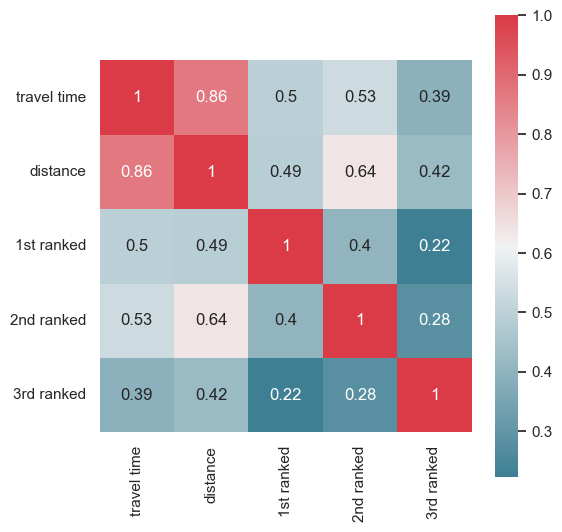

In [93]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df4.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [94]:
x = np.array(df4[['distance','1st ranked','2nd ranked','3rd ranked']])
y = np.array(df4['travel time'])
x

array([[0.2888266 , 0.13437445, 0.        , 1.        ],
       [0.29197865, 0.13437445, 0.5627479 , 0.34238192],
       [0.29124572, 0.13437445, 0.5627479 , 0.34238192],
       ...,
       [0.59842351, 0.13437445, 0.5627479 , 0.62794878],
       [0.60584779, 0.13437445, 0.5627479 , 0.62794878],
       [0.58940728, 0.13437445, 0.5627479 , 0.62794878]])

In [95]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12910, 4)
(3228, 4)


In [97]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_1_1

Epoch 1/500
404/404 [==============================] - 0s 867us/step - loss: 1065978.0000 - mape: 98.8029 - rmse: 1032.4622 - val_loss: 1001857.3750 - val_mape: 96.3603 - val_rmse: 1000.9283
Epoch 2/500
404/404 [==============================] - 0s 724us/step - loss: 956879.2500 - mape: 91.5928 - rmse: 978.2020 - val_loss: 849403.3750 - val_mape: 85.6129 - val_rmse: 921.6308
Epoch 3/500
404/404 [==============================] - 0s 716us/step - loss: 766512.3125 - mape: 77.8745 - rmse: 875.5069 - val_loss: 642171.5625 - val_mape: 69.2240 - val_rmse: 801.3561
Epoch 4/500
404/404 [==============================] - 0s 726us/step - loss: 552632.3125 - mape: 60.2193 - rmse: 743.3925 - val_loss: 442254.1562 - val_mape: 50.7272 - val_rmse: 665.0219
Epoch 5/500
404/404 [==============================] - 0s 720us/step - loss: 367101.5000 - mape: 43.4950 - rmse: 605.8890 - val_loss: 285956.2500 - val_mape: 37.0479 - val_rmse: 534.7488
Epoch 6/500
404/404 [==============================] - 0s 709

Epoch 45/500
404/404 [==============================] - 0s 704us/step - loss: 68287.5312 - mape: 24.1219 - rmse: 261.3188 - val_loss: 68611.9375 - val_mape: 24.7921 - val_rmse: 261.9388
Epoch 46/500
404/404 [==============================] - 0s 711us/step - loss: 68257.0156 - mape: 24.2432 - rmse: 261.2604 - val_loss: 68557.3438 - val_mape: 24.6413 - val_rmse: 261.8346
Epoch 47/500
404/404 [==============================] - 0s 736us/step - loss: 68234.3984 - mape: 24.1222 - rmse: 261.2172 - val_loss: 68554.8281 - val_mape: 24.7622 - val_rmse: 261.8298
Epoch 48/500
404/404 [==============================] - 0s 695us/step - loss: 68234.2656 - mape: 24.1872 - rmse: 261.2169 - val_loss: 68499.5312 - val_mape: 24.3258 - val_rmse: 261.7242
Epoch 49/500
404/404 [==============================] - 0s 724us/step - loss: 68223.1094 - mape: 24.1118 - rmse: 261.1955 - val_loss: 68488.5781 - val_mape: 24.4057 - val_rmse: 261.7032
Epoch 50/500
404/404 [==============================] - 0s 685us/step 

404/404 [==============================] - 0s 720us/step - loss: 68187.7188 - mape: 23.9084 - rmse: 261.1278 - val_loss: 68440.6562 - val_mape: 24.5157 - val_rmse: 261.6117
Epoch 90/500
404/404 [==============================] - 0s 722us/step - loss: 68184.8828 - mape: 24.0253 - rmse: 261.1223 - val_loss: 68412.3594 - val_mape: 23.9654 - val_rmse: 261.5576
Epoch 91/500
404/404 [==============================] - 0s 711us/step - loss: 68183.0391 - mape: 23.9077 - rmse: 261.1188 - val_loss: 68412.3828 - val_mape: 24.2760 - val_rmse: 261.5576
Epoch 92/500
404/404 [==============================] - 0s 693us/step - loss: 68191.7656 - mape: 23.8977 - rmse: 261.1355 - val_loss: 68417.5156 - val_mape: 24.3910 - val_rmse: 261.5674
Epoch 93/500
404/404 [==============================] - 0s 732us/step - loss: 68185.5703 - mape: 23.9230 - rmse: 261.1237 - val_loss: 68458.4453 - val_mape: 24.6586 - val_rmse: 261.6457
Epoch 94/500
404/404 [==============================] - 0s 705us/step - loss: 68191

Epoch 133/500
404/404 [==============================] - 0s 717us/step - loss: 68181.9531 - mape: 24.0698 - rmse: 261.1167 - val_loss: 68403.8594 - val_mape: 24.1484 - val_rmse: 261.5413
Epoch 134/500
404/404 [==============================] - 0s 712us/step - loss: 68178.4688 - mape: 23.9472 - rmse: 261.1101 - val_loss: 68403.9297 - val_mape: 24.0463 - val_rmse: 261.5414
Epoch 135/500
404/404 [==============================] - 0s 697us/step - loss: 68172.1562 - mape: 23.8744 - rmse: 261.0980 - val_loss: 68415.6797 - val_mape: 24.4285 - val_rmse: 261.5639
Epoch 136/500
404/404 [==============================] - 0s 701us/step - loss: 68194.5234 - mape: 23.9662 - rmse: 261.1408 - val_loss: 68409.7500 - val_mape: 24.3057 - val_rmse: 261.5526
Epoch 137/500
404/404 [==============================] - 0s 714us/step - loss: 68185.1562 - mape: 23.9536 - rmse: 261.1229 - val_loss: 68422.7188 - val_mape: 24.4713 - val_rmse: 261.5774
Epoch 138/500
404/404 [==============================] - 0s 721us

Epoch 177/500
404/404 [==============================] - 0s 719us/step - loss: 68185.8906 - mape: 24.0083 - rmse: 261.1243 - val_loss: 68403.1953 - val_mape: 24.1815 - val_rmse: 261.5400
Epoch 178/500
404/404 [==============================] - 0s 720us/step - loss: 68190.1250 - mape: 23.9432 - rmse: 261.1324 - val_loss: 68420.8906 - val_mape: 24.3684 - val_rmse: 261.5739
Epoch 179/500
404/404 [==============================] - 0s 712us/step - loss: 68184.5234 - mape: 24.0060 - rmse: 261.1217 - val_loss: 68412.7969 - val_mape: 24.1033 - val_rmse: 261.5584
Epoch 180/500
404/404 [==============================] - 0s 720us/step - loss: 68185.0859 - mape: 23.8386 - rmse: 261.1227 - val_loss: 68467.0078 - val_mape: 24.6366 - val_rmse: 261.6620
Epoch 181/500
404/404 [==============================] - 0s 720us/step - loss: 68195.9141 - mape: 23.9575 - rmse: 261.1435 - val_loss: 68435.2422 - val_mape: 24.4904 - val_rmse: 261.6013
Epoch 182/500
404/404 [==============================] - 0s 719us

Epoch 221/500
404/404 [==============================] - 0s 697us/step - loss: 68180.9609 - mape: 23.9428 - rmse: 261.1148 - val_loss: 68417.9219 - val_mape: 23.8771 - val_rmse: 261.5682
Epoch 222/500
404/404 [==============================] - 0s 718us/step - loss: 68192.7656 - mape: 23.9164 - rmse: 261.1375 - val_loss: 68401.7344 - val_mape: 24.0962 - val_rmse: 261.5373
Epoch 223/500
404/404 [==============================] - 0s 711us/step - loss: 68178.2812 - mape: 23.8420 - rmse: 261.1097 - val_loss: 68470.2812 - val_mape: 24.6925 - val_rmse: 261.6683
Epoch 224/500
404/404 [==============================] - 0s 722us/step - loss: 68190.8750 - mape: 23.9969 - rmse: 261.1338 - val_loss: 68412.9453 - val_mape: 24.3329 - val_rmse: 261.5587
Epoch 225/500
404/404 [==============================] - 0s 706us/step - loss: 68184.0234 - mape: 23.9459 - rmse: 261.1207 - val_loss: 68424.7500 - val_mape: 24.4259 - val_rmse: 261.5812
Epoch 226/500
404/404 [==============================] - 0s 721us

Epoch 265/500
404/404 [==============================] - 0s 732us/step - loss: 68196.0938 - mape: 23.9736 - rmse: 261.1438 - val_loss: 68415.9297 - val_mape: 24.3805 - val_rmse: 261.5644
Epoch 266/500
404/404 [==============================] - 0s 724us/step - loss: 68186.2109 - mape: 23.9389 - rmse: 261.1249 - val_loss: 68411.3750 - val_mape: 24.3533 - val_rmse: 261.5557
Epoch 267/500
404/404 [==============================] - 0s 720us/step - loss: 68188.2422 - mape: 23.9286 - rmse: 261.1288 - val_loss: 68445.2422 - val_mape: 24.5874 - val_rmse: 261.6204
Epoch 268/500
404/404 [==============================] - 0s 723us/step - loss: 68186.9766 - mape: 24.0332 - rmse: 261.1264 - val_loss: 68406.8281 - val_mape: 24.2399 - val_rmse: 261.5470
Epoch 269/500
404/404 [==============================] - 0s 726us/step - loss: 68181.8125 - mape: 23.9377 - rmse: 261.1165 - val_loss: 68408.9219 - val_mape: 24.2879 - val_rmse: 261.5510
Epoch 270/500
404/404 [==============================] - 0s 713us

Epoch 309/500
404/404 [==============================] - 0s 695us/step - loss: 68187.7734 - mape: 23.9409 - rmse: 261.1279 - val_loss: 68461.9609 - val_mape: 24.6756 - val_rmse: 261.6524
Epoch 310/500
404/404 [==============================] - 0s 695us/step - loss: 68195.6250 - mape: 24.0153 - rmse: 261.1429 - val_loss: 68410.6797 - val_mape: 24.3441 - val_rmse: 261.5544
Epoch 311/500
404/404 [==============================] - 0s 718us/step - loss: 68190.1328 - mape: 23.9981 - rmse: 261.1324 - val_loss: 68405.6797 - val_mape: 24.2672 - val_rmse: 261.5448
Epoch 312/500
404/404 [==============================] - 0s 748us/step - loss: 68173.3438 - mape: 24.0158 - rmse: 261.1003 - val_loss: 68413.4688 - val_mape: 23.9333 - val_rmse: 261.5597
Epoch 313/500
404/404 [==============================] - 0s 678us/step - loss: 68192.8594 - mape: 23.9011 - rmse: 261.1376 - val_loss: 68405.6250 - val_mape: 24.2624 - val_rmse: 261.5447
Epoch 314/500
404/404 [==============================] - 0s 737us

Epoch 353/500
404/404 [==============================] - 0s 713us/step - loss: 68186.1094 - mape: 23.8761 - rmse: 261.1247 - val_loss: 68404.4688 - val_mape: 24.1592 - val_rmse: 261.5425
Epoch 354/500
404/404 [==============================] - 0s 707us/step - loss: 68180.1641 - mape: 24.0189 - rmse: 261.1133 - val_loss: 68410.9531 - val_mape: 23.9887 - val_rmse: 261.5549
Epoch 355/500
404/404 [==============================] - 0s 692us/step - loss: 68200.0312 - mape: 23.8640 - rmse: 261.1514 - val_loss: 68449.1875 - val_mape: 24.6144 - val_rmse: 261.6280
Epoch 356/500
404/404 [==============================] - 0s 684us/step - loss: 68195.1562 - mape: 24.0379 - rmse: 261.1420 - val_loss: 68407.2656 - val_mape: 24.3018 - val_rmse: 261.5478
Epoch 357/500
404/404 [==============================] - 0s 701us/step - loss: 68190.4609 - mape: 23.9383 - rmse: 261.1330 - val_loss: 68427.1094 - val_mape: 24.4268 - val_rmse: 261.5858
Epoch 358/500
404/404 [==============================] - 0s 675us

Epoch 397/500
404/404 [==============================] - 0s 709us/step - loss: 68185.7344 - mape: 23.9158 - rmse: 261.1240 - val_loss: 68434.2500 - val_mape: 24.5212 - val_rmse: 261.5994
Epoch 398/500
404/404 [==============================] - 0s 702us/step - loss: 68190.1094 - mape: 23.9754 - rmse: 261.1324 - val_loss: 68422.1328 - val_mape: 24.4043 - val_rmse: 261.5762
Epoch 399/500
404/404 [==============================] - 0s 690us/step - loss: 68182.1016 - mape: 23.9432 - rmse: 261.1170 - val_loss: 68457.3516 - val_mape: 24.5977 - val_rmse: 261.6436
Epoch 400/500
404/404 [==============================] - 0s 705us/step - loss: 68189.8828 - mape: 24.0557 - rmse: 261.1319 - val_loss: 68412.9844 - val_mape: 24.0270 - val_rmse: 261.5587
Epoch 401/500
404/404 [==============================] - 0s 738us/step - loss: 68190.3750 - mape: 23.8940 - rmse: 261.1329 - val_loss: 68410.5625 - val_mape: 23.9962 - val_rmse: 261.5541
Epoch 402/500
404/404 [==============================] - 0s 691us

Epoch 441/500
404/404 [==============================] - 0s 702us/step - loss: 68196.1953 - mape: 24.0401 - rmse: 261.1440 - val_loss: 68438.2969 - val_mape: 24.5165 - val_rmse: 261.6071
Epoch 442/500
404/404 [==============================] - 0s 691us/step - loss: 68196.2656 - mape: 23.9278 - rmse: 261.1441 - val_loss: 68416.9922 - val_mape: 24.3532 - val_rmse: 261.5664
Epoch 443/500
404/404 [==============================] - 0s 697us/step - loss: 68174.7188 - mape: 23.9193 - rmse: 261.1029 - val_loss: 68486.5703 - val_mape: 24.7579 - val_rmse: 261.6994
Epoch 444/500
404/404 [==============================] - 0s 729us/step - loss: 68190.3516 - mape: 24.0401 - rmse: 261.1328 - val_loss: 68420.6953 - val_mape: 24.3917 - val_rmse: 261.5735
Epoch 445/500
404/404 [==============================] - 0s 686us/step - loss: 68186.4688 - mape: 23.9796 - rmse: 261.1254 - val_loss: 68410.7422 - val_mape: 24.0404 - val_rmse: 261.5545
Epoch 446/500
404/404 [==============================] - 0s 724us

Epoch 485/500
404/404 [==============================] - 0s 707us/step - loss: 68193.4453 - mape: 23.9556 - rmse: 261.1387 - val_loss: 68414.9141 - val_mape: 24.2274 - val_rmse: 261.5624
Epoch 486/500
404/404 [==============================] - 0s 725us/step - loss: 68186.1797 - mape: 23.9710 - rmse: 261.1248 - val_loss: 68417.9609 - val_mape: 23.9445 - val_rmse: 261.5683
Epoch 487/500
404/404 [==============================] - 0s 707us/step - loss: 68182.6484 - mape: 23.8317 - rmse: 261.1181 - val_loss: 68468.2422 - val_mape: 24.6639 - val_rmse: 261.6644
Epoch 488/500
404/404 [==============================] - 0s 702us/step - loss: 68193.3672 - mape: 23.9750 - rmse: 261.1386 - val_loss: 68440.7031 - val_mape: 24.5203 - val_rmse: 261.6118
Epoch 489/500
404/404 [==============================] - 0s 692us/step - loss: 68183.3672 - mape: 23.9449 - rmse: 261.1194 - val_loss: 68445.3906 - val_mape: 24.5385 - val_rmse: 261.6207
Epoch 490/500
404/404 [==============================] - 0s 688us

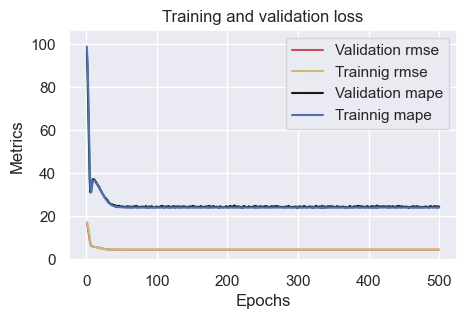

In [98]:
plotme(model4_1_1)

In [99]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_1_2

Epoch 1/500
404/404 [==============================] - 1s 880us/step - loss: 1051939.3750 - mape: 97.8778 - rmse: 1025.6410 - val_loss: 960321.1875 - val_mape: 93.5193 - val_rmse: 979.9598
Epoch 2/500
404/404 [==============================] - 0s 757us/step - loss: 862640.1875 - mape: 84.8913 - rmse: 928.7842 - val_loss: 703955.5000 - val_mape: 74.3770 - val_rmse: 839.0206
Epoch 3/500
404/404 [==============================] - 0s 767us/step - loss: 574967.1875 - mape: 62.1376 - rmse: 758.2659 - val_loss: 426491.6875 - val_mape: 49.2111 - val_rmse: 653.0633
Epoch 4/500
404/404 [==============================] - 0s 783us/step - loss: 327839.5000 - mape: 40.5214 - rmse: 572.5727 - val_loss: 235492.9219 - val_mape: 33.5205 - val_rmse: 485.2761
Epoch 5/500
404/404 [==============================] - 0s 765us/step - loss: 186591.6719 - mape: 31.4477 - rmse: 431.9626 - val_loss: 150569.2969 - val_mape: 31.0755 - val_rmse: 388.0326
Epoch 6/500
404/404 [==============================] - 0s 762us

Epoch 45/500
404/404 [==============================] - 0s 752us/step - loss: 68101.1328 - mape: 23.9985 - rmse: 260.9619 - val_loss: 68322.7031 - val_mape: 24.0141 - val_rmse: 261.3861
Epoch 46/500
404/404 [==============================] - 0s 760us/step - loss: 68086.4531 - mape: 23.8557 - rmse: 260.9338 - val_loss: 68365.5000 - val_mape: 24.5866 - val_rmse: 261.4680
Epoch 47/500
404/404 [==============================] - 0s 751us/step - loss: 68092.4688 - mape: 23.9407 - rmse: 260.9453 - val_loss: 68331.2969 - val_mape: 24.4282 - val_rmse: 261.4026
Epoch 48/500
404/404 [==============================] - 0s 750us/step - loss: 68095.7578 - mape: 23.8531 - rmse: 260.9516 - val_loss: 68318.7344 - val_mape: 24.4113 - val_rmse: 261.3785
Epoch 49/500
404/404 [==============================] - 0s 764us/step - loss: 68068.0469 - mape: 23.9483 - rmse: 260.8985 - val_loss: 68297.8125 - val_mape: 24.2011 - val_rmse: 261.3385
Epoch 50/500
404/404 [==============================] - 0s 766us/step 

404/404 [==============================] - 0s 745us/step - loss: 67531.4766 - mape: 23.5291 - rmse: 259.8682 - val_loss: 67898.6406 - val_mape: 24.2590 - val_rmse: 260.5737
Epoch 90/500
404/404 [==============================] - 0s 792us/step - loss: 67529.8438 - mape: 23.6187 - rmse: 259.8651 - val_loss: 67842.8828 - val_mape: 23.7024 - val_rmse: 260.4667
Epoch 91/500
404/404 [==============================] - 0s 739us/step - loss: 67507.5000 - mape: 23.5302 - rmse: 259.8221 - val_loss: 67848.8203 - val_mape: 24.1148 - val_rmse: 260.4781
Epoch 92/500
404/404 [==============================] - 0s 732us/step - loss: 67489.7812 - mape: 23.6351 - rmse: 259.7880 - val_loss: 67818.9375 - val_mape: 23.6174 - val_rmse: 260.4207
Epoch 93/500
404/404 [==============================] - 0s 731us/step - loss: 67493.7500 - mape: 23.5200 - rmse: 259.7956 - val_loss: 67806.0156 - val_mape: 23.7354 - val_rmse: 260.3959
Epoch 94/500
404/404 [==============================] - 0s 773us/step - loss: 67473

Epoch 133/500
404/404 [==============================] - 0s 777us/step - loss: 67015.7109 - mape: 23.3272 - rmse: 258.8739 - val_loss: 67520.2109 - val_mape: 24.0447 - val_rmse: 259.8465
Epoch 134/500
404/404 [==============================] - 0s 724us/step - loss: 67030.5000 - mape: 23.3283 - rmse: 258.9025 - val_loss: 67464.3281 - val_mape: 23.5303 - val_rmse: 259.7390
Epoch 135/500
404/404 [==============================] - 0s 732us/step - loss: 67020.7656 - mape: 23.2501 - rmse: 258.8837 - val_loss: 67474.6797 - val_mape: 23.6584 - val_rmse: 259.7589
Epoch 136/500
404/404 [==============================] - 0s 784us/step - loss: 67017.0312 - mape: 23.2373 - rmse: 258.8765 - val_loss: 67488.3984 - val_mape: 23.8330 - val_rmse: 259.7853
Epoch 137/500
404/404 [==============================] - 0s 745us/step - loss: 67006.7578 - mape: 23.2867 - rmse: 258.8566 - val_loss: 67457.1250 - val_mape: 23.6325 - val_rmse: 259.7251
Epoch 138/500
404/404 [==============================] - 0s 754us

Epoch 177/500
404/404 [==============================] - 0s 719us/step - loss: 66755.3828 - mape: 23.0225 - rmse: 258.3706 - val_loss: 67438.7031 - val_mape: 24.0468 - val_rmse: 259.6896
Epoch 178/500
404/404 [==============================] - 0s 756us/step - loss: 66777.9062 - mape: 23.1247 - rmse: 258.4142 - val_loss: 67316.1016 - val_mape: 23.4875 - val_rmse: 259.4535
Epoch 179/500
404/404 [==============================] - 0s 719us/step - loss: 66762.9531 - mape: 23.1077 - rmse: 258.3853 - val_loss: 67333.7969 - val_mape: 23.6765 - val_rmse: 259.4876
Epoch 180/500
404/404 [==============================] - 0s 748us/step - loss: 66773.5234 - mape: 23.0810 - rmse: 258.4057 - val_loss: 67321.4375 - val_mape: 23.5978 - val_rmse: 259.4637
Epoch 181/500
404/404 [==============================] - 0s 747us/step - loss: 66763.0234 - mape: 23.1570 - rmse: 258.3854 - val_loss: 67302.5000 - val_mape: 23.1763 - val_rmse: 259.4272
Epoch 182/500
404/404 [==============================] - 0s 748us

Epoch 221/500
404/404 [==============================] - 0s 766us/step - loss: 66683.8828 - mape: 23.0614 - rmse: 258.2322 - val_loss: 67264.9375 - val_mape: 23.3745 - val_rmse: 259.3549
Epoch 222/500
404/404 [==============================] - 0s 736us/step - loss: 66670.0469 - mape: 22.9430 - rmse: 258.2054 - val_loss: 67280.7891 - val_mape: 23.5849 - val_rmse: 259.3854
Epoch 223/500
404/404 [==============================] - 0s 746us/step - loss: 66659.5000 - mape: 23.0924 - rmse: 258.1850 - val_loss: 67253.9297 - val_mape: 23.0178 - val_rmse: 259.3336
Epoch 224/500
404/404 [==============================] - 0s 764us/step - loss: 66665.2734 - mape: 22.8439 - rmse: 258.1962 - val_loss: 67333.6719 - val_mape: 23.9447 - val_rmse: 259.4873
Epoch 225/500
404/404 [==============================] - 0s 762us/step - loss: 66673.3750 - mape: 23.0937 - rmse: 258.2119 - val_loss: 67242.0391 - val_mape: 23.2068 - val_rmse: 259.3107
Epoch 226/500
404/404 [==============================] - 0s 741us

Epoch 265/500
404/404 [==============================] - 0s 749us/step - loss: 66627.4141 - mape: 22.9997 - rmse: 258.1229 - val_loss: 67208.4297 - val_mape: 23.0616 - val_rmse: 259.2459
Epoch 266/500
404/404 [==============================] - 0s 782us/step - loss: 66628.1953 - mape: 22.8827 - rmse: 258.1244 - val_loss: 67251.1719 - val_mape: 23.5457 - val_rmse: 259.3283
Epoch 267/500
404/404 [==============================] - 0s 776us/step - loss: 66610.8203 - mape: 22.9556 - rmse: 258.0907 - val_loss: 67203.0000 - val_mape: 23.0155 - val_rmse: 259.2354
Epoch 268/500
404/404 [==============================] - 0s 777us/step - loss: 66622.8438 - mape: 22.8100 - rmse: 258.1140 - val_loss: 67223.4766 - val_mape: 23.5160 - val_rmse: 259.2749
Epoch 269/500
404/404 [==============================] - 0s 748us/step - loss: 66600.3438 - mape: 22.9928 - rmse: 258.0704 - val_loss: 67194.4844 - val_mape: 23.2843 - val_rmse: 259.2190
Epoch 270/500
404/404 [==============================] - 0s 789us

Epoch 309/500
404/404 [==============================] - 0s 773us/step - loss: 66561.9688 - mape: 22.7915 - rmse: 257.9961 - val_loss: 67201.0156 - val_mape: 23.5986 - val_rmse: 259.2316
Epoch 310/500
404/404 [==============================] - 0s 757us/step - loss: 66558.2500 - mape: 22.9087 - rmse: 257.9889 - val_loss: 67147.2734 - val_mape: 22.9879 - val_rmse: 259.1279
Epoch 311/500
404/404 [==============================] - 0s 780us/step - loss: 66564.4531 - mape: 22.8700 - rmse: 258.0009 - val_loss: 67164.8047 - val_mape: 23.4678 - val_rmse: 259.1617
Epoch 312/500
404/404 [==============================] - 0s 733us/step - loss: 66561.9609 - mape: 22.9562 - rmse: 257.9961 - val_loss: 67143.0469 - val_mape: 23.1745 - val_rmse: 259.1198
Epoch 313/500
404/404 [==============================] - 0s 758us/step - loss: 66565.8438 - mape: 22.9021 - rmse: 258.0036 - val_loss: 67208.3203 - val_mape: 23.6140 - val_rmse: 259.2457
Epoch 314/500
404/404 [==============================] - 0s 758us

Epoch 353/500
404/404 [==============================] - 0s 742us/step - loss: 66526.5547 - mape: 22.8181 - rmse: 257.9274 - val_loss: 67078.2500 - val_mape: 23.0493 - val_rmse: 258.9947
Epoch 354/500
404/404 [==============================] - 0s 755us/step - loss: 66513.4297 - mape: 22.9189 - rmse: 257.9020 - val_loss: 67092.4688 - val_mape: 22.9244 - val_rmse: 259.0221
Epoch 355/500
404/404 [==============================] - 0s 739us/step - loss: 66508.2031 - mape: 22.8721 - rmse: 257.8918 - val_loss: 67105.7422 - val_mape: 23.3317 - val_rmse: 259.0478
Epoch 356/500
404/404 [==============================] - 0s 741us/step - loss: 66521.5547 - mape: 22.8060 - rmse: 257.9177 - val_loss: 67091.6562 - val_mape: 23.2254 - val_rmse: 259.0206
Epoch 357/500
404/404 [==============================] - 0s 789us/step - loss: 66519.1953 - mape: 22.8301 - rmse: 257.9131 - val_loss: 67086.7578 - val_mape: 23.1022 - val_rmse: 259.0111
Epoch 358/500
404/404 [==============================] - 0s 749us

Epoch 397/500
404/404 [==============================] - 0s 730us/step - loss: 66495.0234 - mape: 22.7339 - rmse: 257.8663 - val_loss: 67057.4453 - val_mape: 23.2854 - val_rmse: 258.9545
Epoch 398/500
404/404 [==============================] - 0s 725us/step - loss: 66485.3359 - mape: 22.8888 - rmse: 257.8475 - val_loss: 67057.4297 - val_mape: 23.1963 - val_rmse: 258.9545
Epoch 399/500
404/404 [==============================] - 0s 744us/step - loss: 66487.3281 - mape: 22.8392 - rmse: 257.8514 - val_loss: 67070.2500 - val_mape: 23.3897 - val_rmse: 258.9792
Epoch 400/500
404/404 [==============================] - 0s 720us/step - loss: 66475.2500 - mape: 22.7356 - rmse: 257.8279 - val_loss: 67115.8672 - val_mape: 23.6011 - val_rmse: 259.0673
Epoch 401/500
404/404 [==============================] - 0s 755us/step - loss: 66489.3672 - mape: 22.9132 - rmse: 257.8553 - val_loss: 67077.0781 - val_mape: 22.6532 - val_rmse: 258.9924
Epoch 402/500
404/404 [==============================] - 0s 738us

Epoch 441/500
404/404 [==============================] - 0s 778us/step - loss: 66453.3672 - mape: 22.9233 - rmse: 257.7855 - val_loss: 67014.6953 - val_mape: 22.9619 - val_rmse: 258.8720
Epoch 442/500
404/404 [==============================] - 0s 722us/step - loss: 66458.7734 - mape: 22.7110 - rmse: 257.7960 - val_loss: 67025.2344 - val_mape: 23.2538 - val_rmse: 258.8923
Epoch 443/500
404/404 [==============================] - 0s 779us/step - loss: 66456.8438 - mape: 22.8000 - rmse: 257.7922 - val_loss: 67026.5625 - val_mape: 23.2408 - val_rmse: 258.8949
Epoch 444/500
404/404 [==============================] - 0s 754us/step - loss: 66450.0391 - mape: 22.7809 - rmse: 257.7791 - val_loss: 67079.2422 - val_mape: 23.5775 - val_rmse: 258.9966
Epoch 445/500
404/404 [==============================] - 0s 752us/step - loss: 66449.9688 - mape: 22.8210 - rmse: 257.7789 - val_loss: 67012.0391 - val_mape: 22.8336 - val_rmse: 258.8668
Epoch 446/500
404/404 [==============================] - 0s 784us

Epoch 485/500
404/404 [==============================] - 0s 716us/step - loss: 66415.0312 - mape: 22.8939 - rmse: 257.7112 - val_loss: 66971.1641 - val_mape: 22.8475 - val_rmse: 258.7879
Epoch 486/500
404/404 [==============================] - 0s 703us/step - loss: 66428.5703 - mape: 22.6976 - rmse: 257.7374 - val_loss: 66997.3203 - val_mape: 23.4421 - val_rmse: 258.8384
Epoch 487/500
404/404 [==============================] - 0s 695us/step - loss: 66427.4453 - mape: 22.7581 - rmse: 257.7352 - val_loss: 67005.0234 - val_mape: 23.4330 - val_rmse: 258.8533
Epoch 488/500
404/404 [==============================] - 0s 756us/step - loss: 66430.1016 - mape: 22.8270 - rmse: 257.7404 - val_loss: 66981.4609 - val_mape: 23.0534 - val_rmse: 258.8078
Epoch 489/500
404/404 [==============================] - 0s 767us/step - loss: 66411.5859 - mape: 22.6685 - rmse: 257.7045 - val_loss: 66987.9297 - val_mape: 23.2950 - val_rmse: 258.8203
Epoch 490/500
404/404 [==============================] - 0s 732us

In [100]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_1_3

Epoch 1/500
404/404 [==============================] - 1s 883us/step - loss: 1018183.8750 - mape: 95.6047 - rmse: 1009.0510 - val_loss: 860819.3750 - val_mape: 86.3884 - val_rmse: 927.8035
Epoch 2/500
404/404 [==============================] - 0s 763us/step - loss: 674624.3750 - mape: 70.0752 - rmse: 821.3552 - val_loss: 453101.3125 - val_mape: 51.6871 - val_rmse: 673.1280
Epoch 3/500
404/404 [==============================] - 0s 758us/step - loss: 307472.0312 - mape: 39.1220 - rmse: 554.5016 - val_loss: 192063.5469 - val_mape: 31.2147 - val_rmse: 438.2505
Epoch 4/500
404/404 [==============================] - 0s 745us/step - loss: 150344.8281 - mape: 31.8599 - rmse: 387.7433 - val_loss: 129821.1641 - val_mape: 34.3533 - val_rmse: 360.3070
Epoch 5/500
404/404 [==============================] - 0s 727us/step - loss: 123485.9531 - mape: 35.7331 - rmse: 351.4057 - val_loss: 122796.7500 - val_mape: 37.3753 - val_rmse: 350.4237
Epoch 6/500
404/404 [==============================] - 0s 764us

Epoch 45/500
404/404 [==============================] - 0s 759us/step - loss: 67470.2344 - mape: 23.7426 - rmse: 259.7503 - val_loss: 67843.4766 - val_mape: 23.9238 - val_rmse: 260.4678
Epoch 46/500
404/404 [==============================] - 0s 765us/step - loss: 67458.3125 - mape: 23.5507 - rmse: 259.7274 - val_loss: 67904.2578 - val_mape: 24.4116 - val_rmse: 260.5844
Epoch 47/500
404/404 [==============================] - 0s 762us/step - loss: 67414.3359 - mape: 23.6897 - rmse: 259.6427 - val_loss: 67870.0156 - val_mape: 24.2526 - val_rmse: 260.5187
Epoch 48/500
404/404 [==============================] - 0s 768us/step - loss: 67388.5312 - mape: 23.4821 - rmse: 259.5930 - val_loss: 67896.3750 - val_mape: 24.5708 - val_rmse: 260.5693
Epoch 49/500
404/404 [==============================] - 0s 728us/step - loss: 67396.3203 - mape: 23.6530 - rmse: 259.6080 - val_loss: 67818.8359 - val_mape: 24.2207 - val_rmse: 260.4205
Epoch 50/500
404/404 [==============================] - 0s 763us/step 

404/404 [==============================] - 0s 732us/step - loss: 66706.3828 - mape: 23.3965 - rmse: 258.2758 - val_loss: 67454.7500 - val_mape: 23.4970 - val_rmse: 259.7205
Epoch 90/500
404/404 [==============================] - 0s 754us/step - loss: 66699.2656 - mape: 23.2978 - rmse: 258.2620 - val_loss: 67459.6094 - val_mape: 23.2430 - val_rmse: 259.7299
Epoch 91/500
404/404 [==============================] - 0s 743us/step - loss: 66715.7500 - mape: 23.2707 - rmse: 258.2939 - val_loss: 67444.7500 - val_mape: 23.7299 - val_rmse: 259.7013
Epoch 92/500
404/404 [==============================] - 0s 712us/step - loss: 66697.5703 - mape: 23.2872 - rmse: 258.2587 - val_loss: 67453.5859 - val_mape: 23.1867 - val_rmse: 259.7183
Epoch 93/500
404/404 [==============================] - 0s 785us/step - loss: 66683.2891 - mape: 23.1806 - rmse: 258.2311 - val_loss: 67510.1172 - val_mape: 24.1479 - val_rmse: 259.8271
Epoch 94/500
404/404 [==============================] - 0s 717us/step - loss: 66662

Epoch 133/500
404/404 [==============================] - 0s 719us/step - loss: 66360.9688 - mape: 23.1349 - rmse: 257.6062 - val_loss: 67285.4844 - val_mape: 23.8219 - val_rmse: 259.3945
Epoch 134/500
404/404 [==============================] - 0s 752us/step - loss: 66378.0547 - mape: 23.1891 - rmse: 257.6394 - val_loss: 67248.2266 - val_mape: 23.3576 - val_rmse: 259.3226
Epoch 135/500
404/404 [==============================] - 0s 738us/step - loss: 66360.6719 - mape: 23.1024 - rmse: 257.6057 - val_loss: 67286.7422 - val_mape: 23.7743 - val_rmse: 259.3969
Epoch 136/500
404/404 [==============================] - 0s 740us/step - loss: 66321.7969 - mape: 23.0090 - rmse: 257.5302 - val_loss: 67414.5234 - val_mape: 24.3499 - val_rmse: 259.6431
Epoch 137/500
404/404 [==============================] - 0s 739us/step - loss: 66365.5625 - mape: 23.2489 - rmse: 257.6151 - val_loss: 67259.7812 - val_mape: 23.1440 - val_rmse: 259.3449
Epoch 138/500
404/404 [==============================] - 0s 766us

Epoch 177/500
404/404 [==============================] - 0s 774us/step - loss: 66190.8672 - mape: 23.0227 - rmse: 257.2758 - val_loss: 67140.8281 - val_mape: 23.6533 - val_rmse: 259.1155
Epoch 178/500
404/404 [==============================] - 0s 740us/step - loss: 66187.3984 - mape: 23.1029 - rmse: 257.2691 - val_loss: 67132.8906 - val_mape: 23.4194 - val_rmse: 259.1002
Epoch 179/500
404/404 [==============================] - 0s 727us/step - loss: 66173.3359 - mape: 23.1173 - rmse: 257.2418 - val_loss: 67125.2031 - val_mape: 23.2804 - val_rmse: 259.0853
Epoch 180/500
404/404 [==============================] - 0s 758us/step - loss: 66189.6406 - mape: 23.0758 - rmse: 257.2735 - val_loss: 67132.1562 - val_mape: 23.5369 - val_rmse: 259.0987
Epoch 181/500
404/404 [==============================] - 0s 735us/step - loss: 66186.7656 - mape: 23.0305 - rmse: 257.2679 - val_loss: 67123.5078 - val_mape: 23.5298 - val_rmse: 259.0821
Epoch 182/500
404/404 [==============================] - 0s 725us

Epoch 221/500
404/404 [==============================] - 0s 727us/step - loss: 66079.0156 - mape: 22.9639 - rmse: 257.0584 - val_loss: 67071.5547 - val_mape: 23.2016 - val_rmse: 258.9818
Epoch 222/500
404/404 [==============================] - 0s 742us/step - loss: 66100.1406 - mape: 23.1406 - rmse: 257.0995 - val_loss: 67080.5312 - val_mape: 23.1999 - val_rmse: 258.9991
Epoch 223/500
404/404 [==============================] - 0s 725us/step - loss: 66057.4219 - mape: 22.9661 - rmse: 257.0164 - val_loss: 67113.0078 - val_mape: 22.8201 - val_rmse: 259.0618
Epoch 224/500
404/404 [==============================] - 0s 725us/step - loss: 66062.0312 - mape: 23.0003 - rmse: 257.0254 - val_loss: 67059.6562 - val_mape: 23.1990 - val_rmse: 258.9588
Epoch 225/500
404/404 [==============================] - 0s 754us/step - loss: 66056.3203 - mape: 23.0024 - rmse: 257.0143 - val_loss: 67065.1719 - val_mape: 23.4528 - val_rmse: 258.9695
Epoch 226/500
404/404 [==============================] - 0s 713us

Epoch 265/500
404/404 [==============================] - 0s 730us/step - loss: 65984.9922 - mape: 22.9459 - rmse: 256.8754 - val_loss: 66994.0781 - val_mape: 23.2679 - val_rmse: 258.8322
Epoch 266/500
404/404 [==============================] - 0s 747us/step - loss: 65971.2734 - mape: 22.9585 - rmse: 256.8487 - val_loss: 67020.8125 - val_mape: 23.6914 - val_rmse: 258.8838
Epoch 267/500
404/404 [==============================] - 0s 727us/step - loss: 65982.2344 - mape: 22.9883 - rmse: 256.8701 - val_loss: 67015.3594 - val_mape: 23.5745 - val_rmse: 258.8733
Epoch 268/500
404/404 [==============================] - 0s 766us/step - loss: 65969.1094 - mape: 23.0034 - rmse: 256.8445 - val_loss: 66987.5078 - val_mape: 23.4467 - val_rmse: 258.8195
Epoch 269/500
404/404 [==============================] - 0s 729us/step - loss: 65964.2891 - mape: 22.8794 - rmse: 256.8351 - val_loss: 66971.9766 - val_mape: 23.4283 - val_rmse: 258.7895
Epoch 270/500
404/404 [==============================] - 0s 734us

Epoch 309/500
404/404 [==============================] - 0s 754us/step - loss: 65883.4219 - mape: 22.8109 - rmse: 256.6777 - val_loss: 66895.6406 - val_mape: 23.1588 - val_rmse: 258.6419
Epoch 310/500
404/404 [==============================] - 0s 728us/step - loss: 65876.2266 - mape: 22.8994 - rmse: 256.6636 - val_loss: 66915.3438 - val_mape: 23.6610 - val_rmse: 258.6800
Epoch 311/500
404/404 [==============================] - 0s 751us/step - loss: 65886.9453 - mape: 22.9474 - rmse: 256.6845 - val_loss: 66924.8359 - val_mape: 23.6386 - val_rmse: 258.6984
Epoch 312/500
404/404 [==============================] - 0s 727us/step - loss: 65885.8438 - mape: 22.8964 - rmse: 256.6824 - val_loss: 66936.2109 - val_mape: 23.7190 - val_rmse: 258.7203
Epoch 313/500
404/404 [==============================] - 0s 741us/step - loss: 65868.6641 - mape: 22.9694 - rmse: 256.6489 - val_loss: 66899.4297 - val_mape: 22.9789 - val_rmse: 258.6492
Epoch 314/500
404/404 [==============================] - 0s 765us

Epoch 353/500
404/404 [==============================] - 0s 741us/step - loss: 65817.2266 - mape: 22.9276 - rmse: 256.5487 - val_loss: 66834.1562 - val_mape: 23.5886 - val_rmse: 258.5230
Epoch 354/500
404/404 [==============================] - 0s 725us/step - loss: 65808.8359 - mape: 22.9119 - rmse: 256.5323 - val_loss: 66798.6641 - val_mape: 22.9253 - val_rmse: 258.4544
Epoch 355/500
404/404 [==============================] - 0s 780us/step - loss: 65802.3125 - mape: 22.8527 - rmse: 256.5196 - val_loss: 66792.3047 - val_mape: 22.8630 - val_rmse: 258.4421
Epoch 356/500
404/404 [==============================] - 0s 739us/step - loss: 65796.0000 - mape: 22.8934 - rmse: 256.5073 - val_loss: 66795.0312 - val_mape: 23.2823 - val_rmse: 258.4474
Epoch 357/500
404/404 [==============================] - 0s 743us/step - loss: 65814.5156 - mape: 22.8828 - rmse: 256.5434 - val_loss: 66803.4453 - val_mape: 23.1911 - val_rmse: 258.4636
Epoch 358/500
404/404 [==============================] - 0s 739us

Epoch 397/500
404/404 [==============================] - 0s 741us/step - loss: 65738.4141 - mape: 22.8408 - rmse: 256.3951 - val_loss: 66763.6875 - val_mape: 23.5893 - val_rmse: 258.3867
Epoch 398/500
404/404 [==============================] - 0s 725us/step - loss: 65731.3984 - mape: 22.7530 - rmse: 256.3813 - val_loss: 66690.9375 - val_mape: 23.0807 - val_rmse: 258.2459
Epoch 399/500
404/404 [==============================] - 0s 745us/step - loss: 65739.3906 - mape: 22.8479 - rmse: 256.3969 - val_loss: 66699.6172 - val_mape: 23.0550 - val_rmse: 258.2627
Epoch 400/500
404/404 [==============================] - 0s 744us/step - loss: 65734.8906 - mape: 22.7731 - rmse: 256.3882 - val_loss: 66754.8047 - val_mape: 23.7161 - val_rmse: 258.3695
Epoch 401/500
404/404 [==============================] - 0s 752us/step - loss: 65723.0547 - mape: 22.8408 - rmse: 256.3651 - val_loss: 66717.5391 - val_mape: 23.4453 - val_rmse: 258.2974
Epoch 402/500
404/404 [==============================] - 0s 721us

Epoch 441/500
404/404 [==============================] - 0s 755us/step - loss: 65694.7031 - mape: 22.7572 - rmse: 256.3098 - val_loss: 66654.8828 - val_mape: 23.2801 - val_rmse: 258.1761
Epoch 442/500
404/404 [==============================] - 0s 740us/step - loss: 65682.6562 - mape: 22.7111 - rmse: 256.2863 - val_loss: 66697.6562 - val_mape: 23.6862 - val_rmse: 258.2589
Epoch 443/500
404/404 [==============================] - 0s 762us/step - loss: 65677.4062 - mape: 22.9448 - rmse: 256.2760 - val_loss: 66675.0078 - val_mape: 22.6116 - val_rmse: 258.2150
Epoch 444/500
404/404 [==============================] - 0s 732us/step - loss: 65698.2656 - mape: 22.7597 - rmse: 256.3167 - val_loss: 66639.6016 - val_mape: 23.2192 - val_rmse: 258.1465
Epoch 445/500
404/404 [==============================] - 0s 749us/step - loss: 65693.0000 - mape: 22.8154 - rmse: 256.3065 - val_loss: 66649.3672 - val_mape: 22.6722 - val_rmse: 258.1654
Epoch 446/500
404/404 [==============================] - 0s 757us

Epoch 485/500
404/404 [==============================] - 0s 740us/step - loss: 65645.8047 - mape: 22.7754 - rmse: 256.2144 - val_loss: 66576.6016 - val_mape: 23.0132 - val_rmse: 258.0244
Epoch 486/500
404/404 [==============================] - 0s 766us/step - loss: 65643.5938 - mape: 22.7986 - rmse: 256.2101 - val_loss: 66607.3672 - val_mape: 23.3453 - val_rmse: 258.0840
Epoch 487/500
404/404 [==============================] - 0s 746us/step - loss: 65662.3516 - mape: 22.6406 - rmse: 256.2467 - val_loss: 66640.3203 - val_mape: 23.5840 - val_rmse: 258.1479
Epoch 488/500
404/404 [==============================] - 0s 737us/step - loss: 65645.5547 - mape: 22.8038 - rmse: 256.2139 - val_loss: 66621.3047 - val_mape: 23.5797 - val_rmse: 258.1110
Epoch 489/500
404/404 [==============================] - 0s 714us/step - loss: 65636.6016 - mape: 22.7631 - rmse: 256.1964 - val_loss: 66570.1562 - val_mape: 23.2171 - val_rmse: 258.0119
Epoch 490/500
404/404 [==============================] - 0s 700us

In [101]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_1_4

Epoch 1/500
404/404 [==============================] - 1s 914us/step - loss: 639695.3125 - mape: 67.4859 - rmse: 799.8096 - val_loss: 125236.1250 - val_mape: 37.7079 - val_rmse: 353.8872
Epoch 2/500
404/404 [==============================] - 0s 775us/step - loss: 117539.8516 - mape: 36.9441 - rmse: 342.8409 - val_loss: 113201.8672 - val_mape: 36.4362 - val_rmse: 336.4549
Epoch 3/500
404/404 [==============================] - 0s 775us/step - loss: 104406.9297 - mape: 34.5593 - rmse: 323.1206 - val_loss: 99024.4062 - val_mape: 33.8092 - val_rmse: 314.6814
Epoch 4/500
404/404 [==============================] - 0s 780us/step - loss: 90310.6797 - mape: 31.7438 - rmse: 300.5174 - val_loss: 85165.3750 - val_mape: 31.5221 - val_rmse: 291.8311
Epoch 5/500
404/404 [==============================] - 0s 781us/step - loss: 78345.7891 - mape: 28.7818 - rmse: 279.9032 - val_loss: 75494.4766 - val_mape: 29.5810 - val_rmse: 274.7626
Epoch 6/500
404/404 [==============================] - 0s 758us/step -

404/404 [==============================] - 0s 768us/step - loss: 66399.7734 - mape: 23.0655 - rmse: 257.6815 - val_loss: 67119.3203 - val_mape: 22.8325 - val_rmse: 259.0740
Epoch 46/500
404/404 [==============================] - 0s 782us/step - loss: 66351.4219 - mape: 22.8994 - rmse: 257.5877 - val_loss: 67298.9609 - val_mape: 24.4890 - val_rmse: 259.4204
Epoch 47/500
404/404 [==============================] - 0s 759us/step - loss: 66333.2656 - mape: 23.1299 - rmse: 257.5525 - val_loss: 67221.9297 - val_mape: 22.6709 - val_rmse: 259.2719
Epoch 48/500
404/404 [==============================] - 0s 804us/step - loss: 66335.9531 - mape: 22.9139 - rmse: 257.5577 - val_loss: 67259.6797 - val_mape: 24.3313 - val_rmse: 259.3447
Epoch 49/500
404/404 [==============================] - 0s 785us/step - loss: 66363.9062 - mape: 22.9923 - rmse: 257.6119 - val_loss: 67066.4609 - val_mape: 23.4365 - val_rmse: 258.9719
Epoch 50/500
404/404 [==============================] - 0s 745us/step - loss: 66260

Epoch 133/500
404/404 [==============================] - 0s 803us/step - loss: 65645.4375 - mape: 22.7245 - rmse: 256.2137 - val_loss: 66579.5234 - val_mape: 22.3176 - val_rmse: 258.0301
Epoch 134/500
404/404 [==============================] - 0s 754us/step - loss: 65729.2031 - mape: 22.5775 - rmse: 256.3771 - val_loss: 66514.6875 - val_mape: 23.0902 - val_rmse: 257.9044
Epoch 135/500
404/404 [==============================] - 0s 766us/step - loss: 65775.5312 - mape: 22.7007 - rmse: 256.4674 - val_loss: 66514.3438 - val_mape: 22.7939 - val_rmse: 257.9037
Epoch 136/500
404/404 [==============================] - 0s 757us/step - loss: 65706.6875 - mape: 22.7201 - rmse: 256.3332 - val_loss: 67168.7500 - val_mape: 24.5590 - val_rmse: 259.1693
Epoch 137/500
404/404 [==============================] - 0s 795us/step - loss: 65671.7422 - mape: 22.7337 - rmse: 256.2650 - val_loss: 66525.0156 - val_mape: 22.7253 - val_rmse: 257.9244
Epoch 138/500
404/404 [==============================] - 0s 766us

Epoch 177/500
404/404 [==============================] - 0s 786us/step - loss: 65568.1797 - mape: 22.4766 - rmse: 256.0628 - val_loss: 66527.9531 - val_mape: 22.0753 - val_rmse: 257.9301
Epoch 178/500
404/404 [==============================] - 0s 829us/step - loss: 65627.4453 - mape: 22.5666 - rmse: 256.1785 - val_loss: 66366.6641 - val_mape: 23.1569 - val_rmse: 257.6173
Epoch 179/500
404/404 [==============================] - 0s 770us/step - loss: 65601.9062 - mape: 22.6252 - rmse: 256.1287 - val_loss: 66375.3672 - val_mape: 22.4540 - val_rmse: 257.6342
Epoch 180/500
404/404 [==============================] - 0s 783us/step - loss: 65559.2969 - mape: 22.5822 - rmse: 256.0455 - val_loss: 66453.8438 - val_mape: 23.2338 - val_rmse: 257.7864
Epoch 181/500
404/404 [==============================] - 0s 768us/step - loss: 65551.6406 - mape: 22.5052 - rmse: 256.0305 - val_loss: 66462.4766 - val_mape: 23.6994 - val_rmse: 257.8032
Epoch 182/500
404/404 [==============================] - 0s 790us

Epoch 221/500
404/404 [==============================] - 0s 859us/step - loss: 65488.5625 - mape: 22.4818 - rmse: 255.9073 - val_loss: 66409.9062 - val_mape: 22.2400 - val_rmse: 257.7012
Epoch 222/500
404/404 [==============================] - 0s 814us/step - loss: 65468.1250 - mape: 22.4775 - rmse: 255.8674 - val_loss: 67311.5625 - val_mape: 24.9910 - val_rmse: 259.4447
Epoch 223/500
404/404 [==============================] - 0s 794us/step - loss: 65460.7812 - mape: 22.6578 - rmse: 255.8530 - val_loss: 66655.9375 - val_mape: 21.6058 - val_rmse: 258.1781
Epoch 224/500
404/404 [==============================] - 0s 784us/step - loss: 65431.0625 - mape: 22.3929 - rmse: 255.7950 - val_loss: 66349.6172 - val_mape: 23.2724 - val_rmse: 257.5842
Epoch 225/500
404/404 [==============================] - 0s 798us/step - loss: 65438.1797 - mape: 22.6245 - rmse: 255.8089 - val_loss: 66347.6953 - val_mape: 22.4790 - val_rmse: 257.5805
Epoch 226/500
404/404 [==============================] - 0s 790us

Epoch 265/500
404/404 [==============================] - 0s 786us/step - loss: 65373.1055 - mape: 22.3331 - rmse: 255.6817 - val_loss: 66209.8203 - val_mape: 23.2259 - val_rmse: 257.3127
Epoch 266/500
404/404 [==============================] - 0s 770us/step - loss: 65353.5430 - mape: 22.4086 - rmse: 255.6434 - val_loss: 67409.2891 - val_mape: 25.5759 - val_rmse: 259.6330
Epoch 267/500
404/404 [==============================] - 0s 774us/step - loss: 65307.0039 - mape: 22.5027 - rmse: 255.5524 - val_loss: 66161.8203 - val_mape: 22.7321 - val_rmse: 257.2194
Epoch 268/500
404/404 [==============================] - 0s 796us/step - loss: 65346.8320 - mape: 22.4880 - rmse: 255.6303 - val_loss: 66206.0703 - val_mape: 22.1505 - val_rmse: 257.3054
Epoch 269/500
404/404 [==============================] - 0s 775us/step - loss: 65313.4141 - mape: 22.4004 - rmse: 255.5649 - val_loss: 66217.7812 - val_mape: 23.3736 - val_rmse: 257.3282
Epoch 270/500
404/404 [==============================] - 0s 782us

Epoch 309/500
404/404 [==============================] - 0s 787us/step - loss: 65229.1523 - mape: 22.4370 - rmse: 255.4000 - val_loss: 66046.7188 - val_mape: 23.3807 - val_rmse: 256.9956
Epoch 310/500
404/404 [==============================] - 0s 781us/step - loss: 65182.0664 - mape: 22.3624 - rmse: 255.3078 - val_loss: 66051.9453 - val_mape: 22.9360 - val_rmse: 257.0057
Epoch 311/500
404/404 [==============================] - 0s 761us/step - loss: 65269.9609 - mape: 22.4719 - rmse: 255.4799 - val_loss: 66037.9922 - val_mape: 22.2638 - val_rmse: 256.9786
Epoch 312/500
404/404 [==============================] - 0s 794us/step - loss: 65200.6133 - mape: 22.2570 - rmse: 255.3441 - val_loss: 66042.2578 - val_mape: 22.4114 - val_rmse: 256.9869
Epoch 313/500
404/404 [==============================] - 0s 784us/step - loss: 65201.3359 - mape: 22.4065 - rmse: 255.3455 - val_loss: 66021.8203 - val_mape: 23.1624 - val_rmse: 256.9471
Epoch 314/500
404/404 [==============================] - 0s 785us

Epoch 353/500
404/404 [==============================] - 0s 785us/step - loss: 65171.8281 - mape: 22.2239 - rmse: 255.2877 - val_loss: 65943.4766 - val_mape: 22.6811 - val_rmse: 256.7946
Epoch 354/500
404/404 [==============================] - 0s 775us/step - loss: 65038.6758 - mape: 22.3579 - rmse: 255.0268 - val_loss: 65983.2891 - val_mape: 22.6909 - val_rmse: 256.8721
Epoch 355/500
404/404 [==============================] - 0s 778us/step - loss: 65150.0078 - mape: 22.2743 - rmse: 255.2450 - val_loss: 66530.4844 - val_mape: 24.1432 - val_rmse: 257.9350
Epoch 356/500
404/404 [==============================] - 0s 782us/step - loss: 65133.1289 - mape: 22.2912 - rmse: 255.2119 - val_loss: 65913.4297 - val_mape: 23.1442 - val_rmse: 256.7361
Epoch 357/500
404/404 [==============================] - 0s 788us/step - loss: 65096.1250 - mape: 22.2712 - rmse: 255.1394 - val_loss: 66272.7266 - val_mape: 24.0963 - val_rmse: 257.4349
Epoch 358/500
404/404 [==============================] - 0s 772us

Epoch 397/500
404/404 [==============================] - 0s 764us/step - loss: 65075.1250 - mape: 22.1873 - rmse: 255.0983 - val_loss: 65808.5625 - val_mape: 22.7248 - val_rmse: 256.5318
Epoch 398/500
404/404 [==============================] - 0s 769us/step - loss: 65110.0156 - mape: 22.3615 - rmse: 255.1666 - val_loss: 65922.5703 - val_mape: 22.9248 - val_rmse: 256.7539
Epoch 399/500
404/404 [==============================] - 0s 794us/step - loss: 65072.2617 - mape: 22.1683 - rmse: 255.0927 - val_loss: 65954.7344 - val_mape: 23.2507 - val_rmse: 256.8165
Epoch 400/500
404/404 [==============================] - 0s 762us/step - loss: 65110.8984 - mape: 22.2982 - rmse: 255.1684 - val_loss: 65908.0312 - val_mape: 23.2971 - val_rmse: 256.7256
Epoch 401/500
404/404 [==============================] - 0s 789us/step - loss: 65135.8984 - mape: 22.3616 - rmse: 255.2174 - val_loss: 65873.2031 - val_mape: 22.4052 - val_rmse: 256.6577
Epoch 402/500
404/404 [==============================] - 0s 791us

Epoch 441/500
404/404 [==============================] - 0s 963us/step - loss: 64997.4023 - mape: 22.2223 - rmse: 254.9459 - val_loss: 65823.4375 - val_mape: 22.8076 - val_rmse: 256.5608
Epoch 442/500
404/404 [==============================] - 0s 798us/step - loss: 65003.9961 - mape: 22.2607 - rmse: 254.9588 - val_loss: 65814.1875 - val_mape: 23.0582 - val_rmse: 256.5428
Epoch 443/500
404/404 [==============================] - 0s 992us/step - loss: 65046.3242 - mape: 22.3262 - rmse: 255.0418 - val_loss: 65789.3281 - val_mape: 22.6967 - val_rmse: 256.4943
Epoch 444/500
404/404 [==============================] - 0s 878us/step - loss: 65015.8516 - mape: 22.2294 - rmse: 254.9821 - val_loss: 65828.2734 - val_mape: 23.2120 - val_rmse: 256.5702
Epoch 445/500
404/404 [==============================] - 0s 781us/step - loss: 65016.5586 - mape: 22.2808 - rmse: 254.9834 - val_loss: 65770.6797 - val_mape: 22.2591 - val_rmse: 256.4579
Epoch 446/500
404/404 [==============================] - 0s 770us

Epoch 485/500
404/404 [==============================] - 0s 787us/step - loss: 64968.5664 - mape: 22.3096 - rmse: 254.8893 - val_loss: 65783.7812 - val_mape: 22.8318 - val_rmse: 256.4835
Epoch 486/500
404/404 [==============================] - 0s 740us/step - loss: 65073.1641 - mape: 22.1186 - rmse: 255.0944 - val_loss: 65847.1328 - val_mape: 24.0119 - val_rmse: 256.6070
Epoch 487/500
404/404 [==============================] - 0s 760us/step - loss: 64961.2031 - mape: 22.3535 - rmse: 254.8749 - val_loss: 65777.9453 - val_mape: 21.9872 - val_rmse: 256.4721
Epoch 488/500
404/404 [==============================] - 0s 776us/step - loss: 64926.0898 - mape: 22.1407 - rmse: 254.8060 - val_loss: 65695.6719 - val_mape: 22.5378 - val_rmse: 256.3117
Epoch 489/500
404/404 [==============================] - 0s 752us/step - loss: 64994.5938 - mape: 22.2467 - rmse: 254.9404 - val_loss: 66037.9453 - val_mape: 23.6418 - val_rmse: 256.9785
Epoch 490/500
404/404 [==============================] - 0s 776us

In [102]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_1_5

Epoch 1/500
404/404 [==============================] - 1s 1ms/step - loss: 464047.1250 - mape: 57.0755 - rmse: 681.2100 - val_loss: 118401.4766 - val_mape: 37.2960 - val_rmse: 344.0952
Epoch 2/500
404/404 [==============================] - 0s 865us/step - loss: 106668.9844 - mape: 35.2826 - rmse: 326.6022 - val_loss: 98178.2969 - val_mape: 33.2361 - val_rmse: 313.3342
Epoch 3/500
404/404 [==============================] - 0s 852us/step - loss: 86585.4531 - mape: 31.2193 - rmse: 294.2541 - val_loss: 79393.5625 - val_mape: 27.6267 - val_rmse: 281.7686
Epoch 4/500
404/404 [==============================] - 0s 844us/step - loss: 72560.1172 - mape: 26.7980 - rmse: 269.3698 - val_loss: 70303.2031 - val_mape: 26.8197 - val_rmse: 265.1475
Epoch 5/500
404/404 [==============================] - 0s 846us/step - loss: 68629.8203 - mape: 24.5479 - rmse: 261.9729 - val_loss: 69109.4844 - val_mape: 26.4343 - val_rmse: 262.8868
Epoch 6/500
404/404 [==============================] - 0s 850us/step - los

404/404 [==============================] - 0s 867us/step - loss: 66323.8672 - mape: 22.9984 - rmse: 257.5342 - val_loss: 67172.5000 - val_mape: 23.8024 - val_rmse: 259.1766
Epoch 90/500
404/404 [==============================] - 0s 830us/step - loss: 66245.4375 - mape: 23.1333 - rmse: 257.3819 - val_loss: 67498.7734 - val_mape: 24.7558 - val_rmse: 259.8053
Epoch 91/500
404/404 [==============================] - 0s 863us/step - loss: 66314.7266 - mape: 23.2191 - rmse: 257.5164 - val_loss: 67149.1328 - val_mape: 23.4417 - val_rmse: 259.1315
Epoch 92/500
404/404 [==============================] - 0s 826us/step - loss: 66284.9375 - mape: 23.1260 - rmse: 257.4586 - val_loss: 67256.2891 - val_mape: 22.7749 - val_rmse: 259.3382
Epoch 93/500
404/404 [==============================] - 0s 844us/step - loss: 66317.0000 - mape: 23.0099 - rmse: 257.5209 - val_loss: 67970.6953 - val_mape: 25.2364 - val_rmse: 260.7119
Epoch 94/500
404/404 [==============================] - 0s 863us/step - loss: 66312

Epoch 133/500
404/404 [==============================] - 0s 852us/step - loss: 66170.0000 - mape: 23.1457 - rmse: 257.2353 - val_loss: 67160.6797 - val_mape: 22.4100 - val_rmse: 259.1538
Epoch 134/500
404/404 [==============================] - 0s 871us/step - loss: 66221.8828 - mape: 22.9420 - rmse: 257.3361 - val_loss: 66968.5391 - val_mape: 23.3868 - val_rmse: 258.7828
Epoch 135/500
404/404 [==============================] - 0s 847us/step - loss: 66150.7812 - mape: 23.1529 - rmse: 257.1979 - val_loss: 67119.6250 - val_mape: 22.3962 - val_rmse: 259.0746
Epoch 136/500
404/404 [==============================] - 0s 826us/step - loss: 66144.3438 - mape: 22.9948 - rmse: 257.1854 - val_loss: 67036.9375 - val_mape: 23.4931 - val_rmse: 258.9149
Epoch 137/500
404/404 [==============================] - 0s 831us/step - loss: 66217.2500 - mape: 23.0628 - rmse: 257.3271 - val_loss: 67168.3984 - val_mape: 22.4372 - val_rmse: 259.1687
Epoch 138/500
404/404 [==============================] - 0s 871us

Epoch 177/500
404/404 [==============================] - 0s 838us/step - loss: 65971.7422 - mape: 22.8952 - rmse: 256.8496 - val_loss: 67383.2500 - val_mape: 21.8954 - val_rmse: 259.5828
Epoch 178/500
404/404 [==============================] - 0s 849us/step - loss: 65967.5469 - mape: 22.9796 - rmse: 256.8415 - val_loss: 66701.6797 - val_mape: 23.3154 - val_rmse: 258.2667
Epoch 179/500
404/404 [==============================] - 0s 822us/step - loss: 65863.8438 - mape: 22.8981 - rmse: 256.6395 - val_loss: 67056.5547 - val_mape: 22.2274 - val_rmse: 258.9528
Epoch 180/500
404/404 [==============================] - 0s 826us/step - loss: 65892.3125 - mape: 22.9543 - rmse: 256.6950 - val_loss: 66678.9453 - val_mape: 23.7362 - val_rmse: 258.2227
Epoch 181/500
404/404 [==============================] - 0s 834us/step - loss: 65874.7422 - mape: 22.9663 - rmse: 256.6608 - val_loss: 66709.1094 - val_mape: 23.0216 - val_rmse: 258.2811
Epoch 182/500
404/404 [==============================] - 0s 854us

Epoch 221/500
404/404 [==============================] - 0s 861us/step - loss: 65698.4609 - mape: 22.8679 - rmse: 256.3171 - val_loss: 66562.3281 - val_mape: 23.5315 - val_rmse: 257.9968
Epoch 222/500
404/404 [==============================] - 0s 871us/step - loss: 65681.0469 - mape: 22.8311 - rmse: 256.2831 - val_loss: 66408.0234 - val_mape: 22.9762 - val_rmse: 257.6975
Epoch 223/500
404/404 [==============================] - 0s 843us/step - loss: 65748.7422 - mape: 22.8128 - rmse: 256.4152 - val_loss: 66590.7969 - val_mape: 24.0316 - val_rmse: 258.0519
Epoch 224/500
404/404 [==============================] - 0s 842us/step - loss: 65716.2578 - mape: 22.8339 - rmse: 256.3518 - val_loss: 66447.5625 - val_mape: 23.5325 - val_rmse: 257.7743
Epoch 225/500
404/404 [==============================] - 0s 837us/step - loss: 65698.1797 - mape: 22.9152 - rmse: 256.3166 - val_loss: 66807.0312 - val_mape: 21.8223 - val_rmse: 258.4706
Epoch 226/500
404/404 [==============================] - 0s 840us

Epoch 265/500
404/404 [==============================] - 0s 859us/step - loss: 65531.3008 - mape: 22.5957 - rmse: 255.9908 - val_loss: 66264.8906 - val_mape: 23.5364 - val_rmse: 257.4197
Epoch 266/500
404/404 [==============================] - 0s 839us/step - loss: 65508.9805 - mape: 22.8323 - rmse: 255.9472 - val_loss: 67334.8672 - val_mape: 20.9607 - val_rmse: 259.4896
Epoch 267/500
404/404 [==============================] - 0s 846us/step - loss: 65499.1133 - mape: 22.5973 - rmse: 255.9279 - val_loss: 66428.9453 - val_mape: 23.9387 - val_rmse: 257.7381
Epoch 268/500
404/404 [==============================] - 0s 854us/step - loss: 65463.0625 - mape: 22.8169 - rmse: 255.8575 - val_loss: 66407.1016 - val_mape: 22.0966 - val_rmse: 257.6957
Epoch 269/500
404/404 [==============================] - 0s 839us/step - loss: 65580.0547 - mape: 22.6633 - rmse: 256.0860 - val_loss: 66221.7031 - val_mape: 22.9298 - val_rmse: 257.3358
Epoch 270/500
404/404 [==============================] - 0s 863us

Epoch 309/500
404/404 [==============================] - 0s 844us/step - loss: 65275.7461 - mape: 22.6420 - rmse: 255.4912 - val_loss: 66252.0781 - val_mape: 23.6665 - val_rmse: 257.3948
Epoch 310/500
404/404 [==============================] - 0s 852us/step - loss: 65226.7383 - mape: 22.5464 - rmse: 255.3953 - val_loss: 65971.0781 - val_mape: 22.6223 - val_rmse: 256.8484
Epoch 311/500
404/404 [==============================] - 0s 813us/step - loss: 65260.9492 - mape: 22.6268 - rmse: 255.4622 - val_loss: 66034.0000 - val_mape: 22.2495 - val_rmse: 256.9708
Epoch 312/500
404/404 [==============================] - 0s 860us/step - loss: 65291.0508 - mape: 22.4853 - rmse: 255.5211 - val_loss: 65862.4219 - val_mape: 22.9643 - val_rmse: 256.6367
Epoch 313/500
404/404 [==============================] - 0s 848us/step - loss: 65244.4648 - mape: 22.6102 - rmse: 255.4300 - val_loss: 67151.8594 - val_mape: 25.2239 - val_rmse: 259.1367
Epoch 314/500
404/404 [==============================] - 0s 846us

Epoch 353/500
404/404 [==============================] - 0s 855us/step - loss: 65107.8633 - mape: 22.6197 - rmse: 255.1624 - val_loss: 66054.7109 - val_mape: 21.5291 - val_rmse: 257.0111
Epoch 354/500
404/404 [==============================] - 0s 873us/step - loss: 65141.0547 - mape: 22.4492 - rmse: 255.2275 - val_loss: 65779.6328 - val_mape: 22.4756 - val_rmse: 256.4754
Epoch 355/500
404/404 [==============================] - 0s 874us/step - loss: 65087.1523 - mape: 22.4327 - rmse: 255.1218 - val_loss: 65712.8828 - val_mape: 22.9150 - val_rmse: 256.3452
Epoch 356/500
404/404 [==============================] - 0s 855us/step - loss: 65141.3203 - mape: 22.5704 - rmse: 255.2280 - val_loss: 65782.2500 - val_mape: 23.1381 - val_rmse: 256.4805
Epoch 357/500
404/404 [==============================] - 0s 871us/step - loss: 65167.8281 - mape: 22.4933 - rmse: 255.2799 - val_loss: 65912.6562 - val_mape: 23.6598 - val_rmse: 256.7346
Epoch 358/500
404/404 [==============================] - 0s 880us

Epoch 397/500
404/404 [==============================] - 0s 871us/step - loss: 64917.8672 - mape: 22.4635 - rmse: 254.7899 - val_loss: 65653.7031 - val_mape: 22.5360 - val_rmse: 256.2298
Epoch 398/500
404/404 [==============================] - 0s 868us/step - loss: 64848.9375 - mape: 22.3344 - rmse: 254.6545 - val_loss: 65841.0000 - val_mape: 21.3652 - val_rmse: 256.5950
Epoch 399/500
404/404 [==============================] - 0s 860us/step - loss: 64855.3789 - mape: 22.4420 - rmse: 254.6672 - val_loss: 65572.6641 - val_mape: 22.2998 - val_rmse: 256.0716
Epoch 400/500
404/404 [==============================] - 0s 880us/step - loss: 64870.2461 - mape: 22.2770 - rmse: 254.6964 - val_loss: 65498.9141 - val_mape: 22.6267 - val_rmse: 255.9276
Epoch 401/500
404/404 [==============================] - 0s 873us/step - loss: 64890.6055 - mape: 22.4251 - rmse: 254.7363 - val_loss: 65443.9297 - val_mape: 22.8897 - val_rmse: 255.8201
Epoch 402/500
404/404 [==============================] - 0s 857us

Epoch 441/500
404/404 [==============================] - 0s 870us/step - loss: 64515.4297 - mape: 22.3550 - rmse: 253.9989 - val_loss: 65295.2383 - val_mape: 22.8784 - val_rmse: 255.5293
Epoch 442/500
404/404 [==============================] - 0s 875us/step - loss: 64715.2773 - mape: 22.3155 - rmse: 254.3920 - val_loss: 65157.1758 - val_mape: 22.1236 - val_rmse: 255.2590
Epoch 443/500
404/404 [==============================] - 0s 865us/step - loss: 64667.4922 - mape: 22.1990 - rmse: 254.2980 - val_loss: 65471.3242 - val_mape: 24.1018 - val_rmse: 255.8736
Epoch 444/500
404/404 [==============================] - 0s 868us/step - loss: 64714.8477 - mape: 22.4308 - rmse: 254.3911 - val_loss: 65220.4102 - val_mape: 21.9298 - val_rmse: 255.3829
Epoch 445/500
404/404 [==============================] - 0s 862us/step - loss: 64655.7930 - mape: 22.2480 - rmse: 254.2750 - val_loss: 65212.3516 - val_mape: 22.3003 - val_rmse: 255.3671
Epoch 446/500
404/404 [==============================] - 0s 861us

Epoch 485/500
404/404 [==============================] - 0s 877us/step - loss: 64537.1133 - mape: 22.2302 - rmse: 254.0416 - val_loss: 65585.8125 - val_mape: 21.1901 - val_rmse: 256.0973
Epoch 486/500
404/404 [==============================] - 0s 865us/step - loss: 64563.7734 - mape: 22.3409 - rmse: 254.0940 - val_loss: 65509.2734 - val_mape: 22.5222 - val_rmse: 255.9478
Epoch 487/500
404/404 [==============================] - 0s 868us/step - loss: 64585.9883 - mape: 22.2098 - rmse: 254.1377 - val_loss: 65141.6406 - val_mape: 22.0888 - val_rmse: 255.2286
Epoch 488/500
404/404 [==============================] - 0s 873us/step - loss: 64512.6953 - mape: 22.2255 - rmse: 253.9935 - val_loss: 65176.5898 - val_mape: 22.5817 - val_rmse: 255.2971
Epoch 489/500
404/404 [==============================] - 0s 859us/step - loss: 64510.9062 - mape: 22.1390 - rmse: 253.9900 - val_loss: 65249.6914 - val_mape: 23.5563 - val_rmse: 255.4402
Epoch 490/500
404/404 [==============================] - 0s 869us

### missing value handling approach 2: 

In [103]:
### missing value handling approach 2: 
df6 = df.iloc[:,0:8].copy()
df6[['1st ranked', '2nd ranked','3rd ranked']] = df6[['1st ranked', '2nd ranked','3rd ranked']].fillna(0)
df6.head()

travel time  distance  hour of day    hr_sin        hr_cos 1st ranked  \
0         2171  0.288827           18 -1.000000 -1.836970e-16    primary   
1          799  0.291979           21 -0.707107  7.071068e-01    primary   
2          698  0.291246           19 -0.965926  2.588190e-01    primary   
3          806  0.299914           17 -0.965926 -2.588190e-01    primary   
4          721  0.310737           17 -0.965926 -2.588190e-01    primary   

     2nd ranked    3rd ranked  
0  unclassified      tertiary  
1      tertiary  primary_link  
2      tertiary  primary_link  
3      tertiary       service  
4      tertiary       service

#### 2. encoding of ranked roadtype with binary-encoding

In [104]:
option = ['residential','tertiary','primary']
df6.loc[~df6['1st ranked'].isin(option),'1st ranked'] = 'others1'
option = ['residential','tertiary','secondary',0]
df6.loc[~df6['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
option = ['residential','tertiary',0]
df6.loc[~df6['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
df6.head(20)

travel time  distance  hour of day        hr_sin        hr_cos 1st ranked  \
0          2171  0.288827           18 -1.000000e+00 -1.836970e-16    primary   
1           799  0.291979           21 -7.071068e-01  7.071068e-01    primary   
2           698  0.291246           19 -9.659258e-01  2.588190e-01    primary   
3           806  0.299914           17 -9.659258e-01 -2.588190e-01    primary   
4           721  0.310737           17 -9.659258e-01 -2.588190e-01    primary   
5          1350  0.555898           21 -7.071068e-01  7.071068e-01    primary   
6          1397  0.569286           16 -8.660254e-01 -5.000000e-01    primary   
8          1066  0.566839            1  2.588190e-01  9.659258e-01    primary   
9          1557  0.415666           15 -7.071068e-01 -7.071068e-01    primary   
10          714  0.300623            0  0.000000e+00  1.000000e+00    primary   
11          727  0.306505           19 -9.659258e-01  2.588190e-01    primary   
12          894  0.309166           17 -9.659258e-01 -2.588190e-01    primary   
13          887  0.294501           19 -9.659258e-01  2.588190e-01    primary   
14          778  0.291924           20 -8.660254e-01  5.000000e-01    primary   
15          670  0.243320           12  1.224647e-16 -1.000000e+00    primary   
16         2171  0.523247           19 -9.659258e-01  2.588190e-01    primary   
17          577  0.308064            3  7.071068e-01  7.071068e-01    primary   
18          633  0.291638           19 -9.659258e-01  2.588190e-01    primary   
19          771  0.295179           11  2.588190e-01 -9.659258e-01    primary   
20          703  0.298576           18 -1.000000e+00 -1.836970e-16    primary   

     2nd ranked   3rd ranked  
0       others2     tertiary  
1      tertiary      others3  
2      tertiary      others3  
3      tertiary      others3  
4      tertiary      others3  
5   residential     tertiary  
6      tertiary      others3  
8   residential     tertiary  
9   residential     tertiary  
10     tertiary      others3  
11     tertiary      others3  
12     tertiary      others3  
13     tertiary      others3  
14     tertiary      others3  
15     tertiary      others3  
16     tertiary  residential  
17     tertiary      others3  
18     tertiary      others3  
19     tertiary      others3  
20     tertiary      others3

In [105]:
#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['1st ranked','2nd ranked','3rd ranked'],return_df=True)
#Fit and Transform Data 
df6=encoder.fit_transform(df6) 
df6

travel time  distance  hour of day    hr_sin        hr_cos  \
0             2171  0.288827           18 -1.000000 -1.836970e-16   
1              799  0.291979           21 -0.707107  7.071068e-01   
2              698  0.291246           19 -0.965926  2.588190e-01   
3              806  0.299914           17 -0.965926 -2.588190e-01   
4              721  0.310737           17 -0.965926 -2.588190e-01   
...            ...       ...          ...       ...           ...   
16226         1700  0.595178            8  0.866025 -5.000000e-01   
16227         1337  0.584843           22 -0.500000  8.660254e-01   
16228         1240  0.598424            1  0.258819  9.659258e-01   
16229         1266  0.605848            3  0.707107  7.071068e-01   
16230         1216  0.589407           23 -0.258819  9.659258e-01   

       1st ranked_0  1st ranked_1  1st ranked_2  2nd ranked_0  2nd ranked_1  \
0                 0             0             1             0             0   
1                 0             0             1             0             1   
2                 0             0             1             0             1   
3                 0             0             1             0             1   
4                 0             0             1             0             1   
...             ...           ...           ...           ...           ...   
16226             0             0             1             0             1   
16227             0             0             1             0             1   
16228             0             0             1             0             1   
16229             0             0             1             0             1   
16230             0             0             1             0             1   

       2nd ranked_2  3rd ranked_0  3rd ranked_1  3rd ranked_2  
0                 1             0             0             1  
1                 0             0             1             0  
2                 0             0             1             0  
3                 0             0             1             0  
4                 0             0             1             0  
...             ...           ...           ...           ...  
16226             0             0             1             0  
16227             0             0             1             0  
16228             0             0             1             0  
16229             0             0             1             0  
16230             0             0             1             0  

[16138 rows x 14 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

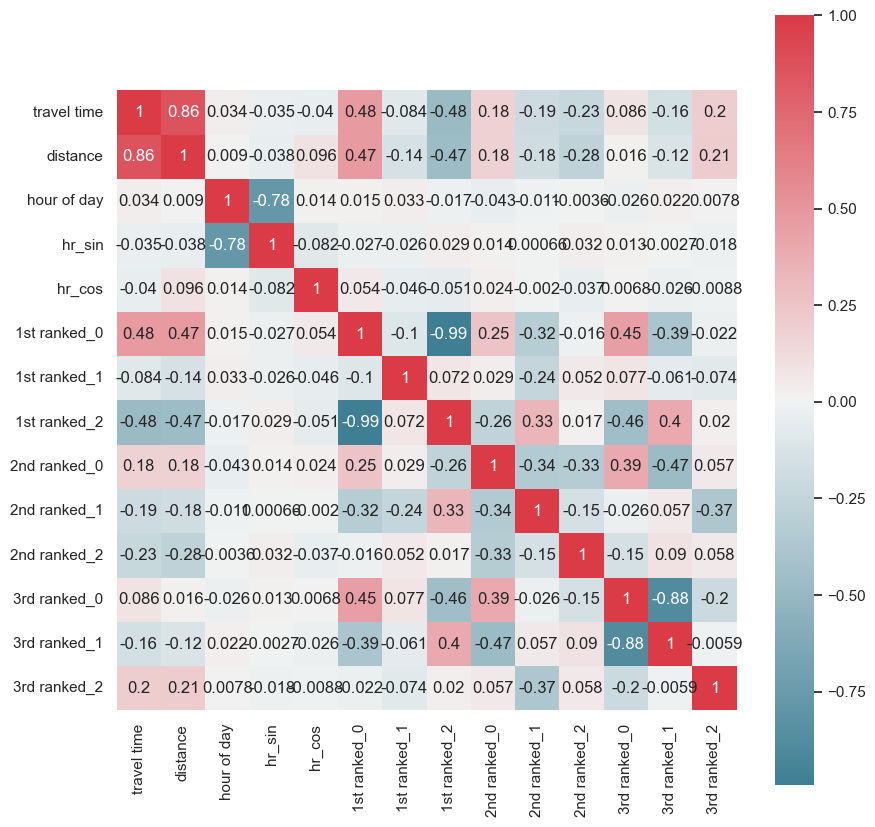

In [106]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10,10))
corr = df6.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [107]:
x = np.array(df6[['distance','1st ranked_0','1st ranked_1','1st ranked_2','2nd ranked_0','2nd ranked_1','2nd ranked_2','3rd ranked_0','3rd ranked_1','3rd ranked_2']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df6['travel time'])
x.shape

(16138, 10)

In [108]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [109]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12910, 10)
(3228, 10)


In [110]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_4_1

Epoch 1/500
404/404 [==============================] - 1s 877us/step - loss: 1051737.7500 - mape: 96.9876 - rmse: 1025.5426 - val_loss: 961825.0625 - val_mape: 91.1694 - val_rmse: 980.7268
Epoch 2/500
404/404 [==============================] - 0s 741us/step - loss: 876029.6875 - mape: 80.1892 - rmse: 935.9646 - val_loss: 728451.1875 - val_mape: 66.7275 - val_rmse: 853.4935
Epoch 3/500
404/404 [==============================] - 0s 753us/step - loss: 621990.3125 - mape: 53.0223 - rmse: 788.6636 - val_loss: 485083.6875 - val_mape: 41.7897 - val_rmse: 696.4795
Epoch 4/500
404/404 [==============================] - 0s 748us/step - loss: 412462.7500 - mape: 44.0108 - rmse: 642.2326 - val_loss: 331562.4062 - val_mape: 48.3013 - val_rmse: 575.8146
Epoch 5/500
404/404 [==============================] - 0s 749us/step - loss: 302329.9062 - mape: 53.3652 - rmse: 549.8453 - val_loss: 267998.2500 - val_mape: 57.9838 - val_rmse: 517.6855
Epoch 6/500
404/404 [==============================] - 0s 731us

Epoch 45/500
404/404 [==============================] - 0s 744us/step - loss: 67639.9844 - mape: 23.7298 - rmse: 260.0769 - val_loss: 68450.9609 - val_mape: 24.3957 - val_rmse: 261.6313
Epoch 46/500
404/404 [==============================] - 0s 734us/step - loss: 67599.0391 - mape: 23.7865 - rmse: 259.9981 - val_loss: 68389.8203 - val_mape: 23.5015 - val_rmse: 261.5145
Epoch 47/500
404/404 [==============================] - 0s 728us/step - loss: 67559.5469 - mape: 23.6052 - rmse: 259.9222 - val_loss: 68324.6719 - val_mape: 23.7926 - val_rmse: 261.3899
Epoch 48/500
404/404 [==============================] - 0s 727us/step - loss: 67511.8359 - mape: 23.6381 - rmse: 259.8304 - val_loss: 68283.7344 - val_mape: 23.9937 - val_rmse: 261.3116
Epoch 49/500
404/404 [==============================] - 0s 733us/step - loss: 67466.3828 - mape: 23.6757 - rmse: 259.7429 - val_loss: 68243.8203 - val_mape: 23.6668 - val_rmse: 261.2352
Epoch 50/500
404/404 [==============================] - 0s 732us/step 

404/404 [==============================] - 0s 758us/step - loss: 66873.5781 - mape: 23.3789 - rmse: 258.5993 - val_loss: 67671.0703 - val_mape: 23.5655 - val_rmse: 260.1366
Epoch 90/500
404/404 [==============================] - 0s 745us/step - loss: 66846.8516 - mape: 23.3247 - rmse: 258.5476 - val_loss: 67662.4453 - val_mape: 23.2926 - val_rmse: 260.1201
Epoch 91/500
404/404 [==============================] - 0s 743us/step - loss: 66845.7344 - mape: 23.2971 - rmse: 258.5454 - val_loss: 67639.0312 - val_mape: 23.5543 - val_rmse: 260.0750
Epoch 92/500
404/404 [==============================] - 0s 730us/step - loss: 66814.3516 - mape: 23.2866 - rmse: 258.4847 - val_loss: 67628.6953 - val_mape: 23.4783 - val_rmse: 260.0552
Epoch 93/500
404/404 [==============================] - 0s 734us/step - loss: 66790.1484 - mape: 23.1437 - rmse: 258.4379 - val_loss: 67672.9688 - val_mape: 24.2482 - val_rmse: 260.1403
Epoch 94/500
404/404 [==============================] - 0s 735us/step - loss: 66780

Epoch 133/500
404/404 [==============================] - 0s 726us/step - loss: 66265.6797 - mape: 23.1354 - rmse: 257.4212 - val_loss: 67052.5938 - val_mape: 23.1639 - val_rmse: 258.9452
Epoch 134/500
404/404 [==============================] - 0s 732us/step - loss: 66269.1250 - mape: 23.0110 - rmse: 257.4279 - val_loss: 67041.2109 - val_mape: 23.3317 - val_rmse: 258.9232
Epoch 135/500
404/404 [==============================] - 0s 740us/step - loss: 66259.7109 - mape: 23.0153 - rmse: 257.4096 - val_loss: 67049.7031 - val_mape: 23.6939 - val_rmse: 258.9396
Epoch 136/500
404/404 [==============================] - 0s 739us/step - loss: 66248.5625 - mape: 23.1230 - rmse: 257.3880 - val_loss: 67020.4922 - val_mape: 23.0665 - val_rmse: 258.8831
Epoch 137/500
404/404 [==============================] - 0s 724us/step - loss: 66246.6406 - mape: 23.0326 - rmse: 257.3842 - val_loss: 67005.8359 - val_mape: 23.1497 - val_rmse: 258.8549
Epoch 138/500
404/404 [==============================] - 0s 734us

Epoch 177/500
404/404 [==============================] - 0s 743us/step - loss: 65943.2734 - mape: 22.7277 - rmse: 256.7942 - val_loss: 66841.0156 - val_mape: 24.3768 - val_rmse: 258.5363
Epoch 178/500
404/404 [==============================] - 0s 745us/step - loss: 65929.4688 - mape: 23.0705 - rmse: 256.7673 - val_loss: 66714.0156 - val_mape: 23.7238 - val_rmse: 258.2906
Epoch 179/500
404/404 [==============================] - 0s 739us/step - loss: 65932.5391 - mape: 22.9183 - rmse: 256.7733 - val_loss: 66675.5469 - val_mape: 23.3955 - val_rmse: 258.2161
Epoch 180/500
404/404 [==============================] - 0s 730us/step - loss: 65917.7891 - mape: 22.8304 - rmse: 256.7446 - val_loss: 66688.5000 - val_mape: 23.6666 - val_rmse: 258.2412
Epoch 181/500
404/404 [==============================] - 0s 731us/step - loss: 65923.7656 - mape: 22.8653 - rmse: 256.7562 - val_loss: 66706.3672 - val_mape: 23.8525 - val_rmse: 258.2758
Epoch 182/500
404/404 [==============================] - 0s 750us

Epoch 221/500
404/404 [==============================] - 0s 727us/step - loss: 65766.1328 - mape: 22.8314 - rmse: 256.4491 - val_loss: 66471.5859 - val_mape: 23.0155 - val_rmse: 257.8208
Epoch 222/500
404/404 [==============================] - 0s 729us/step - loss: 65744.4219 - mape: 22.7897 - rmse: 256.4067 - val_loss: 66470.1094 - val_mape: 22.8823 - val_rmse: 257.8180
Epoch 223/500
404/404 [==============================] - 0s 728us/step - loss: 65740.0078 - mape: 22.7547 - rmse: 256.3981 - val_loss: 66463.6797 - val_mape: 23.1050 - val_rmse: 257.8055
Epoch 224/500
404/404 [==============================] - 0s 730us/step - loss: 65733.1641 - mape: 22.7599 - rmse: 256.3848 - val_loss: 66459.9219 - val_mape: 23.0395 - val_rmse: 257.7982
Epoch 225/500
404/404 [==============================] - 0s 784us/step - loss: 65763.7734 - mape: 22.8250 - rmse: 256.4445 - val_loss: 66462.8047 - val_mape: 22.8569 - val_rmse: 257.8038
Epoch 226/500
404/404 [==============================] - 0s 728us

Epoch 265/500
404/404 [==============================] - 0s 732us/step - loss: 65637.6328 - mape: 22.8033 - rmse: 256.1984 - val_loss: 66360.6250 - val_mape: 23.0836 - val_rmse: 257.6056
Epoch 266/500
404/404 [==============================] - 0s 724us/step - loss: 65628.9531 - mape: 22.7042 - rmse: 256.1815 - val_loss: 66413.2422 - val_mape: 23.6616 - val_rmse: 257.7077
Epoch 267/500
404/404 [==============================] - 0s 732us/step - loss: 65617.0547 - mape: 22.8215 - rmse: 256.1583 - val_loss: 66352.6016 - val_mape: 22.6431 - val_rmse: 257.5900
Epoch 268/500
404/404 [==============================] - 0s 736us/step - loss: 65643.7422 - mape: 22.6992 - rmse: 256.2104 - val_loss: 66345.5078 - val_mape: 23.0262 - val_rmse: 257.5762
Epoch 269/500
404/404 [==============================] - 0s 739us/step - loss: 65611.5312 - mape: 22.7104 - rmse: 256.1475 - val_loss: 66356.1094 - val_mape: 22.8493 - val_rmse: 257.5968
Epoch 270/500
404/404 [==============================] - 0s 727us

Epoch 309/500
404/404 [==============================] - 0s 734us/step - loss: 65545.0703 - mape: 22.6430 - rmse: 256.0177 - val_loss: 66356.3516 - val_mape: 23.7544 - val_rmse: 257.5973
Epoch 310/500
404/404 [==============================] - 0s 737us/step - loss: 65550.8750 - mape: 22.7370 - rmse: 256.0291 - val_loss: 66327.6953 - val_mape: 23.5723 - val_rmse: 257.5416
Epoch 311/500
404/404 [==============================] - 0s 730us/step - loss: 65548.1250 - mape: 22.6955 - rmse: 256.0237 - val_loss: 66289.7500 - val_mape: 23.1778 - val_rmse: 257.4680
Epoch 312/500
404/404 [==============================] - 0s 737us/step - loss: 65558.1719 - mape: 22.7344 - rmse: 256.0433 - val_loss: 66267.2500 - val_mape: 22.7082 - val_rmse: 257.4243
Epoch 313/500
404/404 [==============================] - 0s 741us/step - loss: 65542.2734 - mape: 22.6407 - rmse: 256.0122 - val_loss: 66265.4375 - val_mape: 22.9946 - val_rmse: 257.4207
Epoch 314/500
404/404 [==============================] - 0s 740us

Epoch 353/500
404/404 [==============================] - 0s 740us/step - loss: 65502.6680 - mape: 22.5654 - rmse: 255.9349 - val_loss: 66178.4609 - val_mape: 23.0190 - val_rmse: 257.2517
Epoch 354/500
404/404 [==============================] - 0s 726us/step - loss: 65474.4062 - mape: 22.6935 - rmse: 255.8797 - val_loss: 66177.7109 - val_mape: 22.8743 - val_rmse: 257.2503
Epoch 355/500
404/404 [==============================] - 0s 731us/step - loss: 65479.2656 - mape: 22.6327 - rmse: 255.8892 - val_loss: 66197.7422 - val_mape: 23.2597 - val_rmse: 257.2892
Epoch 356/500
404/404 [==============================] - 0s 742us/step - loss: 65474.8008 - mape: 22.6529 - rmse: 255.8804 - val_loss: 66174.7344 - val_mape: 23.0014 - val_rmse: 257.2445
Epoch 357/500
404/404 [==============================] - 0s 739us/step - loss: 65441.9219 - mape: 22.7501 - rmse: 255.8162 - val_loss: 66169.1172 - val_mape: 22.5107 - val_rmse: 257.2336
Epoch 358/500
404/404 [==============================] - 0s 736us

Epoch 397/500
404/404 [==============================] - 0s 736us/step - loss: 65369.8828 - mape: 22.6348 - rmse: 255.6754 - val_loss: 66075.8984 - val_mape: 23.0524 - val_rmse: 257.0523
Epoch 398/500
404/404 [==============================] - 0s 735us/step - loss: 65370.7695 - mape: 22.6161 - rmse: 255.6771 - val_loss: 66050.3516 - val_mape: 22.7372 - val_rmse: 257.0026
Epoch 399/500
404/404 [==============================] - 0s 749us/step - loss: 65366.2539 - mape: 22.7045 - rmse: 255.6682 - val_loss: 66052.0469 - val_mape: 22.7894 - val_rmse: 257.0059
Epoch 400/500
404/404 [==============================] - 0s 737us/step - loss: 65346.9062 - mape: 22.6127 - rmse: 255.6304 - val_loss: 66050.0703 - val_mape: 22.8653 - val_rmse: 257.0021
Epoch 401/500
404/404 [==============================] - 0s 734us/step - loss: 65356.6406 - mape: 22.6407 - rmse: 255.6494 - val_loss: 66050.1250 - val_mape: 22.6800 - val_rmse: 257.0022
Epoch 402/500
404/404 [==============================] - 0s 732us

Epoch 441/500
404/404 [==============================] - 0s 728us/step - loss: 65200.8320 - mape: 22.4761 - rmse: 255.3445 - val_loss: 65910.3359 - val_mape: 22.6880 - val_rmse: 256.7301
Epoch 442/500
404/404 [==============================] - 0s 728us/step - loss: 65227.2344 - mape: 22.6295 - rmse: 255.3962 - val_loss: 65909.0000 - val_mape: 22.5906 - val_rmse: 256.7275
Epoch 443/500
404/404 [==============================] - 0s 741us/step - loss: 65203.4688 - mape: 22.4564 - rmse: 255.3497 - val_loss: 65958.2344 - val_mape: 23.5329 - val_rmse: 256.8234
Epoch 444/500
404/404 [==============================] - 0s 734us/step - loss: 65230.7891 - mape: 22.5638 - rmse: 255.4032 - val_loss: 65924.1719 - val_mape: 23.3063 - val_rmse: 256.7570
Epoch 445/500
404/404 [==============================] - 0s 735us/step - loss: 65226.1523 - mape: 22.7047 - rmse: 255.3941 - val_loss: 65898.2109 - val_mape: 22.7378 - val_rmse: 256.7065
Epoch 446/500
404/404 [==============================] - 0s 724us

Epoch 485/500
404/404 [==============================] - 0s 733us/step - loss: 65110.9844 - mape: 22.6316 - rmse: 255.1685 - val_loss: 65801.9219 - val_mape: 22.4249 - val_rmse: 256.5189
Epoch 486/500
404/404 [==============================] - 0s 731us/step - loss: 65111.0430 - mape: 22.3894 - rmse: 255.1687 - val_loss: 65862.6094 - val_mape: 23.5694 - val_rmse: 256.6371
Epoch 487/500
404/404 [==============================] - 0s 723us/step - loss: 65101.4883 - mape: 22.7079 - rmse: 255.1499 - val_loss: 65832.1016 - val_mape: 22.2057 - val_rmse: 256.5777
Epoch 488/500
404/404 [==============================] - 0s 718us/step - loss: 65098.0078 - mape: 22.4165 - rmse: 255.1431 - val_loss: 65821.6094 - val_mape: 23.2401 - val_rmse: 256.5572
Epoch 489/500
404/404 [==============================] - 0s 725us/step - loss: 65121.7148 - mape: 22.6224 - rmse: 255.1896 - val_loss: 65807.7891 - val_mape: 23.1749 - val_rmse: 256.5303
Epoch 490/500
404/404 [==============================] - 0s 732us

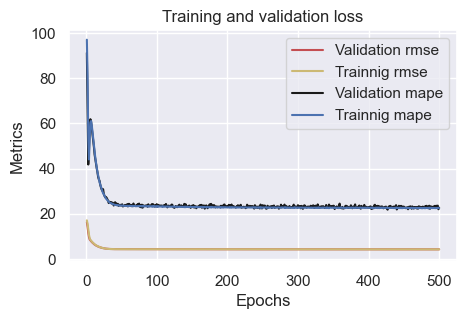

In [111]:
plotme(model4_4_1)
    

In [112]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_4_2

Epoch 1/500
404/404 [==============================] - 1s 890us/step - loss: 1024825.8750 - mape: 94.5351 - rmse: 1012.3369 - val_loss: 881108.0625 - val_mape: 83.2610 - val_rmse: 938.6736
Epoch 2/500
404/404 [==============================] - 0s 756us/step - loss: 725338.7500 - mape: 64.0640 - rmse: 851.6682 - val_loss: 527173.3750 - val_mape: 44.1437 - val_rmse: 726.0671
Epoch 3/500
404/404 [==============================] - 0s 751us/step - loss: 414020.7188 - mape: 44.7746 - rmse: 643.4444 - val_loss: 309743.6875 - val_mape: 50.6955 - val_rmse: 556.5462
Epoch 4/500
404/404 [==============================] - 0s 752us/step - loss: 279067.1250 - mape: 56.6965 - rmse: 528.2681 - val_loss: 249297.2656 - val_mape: 61.0178 - val_rmse: 499.2968
Epoch 5/500
404/404 [==============================] - 0s 770us/step - loss: 238723.4062 - mape: 61.2498 - rmse: 488.5933 - val_loss: 221081.5625 - val_mape: 60.3387 - val_rmse: 470.1931
Epoch 6/500
404/404 [==============================] - 0s 756us

Epoch 45/500
404/404 [==============================] - 0s 748us/step - loss: 67428.4297 - mape: 23.3871 - rmse: 259.6699 - val_loss: 68355.6406 - val_mape: 24.7322 - val_rmse: 261.4491
Epoch 46/500
404/404 [==============================] - 0s 751us/step - loss: 67444.9844 - mape: 23.6636 - rmse: 259.7017 - val_loss: 68244.6250 - val_mape: 23.6453 - val_rmse: 261.2367
Epoch 47/500
404/404 [==============================] - 0s 749us/step - loss: 67388.2734 - mape: 23.3977 - rmse: 259.5925 - val_loss: 68442.5703 - val_mape: 25.0447 - val_rmse: 261.6153
Epoch 48/500
404/404 [==============================] - 0s 781us/step - loss: 67444.5859 - mape: 23.5385 - rmse: 259.7010 - val_loss: 68282.5234 - val_mape: 23.4045 - val_rmse: 261.3092
Epoch 49/500
404/404 [==============================] - 0s 764us/step - loss: 67390.3594 - mape: 23.4894 - rmse: 259.5965 - val_loss: 68309.5703 - val_mape: 24.4109 - val_rmse: 261.3610
Epoch 50/500
404/404 [==============================] - 0s 754us/step 

404/404 [==============================] - 0s 749us/step - loss: 67346.6719 - mape: 23.5201 - rmse: 259.5124 - val_loss: 68191.8125 - val_mape: 23.5474 - val_rmse: 261.1356
Epoch 90/500
404/404 [==============================] - 0s 748us/step - loss: 67355.4219 - mape: 23.4841 - rmse: 259.5292 - val_loss: 68207.5234 - val_mape: 23.8773 - val_rmse: 261.1657
Epoch 91/500
404/404 [==============================] - 0s 757us/step - loss: 67363.8984 - mape: 23.4738 - rmse: 259.5456 - val_loss: 68242.1719 - val_mape: 24.2362 - val_rmse: 261.2320
Epoch 92/500
404/404 [==============================] - 0s 746us/step - loss: 67346.2891 - mape: 23.4738 - rmse: 259.5116 - val_loss: 68201.2969 - val_mape: 23.8529 - val_rmse: 261.1538
Epoch 93/500
404/404 [==============================] - 0s 749us/step - loss: 67357.1484 - mape: 23.4782 - rmse: 259.5326 - val_loss: 68185.4297 - val_mape: 23.8848 - val_rmse: 261.1234
Epoch 94/500
404/404 [==============================] - 0s 749us/step - loss: 67308

Epoch 133/500
404/404 [==============================] - 0s 749us/step - loss: 67324.1172 - mape: 23.4583 - rmse: 259.4689 - val_loss: 68146.3125 - val_mape: 23.9378 - val_rmse: 261.0485
Epoch 134/500
404/404 [==============================] - 0s 748us/step - loss: 67304.8203 - mape: 23.4434 - rmse: 259.4317 - val_loss: 68214.0781 - val_mape: 24.5819 - val_rmse: 261.1783
Epoch 135/500
404/404 [==============================] - 0s 753us/step - loss: 67321.6719 - mape: 23.6188 - rmse: 259.4642 - val_loss: 68119.7188 - val_mape: 23.5930 - val_rmse: 260.9976
Epoch 136/500
404/404 [==============================] - 0s 741us/step - loss: 67279.0781 - mape: 23.4354 - rmse: 259.3821 - val_loss: 68096.1797 - val_mape: 23.3090 - val_rmse: 260.9525
Epoch 137/500
404/404 [==============================] - 0s 746us/step - loss: 67253.2344 - mape: 23.5472 - rmse: 259.3323 - val_loss: 68185.1875 - val_mape: 22.6859 - val_rmse: 261.1229
Epoch 138/500
404/404 [==============================] - 0s 738us

Epoch 177/500
404/404 [==============================] - 0s 748us/step - loss: 66728.0234 - mape: 23.2263 - rmse: 258.3177 - val_loss: 67621.0234 - val_mape: 24.0248 - val_rmse: 260.0404
Epoch 178/500
404/404 [==============================] - 0s 766us/step - loss: 66727.0703 - mape: 23.2525 - rmse: 258.3158 - val_loss: 67554.7422 - val_mape: 23.7132 - val_rmse: 259.9130
Epoch 179/500
404/404 [==============================] - 0s 779us/step - loss: 66707.2812 - mape: 23.1347 - rmse: 258.2775 - val_loss: 67641.7656 - val_mape: 24.3902 - val_rmse: 260.0803
Epoch 180/500
404/404 [==============================] - 0s 749us/step - loss: 66704.7891 - mape: 23.2434 - rmse: 258.2727 - val_loss: 67564.4609 - val_mape: 24.0048 - val_rmse: 259.9316
Epoch 181/500
404/404 [==============================] - 0s 752us/step - loss: 66677.0234 - mape: 23.3101 - rmse: 258.2189 - val_loss: 67513.3438 - val_mape: 23.4257 - val_rmse: 259.8333
Epoch 182/500
404/404 [==============================] - 0s 745us

Epoch 221/500
404/404 [==============================] - 0s 758us/step - loss: 66219.7812 - mape: 23.0606 - rmse: 257.3320 - val_loss: 67040.5391 - val_mape: 23.3996 - val_rmse: 258.9219
Epoch 222/500
404/404 [==============================] - 0s 740us/step - loss: 66212.8125 - mape: 22.9625 - rmse: 257.3185 - val_loss: 67040.0547 - val_mape: 22.9783 - val_rmse: 258.9209
Epoch 223/500
404/404 [==============================] - 0s 757us/step - loss: 66189.1797 - mape: 23.0790 - rmse: 257.2726 - val_loss: 67020.9141 - val_mape: 22.7651 - val_rmse: 258.8840
Epoch 224/500
404/404 [==============================] - 0s 747us/step - loss: 66174.5391 - mape: 22.9808 - rmse: 257.2441 - val_loss: 66998.0859 - val_mape: 23.3056 - val_rmse: 258.8399
Epoch 225/500
404/404 [==============================] - 0s 750us/step - loss: 66182.1641 - mape: 23.0455 - rmse: 257.2589 - val_loss: 66992.0859 - val_mape: 23.1555 - val_rmse: 258.8283
Epoch 226/500
404/404 [==============================] - 0s 748us

Epoch 265/500
404/404 [==============================] - 0s 762us/step - loss: 65919.1406 - mape: 22.8433 - rmse: 256.7472 - val_loss: 66668.4688 - val_mape: 22.8868 - val_rmse: 258.2024
Epoch 266/500
404/404 [==============================] - 0s 773us/step - loss: 65854.6797 - mape: 22.9361 - rmse: 256.6217 - val_loss: 66752.6484 - val_mape: 22.0709 - val_rmse: 258.3653
Epoch 267/500
404/404 [==============================] - 0s 756us/step - loss: 65898.9922 - mape: 22.7940 - rmse: 256.7080 - val_loss: 66639.3984 - val_mape: 22.8990 - val_rmse: 258.1461
Epoch 268/500
404/404 [==============================] - 0s 749us/step - loss: 65855.1719 - mape: 22.8014 - rmse: 256.6226 - val_loss: 66658.4609 - val_mape: 23.1122 - val_rmse: 258.1830
Epoch 269/500
404/404 [==============================] - 0s 749us/step - loss: 65855.6172 - mape: 22.9059 - rmse: 256.6235 - val_loss: 66673.7422 - val_mape: 22.5647 - val_rmse: 258.2126
Epoch 270/500
404/404 [==============================] - 0s 737us

Epoch 309/500
404/404 [==============================] - 0s 747us/step - loss: 65701.5312 - mape: 22.8811 - rmse: 256.3231 - val_loss: 66385.6094 - val_mape: 22.7021 - val_rmse: 257.6541
Epoch 310/500
404/404 [==============================] - 0s 752us/step - loss: 65674.9688 - mape: 22.7473 - rmse: 256.2713 - val_loss: 66383.8438 - val_mape: 22.5729 - val_rmse: 257.6506
Epoch 311/500
404/404 [==============================] - 0s 750us/step - loss: 65649.4375 - mape: 22.6449 - rmse: 256.2215 - val_loss: 66445.4609 - val_mape: 23.6466 - val_rmse: 257.7702
Epoch 312/500
404/404 [==============================] - 0s 747us/step - loss: 65665.6172 - mape: 22.8663 - rmse: 256.2530 - val_loss: 66366.6094 - val_mape: 22.9473 - val_rmse: 257.6172
Epoch 313/500
404/404 [==============================] - 0s 752us/step - loss: 65632.7266 - mape: 22.7305 - rmse: 256.1888 - val_loss: 66354.9922 - val_mape: 23.0444 - val_rmse: 257.5946
Epoch 314/500
404/404 [==============================] - 0s 753us

Epoch 353/500
404/404 [==============================] - 0s 743us/step - loss: 65507.4336 - mape: 22.6582 - rmse: 255.9442 - val_loss: 66147.1094 - val_mape: 22.9405 - val_rmse: 257.1908
Epoch 354/500
404/404 [==============================] - 0s 758us/step - loss: 65477.8008 - mape: 22.6804 - rmse: 255.8863 - val_loss: 66145.1094 - val_mape: 22.5638 - val_rmse: 257.1869
Epoch 355/500
404/404 [==============================] - 0s 734us/step - loss: 65492.9766 - mape: 22.6084 - rmse: 255.9160 - val_loss: 66234.7266 - val_mape: 23.8638 - val_rmse: 257.3611
Epoch 356/500
404/404 [==============================] - 0s 749us/step - loss: 65493.8125 - mape: 22.7533 - rmse: 255.9176 - val_loss: 66121.7812 - val_mape: 23.0053 - val_rmse: 257.1416
Epoch 357/500
404/404 [==============================] - 0s 747us/step - loss: 65476.5625 - mape: 22.7002 - rmse: 255.8839 - val_loss: 66118.3281 - val_mape: 23.0554 - val_rmse: 257.1349
Epoch 358/500
404/404 [==============================] - 0s 750us

Epoch 397/500
404/404 [==============================] - 0s 758us/step - loss: 65369.0977 - mape: 22.6841 - rmse: 255.6738 - val_loss: 65956.8516 - val_mape: 23.2777 - val_rmse: 256.8206
Epoch 398/500
404/404 [==============================] - 0s 752us/step - loss: 65392.4570 - mape: 22.7091 - rmse: 255.7195 - val_loss: 65950.4062 - val_mape: 22.3445 - val_rmse: 256.8081
Epoch 399/500
404/404 [==============================] - 0s 758us/step - loss: 65346.7969 - mape: 22.6092 - rmse: 255.6302 - val_loss: 65993.6172 - val_mape: 22.0884 - val_rmse: 256.8922
Epoch 400/500
404/404 [==============================] - 0s 766us/step - loss: 65403.0820 - mape: 22.6170 - rmse: 255.7403 - val_loss: 66016.4766 - val_mape: 21.9960 - val_rmse: 256.9367
Epoch 401/500
404/404 [==============================] - 0s 755us/step - loss: 65363.5586 - mape: 22.5289 - rmse: 255.6630 - val_loss: 65950.6641 - val_mape: 23.3095 - val_rmse: 256.8086
Epoch 402/500
404/404 [==============================] - 0s 756us

Epoch 441/500
404/404 [==============================] - 0s 754us/step - loss: 65280.5039 - mape: 22.6518 - rmse: 255.5005 - val_loss: 65800.6484 - val_mape: 22.9510 - val_rmse: 256.5164
Epoch 442/500
404/404 [==============================] - 0s 743us/step - loss: 65241.0703 - mape: 22.5523 - rmse: 255.4233 - val_loss: 65841.7266 - val_mape: 23.5190 - val_rmse: 256.5964
Epoch 443/500
404/404 [==============================] - 0s 753us/step - loss: 65236.5391 - mape: 22.5764 - rmse: 255.4144 - val_loss: 65892.8438 - val_mape: 23.7338 - val_rmse: 256.6960
Epoch 444/500
404/404 [==============================] - 0s 766us/step - loss: 65238.9688 - mape: 22.6768 - rmse: 255.4192 - val_loss: 65764.5781 - val_mape: 22.9203 - val_rmse: 256.4460
Epoch 445/500
404/404 [==============================] - 0s 741us/step - loss: 65229.9688 - mape: 22.4425 - rmse: 255.4016 - val_loss: 65906.9766 - val_mape: 23.9029 - val_rmse: 256.7235
Epoch 446/500
404/404 [==============================] - 0s 751us

Epoch 485/500
404/404 [==============================] - 0s 746us/step - loss: 65155.0273 - mape: 22.6268 - rmse: 255.2548 - val_loss: 65656.6094 - val_mape: 22.7842 - val_rmse: 256.2354
Epoch 486/500
404/404 [==============================] - 0s 749us/step - loss: 65151.4102 - mape: 22.4881 - rmse: 255.2477 - val_loss: 65726.4062 - val_mape: 23.6375 - val_rmse: 256.3716
Epoch 487/500
404/404 [==============================] - 0s 746us/step - loss: 65169.4297 - mape: 22.5748 - rmse: 255.2830 - val_loss: 65683.2500 - val_mape: 23.2926 - val_rmse: 256.2874
Epoch 488/500
404/404 [==============================] - 0s 749us/step - loss: 65145.0859 - mape: 22.6711 - rmse: 255.2354 - val_loss: 65743.0703 - val_mape: 21.8224 - val_rmse: 256.4041
Epoch 489/500
404/404 [==============================] - 0s 748us/step - loss: 65158.3359 - mape: 22.4482 - rmse: 255.2613 - val_loss: 65653.9453 - val_mape: 22.9618 - val_rmse: 256.2303
Epoch 490/500
404/404 [==============================] - 0s 756us

In [113]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_4_3

Epoch 1/500
404/404 [==============================] - 1s 909us/step - loss: 950272.3750 - mape: 87.3064 - rmse: 974.8192 - val_loss: 683573.6875 - val_mape: 61.4643 - val_rmse: 826.7852
Epoch 2/500
404/404 [==============================] - 0s 771us/step - loss: 460435.5625 - mape: 47.7138 - rmse: 678.5540 - val_loss: 291815.4688 - val_mape: 53.5234 - val_rmse: 540.1995
Epoch 3/500
404/404 [==============================] - 0s 797us/step - loss: 258628.5156 - mape: 59.6392 - rmse: 508.5553 - val_loss: 230504.0938 - val_mape: 62.1681 - val_rmse: 480.1084
Epoch 4/500
404/404 [==============================] - 0s 779us/step - loss: 215919.3438 - mape: 59.7535 - rmse: 464.6712 - val_loss: 197427.2656 - val_mape: 58.3973 - val_rmse: 444.3279
Epoch 5/500
404/404 [==============================] - 0s 768us/step - loss: 184340.2031 - mape: 54.6879 - rmse: 429.3486 - val_loss: 168808.0938 - val_mape: 52.1292 - val_rmse: 410.8626
Epoch 6/500
404/404 [==============================] - 0s 761us/s

Epoch 45/500
404/404 [==============================] - 0s 756us/step - loss: 67088.6172 - mape: 23.2841 - rmse: 259.0147 - val_loss: 67823.1016 - val_mape: 23.4825 - val_rmse: 260.4287
Epoch 46/500
404/404 [==============================] - 0s 764us/step - loss: 67011.8359 - mape: 23.3596 - rmse: 258.8665 - val_loss: 67846.5000 - val_mape: 24.1556 - val_rmse: 260.4736
Epoch 47/500
404/404 [==============================] - 0s 763us/step - loss: 66944.9062 - mape: 23.3623 - rmse: 258.7372 - val_loss: 67895.9531 - val_mape: 24.6150 - val_rmse: 260.5685
Epoch 48/500
404/404 [==============================] - 0s 768us/step - loss: 66946.0000 - mape: 23.3317 - rmse: 258.7393 - val_loss: 67757.5469 - val_mape: 23.2284 - val_rmse: 260.3028
Epoch 49/500
404/404 [==============================] - 0s 762us/step - loss: 66927.6484 - mape: 23.3713 - rmse: 258.7038 - val_loss: 67751.1953 - val_mape: 22.9659 - val_rmse: 260.2906
Epoch 50/500
404/404 [==============================] - 0s 769us/step 

404/404 [==============================] - 0s 757us/step - loss: 66011.7500 - mape: 22.9302 - rmse: 256.9275 - val_loss: 66652.5391 - val_mape: 22.8025 - val_rmse: 258.1715
Epoch 90/500
404/404 [==============================] - 0s 786us/step - loss: 65944.6953 - mape: 22.9527 - rmse: 256.7970 - val_loss: 66644.1953 - val_mape: 23.5666 - val_rmse: 258.1554
Epoch 91/500
404/404 [==============================] - 0s 767us/step - loss: 65919.3203 - mape: 23.0041 - rmse: 256.7476 - val_loss: 66620.9531 - val_mape: 22.5548 - val_rmse: 258.1104
Epoch 92/500
404/404 [==============================] - 0s 751us/step - loss: 65909.4453 - mape: 22.9513 - rmse: 256.7284 - val_loss: 66604.7422 - val_mape: 22.5667 - val_rmse: 258.0789
Epoch 93/500
404/404 [==============================] - 0s 770us/step - loss: 65888.1953 - mape: 22.8743 - rmse: 256.6870 - val_loss: 66551.3125 - val_mape: 23.0780 - val_rmse: 257.9754
Epoch 94/500
404/404 [==============================] - 0s 762us/step - loss: 65864

Epoch 133/500
404/404 [==============================] - 0s 758us/step - loss: 65421.5547 - mape: 22.6164 - rmse: 255.7764 - val_loss: 65996.3438 - val_mape: 23.5780 - val_rmse: 256.8975
Epoch 134/500
404/404 [==============================] - 0s 756us/step - loss: 65384.0117 - mape: 22.7699 - rmse: 255.7030 - val_loss: 65982.0234 - val_mape: 22.4352 - val_rmse: 256.8697
Epoch 135/500
404/404 [==============================] - 0s 754us/step - loss: 65397.3398 - mape: 22.5730 - rmse: 255.7290 - val_loss: 66032.5781 - val_mape: 23.8441 - val_rmse: 256.9680
Epoch 136/500
404/404 [==============================] - 0s 757us/step - loss: 65331.5469 - mape: 22.8157 - rmse: 255.6004 - val_loss: 66063.7500 - val_mape: 21.8620 - val_rmse: 257.0287
Epoch 137/500
404/404 [==============================] - 0s 771us/step - loss: 65389.7266 - mape: 22.6191 - rmse: 255.7142 - val_loss: 65950.7344 - val_mape: 22.2731 - val_rmse: 256.8087
Epoch 138/500
404/404 [==============================] - 0s 763us

Epoch 177/500
404/404 [==============================] - 0s 756us/step - loss: 65189.6602 - mape: 22.7243 - rmse: 255.3227 - val_loss: 65744.2109 - val_mape: 21.8659 - val_rmse: 256.4063
Epoch 178/500
404/404 [==============================] - 0s 761us/step - loss: 65162.8008 - mape: 22.4258 - rmse: 255.2701 - val_loss: 65689.8594 - val_mape: 23.1327 - val_rmse: 256.3003
Epoch 179/500
404/404 [==============================] - 0s 747us/step - loss: 65150.4766 - mape: 22.6669 - rmse: 255.2459 - val_loss: 65780.8984 - val_mape: 21.6714 - val_rmse: 256.4779
Epoch 180/500
404/404 [==============================] - 0s 745us/step - loss: 65175.0898 - mape: 22.5169 - rmse: 255.2941 - val_loss: 65647.2188 - val_mape: 22.6313 - val_rmse: 256.2171
Epoch 181/500
404/404 [==============================] - 0s 745us/step - loss: 65201.9805 - mape: 22.5695 - rmse: 255.3468 - val_loss: 65668.1875 - val_mape: 22.9062 - val_rmse: 256.2581
Epoch 182/500
404/404 [==============================] - 0s 750us

Epoch 221/500
404/404 [==============================] - 0s 753us/step - loss: 64958.0430 - mape: 22.4193 - rmse: 254.8687 - val_loss: 65538.3047 - val_mape: 23.4397 - val_rmse: 256.0045
Epoch 222/500
404/404 [==============================] - 0s 754us/step - loss: 64981.2109 - mape: 22.6234 - rmse: 254.9141 - val_loss: 65459.6992 - val_mape: 23.0656 - val_rmse: 255.8509
Epoch 223/500
404/404 [==============================] - 0s 756us/step - loss: 64951.3711 - mape: 22.4487 - rmse: 254.8556 - val_loss: 65455.9492 - val_mape: 21.9983 - val_rmse: 255.8436
Epoch 224/500
404/404 [==============================] - 0s 780us/step - loss: 64973.6562 - mape: 22.4440 - rmse: 254.8993 - val_loss: 65440.4180 - val_mape: 23.0235 - val_rmse: 255.8132
Epoch 225/500
404/404 [==============================] - 0s 749us/step - loss: 64973.6680 - mape: 22.4508 - rmse: 254.8993 - val_loss: 65435.7227 - val_mape: 22.5443 - val_rmse: 255.8041
Epoch 226/500
404/404 [==============================] - 0s 761us

Epoch 265/500
404/404 [==============================] - 0s 780us/step - loss: 64819.2930 - mape: 22.4393 - rmse: 254.5963 - val_loss: 65346.0391 - val_mape: 22.0155 - val_rmse: 255.6287
Epoch 266/500
404/404 [==============================] - 0s 798us/step - loss: 64818.5312 - mape: 22.3578 - rmse: 254.5948 - val_loss: 65287.8516 - val_mape: 22.6988 - val_rmse: 255.5149
Epoch 267/500
404/404 [==============================] - 0s 749us/step - loss: 64804.7695 - mape: 22.4768 - rmse: 254.5678 - val_loss: 65385.1367 - val_mape: 21.7158 - val_rmse: 255.7052
Epoch 268/500
404/404 [==============================] - 0s 763us/step - loss: 64837.2305 - mape: 22.3073 - rmse: 254.6316 - val_loss: 65289.3203 - val_mape: 22.3947 - val_rmse: 255.5177
Epoch 269/500
404/404 [==============================] - 0s 748us/step - loss: 64791.6953 - mape: 22.3968 - rmse: 254.5421 - val_loss: 65435.3047 - val_mape: 23.7551 - val_rmse: 255.8033
Epoch 270/500
404/404 [==============================] - 0s 794us

Epoch 309/500
404/404 [==============================] - 0s 753us/step - loss: 64691.8789 - mape: 22.3095 - rmse: 254.3460 - val_loss: 65285.3711 - val_mape: 21.5645 - val_rmse: 255.5100
Epoch 310/500
404/404 [==============================] - 0s 754us/step - loss: 64653.3125 - mape: 22.2913 - rmse: 254.2702 - val_loss: 65207.4492 - val_mape: 22.0804 - val_rmse: 255.3575
Epoch 311/500
404/404 [==============================] - 0s 763us/step - loss: 64678.3398 - mape: 22.4153 - rmse: 254.3194 - val_loss: 65232.0039 - val_mape: 22.0520 - val_rmse: 255.4056
Epoch 312/500
404/404 [==============================] - 0s 758us/step - loss: 64721.0352 - mape: 22.2530 - rmse: 254.4033 - val_loss: 65169.4961 - val_mape: 22.7739 - val_rmse: 255.2832
Epoch 313/500
404/404 [==============================] - 0s 755us/step - loss: 64696.5938 - mape: 22.4005 - rmse: 254.3553 - val_loss: 65177.9883 - val_mape: 22.2508 - val_rmse: 255.2998
Epoch 314/500
404/404 [==============================] - 0s 769us

Epoch 353/500
404/404 [==============================] - 0s 749us/step - loss: 64597.3633 - mape: 22.2223 - rmse: 254.1601 - val_loss: 65161.2383 - val_mape: 22.6869 - val_rmse: 255.2670
Epoch 354/500
404/404 [==============================] - 0s 752us/step - loss: 64625.2227 - mape: 22.2712 - rmse: 254.2149 - val_loss: 65282.3633 - val_mape: 23.7853 - val_rmse: 255.5041
Epoch 355/500
404/404 [==============================] - 0s 743us/step - loss: 64604.4844 - mape: 22.3380 - rmse: 254.1741 - val_loss: 65235.6641 - val_mape: 23.4789 - val_rmse: 255.4127
Epoch 356/500
404/404 [==============================] - 0s 752us/step - loss: 64579.7930 - mape: 22.3264 - rmse: 254.1255 - val_loss: 65108.7422 - val_mape: 22.5576 - val_rmse: 255.1642
Epoch 357/500
404/404 [==============================] - 0s 754us/step - loss: 64579.5781 - mape: 22.2046 - rmse: 254.1251 - val_loss: 65105.1367 - val_mape: 22.2074 - val_rmse: 255.1571
Epoch 358/500
404/404 [==============================] - 0s 761us

Epoch 397/500
404/404 [==============================] - 0s 763us/step - loss: 64516.9805 - mape: 22.3166 - rmse: 254.0019 - val_loss: 65067.6875 - val_mape: 21.7955 - val_rmse: 255.0837
Epoch 398/500
404/404 [==============================] - 0s 756us/step - loss: 64518.4961 - mape: 22.2476 - rmse: 254.0049 - val_loss: 65036.7812 - val_mape: 21.9119 - val_rmse: 255.0231
Epoch 399/500
404/404 [==============================] - 0s 758us/step - loss: 64521.4883 - mape: 22.1910 - rmse: 254.0108 - val_loss: 65056.3906 - val_mape: 22.9013 - val_rmse: 255.0615
Epoch 400/500
404/404 [==============================] - 0s 755us/step - loss: 64566.3633 - mape: 22.2691 - rmse: 254.0991 - val_loss: 65130.8828 - val_mape: 23.4071 - val_rmse: 255.2075
Epoch 401/500
404/404 [==============================] - 0s 774us/step - loss: 64496.3008 - mape: 22.3182 - rmse: 253.9612 - val_loss: 65068.3750 - val_mape: 21.8387 - val_rmse: 255.0850
Epoch 402/500
404/404 [==============================] - 0s 754us

Epoch 441/500
404/404 [==============================] - 0s 772us/step - loss: 64461.7109 - mape: 22.1654 - rmse: 253.8931 - val_loss: 65010.1172 - val_mape: 23.1198 - val_rmse: 254.9708
Epoch 442/500
404/404 [==============================] - 0s 754us/step - loss: 64419.2734 - mape: 22.3791 - rmse: 253.8095 - val_loss: 65334.1992 - val_mape: 20.7155 - val_rmse: 255.6056
Epoch 443/500
404/404 [==============================] - 0s 760us/step - loss: 64439.7617 - mape: 21.9628 - rmse: 253.8499 - val_loss: 65370.5273 - val_mape: 24.3479 - val_rmse: 255.6766
Epoch 444/500
404/404 [==============================] - 0s 758us/step - loss: 64500.0508 - mape: 22.2529 - rmse: 253.9686 - val_loss: 64998.9180 - val_mape: 22.9232 - val_rmse: 254.9489
Epoch 445/500
404/404 [==============================] - 0s 761us/step - loss: 64479.2422 - mape: 22.2373 - rmse: 253.9276 - val_loss: 65013.3633 - val_mape: 22.9200 - val_rmse: 254.9772
Epoch 446/500
404/404 [==============================] - 0s 765us

Epoch 485/500
404/404 [==============================] - 0s 762us/step - loss: 64431.3633 - mape: 22.1294 - rmse: 253.8333 - val_loss: 65003.3516 - val_mape: 23.0962 - val_rmse: 254.9576
Epoch 486/500
404/404 [==============================] - 0s 753us/step - loss: 64381.2930 - mape: 22.2079 - rmse: 253.7347 - val_loss: 64923.0078 - val_mape: 22.4756 - val_rmse: 254.7999
Epoch 487/500
404/404 [==============================] - 0s 758us/step - loss: 64371.6367 - mape: 22.1363 - rmse: 253.7157 - val_loss: 64916.1328 - val_mape: 22.4299 - val_rmse: 254.7864
Epoch 488/500
404/404 [==============================] - 0s 766us/step - loss: 64388.3438 - mape: 22.1804 - rmse: 253.7486 - val_loss: 64995.4727 - val_mape: 21.6228 - val_rmse: 254.9421
Epoch 489/500
404/404 [==============================] - 0s 762us/step - loss: 64403.1992 - mape: 22.0483 - rmse: 253.7778 - val_loss: 64959.6562 - val_mape: 23.0625 - val_rmse: 254.8718
Epoch 490/500
404/404 [==============================] - 0s 750us

In [114]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_4_4

Epoch 1/500
404/404 [==============================] - 1s 958us/step - loss: 578517.8750 - mape: 71.4050 - rmse: 760.6036 - val_loss: 205983.8281 - val_mape: 60.3348 - val_rmse: 453.8544
Epoch 2/500
404/404 [==============================] - 0s 812us/step - loss: 161809.4531 - mape: 50.5884 - rmse: 402.2555 - val_loss: 130387.3281 - val_mape: 44.4864 - val_rmse: 361.0919
Epoch 3/500
404/404 [==============================] - 0s 800us/step - loss: 112217.5078 - mape: 37.8099 - rmse: 334.9888 - val_loss: 97654.8125 - val_mape: 33.5734 - val_rmse: 312.4977
Epoch 4/500
404/404 [==============================] - 0s 807us/step - loss: 88037.5078 - mape: 30.5766 - rmse: 296.7112 - val_loss: 80559.6406 - val_mape: 30.2097 - val_rmse: 283.8303
Epoch 5/500
404/404 [==============================] - 0s 813us/step - loss: 75091.8516 - mape: 26.8136 - rmse: 274.0289 - val_loss: 71926.1328 - val_mape: 26.3433 - val_rmse: 268.1905
Epoch 6/500
404/404 [==============================] - 0s 816us/step -

404/404 [==============================] - 0s 798us/step - loss: 67087.6328 - mape: 23.3862 - rmse: 259.0128 - val_loss: 68039.0000 - val_mape: 22.3194 - val_rmse: 260.8429
Epoch 46/500
404/404 [==============================] - 0s 790us/step - loss: 67089.2891 - mape: 23.2831 - rmse: 259.0160 - val_loss: 67989.9688 - val_mape: 22.8906 - val_rmse: 260.7489
Epoch 47/500
404/404 [==============================] - 0s 799us/step - loss: 67028.7812 - mape: 23.3377 - rmse: 258.8992 - val_loss: 67746.5000 - val_mape: 23.2126 - val_rmse: 260.2816
Epoch 48/500
404/404 [==============================] - 0s 818us/step - loss: 66964.9844 - mape: 23.2602 - rmse: 258.7759 - val_loss: 67679.1953 - val_mape: 23.9645 - val_rmse: 260.1523
Epoch 49/500
404/404 [==============================] - 0s 808us/step - loss: 66906.0703 - mape: 23.3016 - rmse: 258.6621 - val_loss: 67936.2344 - val_mape: 21.7485 - val_rmse: 260.6458
Epoch 50/500
404/404 [==============================] - 0s 811us/step - loss: 66957

Epoch 133/500
404/404 [==============================] - 0s 803us/step - loss: 64948.1914 - mape: 22.4213 - rmse: 254.8493 - val_loss: 65537.4062 - val_mape: 21.6706 - val_rmse: 256.0027
Epoch 134/500
404/404 [==============================] - 0s 810us/step - loss: 64935.2227 - mape: 22.2364 - rmse: 254.8239 - val_loss: 65768.4141 - val_mape: 24.2670 - val_rmse: 256.4535
Epoch 135/500
404/404 [==============================] - 0s 805us/step - loss: 64939.3125 - mape: 22.3303 - rmse: 254.8319 - val_loss: 65340.9336 - val_mape: 22.5786 - val_rmse: 255.6187
Epoch 136/500
404/404 [==============================] - 0s 819us/step - loss: 64964.8867 - mape: 22.3245 - rmse: 254.8821 - val_loss: 65388.6992 - val_mape: 21.7789 - val_rmse: 255.7121
Epoch 137/500
404/404 [==============================] - 0s 801us/step - loss: 64947.9297 - mape: 22.2789 - rmse: 254.8488 - val_loss: 66125.9297 - val_mape: 20.5601 - val_rmse: 257.1496
Epoch 138/500
404/404 [==============================] - 0s 812us

Epoch 177/500
404/404 [==============================] - 0s 801us/step - loss: 64873.3359 - mape: 22.2084 - rmse: 254.7024 - val_loss: 65350.3555 - val_mape: 21.6352 - val_rmse: 255.6372
Epoch 178/500
404/404 [==============================] - 0s 802us/step - loss: 64908.7344 - mape: 22.3700 - rmse: 254.7719 - val_loss: 65315.2383 - val_mape: 21.2212 - val_rmse: 255.5685
Epoch 179/500
404/404 [==============================] - 0s 804us/step - loss: 64864.0195 - mape: 22.1875 - rmse: 254.6842 - val_loss: 65487.6719 - val_mape: 21.3904 - val_rmse: 255.9056
Epoch 180/500
404/404 [==============================] - 0s 808us/step - loss: 64852.5938 - mape: 22.3261 - rmse: 254.6617 - val_loss: 65468.3984 - val_mape: 20.8360 - val_rmse: 255.8679
Epoch 181/500
404/404 [==============================] - 0s 802us/step - loss: 64904.2930 - mape: 22.0948 - rmse: 254.7632 - val_loss: 65637.9297 - val_mape: 24.6175 - val_rmse: 256.1990
Epoch 182/500
404/404 [==============================] - 0s 793us

Epoch 221/500
404/404 [==============================] - 0s 810us/step - loss: 64882.4922 - mape: 22.2001 - rmse: 254.7204 - val_loss: 65662.4766 - val_mape: 24.2681 - val_rmse: 256.2469
Epoch 222/500
404/404 [==============================] - 0s 803us/step - loss: 64852.8672 - mape: 22.2036 - rmse: 254.6623 - val_loss: 65571.8438 - val_mape: 24.2126 - val_rmse: 256.0700
Epoch 223/500
404/404 [==============================] - 0s 798us/step - loss: 64867.8086 - mape: 22.2485 - rmse: 254.6916 - val_loss: 65215.3789 - val_mape: 22.1876 - val_rmse: 255.3730
Epoch 224/500
404/404 [==============================] - 0s 808us/step - loss: 64839.8789 - mape: 22.2023 - rmse: 254.6368 - val_loss: 65335.6992 - val_mape: 21.5438 - val_rmse: 255.6085
Epoch 225/500
404/404 [==============================] - 0s 803us/step - loss: 64871.4062 - mape: 22.2635 - rmse: 254.6987 - val_loss: 65399.5820 - val_mape: 21.7260 - val_rmse: 255.7334
Epoch 226/500
404/404 [==============================] - 0s 801us

Epoch 265/500
404/404 [==============================] - 0s 805us/step - loss: 64820.1875 - mape: 22.1814 - rmse: 254.5981 - val_loss: 65170.5664 - val_mape: 21.9703 - val_rmse: 255.2853
Epoch 266/500
404/404 [==============================] - 0s 800us/step - loss: 64846.9453 - mape: 22.2193 - rmse: 254.6506 - val_loss: 65385.2734 - val_mape: 21.1863 - val_rmse: 255.7054
Epoch 267/500
404/404 [==============================] - 0s 829us/step - loss: 64843.0898 - mape: 22.2076 - rmse: 254.6431 - val_loss: 65171.6523 - val_mape: 22.2112 - val_rmse: 255.2874
Epoch 268/500
404/404 [==============================] - 0s 850us/step - loss: 64841.7109 - mape: 22.2362 - rmse: 254.6404 - val_loss: 65481.4531 - val_mape: 20.8688 - val_rmse: 255.8934
Epoch 269/500
404/404 [==============================] - 0s 878us/step - loss: 64901.5820 - mape: 22.2483 - rmse: 254.7579 - val_loss: 65176.3359 - val_mape: 22.3442 - val_rmse: 255.2966
Epoch 270/500
404/404 [==============================] - 0s 848us

Epoch 309/500
404/404 [==============================] - 0s 807us/step - loss: 64807.5000 - mape: 22.2576 - rmse: 254.5732 - val_loss: 65249.7461 - val_mape: 22.2198 - val_rmse: 255.4403
Epoch 310/500
404/404 [==============================] - 0s 812us/step - loss: 64782.3203 - mape: 22.1553 - rmse: 254.5237 - val_loss: 65199.3711 - val_mape: 22.1452 - val_rmse: 255.3417
Epoch 311/500
404/404 [==============================] - 0s 794us/step - loss: 64752.7812 - mape: 22.1973 - rmse: 254.4657 - val_loss: 65214.1445 - val_mape: 21.6685 - val_rmse: 255.3706
Epoch 312/500
404/404 [==============================] - 0s 808us/step - loss: 64808.5859 - mape: 22.1355 - rmse: 254.5753 - val_loss: 65494.7227 - val_mape: 23.9712 - val_rmse: 255.9194
Epoch 313/500
404/404 [==============================] - 0s 802us/step - loss: 64797.7852 - mape: 22.2567 - rmse: 254.5541 - val_loss: 65201.6016 - val_mape: 22.8612 - val_rmse: 255.3460
Epoch 314/500
404/404 [==============================] - 0s 808us

Epoch 353/500
404/404 [==============================] - 0s 799us/step - loss: 64742.5938 - mape: 22.1765 - rmse: 254.4457 - val_loss: 65322.8320 - val_mape: 21.2916 - val_rmse: 255.5833
Epoch 354/500
404/404 [==============================] - 0s 786us/step - loss: 64809.7656 - mape: 22.1245 - rmse: 254.5776 - val_loss: 65188.4219 - val_mape: 21.8552 - val_rmse: 255.3202
Epoch 355/500
404/404 [==============================] - 0s 800us/step - loss: 64759.5273 - mape: 22.2047 - rmse: 254.4789 - val_loss: 65212.2969 - val_mape: 21.8970 - val_rmse: 255.3670
Epoch 356/500
404/404 [==============================] - 0s 807us/step - loss: 64870.1602 - mape: 22.2281 - rmse: 254.6962 - val_loss: 65200.7695 - val_mape: 22.6473 - val_rmse: 255.3444
Epoch 357/500
404/404 [==============================] - 0s 810us/step - loss: 64680.7383 - mape: 22.1118 - rmse: 254.3241 - val_loss: 65301.3633 - val_mape: 23.0837 - val_rmse: 255.5413
Epoch 358/500
404/404 [==============================] - 0s 804us

Epoch 397/500
404/404 [==============================] - 0s 805us/step - loss: 64810.4609 - mape: 22.1163 - rmse: 254.5790 - val_loss: 65458.1250 - val_mape: 24.0742 - val_rmse: 255.8479
Epoch 398/500
404/404 [==============================] - 0s 812us/step - loss: 64737.1914 - mape: 22.2617 - rmse: 254.4350 - val_loss: 65195.8711 - val_mape: 23.1203 - val_rmse: 255.3348
Epoch 399/500
404/404 [==============================] - 0s 810us/step - loss: 64629.3086 - mape: 22.1797 - rmse: 254.2229 - val_loss: 65249.6758 - val_mape: 22.8159 - val_rmse: 255.4402
Epoch 400/500
404/404 [==============================] - 0s 794us/step - loss: 64722.1289 - mape: 22.1126 - rmse: 254.4054 - val_loss: 65209.6953 - val_mape: 23.2535 - val_rmse: 255.3619
Epoch 401/500
404/404 [==============================] - 0s 804us/step - loss: 64843.6484 - mape: 22.2355 - rmse: 254.6442 - val_loss: 65237.9102 - val_mape: 21.4812 - val_rmse: 255.4171
Epoch 402/500
404/404 [==============================] - 0s 803us

Epoch 441/500
404/404 [==============================] - 0s 806us/step - loss: 64783.6914 - mape: 22.2565 - rmse: 254.5264 - val_loss: 65278.8164 - val_mape: 21.3733 - val_rmse: 255.4972
Epoch 442/500
404/404 [==============================] - 0s 809us/step - loss: 64759.5742 - mape: 22.0727 - rmse: 254.4790 - val_loss: 65199.2656 - val_mape: 23.2448 - val_rmse: 255.3415
Epoch 443/500
404/404 [==============================] - 0s 814us/step - loss: 64821.2422 - mape: 22.2531 - rmse: 254.6002 - val_loss: 65342.1250 - val_mape: 23.9827 - val_rmse: 255.6211
Epoch 444/500
404/404 [==============================] - 0s 792us/step - loss: 64655.9766 - mape: 22.1643 - rmse: 254.2754 - val_loss: 65082.1680 - val_mape: 22.4625 - val_rmse: 255.1121
Epoch 445/500
404/404 [==============================] - 0s 802us/step - loss: 64862.6797 - mape: 22.1339 - rmse: 254.6815 - val_loss: 65179.9141 - val_mape: 22.7018 - val_rmse: 255.3036
Epoch 446/500
404/404 [==============================] - 0s 799us

Epoch 485/500
404/404 [==============================] - 0s 815us/step - loss: 64723.6641 - mape: 22.1745 - rmse: 254.4085 - val_loss: 65134.9258 - val_mape: 21.9279 - val_rmse: 255.2155
Epoch 486/500
404/404 [==============================] - 0s 799us/step - loss: 64773.0898 - mape: 22.1753 - rmse: 254.5056 - val_loss: 65249.9844 - val_mape: 21.6129 - val_rmse: 255.4408
Epoch 487/500
404/404 [==============================] - 0s 811us/step - loss: 64783.4180 - mape: 22.1995 - rmse: 254.5259 - val_loss: 65080.5391 - val_mape: 21.9872 - val_rmse: 255.1089
Epoch 488/500
404/404 [==============================] - 0s 808us/step - loss: 64728.8086 - mape: 22.1485 - rmse: 254.4186 - val_loss: 65089.3711 - val_mape: 22.2086 - val_rmse: 255.1262
Epoch 489/500
404/404 [==============================] - 0s 809us/step - loss: 64703.9062 - mape: 22.1537 - rmse: 254.3696 - val_loss: 65222.2812 - val_mape: 23.1621 - val_rmse: 255.3865
Epoch 490/500
404/404 [==============================] - 0s 795us

In [115]:
# plotme(model4_4_4)

In [116]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_4_5

Epoch 1/500
404/404 [==============================] - 1s 1ms/step - loss: 440078.6875 - mape: 65.2675 - rmse: 663.3843 - val_loss: 152153.3750 - val_mape: 50.5506 - val_rmse: 390.0684
Epoch 2/500
404/404 [==============================] - 0s 883us/step - loss: 117568.2656 - mape: 38.9791 - rmse: 342.8823 - val_loss: 93579.5781 - val_mape: 30.6590 - val_rmse: 305.9078
Epoch 3/500
404/404 [==============================] - 0s 888us/step - loss: 81005.4609 - mape: 28.5916 - rmse: 284.6146 - val_loss: 72896.5703 - val_mape: 25.6749 - val_rmse: 269.9937
Epoch 4/500
404/404 [==============================] - 0s 905us/step - loss: 69726.2031 - mape: 24.8178 - rmse: 264.0572 - val_loss: 69100.4062 - val_mape: 25.9746 - val_rmse: 262.8696
Epoch 5/500
404/404 [==============================] - 0s 913us/step - loss: 67922.3203 - mape: 23.8679 - rmse: 260.6191 - val_loss: 68565.3203 - val_mape: 22.3976 - val_rmse: 261.8498
Epoch 6/500
404/404 [==============================] - 0s 888us/step - los

404/404 [==============================] - 0s 874us/step - loss: 65663.8516 - mape: 22.6602 - rmse: 256.2496 - val_loss: 65964.0469 - val_mape: 22.9904 - val_rmse: 256.8347
Epoch 90/500
404/404 [==============================] - 0s 898us/step - loss: 65690.4062 - mape: 22.6421 - rmse: 256.3014 - val_loss: 66186.1094 - val_mape: 24.4974 - val_rmse: 257.2666
Epoch 91/500
404/404 [==============================] - 0s 917us/step - loss: 65538.2422 - mape: 22.7442 - rmse: 256.0044 - val_loss: 66061.3047 - val_mape: 21.3436 - val_rmse: 257.0239
Epoch 92/500
404/404 [==============================] - 0s 883us/step - loss: 65600.6250 - mape: 22.7466 - rmse: 256.1262 - val_loss: 65793.3750 - val_mape: 21.8718 - val_rmse: 256.5022
Epoch 93/500
404/404 [==============================] - 0s 875us/step - loss: 65464.8672 - mape: 22.6669 - rmse: 255.8610 - val_loss: 65802.7578 - val_mape: 23.5879 - val_rmse: 256.5205
Epoch 94/500
404/404 [==============================] - 0s 880us/step - loss: 65754

Epoch 133/500
404/404 [==============================] - 0s 883us/step - loss: 65344.4766 - mape: 22.5268 - rmse: 255.6257 - val_loss: 65989.3047 - val_mape: 24.0452 - val_rmse: 256.8839
Epoch 134/500
404/404 [==============================] - 0s 880us/step - loss: 65385.5078 - mape: 22.5446 - rmse: 255.7059 - val_loss: 65614.0547 - val_mape: 22.2063 - val_rmse: 256.1524
Epoch 135/500
404/404 [==============================] - 0s 910us/step - loss: 65342.8242 - mape: 22.5443 - rmse: 255.6224 - val_loss: 66386.3438 - val_mape: 25.1840 - val_rmse: 257.6555
Epoch 136/500
404/404 [==============================] - 0s 892us/step - loss: 65364.5820 - mape: 22.5949 - rmse: 255.6650 - val_loss: 65562.4922 - val_mape: 23.1896 - val_rmse: 256.0517
Epoch 137/500
404/404 [==============================] - 0s 885us/step - loss: 65326.9336 - mape: 22.4929 - rmse: 255.5913 - val_loss: 66029.4375 - val_mape: 24.5603 - val_rmse: 256.9619
Epoch 138/500
404/404 [==============================] - 0s 875us

Epoch 177/500
404/404 [==============================] - 0s 883us/step - loss: 65016.4883 - mape: 22.3249 - rmse: 254.9833 - val_loss: 65586.9062 - val_mape: 23.7242 - val_rmse: 256.0994
Epoch 178/500
404/404 [==============================] - 0s 902us/step - loss: 65122.6680 - mape: 22.4980 - rmse: 255.1914 - val_loss: 65420.0039 - val_mape: 23.6907 - val_rmse: 255.7733
Epoch 179/500
404/404 [==============================] - 0s 934us/step - loss: 64955.4609 - mape: 22.3483 - rmse: 254.8636 - val_loss: 65780.6172 - val_mape: 21.3754 - val_rmse: 256.4773
Epoch 180/500
404/404 [==============================] - 0s 904us/step - loss: 65065.7461 - mape: 22.3808 - rmse: 255.0799 - val_loss: 65356.0039 - val_mape: 24.0549 - val_rmse: 255.6482
Epoch 181/500
404/404 [==============================] - 0s 880us/step - loss: 64905.1133 - mape: 22.4126 - rmse: 254.7648 - val_loss: 65229.6758 - val_mape: 22.7029 - val_rmse: 255.4010
Epoch 182/500
404/404 [==============================] - 0s 881us

Epoch 221/500
404/404 [==============================] - 0s 871us/step - loss: 64623.2148 - mape: 22.2145 - rmse: 254.2110 - val_loss: 64895.1953 - val_mape: 21.8939 - val_rmse: 254.7454
Epoch 222/500
404/404 [==============================] - 0s 865us/step - loss: 64672.7891 - mape: 22.2367 - rmse: 254.3085 - val_loss: 65119.2969 - val_mape: 23.7372 - val_rmse: 255.1848
Epoch 223/500
404/404 [==============================] - 0s 870us/step - loss: 64685.2969 - mape: 22.2632 - rmse: 254.3330 - val_loss: 65105.7344 - val_mape: 23.7834 - val_rmse: 255.1582
Epoch 224/500
404/404 [==============================] - 0s 890us/step - loss: 64721.7812 - mape: 22.2973 - rmse: 254.4048 - val_loss: 65277.3047 - val_mape: 23.9049 - val_rmse: 255.4942
Epoch 225/500
404/404 [==============================] - 0s 874us/step - loss: 64650.7188 - mape: 22.1372 - rmse: 254.2651 - val_loss: 64990.2539 - val_mape: 23.6151 - val_rmse: 254.9319
Epoch 226/500
404/404 [==============================] - 0s 879us

Epoch 265/500
404/404 [==============================] - 0s 920us/step - loss: 64403.3945 - mape: 22.1919 - rmse: 253.7782 - val_loss: 64743.5273 - val_mape: 21.8441 - val_rmse: 254.4475
Epoch 266/500
404/404 [==============================] - 0s 902us/step - loss: 64526.9453 - mape: 22.1626 - rmse: 254.0215 - val_loss: 64790.3398 - val_mape: 20.9582 - val_rmse: 254.5395
Epoch 267/500
404/404 [==============================] - 0s 891us/step - loss: 64319.0977 - mape: 22.0597 - rmse: 253.6121 - val_loss: 66056.8203 - val_mape: 20.1359 - val_rmse: 257.0152
Epoch 268/500
404/404 [==============================] - 0s 887us/step - loss: 64423.7539 - mape: 22.1274 - rmse: 253.8183 - val_loss: 65350.0625 - val_mape: 24.3443 - val_rmse: 255.6366
Epoch 269/500
404/404 [==============================] - 0s 888us/step - loss: 64346.5156 - mape: 22.1591 - rmse: 253.6662 - val_loss: 64647.4141 - val_mape: 21.2469 - val_rmse: 254.2586
Epoch 270/500
404/404 [==============================] - 0s 883us

Epoch 309/500
404/404 [==============================] - 0s 889us/step - loss: 64277.0234 - mape: 22.0429 - rmse: 253.5291 - val_loss: 65489.0469 - val_mape: 24.3953 - val_rmse: 255.9083
Epoch 310/500
404/404 [==============================] - 0s 880us/step - loss: 64254.7969 - mape: 22.0080 - rmse: 253.4853 - val_loss: 64469.3320 - val_mape: 22.9775 - val_rmse: 253.9081
Epoch 311/500
404/404 [==============================] - 0s 873us/step - loss: 64156.7188 - mape: 22.0600 - rmse: 253.2918 - val_loss: 65689.7656 - val_mape: 25.3680 - val_rmse: 256.3001
Epoch 312/500
404/404 [==============================] - 0s 889us/step - loss: 64228.0352 - mape: 22.1340 - rmse: 253.4325 - val_loss: 64767.8672 - val_mape: 21.0162 - val_rmse: 254.4953
Epoch 313/500
404/404 [==============================] - 0s 879us/step - loss: 64287.0586 - mape: 22.0748 - rmse: 253.5489 - val_loss: 64704.1328 - val_mape: 21.2011 - val_rmse: 254.3701
Epoch 314/500
404/404 [==============================] - 0s 886us

Epoch 353/500
404/404 [==============================] - 0s 887us/step - loss: 64097.4531 - mape: 21.9568 - rmse: 253.1747 - val_loss: 64706.3477 - val_mape: 23.6432 - val_rmse: 254.3744
Epoch 354/500
404/404 [==============================] - 0s 888us/step - loss: 64091.8125 - mape: 22.0868 - rmse: 253.1636 - val_loss: 64379.7969 - val_mape: 21.7290 - val_rmse: 253.7317
Epoch 355/500
404/404 [==============================] - 0s 884us/step - loss: 63991.8320 - mape: 21.8834 - rmse: 252.9661 - val_loss: 67713.2656 - val_mape: 27.2414 - val_rmse: 260.2177
Epoch 356/500
404/404 [==============================] - 0s 891us/step - loss: 64003.7227 - mape: 21.9836 - rmse: 252.9896 - val_loss: 65179.9023 - val_mape: 24.8409 - val_rmse: 255.3035
Epoch 357/500
404/404 [==============================] - 0s 880us/step - loss: 64024.1875 - mape: 21.9731 - rmse: 253.0300 - val_loss: 64591.7812 - val_mape: 23.7810 - val_rmse: 254.1491
Epoch 358/500
404/404 [==============================] - 0s 890us

Epoch 397/500
404/404 [==============================] - 0s 886us/step - loss: 63967.0039 - mape: 22.0507 - rmse: 252.9170 - val_loss: 64456.5156 - val_mape: 23.1098 - val_rmse: 253.8829
Epoch 398/500
404/404 [==============================] - 0s 887us/step - loss: 63777.2109 - mape: 21.9002 - rmse: 252.5415 - val_loss: 64417.8594 - val_mape: 22.3316 - val_rmse: 253.8067
Epoch 399/500
404/404 [==============================] - 0s 883us/step - loss: 63957.9570 - mape: 22.0298 - rmse: 252.8991 - val_loss: 65072.8711 - val_mape: 19.6653 - val_rmse: 255.0938
Epoch 400/500
404/404 [==============================] - 0s 875us/step - loss: 63931.4297 - mape: 21.8270 - rmse: 252.8466 - val_loss: 65413.2500 - val_mape: 25.0133 - val_rmse: 255.7601
Epoch 401/500
404/404 [==============================] - 0s 886us/step - loss: 63927.1914 - mape: 21.9995 - rmse: 252.8383 - val_loss: 64396.1250 - val_mape: 22.8787 - val_rmse: 253.7639
Epoch 402/500
404/404 [==============================] - 0s 879us

Epoch 441/500
404/404 [==============================] - 0s 877us/step - loss: 63768.7539 - mape: 21.8611 - rmse: 252.5248 - val_loss: 64499.7461 - val_mape: 23.1551 - val_rmse: 253.9680
Epoch 442/500
404/404 [==============================] - 0s 879us/step - loss: 63720.9414 - mape: 21.8844 - rmse: 252.4301 - val_loss: 64507.4688 - val_mape: 23.4346 - val_rmse: 253.9832
Epoch 443/500
404/404 [==============================] - 0s 878us/step - loss: 63850.8281 - mape: 21.9788 - rmse: 252.6872 - val_loss: 64512.4453 - val_mape: 21.1084 - val_rmse: 253.9930
Epoch 444/500
404/404 [==============================] - 0s 876us/step - loss: 63890.2070 - mape: 21.9055 - rmse: 252.7651 - val_loss: 64239.0078 - val_mape: 21.7595 - val_rmse: 253.4541
Epoch 445/500
404/404 [==============================] - 0s 886us/step - loss: 63701.9805 - mape: 21.9297 - rmse: 252.3925 - val_loss: 64750.4492 - val_mape: 23.9314 - val_rmse: 254.4611
Epoch 446/500
404/404 [==============================] - 0s 883us

Epoch 485/500
404/404 [==============================] - 0s 884us/step - loss: 63623.6953 - mape: 21.8545 - rmse: 252.2374 - val_loss: 64304.5898 - val_mape: 22.7546 - val_rmse: 253.5835
Epoch 486/500
404/404 [==============================] - 0s 881us/step - loss: 63616.5703 - mape: 21.8454 - rmse: 252.2233 - val_loss: 64164.3516 - val_mape: 22.1100 - val_rmse: 253.3068
Epoch 487/500
404/404 [==============================] - 0s 875us/step - loss: 63720.9102 - mape: 21.9263 - rmse: 252.4300 - val_loss: 64532.2188 - val_mape: 21.7575 - val_rmse: 254.0319
Epoch 488/500
404/404 [==============================] - 0s 888us/step - loss: 63660.4883 - mape: 21.8691 - rmse: 252.3103 - val_loss: 64110.9102 - val_mape: 22.2897 - val_rmse: 253.2013
Epoch 489/500
404/404 [==============================] - 0s 888us/step - loss: 63643.4375 - mape: 21.7754 - rmse: 252.2765 - val_loss: 65224.8281 - val_mape: 24.3819 - val_rmse: 255.3915
Epoch 490/500
404/404 [==============================] - 0s 866us

In [117]:
# plotme(model4_4_5)

## sub-problem 6:  **input: distance & hour &  roadtypes contribution**

#### Analysis of features

In [118]:
df7 = df.iloc[:,:].copy()
df7 = df7.drop(['hour of day','1st ranked','2nd ranked','3rd ranked','4d ranked','5th ranked','6th ranked','4rd dist','5th dist','6th dist'], axis=1)
df7 = df7.fillna(0)
df7.head()

travel time  distance    hr_sin        hr_cos  1st dist  2nd dist  3rd dist
0         2171  0.288827 -1.000000 -1.836970e-16  0.794769  0.074563  0.062997
1          799  0.291979 -0.707107  7.071068e-01  0.862592  0.091203  0.034690
2          698  0.291246 -0.965926  2.588190e-01  0.832183  0.091428  0.034775
3          806  0.299914 -0.965926 -2.588190e-01  0.828116  0.067350  0.048022
4          721  0.310737 -0.965926 -2.588190e-01  0.781110  0.117155  0.053512

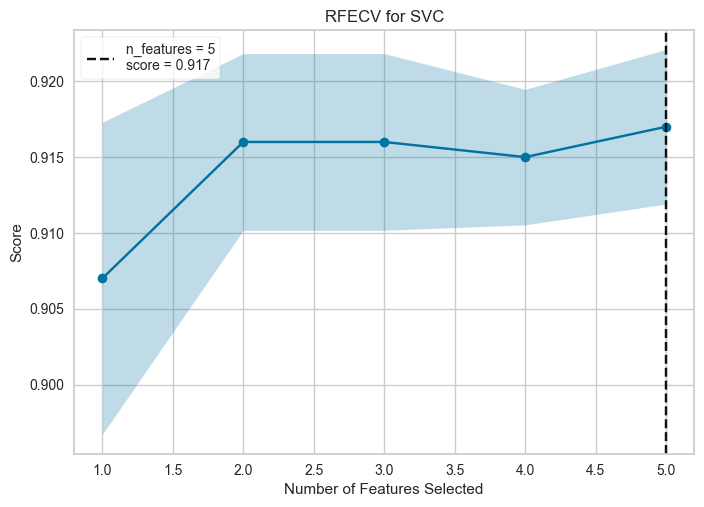

<AxesSubplot:title={'center':'RFECV for SVC'}, xlabel='Number of Features Selected', ylabel='Score'>

In [119]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV

# Create a dataset with only 3 informative features
X, y = make_classification(
    n_samples=1000, n_features=5, n_informative=2, n_redundant=2,
    n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=0,
    )

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [120]:
# In this example we can see that 5 features were selected, though there doesn’t appear to be much improvement
# in the f1 score of the model after around 2 features.
# the curve jumps to an excellent accuracy when the three informative features are captured, 
# then gradually decreases in accuracy as the non informative features are added into the model.
# to find the optimal number of features cross-validation is used with RFE to score different feature subsets
# and select the best scoring collection of features.

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

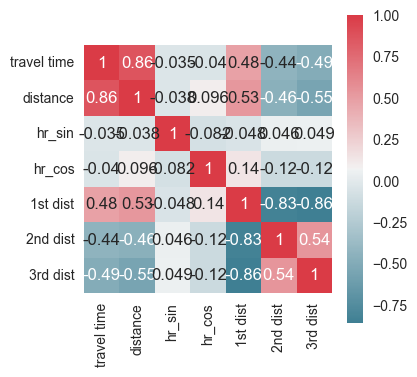

In [121]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(4,4))
corr = df7.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [122]:
x = np.array(df7[['distance','1st dist','2nd dist','3rd dist']])
y = np.array(df7['travel time'])
x

array([[0.2888266 , 0.79476932, 0.07456318, 0.06299677],
       [0.29197865, 0.86259214, 0.09120343, 0.03468969],
       [0.29124572, 0.83218341, 0.09142767, 0.03477498],
       ...,
       [0.59842351, 0.82425459, 0.12936329, 0.04638212],
       [0.60584779, 0.8142669 , 0.12779577, 0.0458201 ],
       [0.58940728, 0.83671832, 0.11294095, 0.04708347]])

In [123]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [124]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12910, 4)
(3228, 4)


In [125]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model6_1_1

Epoch 1/500
404/404 [==============================] - 1s 945us/step - loss: 701748.0625 - mape: 72.2568 - rmse: 837.7040 - val_loss: 191854.2812 - val_mape: 56.4291 - val_rmse: 438.0117
Epoch 2/500
404/404 [==============================] - 0s 813us/step - loss: 167062.3750 - mape: 55.7907 - rmse: 408.7326 - val_loss: 141072.7031 - val_mape: 52.1536 - val_rmse: 375.5965
Epoch 3/500
404/404 [==============================] - 0s 816us/step - loss: 120541.7656 - mape: 45.7500 - rmse: 347.1913 - val_loss: 100149.5938 - val_mape: 38.7512 - val_rmse: 316.4642
Epoch 4/500
404/404 [==============================] - 0s 794us/step - loss: 88650.2188 - mape: 34.5444 - rmse: 297.7419 - val_loss: 80080.6172 - val_mape: 31.2677 - val_rmse: 282.9852
Epoch 5/500
404/404 [==============================] - 0s 806us/step - loss: 76807.2812 - mape: 28.2997 - rmse: 277.1413 - val_loss: 74669.2500 - val_mape: 26.9772 - val_rmse: 273.2567
Epoch 6/500
404/404 [==============================] - 0s 808us/step 

404/404 [==============================] - 0s 801us/step - loss: 68654.9062 - mape: 23.8464 - rmse: 262.0208 - val_loss: 69189.2969 - val_mape: 24.5536 - val_rmse: 263.0386
Epoch 46/500
404/404 [==============================] - 0s 795us/step - loss: 68490.2578 - mape: 23.9768 - rmse: 261.7064 - val_loss: 69287.0859 - val_mape: 22.9221 - val_rmse: 263.2244
Epoch 47/500
404/404 [==============================] - 0s 793us/step - loss: 68490.2188 - mape: 23.6826 - rmse: 261.7064 - val_loss: 69185.2109 - val_mape: 24.7036 - val_rmse: 263.0308
Epoch 48/500
404/404 [==============================] - 0s 806us/step - loss: 68414.0000 - mape: 24.0013 - rmse: 261.5607 - val_loss: 69926.3281 - val_mape: 21.6871 - val_rmse: 264.4359
Epoch 49/500
404/404 [==============================] - 0s 796us/step - loss: 68408.7031 - mape: 23.5990 - rmse: 261.5506 - val_loss: 68950.6484 - val_mape: 23.7913 - val_rmse: 262.5846
Epoch 50/500
404/404 [==============================] - 0s 797us/step - loss: 68201

Epoch 133/500
404/404 [==============================] - 0s 800us/step - loss: 66050.5469 - mape: 22.7874 - rmse: 257.0030 - val_loss: 67012.0156 - val_mape: 23.9504 - val_rmse: 258.8668
Epoch 134/500
404/404 [==============================] - 0s 807us/step - loss: 66084.8281 - mape: 22.7782 - rmse: 257.0697 - val_loss: 66849.7500 - val_mape: 23.5858 - val_rmse: 258.5532
Epoch 135/500
404/404 [==============================] - 0s 797us/step - loss: 66092.4219 - mape: 22.8243 - rmse: 257.0845 - val_loss: 67190.8594 - val_mape: 24.2949 - val_rmse: 259.2120
Epoch 136/500
404/404 [==============================] - 0s 800us/step - loss: 66082.8125 - mape: 22.8944 - rmse: 257.0658 - val_loss: 66808.9062 - val_mape: 22.5775 - val_rmse: 258.4742
Epoch 137/500
404/404 [==============================] - 0s 800us/step - loss: 66076.2812 - mape: 22.6887 - rmse: 257.0531 - val_loss: 66881.3047 - val_mape: 23.9926 - val_rmse: 258.6142
Epoch 138/500
404/404 [==============================] - 0s 803us

Epoch 177/500
404/404 [==============================] - 0s 938us/step - loss: 66067.4922 - mape: 22.7457 - rmse: 257.0360 - val_loss: 66811.0156 - val_mape: 23.5376 - val_rmse: 258.4783
Epoch 178/500
404/404 [==============================] - 0s 939us/step - loss: 66014.1016 - mape: 22.7011 - rmse: 256.9321 - val_loss: 66813.0234 - val_mape: 23.5260 - val_rmse: 258.4821
Epoch 179/500
404/404 [==============================] - 0s 908us/step - loss: 66023.4844 - mape: 22.8165 - rmse: 256.9503 - val_loss: 66881.4766 - val_mape: 23.9889 - val_rmse: 258.6145
Epoch 180/500
404/404 [==============================] - 0s 921us/step - loss: 66022.5859 - mape: 22.8632 - rmse: 256.9486 - val_loss: 67244.1016 - val_mape: 24.5265 - val_rmse: 259.3147
Epoch 181/500
404/404 [==============================] - 0s 898us/step - loss: 66037.5078 - mape: 22.7729 - rmse: 256.9776 - val_loss: 66917.5938 - val_mape: 23.6693 - val_rmse: 258.6844
Epoch 182/500
404/404 [==============================] - 0s 916us

Epoch 221/500
404/404 [==============================] - 0s 907us/step - loss: 65811.4453 - mape: 22.6877 - rmse: 256.5374 - val_loss: 67547.2578 - val_mape: 25.2548 - val_rmse: 259.8986
Epoch 222/500
404/404 [==============================] - 0s 967us/step - loss: 66056.7969 - mape: 22.8234 - rmse: 257.0152 - val_loss: 66792.8984 - val_mape: 23.4927 - val_rmse: 258.4432
Epoch 223/500
404/404 [==============================] - 0s 945us/step - loss: 65933.2188 - mape: 22.8213 - rmse: 256.7747 - val_loss: 66771.2344 - val_mape: 22.9411 - val_rmse: 258.4013
Epoch 224/500
404/404 [==============================] - 0s 1ms/step - loss: 66008.1641 - mape: 22.6493 - rmse: 256.9205 - val_loss: 66797.9219 - val_mape: 23.6083 - val_rmse: 258.4529
Epoch 225/500
404/404 [==============================] - 0s 947us/step - loss: 65988.0312 - mape: 22.7852 - rmse: 256.8813 - val_loss: 66770.5312 - val_mape: 22.7992 - val_rmse: 258.3999
Epoch 226/500
404/404 [==============================] - 0s 962us/s

Epoch 265/500
404/404 [==============================] - 0s 813us/step - loss: 65924.9297 - mape: 22.8185 - rmse: 256.7585 - val_loss: 66747.9453 - val_mape: 22.9238 - val_rmse: 258.3562
Epoch 266/500
404/404 [==============================] - 0s 795us/step - loss: 65958.7734 - mape: 22.6854 - rmse: 256.8244 - val_loss: 67008.8828 - val_mape: 24.1403 - val_rmse: 258.8607
Epoch 267/500
404/404 [==============================] - 0s 783us/step - loss: 65971.4844 - mape: 22.7497 - rmse: 256.8492 - val_loss: 66928.1562 - val_mape: 23.7267 - val_rmse: 258.7048
Epoch 268/500
404/404 [==============================] - 0s 797us/step - loss: 66006.3047 - mape: 22.7246 - rmse: 256.9169 - val_loss: 67575.4609 - val_mape: 24.9589 - val_rmse: 259.9528
Epoch 269/500
404/404 [==============================] - 0s 803us/step - loss: 65986.0312 - mape: 22.7134 - rmse: 256.8775 - val_loss: 66846.2578 - val_mape: 23.7707 - val_rmse: 258.5464
Epoch 270/500
404/404 [==============================] - 0s 797us

Epoch 309/500
404/404 [==============================] - 0s 811us/step - loss: 65935.3359 - mape: 22.7301 - rmse: 256.7788 - val_loss: 66880.3125 - val_mape: 23.9241 - val_rmse: 258.6123
Epoch 310/500
404/404 [==============================] - 0s 796us/step - loss: 65949.0000 - mape: 22.7440 - rmse: 256.8054 - val_loss: 66900.4531 - val_mape: 23.6330 - val_rmse: 258.6512
Epoch 311/500
404/404 [==============================] - 0s 812us/step - loss: 65976.9922 - mape: 22.6805 - rmse: 256.8599 - val_loss: 66997.6797 - val_mape: 24.0803 - val_rmse: 258.8391
Epoch 312/500
404/404 [==============================] - 0s 810us/step - loss: 65970.7422 - mape: 22.7713 - rmse: 256.8477 - val_loss: 66839.0859 - val_mape: 23.5561 - val_rmse: 258.5326
Epoch 313/500
404/404 [==============================] - 0s 810us/step - loss: 65932.7188 - mape: 22.6779 - rmse: 256.7737 - val_loss: 66764.6250 - val_mape: 22.9551 - val_rmse: 258.3885
Epoch 314/500
404/404 [==============================] - 0s 802us

Epoch 353/500
404/404 [==============================] - 0s 811us/step - loss: 65891.9766 - mape: 22.6615 - rmse: 256.6943 - val_loss: 66835.1797 - val_mape: 23.7470 - val_rmse: 258.5250
Epoch 354/500
404/404 [==============================] - 0s 847us/step - loss: 65869.3906 - mape: 22.7169 - rmse: 256.6503 - val_loss: 66806.6250 - val_mape: 23.7156 - val_rmse: 258.4698
Epoch 355/500
404/404 [==============================] - 0s 832us/step - loss: 65907.3438 - mape: 22.7544 - rmse: 256.7242 - val_loss: 66753.4531 - val_mape: 23.2023 - val_rmse: 258.3669
Epoch 356/500
404/404 [==============================] - 0s 811us/step - loss: 65911.4844 - mape: 22.6929 - rmse: 256.7323 - val_loss: 66743.5156 - val_mape: 22.7007 - val_rmse: 258.3477
Epoch 357/500
404/404 [==============================] - 0s 808us/step - loss: 65902.7109 - mape: 22.6911 - rmse: 256.7152 - val_loss: 66903.3984 - val_mape: 23.8724 - val_rmse: 258.6569
Epoch 358/500
404/404 [==============================] - 0s 808us

Epoch 397/500
404/404 [==============================] - 0s 801us/step - loss: 65853.7969 - mape: 22.6946 - rmse: 256.6199 - val_loss: 66955.2031 - val_mape: 23.8333 - val_rmse: 258.7570
Epoch 398/500
404/404 [==============================] - 0s 799us/step - loss: 65859.5859 - mape: 22.5970 - rmse: 256.6312 - val_loss: 66811.6953 - val_mape: 23.3633 - val_rmse: 258.4796
Epoch 399/500
404/404 [==============================] - 0s 797us/step - loss: 65874.8203 - mape: 22.7727 - rmse: 256.6609 - val_loss: 66712.6406 - val_mape: 22.9136 - val_rmse: 258.2879
Epoch 400/500
404/404 [==============================] - 0s 810us/step - loss: 65867.9609 - mape: 22.6797 - rmse: 256.6476 - val_loss: 67013.3906 - val_mape: 24.0021 - val_rmse: 258.8694
Epoch 401/500
404/404 [==============================] - 0s 806us/step - loss: 65906.9609 - mape: 22.6204 - rmse: 256.7235 - val_loss: 66756.3359 - val_mape: 23.5337 - val_rmse: 258.3725
Epoch 402/500
404/404 [==============================] - 0s 798us

Epoch 441/500
404/404 [==============================] - 0s 807us/step - loss: 65897.4922 - mape: 22.6367 - rmse: 256.7051 - val_loss: 66773.2500 - val_mape: 23.6667 - val_rmse: 258.4052
Epoch 442/500
404/404 [==============================] - 0s 808us/step - loss: 65841.9141 - mape: 22.7083 - rmse: 256.5968 - val_loss: 67051.6953 - val_mape: 24.2868 - val_rmse: 258.9434
Epoch 443/500
404/404 [==============================] - 0s 805us/step - loss: 65885.8516 - mape: 22.6833 - rmse: 256.6824 - val_loss: 66811.7422 - val_mape: 23.8280 - val_rmse: 258.4797
Epoch 444/500
404/404 [==============================] - 0s 800us/step - loss: 65806.5391 - mape: 22.6764 - rmse: 256.5279 - val_loss: 67650.4219 - val_mape: 24.9765 - val_rmse: 260.0970
Epoch 445/500
404/404 [==============================] - 0s 794us/step - loss: 65873.5312 - mape: 22.5940 - rmse: 256.6584 - val_loss: 67240.1406 - val_mape: 24.8635 - val_rmse: 259.3070
Epoch 446/500
404/404 [==============================] - 0s 798us

Epoch 485/500
404/404 [==============================] - 0s 788us/step - loss: 65822.2031 - mape: 22.6667 - rmse: 256.5584 - val_loss: 67293.1797 - val_mape: 24.5728 - val_rmse: 259.4093
Epoch 486/500
404/404 [==============================] - 0s 804us/step - loss: 65809.2344 - mape: 22.5911 - rmse: 256.5331 - val_loss: 66806.0312 - val_mape: 23.7050 - val_rmse: 258.4686
Epoch 487/500
404/404 [==============================] - 0s 798us/step - loss: 65761.1719 - mape: 22.7490 - rmse: 256.4394 - val_loss: 66772.4922 - val_mape: 22.1207 - val_rmse: 258.4037
Epoch 488/500
404/404 [==============================] - 0s 805us/step - loss: 65821.0000 - mape: 22.5446 - rmse: 256.5560 - val_loss: 66771.2891 - val_mape: 23.8529 - val_rmse: 258.4014
Epoch 489/500
404/404 [==============================] - 0s 807us/step - loss: 65812.3203 - mape: 22.6961 - rmse: 256.5391 - val_loss: 66704.1172 - val_mape: 23.4771 - val_rmse: 258.2714
Epoch 490/500
404/404 [==============================] - 0s 794us

In [126]:
# plotme(model6_1_1)

In [127]:
# inputs: distance + hour + 1st dist + 2nd dist + 3rd dist
model6_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model6_1_2

Epoch 1/500
404/404 [==============================] - 1s 1ms/step - loss: 540584.6875 - mape: 67.8901 - rmse: 735.2446 - val_loss: 164299.5156 - val_mape: 57.3941 - val_rmse: 405.3388
Epoch 2/500
404/404 [==============================] - 0s 879us/step - loss: 127521.6406 - mape: 47.1236 - rmse: 357.1017 - val_loss: 94156.0312 - val_mape: 37.2741 - val_rmse: 306.8485
Epoch 3/500
404/404 [==============================] - 0s 892us/step - loss: 81798.8828 - mape: 31.0233 - rmse: 286.0050 - val_loss: 75184.6406 - val_mape: 27.6457 - val_rmse: 274.1982
Epoch 4/500
404/404 [==============================] - 0s 887us/step - loss: 73418.3906 - mape: 25.9238 - rmse: 270.9583 - val_loss: 72377.4062 - val_mape: 25.6208 - val_rmse: 269.0305
Epoch 5/500
404/404 [==============================] - 0s 880us/step - loss: 71493.1484 - mape: 24.9810 - rmse: 267.3820 - val_loss: 71406.0938 - val_mape: 25.0707 - val_rmse: 267.2192
Epoch 6/500
404/404 [==============================] - 0s 879us/step - los

404/404 [==============================] - 1s 1ms/step - loss: 66114.3047 - mape: 22.8856 - rmse: 257.1270 - val_loss: 67140.7188 - val_mape: 23.5199 - val_rmse: 259.1153
Epoch 90/500
404/404 [==============================] - 0s 991us/step - loss: 66253.7344 - mape: 22.8209 - rmse: 257.3980 - val_loss: 67302.6484 - val_mape: 24.4998 - val_rmse: 259.4276
Epoch 91/500
404/404 [==============================] - 0s 955us/step - loss: 66060.6406 - mape: 22.6623 - rmse: 257.0226 - val_loss: 66912.9688 - val_mape: 24.1490 - val_rmse: 258.6754
Epoch 92/500
404/404 [==============================] - 0s 946us/step - loss: 66050.8281 - mape: 22.8529 - rmse: 257.0036 - val_loss: 66745.7891 - val_mape: 22.6456 - val_rmse: 258.3521
Epoch 93/500
404/404 [==============================] - 0s 943us/step - loss: 66094.9453 - mape: 22.7955 - rmse: 257.0894 - val_loss: 66797.0938 - val_mape: 23.2991 - val_rmse: 258.4513
Epoch 94/500
404/404 [==============================] - 0s 989us/step - loss: 66090.4

Epoch 177/500
404/404 [==============================] - 0s 879us/step - loss: 65839.6172 - mape: 22.6926 - rmse: 256.5923 - val_loss: 66661.8672 - val_mape: 23.3645 - val_rmse: 258.1896
Epoch 178/500
404/404 [==============================] - 0s 881us/step - loss: 65835.0703 - mape: 22.7410 - rmse: 256.5835 - val_loss: 66942.2969 - val_mape: 24.4915 - val_rmse: 258.7321
Epoch 179/500
404/404 [==============================] - 0s 869us/step - loss: 65872.8438 - mape: 22.8297 - rmse: 256.6570 - val_loss: 66734.0703 - val_mape: 21.8947 - val_rmse: 258.3294
Epoch 180/500
404/404 [==============================] - 0s 878us/step - loss: 65907.5312 - mape: 22.6712 - rmse: 256.7246 - val_loss: 66696.1953 - val_mape: 22.1899 - val_rmse: 258.2561
Epoch 181/500
404/404 [==============================] - 0s 832us/step - loss: 65902.7266 - mape: 22.6187 - rmse: 256.7153 - val_loss: 66768.4688 - val_mape: 23.8973 - val_rmse: 258.3960
Epoch 182/500
404/404 [==============================] - 0s 850us

Epoch 221/500
404/404 [==============================] - 0s 904us/step - loss: 65867.3906 - mape: 22.6724 - rmse: 256.6464 - val_loss: 66643.7734 - val_mape: 23.3473 - val_rmse: 258.1545
Epoch 222/500
404/404 [==============================] - 0s 883us/step - loss: 65797.5312 - mape: 22.6987 - rmse: 256.5103 - val_loss: 67089.2266 - val_mape: 24.2251 - val_rmse: 259.0159
Epoch 223/500
404/404 [==============================] - 0s 875us/step - loss: 66019.6562 - mape: 22.6982 - rmse: 256.9429 - val_loss: 66767.6641 - val_mape: 23.4286 - val_rmse: 258.3944
Epoch 224/500
404/404 [==============================] - 0s 873us/step - loss: 65797.9531 - mape: 22.6300 - rmse: 256.5111 - val_loss: 66759.6484 - val_mape: 23.9472 - val_rmse: 258.3789
Epoch 225/500
404/404 [==============================] - 0s 870us/step - loss: 65903.5625 - mape: 22.6551 - rmse: 256.7169 - val_loss: 66778.1797 - val_mape: 23.9660 - val_rmse: 258.4147
Epoch 226/500
404/404 [==============================] - 0s 896us

Epoch 265/500
404/404 [==============================] - 0s 951us/step - loss: 65855.0625 - mape: 22.6605 - rmse: 256.6224 - val_loss: 66617.4453 - val_mape: 23.1527 - val_rmse: 258.1035
Epoch 266/500
404/404 [==============================] - 0s 951us/step - loss: 65791.2188 - mape: 22.7236 - rmse: 256.4980 - val_loss: 66674.8359 - val_mape: 22.0916 - val_rmse: 258.2147
Epoch 267/500
404/404 [==============================] - 0s 956us/step - loss: 65839.3594 - mape: 22.6457 - rmse: 256.5918 - val_loss: 66868.1172 - val_mape: 21.4159 - val_rmse: 258.5887
Epoch 268/500
404/404 [==============================] - 0s 960us/step - loss: 65968.0781 - mape: 22.7466 - rmse: 256.8425 - val_loss: 66641.4609 - val_mape: 23.0195 - val_rmse: 258.1501
Epoch 269/500
404/404 [==============================] - 0s 947us/step - loss: 65829.3672 - mape: 22.6891 - rmse: 256.5724 - val_loss: 66647.3828 - val_mape: 22.6545 - val_rmse: 258.1615
Epoch 270/500
404/404 [==============================] - 0s 960us

Epoch 309/500
404/404 [==============================] - 0s 955us/step - loss: 65839.3906 - mape: 22.7122 - rmse: 256.5919 - val_loss: 66648.5859 - val_mape: 22.1740 - val_rmse: 258.1639
Epoch 310/500
404/404 [==============================] - 0s 950us/step - loss: 65835.8516 - mape: 22.6421 - rmse: 256.5850 - val_loss: 67059.4062 - val_mape: 21.2585 - val_rmse: 258.9583
Epoch 311/500
404/404 [==============================] - 0s 958us/step - loss: 65746.8672 - mape: 22.6712 - rmse: 256.4115 - val_loss: 67502.2188 - val_mape: 20.5124 - val_rmse: 259.8119
Epoch 312/500
404/404 [==============================] - 0s 946us/step - loss: 65927.7969 - mape: 22.5730 - rmse: 256.7641 - val_loss: 67553.1875 - val_mape: 25.4641 - val_rmse: 259.9100
Epoch 313/500
404/404 [==============================] - 0s 956us/step - loss: 65863.6172 - mape: 22.6923 - rmse: 256.6391 - val_loss: 66634.8203 - val_mape: 22.7451 - val_rmse: 258.1372
Epoch 314/500
404/404 [==============================] - 0s 962us

Epoch 353/500
404/404 [==============================] - 0s 983us/step - loss: 65821.1719 - mape: 22.7978 - rmse: 256.5564 - val_loss: 66579.1094 - val_mape: 22.4364 - val_rmse: 258.0293
Epoch 354/500
404/404 [==============================] - 0s 951us/step - loss: 65792.4141 - mape: 22.6646 - rmse: 256.5003 - val_loss: 66639.6719 - val_mape: 22.9281 - val_rmse: 258.1466
Epoch 355/500
404/404 [==============================] - 0s 1ms/step - loss: 65901.9219 - mape: 22.6211 - rmse: 256.7137 - val_loss: 66790.0703 - val_mape: 24.2785 - val_rmse: 258.4377
Epoch 356/500
404/404 [==============================] - 0s 962us/step - loss: 65786.1406 - mape: 22.5970 - rmse: 256.4881 - val_loss: 66764.9297 - val_mape: 23.9128 - val_rmse: 258.3891
Epoch 357/500
404/404 [==============================] - 0s 965us/step - loss: 65854.7578 - mape: 22.6917 - rmse: 256.6218 - val_loss: 66638.2578 - val_mape: 23.5323 - val_rmse: 258.1439
Epoch 358/500
404/404 [==============================] - 0s 963us/s

Epoch 397/500
404/404 [==============================] - 0s 984us/step - loss: 65717.0312 - mape: 22.7673 - rmse: 256.3533 - val_loss: 67219.4609 - val_mape: 24.6158 - val_rmse: 259.2672
Epoch 398/500
404/404 [==============================] - 0s 945us/step - loss: 65777.7578 - mape: 22.6196 - rmse: 256.4717 - val_loss: 66587.7891 - val_mape: 23.5918 - val_rmse: 258.0461
Epoch 399/500
404/404 [==============================] - 0s 975us/step - loss: 65815.6875 - mape: 22.7182 - rmse: 256.5457 - val_loss: 66787.6406 - val_mape: 23.4248 - val_rmse: 258.4330
Epoch 400/500
404/404 [==============================] - 0s 955us/step - loss: 65835.2266 - mape: 22.6083 - rmse: 256.5838 - val_loss: 66675.2656 - val_mape: 21.6584 - val_rmse: 258.2155
Epoch 401/500
404/404 [==============================] - 0s 958us/step - loss: 65863.2578 - mape: 22.6503 - rmse: 256.6384 - val_loss: 66682.1484 - val_mape: 23.7547 - val_rmse: 258.2289
Epoch 402/500
404/404 [==============================] - 0s 954us

Epoch 441/500
404/404 [==============================] - 0s 948us/step - loss: 65772.4688 - mape: 22.5303 - rmse: 256.4614 - val_loss: 66582.6797 - val_mape: 22.4887 - val_rmse: 258.0362
Epoch 442/500
404/404 [==============================] - 0s 954us/step - loss: 65873.6406 - mape: 22.6332 - rmse: 256.6586 - val_loss: 66537.4531 - val_mape: 23.3738 - val_rmse: 257.9485
Epoch 443/500
404/404 [==============================] - 0s 945us/step - loss: 65793.4297 - mape: 22.7018 - rmse: 256.5023 - val_loss: 67096.6562 - val_mape: 24.7853 - val_rmse: 259.0302
Epoch 444/500
404/404 [==============================] - 0s 953us/step - loss: 65782.3203 - mape: 22.7067 - rmse: 256.4807 - val_loss: 66673.9766 - val_mape: 23.3791 - val_rmse: 258.2130
Epoch 445/500
404/404 [==============================] - 0s 950us/step - loss: 65831.0469 - mape: 22.5925 - rmse: 256.5756 - val_loss: 66653.9062 - val_mape: 23.6716 - val_rmse: 258.1742
Epoch 446/500
404/404 [==============================] - 0s 960us

Epoch 485/500
404/404 [==============================] - 0s 960us/step - loss: 65822.5000 - mape: 22.7220 - rmse: 256.5590 - val_loss: 66507.0938 - val_mape: 22.6074 - val_rmse: 257.8897
Epoch 486/500
404/404 [==============================] - 0s 964us/step - loss: 65784.6953 - mape: 22.6615 - rmse: 256.4853 - val_loss: 66546.8984 - val_mape: 22.3114 - val_rmse: 257.9669
Epoch 487/500
404/404 [==============================] - 0s 960us/step - loss: 65725.5625 - mape: 22.6304 - rmse: 256.3700 - val_loss: 66558.5547 - val_mape: 22.2368 - val_rmse: 257.9894
Epoch 488/500
404/404 [==============================] - 0s 955us/step - loss: 65781.7266 - mape: 22.5845 - rmse: 256.4795 - val_loss: 67297.0234 - val_mape: 24.6247 - val_rmse: 259.4167
Epoch 489/500
404/404 [==============================] - 0s 948us/step - loss: 65867.4766 - mape: 22.5768 - rmse: 256.6466 - val_loss: 66605.7031 - val_mape: 23.8892 - val_rmse: 258.0808
Epoch 490/500
404/404 [==============================] - 0s 951us

In [128]:
194.6574/60

3.24429

In [129]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model6_1_3

Epoch 1/500
404/404 [==============================] - 1s 897us/step - loss: 1071924.2500 - mape: 98.9457 - rmse: 1035.3378 - val_loss: 1020409.0000 - val_mape: 96.9782 - val_rmse: 1010.1530
Epoch 2/500
404/404 [==============================] - 0s 765us/step - loss: 1003576.3125 - mape: 93.3275 - rmse: 1001.7866 - val_loss: 924997.0000 - val_mape: 88.7500 - val_rmse: 961.7676
Epoch 3/500
404/404 [==============================] - 0s 751us/step - loss: 885383.3125 - mape: 83.0034 - rmse: 940.9481 - val_loss: 792499.1250 - val_mape: 76.4109 - val_rmse: 890.2242
Epoch 4/500
404/404 [==============================] - 0s 761us/step - loss: 741227.4375 - mape: 69.3257 - rmse: 860.9457 - val_loss: 646220.4375 - val_mape: 61.2533 - val_rmse: 803.8784
Epoch 5/500
404/404 [==============================] - 0s 769us/step - loss: 593469.3750 - mape: 53.8002 - rmse: 770.3696 - val_loss: 506789.4062 - val_mape: 45.6134 - val_rmse: 711.8914
Epoch 6/500
404/404 [==============================] - 0s 7

Epoch 45/500
404/404 [==============================] - 0s 765us/step - loss: 70791.5938 - mape: 24.6747 - rmse: 266.0669 - val_loss: 71171.1562 - val_mape: 24.9108 - val_rmse: 266.7792
Epoch 46/500
404/404 [==============================] - 0s 765us/step - loss: 70721.0547 - mape: 24.5913 - rmse: 265.9343 - val_loss: 71119.4531 - val_mape: 24.9481 - val_rmse: 266.6823
Epoch 47/500
404/404 [==============================] - 0s 756us/step - loss: 70643.7578 - mape: 24.5148 - rmse: 265.7889 - val_loss: 71088.4297 - val_mape: 25.1123 - val_rmse: 266.6241
Epoch 48/500
404/404 [==============================] - 0s 765us/step - loss: 70599.0938 - mape: 24.6059 - rmse: 265.7049 - val_loss: 71029.6172 - val_mape: 24.9284 - val_rmse: 266.5138
Epoch 49/500
404/404 [==============================] - 0s 769us/step - loss: 70541.6953 - mape: 24.6613 - rmse: 265.5969 - val_loss: 70996.4609 - val_mape: 24.3886 - val_rmse: 266.4516
Epoch 50/500
404/404 [==============================] - 0s 756us/step 

404/404 [==============================] - 0s 845us/step - loss: 70110.0156 - mape: 24.2732 - rmse: 264.7830 - val_loss: 70606.9219 - val_mape: 24.7825 - val_rmse: 265.7196
Epoch 90/500
404/404 [==============================] - 0s 843us/step - loss: 70097.1562 - mape: 24.3804 - rmse: 264.7587 - val_loss: 70613.1250 - val_mape: 24.9029 - val_rmse: 265.7313
Epoch 91/500
404/404 [==============================] - 0s 843us/step - loss: 70093.8984 - mape: 24.3714 - rmse: 264.7525 - val_loss: 70592.9453 - val_mape: 24.4015 - val_rmse: 265.6933
Epoch 92/500
404/404 [==============================] - 0s 846us/step - loss: 70099.7734 - mape: 24.2553 - rmse: 264.7636 - val_loss: 70607.1562 - val_mape: 24.9172 - val_rmse: 265.7201
Epoch 93/500
404/404 [==============================] - 0s 842us/step - loss: 70099.7031 - mape: 24.2374 - rmse: 264.7635 - val_loss: 70620.8828 - val_mape: 25.0582 - val_rmse: 265.7459
Epoch 94/500
404/404 [==============================] - 0s 841us/step - loss: 70095

Epoch 133/500
404/404 [==============================] - 0s 727us/step - loss: 70047.2031 - mape: 24.2583 - rmse: 264.6643 - val_loss: 70514.2344 - val_mape: 24.9016 - val_rmse: 265.5452
Epoch 134/500
404/404 [==============================] - 0s 745us/step - loss: 70048.3438 - mape: 24.2365 - rmse: 264.6665 - val_loss: 70535.8828 - val_mape: 25.0793 - val_rmse: 265.5859
Epoch 135/500
404/404 [==============================] - 0s 806us/step - loss: 70055.5625 - mape: 24.3982 - rmse: 264.6801 - val_loss: 70490.0078 - val_mape: 24.5242 - val_rmse: 265.4995
Epoch 136/500
404/404 [==============================] - 0s 739us/step - loss: 70038.7266 - mape: 24.2779 - rmse: 264.6483 - val_loss: 70490.2578 - val_mape: 24.3915 - val_rmse: 265.5000
Epoch 137/500
404/404 [==============================] - 0s 738us/step - loss: 70035.6250 - mape: 24.3429 - rmse: 264.6425 - val_loss: 70490.3906 - val_mape: 24.3471 - val_rmse: 265.5003
Epoch 138/500
404/404 [==============================] - 0s 732us

Epoch 177/500
404/404 [==============================] - 0s 834us/step - loss: 70019.0547 - mape: 24.2599 - rmse: 264.6111 - val_loss: 70475.6172 - val_mape: 24.9338 - val_rmse: 265.4724
Epoch 178/500
404/404 [==============================] - 0s 717us/step - loss: 70022.1562 - mape: 24.2597 - rmse: 264.6170 - val_loss: 70476.9844 - val_mape: 24.9595 - val_rmse: 265.4750
Epoch 179/500
404/404 [==============================] - 0s 738us/step - loss: 70027.4844 - mape: 24.3310 - rmse: 264.6271 - val_loss: 70452.2266 - val_mape: 24.6883 - val_rmse: 265.4284
Epoch 180/500
404/404 [==============================] - 0s 717us/step - loss: 70020.2500 - mape: 24.2067 - rmse: 264.6134 - val_loss: 70460.2656 - val_mape: 24.8119 - val_rmse: 265.4435
Epoch 181/500
404/404 [==============================] - 0s 694us/step - loss: 70023.0312 - mape: 24.2609 - rmse: 264.6187 - val_loss: 70492.5391 - val_mape: 25.0784 - val_rmse: 265.5043
Epoch 182/500
404/404 [==============================] - 0s 725us

Epoch 221/500
404/404 [==============================] - 0s 731us/step - loss: 69998.5469 - mape: 24.2794 - rmse: 264.5724 - val_loss: 70430.9375 - val_mape: 24.7086 - val_rmse: 265.3883
Epoch 222/500
404/404 [==============================] - 0s 745us/step - loss: 69978.1875 - mape: 24.1667 - rmse: 264.5339 - val_loss: 70475.0703 - val_mape: 25.1153 - val_rmse: 265.4714
Epoch 223/500
404/404 [==============================] - 0s 772us/step - loss: 69995.0234 - mape: 24.2426 - rmse: 264.5657 - val_loss: 70470.9062 - val_mape: 25.0829 - val_rmse: 265.4636
Epoch 224/500
404/404 [==============================] - 0s 774us/step - loss: 69994.9219 - mape: 24.3015 - rmse: 264.5655 - val_loss: 70443.2500 - val_mape: 24.8789 - val_rmse: 265.4115
Epoch 225/500
404/404 [==============================] - 0s 705us/step - loss: 69996.1172 - mape: 24.3246 - rmse: 264.5678 - val_loss: 70424.3359 - val_mape: 24.5923 - val_rmse: 265.3758
Epoch 226/500
404/404 [==============================] - 0s 720us

Epoch 265/500
404/404 [==============================] - 0s 760us/step - loss: 69979.2891 - mape: 24.3396 - rmse: 264.5360 - val_loss: 70410.9844 - val_mape: 24.3902 - val_rmse: 265.3507
Epoch 266/500
404/404 [==============================] - 0s 739us/step - loss: 69972.6562 - mape: 24.1253 - rmse: 264.5234 - val_loss: 70446.3047 - val_mape: 25.0358 - val_rmse: 265.4172
Epoch 267/500
404/404 [==============================] - 0s 754us/step - loss: 69985.3828 - mape: 24.3041 - rmse: 264.5475 - val_loss: 70430.5781 - val_mape: 24.9205 - val_rmse: 265.3876
Epoch 268/500
404/404 [==============================] - 0s 726us/step - loss: 69986.3672 - mape: 24.3171 - rmse: 264.5494 - val_loss: 70415.1250 - val_mape: 24.7387 - val_rmse: 265.3585
Epoch 269/500
404/404 [==============================] - 0s 747us/step - loss: 69968.1172 - mape: 24.2481 - rmse: 264.5149 - val_loss: 70410.0781 - val_mape: 24.6671 - val_rmse: 265.3490
Epoch 270/500
404/404 [==============================] - 0s 728us

Epoch 309/500
404/404 [==============================] - 0s 730us/step - loss: 69951.5625 - mape: 24.3807 - rmse: 264.4836 - val_loss: 70397.9453 - val_mape: 24.3311 - val_rmse: 265.3261
Epoch 310/500
404/404 [==============================] - 0s 715us/step - loss: 69967.9062 - mape: 24.0472 - rmse: 264.5145 - val_loss: 70419.6094 - val_mape: 24.9420 - val_rmse: 265.3669
Epoch 311/500
404/404 [==============================] - 0s 732us/step - loss: 69960.5625 - mape: 24.3846 - rmse: 264.5006 - val_loss: 70397.3594 - val_mape: 24.6863 - val_rmse: 265.3250
Epoch 312/500
404/404 [==============================] - 0s 756us/step - loss: 69966.3359 - mape: 24.2733 - rmse: 264.5115 - val_loss: 70391.9219 - val_mape: 24.5118 - val_rmse: 265.3148
Epoch 313/500
404/404 [==============================] - 0s 713us/step - loss: 69965.4922 - mape: 24.2068 - rmse: 264.5099 - val_loss: 70398.5391 - val_mape: 24.7113 - val_rmse: 265.3272
Epoch 314/500
404/404 [==============================] - 0s 709us

Epoch 353/500
404/404 [==============================] - 0s 758us/step - loss: 69944.9766 - mape: 24.0886 - rmse: 264.4711 - val_loss: 70439.2031 - val_mape: 25.1441 - val_rmse: 265.4038
Epoch 354/500
404/404 [==============================] - 0s 734us/step - loss: 69965.1562 - mape: 24.2809 - rmse: 264.5093 - val_loss: 70409.7266 - val_mape: 24.9592 - val_rmse: 265.3483
Epoch 355/500
404/404 [==============================] - 0s 735us/step - loss: 69941.1406 - mape: 24.3510 - rmse: 264.4639 - val_loss: 70382.2969 - val_mape: 24.4453 - val_rmse: 265.2966
Epoch 356/500
404/404 [==============================] - 0s 727us/step - loss: 69950.0859 - mape: 24.1643 - rmse: 264.4808 - val_loss: 70386.4062 - val_mape: 24.6919 - val_rmse: 265.3044
Epoch 357/500
404/404 [==============================] - 0s 735us/step - loss: 69943.2969 - mape: 24.2428 - rmse: 264.4680 - val_loss: 70396.2891 - val_mape: 24.8306 - val_rmse: 265.3230
Epoch 358/500
404/404 [==============================] - 0s 711us

Epoch 397/500
404/404 [==============================] - 0s 726us/step - loss: 69934.2891 - mape: 24.1993 - rmse: 264.4509 - val_loss: 70377.0625 - val_mape: 24.6971 - val_rmse: 265.2867
Epoch 398/500
404/404 [==============================] - 0s 708us/step - loss: 69927.9531 - mape: 24.1675 - rmse: 264.4389 - val_loss: 70403.0312 - val_mape: 24.9726 - val_rmse: 265.3357
Epoch 399/500
404/404 [==============================] - 0s 715us/step - loss: 69935.3359 - mape: 24.3496 - rmse: 264.4529 - val_loss: 70371.0312 - val_mape: 24.4466 - val_rmse: 265.2754
Epoch 400/500
404/404 [==============================] - 0s 705us/step - loss: 69929.7891 - mape: 24.2830 - rmse: 264.4424 - val_loss: 70370.9922 - val_mape: 24.4394 - val_rmse: 265.2753
Epoch 401/500
404/404 [==============================] - 0s 753us/step - loss: 69938.2344 - mape: 24.2328 - rmse: 264.4584 - val_loss: 70371.1797 - val_mape: 24.5411 - val_rmse: 265.2757
Epoch 402/500
404/404 [==============================] - 0s 723us

Epoch 441/500
404/404 [==============================] - 0s 744us/step - loss: 69940.0938 - mape: 24.0692 - rmse: 264.4619 - val_loss: 70363.8125 - val_mape: 24.4953 - val_rmse: 265.2618
Epoch 442/500
404/404 [==============================] - 0s 728us/step - loss: 69917.5234 - mape: 24.1805 - rmse: 264.4192 - val_loss: 70381.0625 - val_mape: 24.8522 - val_rmse: 265.2943
Epoch 443/500
404/404 [==============================] - 0s 769us/step - loss: 69918.1250 - mape: 24.3895 - rmse: 264.4203 - val_loss: 70366.3672 - val_mape: 24.3282 - val_rmse: 265.2666
Epoch 444/500
404/404 [==============================] - 0s 785us/step - loss: 69926.5078 - mape: 24.2043 - rmse: 264.4362 - val_loss: 70363.8359 - val_mape: 24.5845 - val_rmse: 265.2618
Epoch 445/500
404/404 [==============================] - 0s 809us/step - loss: 69920.1719 - mape: 24.2948 - rmse: 264.4242 - val_loss: 70364.7578 - val_mape: 24.3452 - val_rmse: 265.2635
Epoch 446/500
404/404 [==============================] - 0s 728us

Epoch 485/500
404/404 [==============================] - 0s 755us/step - loss: 69918.0938 - mape: 24.2949 - rmse: 264.4203 - val_loss: 70368.4141 - val_mape: 24.7979 - val_rmse: 265.2704
Epoch 486/500
404/404 [==============================] - 0s 727us/step - loss: 69924.7812 - mape: 24.2291 - rmse: 264.4330 - val_loss: 70363.2656 - val_mape: 24.7157 - val_rmse: 265.2607
Epoch 487/500
404/404 [==============================] - 0s 758us/step - loss: 69905.7266 - mape: 24.2307 - rmse: 264.3969 - val_loss: 70388.8281 - val_mape: 24.9820 - val_rmse: 265.3089
Epoch 488/500
404/404 [==============================] - 0s 723us/step - loss: 69900.1094 - mape: 24.2963 - rmse: 264.3863 - val_loss: 70356.6484 - val_mape: 24.5506 - val_rmse: 265.2483
Epoch 489/500
404/404 [==============================] - 0s 763us/step - loss: 69915.6250 - mape: 24.1959 - rmse: 264.4156 - val_loss: 70376.1641 - val_mape: 24.8650 - val_rmse: 265.2851
Epoch 490/500
404/404 [==============================] - 0s 774us

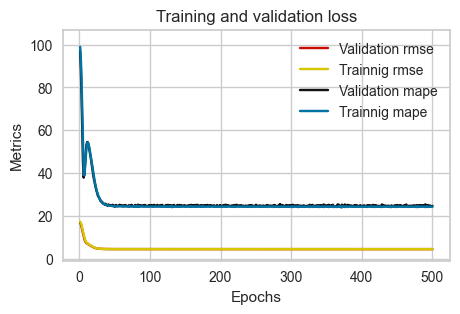

In [130]:
plotme(model6_1_3)

In [131]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model6_1_4

Epoch 1/500
404/404 [==============================] - 1s 859us/step - loss: 1080095.0000 - mape: 99.5873 - rmse: 1039.2762 - val_loss: 1045005.2500 - val_mape: 98.9963 - val_rmse: 1022.2550
Epoch 2/500
404/404 [==============================] - 0s 728us/step - loss: 1060664.1250 - mape: 98.0051 - rmse: 1029.8855 - val_loss: 1018520.8750 - val_mape: 96.7742 - val_rmse: 1009.2180
Epoch 3/500
404/404 [==============================] - 0s 721us/step - loss: 1026885.8125 - mape: 95.2224 - rmse: 1013.3538 - val_loss: 979047.5625 - val_mape: 93.4047 - val_rmse: 989.4683
Epoch 4/500
404/404 [==============================] - 0s 711us/step - loss: 981329.5000 - mape: 91.3811 - rmse: 990.6208 - val_loss: 929455.1250 - val_mape: 89.0539 - val_rmse: 964.0825
Epoch 5/500
404/404 [==============================] - 0s 699us/step - loss: 926834.3125 - mape: 86.6341 - rmse: 962.7224 - val_loss: 872431.8125 - val_mape: 83.8700 - val_rmse: 934.0406
Epoch 6/500
404/404 [==============================] - 

404/404 [==============================] - 0s 745us/step - loss: 71162.5469 - mape: 24.6988 - rmse: 266.7631 - val_loss: 71568.5078 - val_mape: 25.1469 - val_rmse: 267.5229
Epoch 89/500
404/404 [==============================] - 0s 740us/step - loss: 71111.4531 - mape: 24.8161 - rmse: 266.6673 - val_loss: 71523.1328 - val_mape: 25.0812 - val_rmse: 267.4381
Epoch 90/500
404/404 [==============================] - 0s 716us/step - loss: 71063.6875 - mape: 24.8316 - rmse: 266.5777 - val_loss: 71477.0781 - val_mape: 24.8533 - val_rmse: 267.3520
Epoch 91/500
404/404 [==============================] - 0s 719us/step - loss: 71023.4141 - mape: 24.6452 - rmse: 266.5022 - val_loss: 71448.8438 - val_mape: 25.0489 - val_rmse: 267.2992
Epoch 92/500
404/404 [==============================] - 0s 720us/step - loss: 70982.1094 - mape: 24.6988 - rmse: 266.4247 - val_loss: 71422.5156 - val_mape: 25.1094 - val_rmse: 267.2499
Epoch 93/500
404/404 [==============================] - 0s 721us/step - loss: 70938

Epoch 132/500
404/404 [==============================] - 0s 748us/step - loss: 70361.5078 - mape: 24.5748 - rmse: 265.2574 - val_loss: 70929.3516 - val_mape: 24.6642 - val_rmse: 266.3257
Epoch 133/500
404/404 [==============================] - 0s 749us/step - loss: 70368.6719 - mape: 24.3902 - rmse: 265.2709 - val_loss: 70927.0469 - val_mape: 24.7497 - val_rmse: 266.3213
Epoch 134/500
404/404 [==============================] - 0s 743us/step - loss: 70354.8438 - mape: 24.4892 - rmse: 265.2449 - val_loss: 70922.1016 - val_mape: 24.7256 - val_rmse: 266.3120
Epoch 135/500
404/404 [==============================] - 0s 745us/step - loss: 70350.8359 - mape: 24.3645 - rmse: 265.2373 - val_loss: 70923.7422 - val_mape: 24.8519 - val_rmse: 266.3151
Epoch 136/500
404/404 [==============================] - 0s 771us/step - loss: 70345.3594 - mape: 24.4394 - rmse: 265.2270 - val_loss: 70919.7500 - val_mape: 24.8534 - val_rmse: 266.3076
Epoch 137/500
404/404 [==============================] - 0s 761us

Epoch 176/500
404/404 [==============================] - 0s 754us/step - loss: 70250.8750 - mape: 24.2839 - rmse: 265.0488 - val_loss: 70810.9766 - val_mape: 24.8545 - val_rmse: 266.1033
Epoch 177/500
404/404 [==============================] - 0s 748us/step - loss: 70247.7422 - mape: 24.3241 - rmse: 265.0429 - val_loss: 70820.1406 - val_mape: 24.9718 - val_rmse: 266.1205
Epoch 178/500
404/404 [==============================] - 0s 755us/step - loss: 70247.8438 - mape: 24.4783 - rmse: 265.0431 - val_loss: 70799.3281 - val_mape: 24.7074 - val_rmse: 266.0814
Epoch 179/500
404/404 [==============================] - 0s 750us/step - loss: 70247.4141 - mape: 24.3542 - rmse: 265.0423 - val_loss: 70800.7344 - val_mape: 24.7838 - val_rmse: 266.0841
Epoch 180/500
404/404 [==============================] - 0s 746us/step - loss: 70246.7500 - mape: 24.4169 - rmse: 265.0410 - val_loss: 70795.9688 - val_mape: 24.7288 - val_rmse: 266.0751
Epoch 181/500
404/404 [==============================] - 0s 743us

Epoch 220/500
404/404 [==============================] - 0s 777us/step - loss: 70211.2188 - mape: 24.2927 - rmse: 264.9740 - val_loss: 70739.6016 - val_mape: 24.8130 - val_rmse: 265.9692
Epoch 221/500
404/404 [==============================] - 0s 800us/step - loss: 70206.4609 - mape: 24.3530 - rmse: 264.9650 - val_loss: 70742.9922 - val_mape: 24.8756 - val_rmse: 265.9756
Epoch 222/500
404/404 [==============================] - 0s 750us/step - loss: 70205.3516 - mape: 24.4174 - rmse: 264.9629 - val_loss: 70733.9141 - val_mape: 24.7627 - val_rmse: 265.9585
Epoch 223/500
404/404 [==============================] - 0s 753us/step - loss: 70206.8828 - mape: 24.3063 - rmse: 264.9658 - val_loss: 70732.2656 - val_mape: 24.7529 - val_rmse: 265.9554
Epoch 224/500
404/404 [==============================] - 0s 752us/step - loss: 70202.8594 - mape: 24.3584 - rmse: 264.9582 - val_loss: 70732.1562 - val_mape: 24.7738 - val_rmse: 265.9552
Epoch 225/500
404/404 [==============================] - 0s 760us

Epoch 264/500
404/404 [==============================] - 0s 759us/step - loss: 70178.8984 - mape: 24.3739 - rmse: 264.9130 - val_loss: 70690.1953 - val_mape: 24.7399 - val_rmse: 265.8763
Epoch 265/500
404/404 [==============================] - 0s 746us/step - loss: 70182.7812 - mape: 24.3575 - rmse: 264.9203 - val_loss: 70693.9531 - val_mape: 24.8112 - val_rmse: 265.8833
Epoch 266/500
404/404 [==============================] - 0s 755us/step - loss: 70183.0078 - mape: 24.3154 - rmse: 264.9207 - val_loss: 70693.7656 - val_mape: 24.8273 - val_rmse: 265.8830
Epoch 267/500
404/404 [==============================] - 0s 752us/step - loss: 70175.7656 - mape: 24.4483 - rmse: 264.9071 - val_loss: 70683.9766 - val_mape: 24.6310 - val_rmse: 265.8646
Epoch 268/500
404/404 [==============================] - 0s 753us/step - loss: 70180.8594 - mape: 24.2927 - rmse: 264.9167 - val_loss: 70688.7812 - val_mape: 24.7671 - val_rmse: 265.8736
Epoch 269/500
404/404 [==============================] - 0s 755us

Epoch 308/500
404/404 [==============================] - 0s 763us/step - loss: 70160.0156 - mape: 24.5196 - rmse: 264.8773 - val_loss: 70652.6406 - val_mape: 24.5784 - val_rmse: 265.8056
Epoch 309/500
404/404 [==============================] - 0s 949us/step - loss: 70159.8672 - mape: 24.2260 - rmse: 264.8771 - val_loss: 70662.1641 - val_mape: 24.8311 - val_rmse: 265.8235
Epoch 310/500
404/404 [==============================] - 0s 852us/step - loss: 70159.8047 - mape: 24.3386 - rmse: 264.8770 - val_loss: 70652.4688 - val_mape: 24.6630 - val_rmse: 265.8053
Epoch 311/500
404/404 [==============================] - 0s 820us/step - loss: 70160.4141 - mape: 24.3021 - rmse: 264.8781 - val_loss: 70664.7812 - val_mape: 24.8793 - val_rmse: 265.8285
Epoch 312/500
404/404 [==============================] - 0s 698us/step - loss: 70161.6172 - mape: 24.3614 - rmse: 264.8804 - val_loss: 70652.3516 - val_mape: 24.6911 - val_rmse: 265.8051
Epoch 313/500
404/404 [==============================] - 0s 758us

Epoch 352/500
404/404 [==============================] - 0s 755us/step - loss: 70144.1094 - mape: 24.3451 - rmse: 264.8473 - val_loss: 70627.7188 - val_mape: 24.6639 - val_rmse: 265.7588
Epoch 353/500
404/404 [==============================] - 0s 763us/step - loss: 70143.4609 - mape: 24.2394 - rmse: 264.8461 - val_loss: 70631.2500 - val_mape: 24.7635 - val_rmse: 265.7654
Epoch 354/500
404/404 [==============================] - 0s 760us/step - loss: 70139.7422 - mape: 24.3153 - rmse: 264.8391 - val_loss: 70637.4922 - val_mape: 24.8565 - val_rmse: 265.7772
Epoch 355/500
404/404 [==============================] - 0s 900us/step - loss: 70140.8203 - mape: 24.3521 - rmse: 264.8411 - val_loss: 70636.7188 - val_mape: 24.8497 - val_rmse: 265.7757
Epoch 356/500
404/404 [==============================] - 0s 841us/step - loss: 70141.0234 - mape: 24.3348 - rmse: 264.8415 - val_loss: 70629.1406 - val_mape: 24.7531 - val_rmse: 265.7614
Epoch 357/500
404/404 [==============================] - 0s 744us

Epoch 396/500
404/404 [==============================] - 0s 717us/step - loss: 70125.1484 - mape: 24.2747 - rmse: 264.8115 - val_loss: 70616.8984 - val_mape: 24.8633 - val_rmse: 265.7384
Epoch 397/500
404/404 [==============================] - 0s 750us/step - loss: 70123.6094 - mape: 24.3468 - rmse: 264.8086 - val_loss: 70610.0234 - val_mape: 24.7767 - val_rmse: 265.7255
Epoch 398/500
404/404 [==============================] - 0s 723us/step - loss: 70125.1797 - mape: 24.3280 - rmse: 264.8116 - val_loss: 70607.4688 - val_mape: 24.7429 - val_rmse: 265.7207
Epoch 399/500
404/404 [==============================] - 0s 721us/step - loss: 70123.4844 - mape: 24.2462 - rmse: 264.8084 - val_loss: 70614.6719 - val_mape: 24.8567 - val_rmse: 265.7342
Epoch 400/500
404/404 [==============================] - 0s 717us/step - loss: 70122.0312 - mape: 24.3037 - rmse: 264.8056 - val_loss: 70626.1641 - val_mape: 24.9729 - val_rmse: 265.7558
Epoch 401/500
404/404 [==============================] - 0s 736us

Epoch 440/500
404/404 [==============================] - 0s 728us/step - loss: 70106.8984 - mape: 24.3123 - rmse: 264.7771 - val_loss: 70586.7578 - val_mape: 24.7066 - val_rmse: 265.6817
Epoch 441/500
404/404 [==============================] - 0s 700us/step - loss: 70111.0391 - mape: 24.2306 - rmse: 264.7849 - val_loss: 70595.7031 - val_mape: 24.8511 - val_rmse: 265.6985
Epoch 442/500
404/404 [==============================] - 0s 755us/step - loss: 70108.8359 - mape: 24.3686 - rmse: 264.7807 - val_loss: 70591.1016 - val_mape: 24.7908 - val_rmse: 265.6898
Epoch 443/500
404/404 [==============================] - 0s 774us/step - loss: 70105.7188 - mape: 24.2418 - rmse: 264.7748 - val_loss: 70601.2656 - val_mape: 24.9129 - val_rmse: 265.7090
Epoch 444/500
404/404 [==============================] - 0s 733us/step - loss: 70111.5312 - mape: 24.3126 - rmse: 264.7858 - val_loss: 70596.3594 - val_mape: 24.8644 - val_rmse: 265.6998
Epoch 445/500
404/404 [==============================] - 0s 726us

Epoch 484/500
404/404 [==============================] - 0s 737us/step - loss: 70096.8438 - mape: 24.3101 - rmse: 264.7581 - val_loss: 70573.5469 - val_mape: 24.7137 - val_rmse: 265.6568
Epoch 485/500
404/404 [==============================] - 0s 754us/step - loss: 70097.5859 - mape: 24.3264 - rmse: 264.7595 - val_loss: 70580.9844 - val_mape: 24.8239 - val_rmse: 265.6708
Epoch 486/500
404/404 [==============================] - 0s 754us/step - loss: 70094.8906 - mape: 24.3270 - rmse: 264.7544 - val_loss: 70576.5234 - val_mape: 24.7641 - val_rmse: 265.6624
Epoch 487/500
404/404 [==============================] - 0s 743us/step - loss: 70099.2266 - mape: 24.2706 - rmse: 264.7626 - val_loss: 70583.6641 - val_mape: 24.8633 - val_rmse: 265.6759
Epoch 488/500
404/404 [==============================] - 0s 762us/step - loss: 70098.2109 - mape: 24.3847 - rmse: 264.7607 - val_loss: 70570.1172 - val_mape: 24.6479 - val_rmse: 265.6504
Epoch 489/500
404/404 [==============================] - 0s 697us

In [132]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model6_1_5

Epoch 1/500
404/404 [==============================] - 1s 891us/step - loss: 1064728.2500 - mape: 98.3457 - rmse: 1031.8567 - val_loss: 995991.5625 - val_mape: 94.8858 - val_rmse: 997.9938
Epoch 2/500
404/404 [==============================] - 0s 779us/step - loss: 943338.3125 - mape: 88.0984 - rmse: 971.2560 - val_loss: 825603.3125 - val_mape: 79.5278 - val_rmse: 908.6271
Epoch 3/500
404/404 [==============================] - 0s 749us/step - loss: 738396.3125 - mape: 68.8564 - rmse: 859.2999 - val_loss: 607205.8750 - val_mape: 56.7518 - val_rmse: 779.2341
Epoch 4/500
404/404 [==============================] - 0s 751us/step - loss: 522592.0625 - mape: 46.6632 - rmse: 722.9053 - val_loss: 412576.1250 - val_mape: 38.5619 - val_rmse: 642.3209
Epoch 5/500
404/404 [==============================] - 0s 755us/step - loss: 352541.9688 - mape: 39.2394 - rmse: 593.7524 - val_loss: 281482.2188 - val_mape: 41.1046 - val_rmse: 530.5490
Epoch 6/500
404/404 [==============================] - 0s 749us

Epoch 45/500
404/404 [==============================] - 0s 749us/step - loss: 70374.2344 - mape: 24.5702 - rmse: 265.2814 - val_loss: 70880.9141 - val_mape: 24.5166 - val_rmse: 266.2347
Epoch 46/500
404/404 [==============================] - 0s 748us/step - loss: 70340.8594 - mape: 24.3878 - rmse: 265.2185 - val_loss: 70867.0000 - val_mape: 24.8328 - val_rmse: 266.2086
Epoch 47/500
404/404 [==============================] - 0s 739us/step - loss: 70321.8828 - mape: 24.4882 - rmse: 265.1827 - val_loss: 70848.2031 - val_mape: 24.5236 - val_rmse: 266.1732
Epoch 48/500
404/404 [==============================] - 0s 769us/step - loss: 70297.0781 - mape: 24.4958 - rmse: 265.1360 - val_loss: 70847.6016 - val_mape: 24.3020 - val_rmse: 266.1721
Epoch 49/500
404/404 [==============================] - 0s 746us/step - loss: 70289.0703 - mape: 24.3361 - rmse: 265.1208 - val_loss: 70829.0000 - val_mape: 24.8570 - val_rmse: 266.1372
Epoch 50/500
404/404 [==============================] - 0s 747us/step 

404/404 [==============================] - 0s 773us/step - loss: 70110.6250 - mape: 24.3909 - rmse: 264.7841 - val_loss: 70605.9062 - val_mape: 24.3577 - val_rmse: 265.7177
Epoch 90/500
404/404 [==============================] - 0s 720us/step - loss: 70115.9844 - mape: 24.3369 - rmse: 264.7942 - val_loss: 70597.4453 - val_mape: 24.5217 - val_rmse: 265.7018
Epoch 91/500
404/404 [==============================] - 0s 723us/step - loss: 70124.4688 - mape: 24.3025 - rmse: 264.8102 - val_loss: 70608.6406 - val_mape: 24.8501 - val_rmse: 265.7229
Epoch 92/500
404/404 [==============================] - 0s 707us/step - loss: 70111.5312 - mape: 24.2823 - rmse: 264.7858 - val_loss: 70599.0156 - val_mape: 24.7623 - val_rmse: 265.7047
Epoch 93/500
404/404 [==============================] - 0s 725us/step - loss: 70096.1094 - mape: 24.4303 - rmse: 264.7567 - val_loss: 70618.7969 - val_mape: 24.0980 - val_rmse: 265.7420
Epoch 94/500
404/404 [==============================] - 0s 738us/step - loss: 70098

Epoch 133/500
404/404 [==============================] - 0s 729us/step - loss: 70078.4297 - mape: 24.3527 - rmse: 264.7233 - val_loss: 70541.2031 - val_mape: 24.8744 - val_rmse: 265.5959
Epoch 134/500
404/404 [==============================] - 0s 755us/step - loss: 70070.5781 - mape: 24.2699 - rmse: 264.7085 - val_loss: 70543.6406 - val_mape: 24.9128 - val_rmse: 265.6005
Epoch 135/500
404/404 [==============================] - 0s 712us/step - loss: 70075.0391 - mape: 24.3494 - rmse: 264.7169 - val_loss: 70522.4844 - val_mape: 24.4847 - val_rmse: 265.5607
Epoch 136/500
404/404 [==============================] - 0s 745us/step - loss: 70061.0312 - mape: 24.2237 - rmse: 264.6904 - val_loss: 70564.4922 - val_mape: 25.0879 - val_rmse: 265.6398
Epoch 137/500
404/404 [==============================] - 0s 792us/step - loss: 70077.3047 - mape: 24.3683 - rmse: 264.7212 - val_loss: 70543.6016 - val_mape: 24.9349 - val_rmse: 265.6005
Epoch 138/500
404/404 [==============================] - 0s 782us

Epoch 177/500
404/404 [==============================] - 0s 707us/step - loss: 70041.2812 - mape: 24.2087 - rmse: 264.6531 - val_loss: 70537.7500 - val_mape: 25.1102 - val_rmse: 265.5894
Epoch 178/500
404/404 [==============================] - 0s 708us/step - loss: 70050.5312 - mape: 24.3598 - rmse: 264.6706 - val_loss: 70491.1562 - val_mape: 24.6221 - val_rmse: 265.5017
Epoch 179/500
404/404 [==============================] - 0s 755us/step - loss: 70039.3906 - mape: 24.2174 - rmse: 264.6496 - val_loss: 70533.1406 - val_mape: 25.0696 - val_rmse: 265.5807
Epoch 180/500
404/404 [==============================] - 0s 738us/step - loss: 70041.3203 - mape: 24.3754 - rmse: 264.6532 - val_loss: 70490.8359 - val_mape: 24.6788 - val_rmse: 265.5011
Epoch 181/500
404/404 [==============================] - 0s 748us/step - loss: 70053.3984 - mape: 24.2783 - rmse: 264.6760 - val_loss: 70499.7031 - val_mape: 24.8269 - val_rmse: 265.5178
Epoch 182/500
404/404 [==============================] - 0s 743us

Epoch 221/500
404/404 [==============================] - 0s 728us/step - loss: 70015.4375 - mape: 24.3444 - rmse: 264.6043 - val_loss: 70475.8047 - val_mape: 24.3160 - val_rmse: 265.4728
Epoch 222/500
404/404 [==============================] - 0s 719us/step - loss: 70029.2344 - mape: 24.1502 - rmse: 264.6304 - val_loss: 70479.9688 - val_mape: 24.8173 - val_rmse: 265.4807
Epoch 223/500
404/404 [==============================] - 0s 748us/step - loss: 70021.1719 - mape: 24.3422 - rmse: 264.6151 - val_loss: 70468.9297 - val_mape: 24.5860 - val_rmse: 265.4598
Epoch 224/500
404/404 [==============================] - 0s 729us/step - loss: 70026.6328 - mape: 24.2594 - rmse: 264.6255 - val_loss: 70469.2188 - val_mape: 24.6240 - val_rmse: 265.4604
Epoch 225/500
404/404 [==============================] - 0s 760us/step - loss: 70016.2500 - mape: 24.2425 - rmse: 264.6058 - val_loss: 70506.6094 - val_mape: 25.0336 - val_rmse: 265.5308
Epoch 226/500
404/404 [==============================] - 0s 721us

Epoch 265/500
404/404 [==============================] - 0s 729us/step - loss: 69995.7734 - mape: 24.2317 - rmse: 264.5671 - val_loss: 70491.6016 - val_mape: 25.0120 - val_rmse: 265.5025
Epoch 266/500
404/404 [==============================] - 0s 733us/step - loss: 69984.9531 - mape: 24.4206 - rmse: 264.5467 - val_loss: 70471.3750 - val_mape: 24.2129 - val_rmse: 265.4644
Epoch 267/500
404/404 [==============================] - 0s 737us/step - loss: 70013.7656 - mape: 24.1399 - rmse: 264.6011 - val_loss: 70461.0312 - val_mape: 24.7350 - val_rmse: 265.4450
Epoch 268/500
404/404 [==============================] - 0s 733us/step - loss: 70007.3047 - mape: 24.3206 - rmse: 264.5889 - val_loss: 70484.8047 - val_mape: 24.9826 - val_rmse: 265.4897
Epoch 269/500
404/404 [==============================] - 0s 767us/step - loss: 69997.0156 - mape: 24.2108 - rmse: 264.5695 - val_loss: 70498.6328 - val_mape: 25.0766 - val_rmse: 265.5158
Epoch 270/500
404/404 [==============================] - 0s 715us

Epoch 309/500
404/404 [==============================] - 0s 704us/step - loss: 69964.0156 - mape: 24.2757 - rmse: 264.5071 - val_loss: 70499.2344 - val_mape: 25.1359 - val_rmse: 265.5169
Epoch 310/500
404/404 [==============================] - 0s 745us/step - loss: 69985.0938 - mape: 24.2396 - rmse: 264.5470 - val_loss: 70498.3125 - val_mape: 25.1317 - val_rmse: 265.5152
Epoch 311/500
404/404 [==============================] - 0s 743us/step - loss: 69984.9375 - mape: 24.4176 - rmse: 264.5467 - val_loss: 70444.6172 - val_mape: 24.4697 - val_rmse: 265.4141
Epoch 312/500
404/404 [==============================] - 0s 741us/step - loss: 69976.9453 - mape: 24.2504 - rmse: 264.5316 - val_loss: 70445.3203 - val_mape: 24.6281 - val_rmse: 265.4154
Epoch 313/500
404/404 [==============================] - 0s 750us/step - loss: 69977.3047 - mape: 24.3203 - rmse: 264.5322 - val_loss: 70451.3984 - val_mape: 24.2500 - val_rmse: 265.4268
Epoch 314/500
404/404 [==============================] - 0s 754us

Epoch 353/500
404/404 [==============================] - 0s 737us/step - loss: 69950.8672 - mape: 24.1124 - rmse: 264.4823 - val_loss: 70500.9375 - val_mape: 25.2014 - val_rmse: 265.5201
Epoch 354/500
404/404 [==============================] - 0s 753us/step - loss: 69955.3594 - mape: 24.4252 - rmse: 264.4908 - val_loss: 70452.2578 - val_mape: 24.1834 - val_rmse: 265.4284
Epoch 355/500
404/404 [==============================] - 0s 718us/step - loss: 69971.2891 - mape: 24.2078 - rmse: 264.5209 - val_loss: 70432.9453 - val_mape: 24.4582 - val_rmse: 265.3921
Epoch 356/500
404/404 [==============================] - 0s 703us/step - loss: 69955.5781 - mape: 24.3329 - rmse: 264.4912 - val_loss: 70444.6562 - val_mape: 24.2360 - val_rmse: 265.4141
Epoch 357/500
404/404 [==============================] - 0s 715us/step - loss: 69956.1172 - mape: 24.0696 - rmse: 264.4922 - val_loss: 70515.1016 - val_mape: 25.2910 - val_rmse: 265.5468
Epoch 358/500
404/404 [==============================] - 0s 715us

Epoch 397/500
404/404 [==============================] - 0s 744us/step - loss: 69973.7422 - mape: 24.2653 - rmse: 264.5255 - val_loss: 70429.1094 - val_mape: 24.3757 - val_rmse: 265.3848
Epoch 398/500
404/404 [==============================] - 0s 761us/step - loss: 69957.5781 - mape: 24.3143 - rmse: 264.4949 - val_loss: 70445.2891 - val_mape: 24.1570 - val_rmse: 265.4153
Epoch 399/500
404/404 [==============================] - 0s 764us/step - loss: 69967.8359 - mape: 24.1652 - rmse: 264.5143 - val_loss: 70429.4922 - val_mape: 24.6957 - val_rmse: 265.3856
Epoch 400/500
404/404 [==============================] - 0s 761us/step - loss: 69933.4141 - mape: 24.3969 - rmse: 264.4493 - val_loss: 70438.7109 - val_mape: 24.1827 - val_rmse: 265.4029
Epoch 401/500
404/404 [==============================] - 0s 742us/step - loss: 69960.2422 - mape: 24.2322 - rmse: 264.5000 - val_loss: 70439.8281 - val_mape: 24.1539 - val_rmse: 265.4050
Epoch 402/500
404/404 [==============================] - 0s 735us

Epoch 441/500
404/404 [==============================] - 0s 755us/step - loss: 69949.7031 - mape: 24.2934 - rmse: 264.4801 - val_loss: 70423.6562 - val_mape: 24.7254 - val_rmse: 265.3746
Epoch 442/500
404/404 [==============================] - 0s 742us/step - loss: 69937.1484 - mape: 24.2964 - rmse: 264.4563 - val_loss: 70416.8828 - val_mape: 24.3958 - val_rmse: 265.3618
Epoch 443/500
404/404 [==============================] - 0s 748us/step - loss: 69946.1328 - mape: 24.1543 - rmse: 264.4733 - val_loss: 70437.5703 - val_mape: 24.8949 - val_rmse: 265.4008
Epoch 444/500
404/404 [==============================] - 0s 747us/step - loss: 69929.3125 - mape: 24.3428 - rmse: 264.4415 - val_loss: 70416.1953 - val_mape: 24.4382 - val_rmse: 265.3605
Epoch 445/500
404/404 [==============================] - 0s 741us/step - loss: 69930.6406 - mape: 24.2975 - rmse: 264.4440 - val_loss: 70423.0234 - val_mape: 24.2746 - val_rmse: 265.3734
Epoch 446/500
404/404 [==============================] - 0s 755us

Epoch 485/500
404/404 [==============================] - 0s 773us/step - loss: 69898.0078 - mape: 24.3286 - rmse: 264.3823 - val_loss: 70410.0000 - val_mape: 24.3646 - val_rmse: 265.3488
Epoch 486/500
404/404 [==============================] - 0s 732us/step - loss: 69922.6484 - mape: 24.1275 - rmse: 264.4289 - val_loss: 70438.9922 - val_mape: 24.9574 - val_rmse: 265.4034
Epoch 487/500
404/404 [==============================] - 0s 739us/step - loss: 69936.2422 - mape: 24.2100 - rmse: 264.4546 - val_loss: 70463.5469 - val_mape: 25.1297 - val_rmse: 265.4497
Epoch 488/500
404/404 [==============================] - 0s 776us/step - loss: 69925.7578 - mape: 24.3144 - rmse: 264.4348 - val_loss: 70416.7500 - val_mape: 24.7446 - val_rmse: 265.3615
Epoch 489/500
404/404 [==============================] - 0s 777us/step - loss: 69925.3750 - mape: 24.1617 - rmse: 264.4341 - val_loss: 70521.2109 - val_mape: 25.4099 - val_rmse: 265.5583
Epoch 490/500
404/404 [==============================] - 0s 719us

## sub-problem 7:  **input: distance & hour & all roadtypes with real distance**

In [133]:
df8 = dff.iloc[:,:].copy()
df8 = df8.drop(['hour of day'], axis=1)
df8.head(20)

travel time  distance  living_street  motorway  motorway_link    primary  \
0          2171  0.227590            0.0       0.0            0.0   8720.782   
1           799  0.230074            0.0       0.0            0.0   9565.882   
2           698  0.229496            0.0       0.0            0.0   9206.024   
3           806  0.236326            0.0       0.0            0.0   9427.408   
4           721  0.244855            0.0       0.0            0.0   9206.024   
5          1350  0.438037            0.0       0.0            0.0  17472.956   
6          1397  0.448587            0.0       0.0            0.0  18838.966   
7          1939  0.919146            0.0       0.0            0.0  41359.003   
8          1066  0.446659            0.0       0.0            0.0  17472.956   
9          1557  0.327537            0.0       0.0            0.0   8487.597   
10          714  0.236885            0.0       0.0            0.0   9206.024   
11          727  0.241520            0.0       0.0            0.0   9565.882   
12          894  0.243617            0.0       0.0            0.0   9565.882   
13          887  0.232061            0.0       0.0            0.0   9565.882   
14          778  0.230031            0.0       0.0            0.0   9206.024   
15          670  0.191731            0.0       0.0            0.0   8103.114   
16         2171  0.412309            0.0       0.0            0.0  17472.956   
17          577  0.242749            0.0       0.0            0.0   9181.610   
18          633  0.229806            0.0       0.0            0.0   9206.024   
19          771  0.232596            0.0       0.0            0.0   9565.882   

    primary_link  residential  road  secondary  secondary_link  service  \
0        384.698        0.000   0.0      0.000             0.0  357.834   
1        384.698       25.175   0.0      0.000             0.0    0.000   
2        384.698        0.000   0.0      0.000             0.0  357.834   
3        384.698      156.129   0.0      0.000             0.0  546.686   
4        384.698       81.136   0.0      0.000             0.0  630.686   
5        603.291     2044.837   0.0      0.000             0.0    0.000   
6        504.242        0.000   0.0      0.000             0.0    0.000   
7          0.000        0.000   0.0    763.017             0.0  407.899   
8        603.291     2044.837   0.0      0.000             0.0    0.000   
9        503.608     4021.968   0.0      0.000             0.0   31.334   
10       384.698       81.136   0.0      0.000             0.0  708.051   
11       384.698       81.136   0.0      0.000             0.0   77.061   
12       384.698       81.136   0.0      0.000             0.0  212.520   
13       384.698        0.000   0.0      0.000             0.0    0.000   
14       384.698       25.175   0.0      0.000             0.0  357.834   
15         0.000        0.000   0.0      0.000             0.0    0.000   
16       603.291      689.536   0.0      0.000             0.0    0.000   
17       384.698       81.136   0.0      0.000             0.0   77.061   
18       384.698       81.136   0.0      0.000             0.0  434.895   
19       384.698       25.175   0.0      0.000             0.0    0.000   

    tertiary  track  trunk  trunk_link  unclassified  others  
0    691.246    0.0    0.0         0.0       818.161     0.0  
1   1011.418    0.0    0.0         0.0       102.520     0.0  
2   1011.418    0.0    0.0         0.0       102.520     0.0  
3    766.718    0.0    0.0         0.0       102.520     0.0  
4   1380.763    0.0    0.0         0.0       102.520     0.0  
5    762.581    0.0    0.0         0.0         0.000     0.0  
6   2037.287    0.0    0.0         0.0         0.000     0.0  
7   1011.418    0.0    0.0         0.0         0.000     0.0  
8   1168.612    0.0    0.0         0.0         0.000     0.0  
9   2635.195    0.0    0.0         0.0         0.000     0.0  
10   928.049    0.0    0.0         0.0       102.520  

In [134]:
# Normalize using Min/Max Normalization.
normalize=(df8['living_street']-df8['living_street'].min())/(df8['living_street'].max()-df8['living_street'].min())
df8['living_street'] = normalize
normalize=(df8['motorway']-df8['motorway'].min())/(df8['motorway'].max()-df8['motorway'].min())
df8['motorway'] = normalize
normalize=(df8['motorway_link']-df8['motorway_link'].min())/(df8['motorway_link'].max()-df8['motorway_link'].min())
df8['motorway_link'] = normalize
normalize=(df8['primary']-df8['primary'].min())/(df8['primary'].max()-df8['primary'].min())
df8['primary'] = normalize
normalize=(df8['primary_link']-df8['primary_link'].min())/(df8['primary_link'].max()-df8['primary_link'].min())
df8['primary_link'] = normalize
normalize=(df8['residential']-df8['residential'].min())/(df8['residential'].max()-df8['residential'].min())
df8['residential'] = normalize
normalize=(df8['road']-df8['road'].min())/(df8['road'].max()-df8['road'].min())
df8['road'] = normalize
normalize=(df8['secondary']-df8['secondary'].min())/(df8['secondary'].max()-df8['secondary'].min())
df8['secondary'] = normalize
normalize=(df8['secondary_link']-df8['secondary_link'].min())/(df8['secondary_link'].max()-df8['secondary_link'].min())
df8['secondary_link'] = normalize
normalize=(df8['service']-df8['service'].min())/(df8['service'].max()-df8['service'].min())
df8['service'] = normalize
normalize=(df8['tertiary']-df8['tertiary'].min())/(df8['tertiary'].max()-df8['tertiary'].min())
df8['tertiary'] = normalize
normalize=(df8['track']-df8['track'].min())/(df8['track'].max()-df8['track'].min())
df8['track'] = normalize
normalize=(df8['trunk']-df8['trunk'].min())/(df8['trunk'].max()-df8['trunk'].min())
df8['trunk'] = normalize
normalize=(df8['trunk_link']-df8['trunk_link'].min())/(df8['trunk_link'].max()-df8['trunk_link'].min())
df8['trunk_link'] = normalize
normalize=(df8['unclassified']-df8['unclassified'].min())/(df8['unclassified'].max()-df8['unclassified'].min())
df8['unclassified'] = normalize
normalize=(df8['others']-df8['others'].min())/(df8['others'].max()-df8['others'].min())
df8['others'] = normalize
df8

travel time  distance  living_street  motorway  motorway_link  \
0             2171  0.227590            0.0       0.0            0.0   
1              799  0.230074            0.0       0.0            0.0   
2              698  0.229496            0.0       0.0            0.0   
3              806  0.236326            0.0       0.0            0.0   
4              721  0.244855            0.0       0.0            0.0   
...            ...       ...            ...       ...            ...   
16226         1700  0.468989            0.0       0.0            0.0   
16227         1337  0.460845            0.0       0.0            0.0   
16228         1240  0.471547            0.0       0.0            0.0   
16229         1266  0.477397            0.0       0.0            0.0   
16230         1216  0.464442            0.0       0.0            0.0   

        primary  primary_link  residential  road  secondary  secondary_link  \
0      0.210152      0.276544     0.000000   0.0   0.000000             0.0   
1      0.230517      0.276544     0.004285   0.0   0.000000             0.0   
2      0.221845      0.276544     0.000000   0.0   0.000000             0.0   
3      0.227180      0.276544     0.026573   0.0   0.000000             0.0   
4      0.221845      0.276544     0.013809   0.0   0.000000             0.0   
...         ...           ...          ...   ...        ...             ...   
16226  0.446153      0.000000     0.000000   0.0   0.030001             0.0   
16227  0.446153      0.000000     0.014568   0.0   0.024733             0.0   
16228  0.446153      0.000000     0.000000   0.0   0.030001             0.0   
16229  0.446153      0.000000     0.046892   0.0   0.030001             0.0   
16230  0.446153      0.000000     0.012267   0.0   0.030001             0.0   

        service  tertiary  track  trunk  trunk_link  unclassified  others  
0      0.202110  0.045591    0.0    0.0         0.0      0.116085     0.0  
1      0.000000  0.066708    0.0    0.0         0.0      0.014546     0.0  
2      0.202110  0.066708    0.0    0.0         0.0      0.014546     0.0  
3      0.308776  0.050569    0.0    0.0         0.0      0.014546     0.0  
4      0.356220  0.091068    0.0    0.0         0.0      0.014546     0.0  
...         ...       ...    ...    ...         ...           ...     ...  
16226  0.000000  0.183703    0.0    0.0         0.0      0.000000     0.0  
16227  0.000000  0.164826    0.0    0.0         0.0      0.000000     0.0  
16228  0.000000  0.191647    0.0    0.0         0.0      0.000000     0.0  
16229  0.000000  0.191647    0.0    0.0         0.0      0.000000     0.0  
16230  0.000000  0.164826    0.0    0.0         0.0      0.000000     0.0  

[16231 rows x 18 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

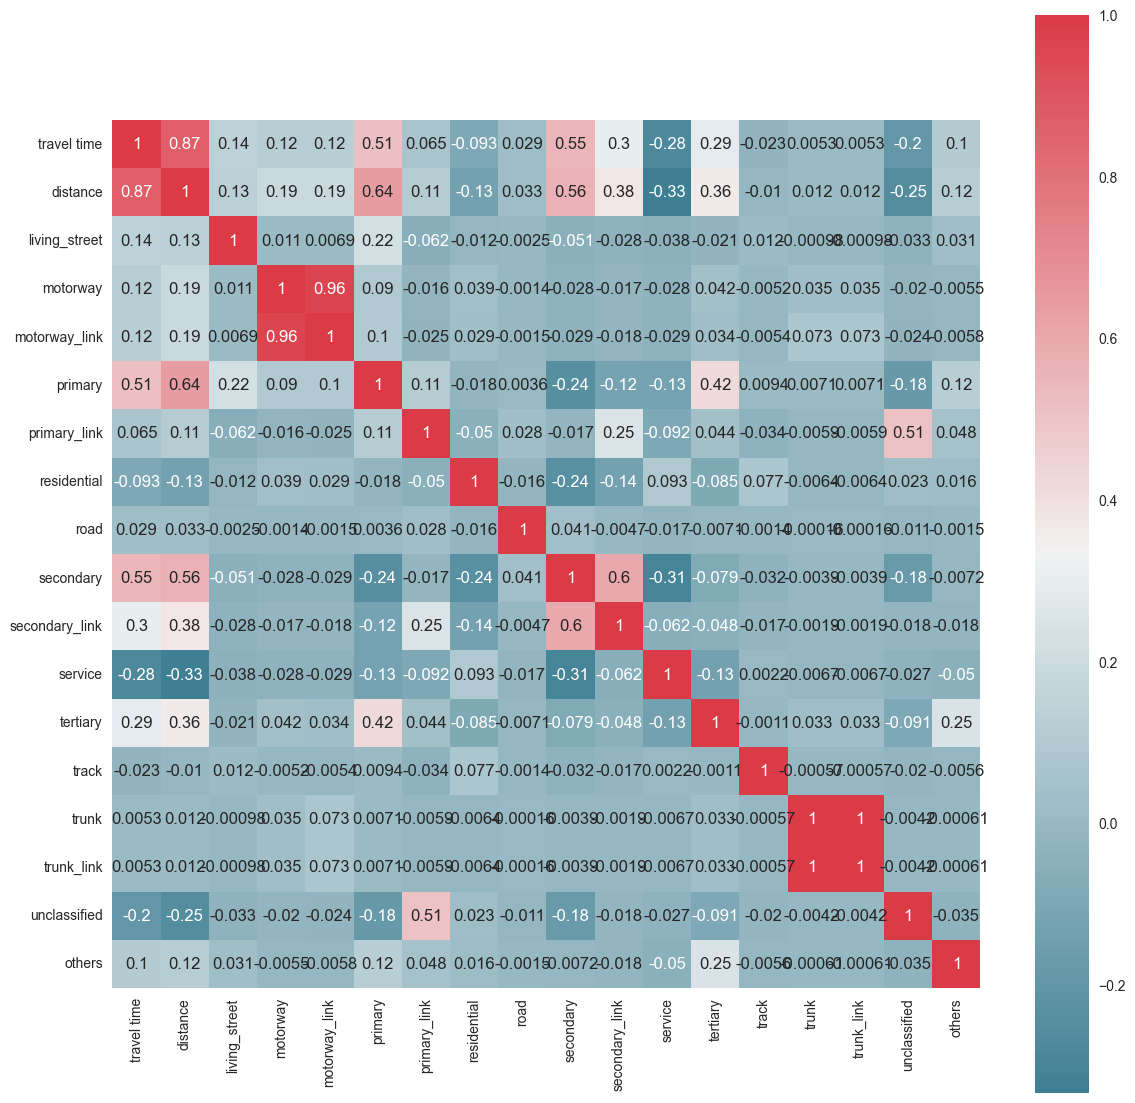

In [135]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(14,14))
corr = df8.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [136]:
x = np.array(df8.iloc[:,1:])
y = np.array(df8['travel time'])
x

array([[0.22759008, 0.        , 0.        , ..., 0.        , 0.11608501,
        0.        ],
       [0.23007385, 0.        , 0.        , ..., 0.        , 0.01454608,
        0.        ],
       [0.22949631, 0.        , 0.        , ..., 0.        , 0.01454608,
        0.        ],
       ...,
       [0.4715468 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47739699, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46444217, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [137]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [138]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12984, 17)
(3247, 17)


In [139]:
# inputs: distance + roadtypes distance
model7_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model7_1_1

Epoch 1/500
406/406 [==============================] - 1s 972us/step - loss: 727029.0625 - mape: 71.7793 - rmse: 852.6600 - val_loss: 158361.6250 - val_mape: 42.8057 - val_rmse: 397.9467
Epoch 2/500
406/406 [==============================] - 0s 802us/step - loss: 115153.4375 - mape: 43.4533 - rmse: 339.3427 - val_loss: 98033.3750 - val_mape: 37.5722 - val_rmse: 313.1028
Epoch 3/500
406/406 [==============================] - 0s 818us/step - loss: 80464.3516 - mape: 32.9162 - rmse: 283.6624 - val_loss: 79773.6484 - val_mape: 28.7174 - val_rmse: 282.4423
Epoch 4/500
406/406 [==============================] - 0s 786us/step - loss: 69647.0234 - mape: 27.0294 - rmse: 263.9072 - val_loss: 75517.1953 - val_mape: 25.6171 - val_rmse: 274.8039
Epoch 5/500
406/406 [==============================] - 0s 772us/step - loss: 66866.1797 - mape: 24.7468 - rmse: 258.5850 - val_loss: 74326.9844 - val_mape: 24.3897 - val_rmse: 272.6298
Epoch 6/500
406/406 [==============================] - 0s 858us/step - l

406/406 [==============================] - 0s 813us/step - loss: 60584.1094 - mape: 21.2333 - rmse: 246.1384 - val_loss: 70264.8906 - val_mape: 21.8027 - val_rmse: 265.0753
Epoch 90/500
406/406 [==============================] - 0s 811us/step - loss: 60559.2070 - mape: 21.1403 - rmse: 246.0878 - val_loss: 70441.8828 - val_mape: 21.4983 - val_rmse: 265.4089
Epoch 91/500
406/406 [==============================] - 0s 796us/step - loss: 60558.9609 - mape: 21.2688 - rmse: 246.0873 - val_loss: 70267.5312 - val_mape: 21.7886 - val_rmse: 265.0802
Epoch 92/500
406/406 [==============================] - 0s 827us/step - loss: 60569.2227 - mape: 21.1921 - rmse: 246.1082 - val_loss: 70179.9453 - val_mape: 22.1445 - val_rmse: 264.9150
Epoch 93/500
406/406 [==============================] - 0s 799us/step - loss: 60535.6758 - mape: 21.1936 - rmse: 246.0400 - val_loss: 70593.8125 - val_mape: 21.0395 - val_rmse: 265.6949
Epoch 94/500
406/406 [==============================] - 0s 790us/step - loss: 60594

Epoch 133/500
406/406 [==============================] - 0s 833us/step - loss: 60340.9453 - mape: 21.1918 - rmse: 245.6439 - val_loss: 70642.1406 - val_mape: 20.6810 - val_rmse: 265.7859
Epoch 134/500
406/406 [==============================] - 0s 789us/step - loss: 60349.0938 - mape: 21.1623 - rmse: 245.6605 - val_loss: 70493.6875 - val_mape: 20.9527 - val_rmse: 265.5065
Epoch 135/500
406/406 [==============================] - 0s 835us/step - loss: 60361.8594 - mape: 21.1193 - rmse: 245.6865 - val_loss: 70152.4688 - val_mape: 21.6654 - val_rmse: 264.8631
Epoch 136/500
406/406 [==============================] - 0s 821us/step - loss: 60369.8242 - mape: 21.2049 - rmse: 245.7027 - val_loss: 70328.8125 - val_mape: 21.2531 - val_rmse: 265.1958
Epoch 137/500
406/406 [==============================] - 0s 812us/step - loss: 60385.6953 - mape: 21.0905 - rmse: 245.7350 - val_loss: 70032.3359 - val_mape: 22.1036 - val_rmse: 264.6362
Epoch 138/500
406/406 [==============================] - 0s 807us

Epoch 177/500
406/406 [==============================] - 0s 848us/step - loss: 60212.1602 - mape: 21.1103 - rmse: 245.3817 - val_loss: 70248.7891 - val_mape: 21.1757 - val_rmse: 265.0449
Epoch 178/500
406/406 [==============================] - 0s 814us/step - loss: 60222.7266 - mape: 21.1112 - rmse: 245.4032 - val_loss: 70048.8594 - val_mape: 21.9627 - val_rmse: 264.6674
Epoch 179/500
406/406 [==============================] - 0s 789us/step - loss: 60180.2500 - mape: 21.2156 - rmse: 245.3166 - val_loss: 71774.1016 - val_mape: 19.7499 - val_rmse: 267.9069
Epoch 180/500
406/406 [==============================] - 0s 776us/step - loss: 60234.1406 - mape: 21.1319 - rmse: 245.4265 - val_loss: 70850.3438 - val_mape: 20.3274 - val_rmse: 266.1773
Epoch 181/500
406/406 [==============================] - 0s 809us/step - loss: 60214.1172 - mape: 21.1385 - rmse: 245.3857 - val_loss: 70371.6172 - val_mape: 20.8984 - val_rmse: 265.2765
Epoch 182/500
406/406 [==============================] - 0s 812us

Epoch 221/500
406/406 [==============================] - 0s 817us/step - loss: 60151.3242 - mape: 21.1775 - rmse: 245.2577 - val_loss: 70109.7969 - val_mape: 21.2835 - val_rmse: 264.7825
Epoch 222/500
406/406 [==============================] - 0s 819us/step - loss: 60175.5117 - mape: 21.0936 - rmse: 245.3070 - val_loss: 70082.1250 - val_mape: 21.4392 - val_rmse: 264.7303
Epoch 223/500
406/406 [==============================] - 0s 790us/step - loss: 60214.7227 - mape: 21.1829 - rmse: 245.3869 - val_loss: 70103.1094 - val_mape: 21.2985 - val_rmse: 264.7699
Epoch 224/500
406/406 [==============================] - 0s 796us/step - loss: 60223.7734 - mape: 21.0558 - rmse: 245.4053 - val_loss: 69870.9375 - val_mape: 22.0565 - val_rmse: 264.3311
Epoch 225/500
406/406 [==============================] - 0s 779us/step - loss: 60113.1680 - mape: 21.0456 - rmse: 245.1799 - val_loss: 69854.4688 - val_mape: 22.5769 - val_rmse: 264.3000
Epoch 226/500
406/406 [==============================] - 0s 817us

Epoch 265/500
406/406 [==============================] - 0s 830us/step - loss: 60146.0195 - mape: 21.1845 - rmse: 245.2469 - val_loss: 70504.0078 - val_mape: 20.5977 - val_rmse: 265.5259
Epoch 266/500
406/406 [==============================] - 0s 801us/step - loss: 60079.0000 - mape: 20.9476 - rmse: 245.1102 - val_loss: 69846.0469 - val_mape: 23.1298 - val_rmse: 264.2840
Epoch 267/500
406/406 [==============================] - 0s 832us/step - loss: 60081.8398 - mape: 21.1780 - rmse: 245.1160 - val_loss: 69798.1875 - val_mape: 22.3843 - val_rmse: 264.1935
Epoch 268/500
406/406 [==============================] - 0s 822us/step - loss: 60068.6289 - mape: 21.0949 - rmse: 245.0890 - val_loss: 69893.0938 - val_mape: 21.6773 - val_rmse: 264.3730
Epoch 269/500
406/406 [==============================] - 0s 827us/step - loss: 60100.1641 - mape: 21.0092 - rmse: 245.1534 - val_loss: 69860.1328 - val_mape: 23.3747 - val_rmse: 264.3107
Epoch 270/500
406/406 [==============================] - 0s 810us

Epoch 309/500
406/406 [==============================] - 0s 914us/step - loss: 60078.6758 - mape: 21.0192 - rmse: 245.1095 - val_loss: 69701.2812 - val_mape: 22.2505 - val_rmse: 264.0100
Epoch 310/500
406/406 [==============================] - 0s 790us/step - loss: 59998.7930 - mape: 21.0745 - rmse: 244.9465 - val_loss: 69743.8672 - val_mape: 21.8522 - val_rmse: 264.0906
Epoch 311/500
406/406 [==============================] - 0s 908us/step - loss: 59996.7305 - mape: 21.0314 - rmse: 244.9423 - val_loss: 69684.5469 - val_mape: 22.1131 - val_rmse: 263.9783
Epoch 312/500
406/406 [==============================] - 0s 878us/step - loss: 59981.0938 - mape: 21.1865 - rmse: 244.9104 - val_loss: 70555.2969 - val_mape: 20.4594 - val_rmse: 265.6225
Epoch 313/500
406/406 [==============================] - 0s 940us/step - loss: 60001.5469 - mape: 21.0049 - rmse: 244.9521 - val_loss: 69853.8281 - val_mape: 21.6639 - val_rmse: 264.2987
Epoch 314/500
406/406 [==============================] - 0s 818us

Epoch 353/500
406/406 [==============================] - 0s 846us/step - loss: 59894.5820 - mape: 21.0530 - rmse: 244.7337 - val_loss: 69753.7969 - val_mape: 21.7774 - val_rmse: 264.1094
Epoch 354/500
406/406 [==============================] - 0s 829us/step - loss: 59870.1523 - mape: 21.1717 - rmse: 244.6838 - val_loss: 70073.2812 - val_mape: 20.7423 - val_rmse: 264.7136
Epoch 355/500
406/406 [==============================] - 0s 855us/step - loss: 59926.7383 - mape: 21.0056 - rmse: 244.7994 - val_loss: 69803.8828 - val_mape: 21.4710 - val_rmse: 264.2043
Epoch 356/500
406/406 [==============================] - 0s 921us/step - loss: 59906.4141 - mape: 21.0336 - rmse: 244.7579 - val_loss: 69626.3359 - val_mape: 22.3163 - val_rmse: 263.8680
Epoch 357/500
406/406 [==============================] - 0s 986us/step - loss: 59930.4648 - mape: 21.1332 - rmse: 244.8070 - val_loss: 70237.7891 - val_mape: 20.6963 - val_rmse: 265.0241
Epoch 358/500
406/406 [==============================] - 0s 814us

Epoch 397/500
406/406 [==============================] - 0s 831us/step - loss: 59842.2227 - mape: 21.0456 - rmse: 244.6267 - val_loss: 69604.6016 - val_mape: 22.3718 - val_rmse: 263.8268
Epoch 398/500
406/406 [==============================] - 0s 905us/step - loss: 59883.6875 - mape: 21.1153 - rmse: 244.7114 - val_loss: 69847.5625 - val_mape: 21.3522 - val_rmse: 264.2869
Epoch 399/500
406/406 [==============================] - 0s 822us/step - loss: 59934.5742 - mape: 21.1123 - rmse: 244.8154 - val_loss: 69748.2031 - val_mape: 21.5612 - val_rmse: 264.0988
Epoch 400/500
406/406 [==============================] - 0s 819us/step - loss: 59844.9531 - mape: 20.9681 - rmse: 244.6323 - val_loss: 69834.7344 - val_mape: 23.0309 - val_rmse: 264.2626
Epoch 401/500
406/406 [==============================] - 0s 851us/step - loss: 59815.6992 - mape: 21.0480 - rmse: 244.5725 - val_loss: 70096.8672 - val_mape: 20.8673 - val_rmse: 264.7581
Epoch 402/500
406/406 [==============================] - 0s 786us

Epoch 441/500
406/406 [==============================] - 0s 799us/step - loss: 59839.3750 - mape: 21.0241 - rmse: 244.6209 - val_loss: 70836.6797 - val_mape: 20.0181 - val_rmse: 266.1516
Epoch 442/500
406/406 [==============================] - 0s 788us/step - loss: 59870.2188 - mape: 20.9849 - rmse: 244.6839 - val_loss: 70307.3594 - val_mape: 20.5884 - val_rmse: 265.1553
Epoch 443/500
406/406 [==============================] - 0s 798us/step - loss: 59820.4375 - mape: 21.0481 - rmse: 244.5822 - val_loss: 70578.1172 - val_mape: 20.3754 - val_rmse: 265.6654
Epoch 444/500
406/406 [==============================] - 0s 855us/step - loss: 59884.6875 - mape: 20.9992 - rmse: 244.7135 - val_loss: 69860.5156 - val_mape: 21.3935 - val_rmse: 264.3114
Epoch 445/500
406/406 [==============================] - 0s 835us/step - loss: 59877.8789 - mape: 21.0473 - rmse: 244.6996 - val_loss: 69911.1875 - val_mape: 21.2778 - val_rmse: 264.4072
Epoch 446/500
406/406 [==============================] - 0s 828us

Epoch 485/500
406/406 [==============================] - 0s 787us/step - loss: 59821.6484 - mape: 21.0681 - rmse: 244.5846 - val_loss: 69879.3828 - val_mape: 21.3998 - val_rmse: 264.3471
Epoch 486/500
406/406 [==============================] - 0s 795us/step - loss: 59788.2852 - mape: 21.0784 - rmse: 244.5164 - val_loss: 70252.7734 - val_mape: 20.6976 - val_rmse: 265.0524
Epoch 487/500
406/406 [==============================] - 0s 803us/step - loss: 59871.3594 - mape: 21.0963 - rmse: 244.6862 - val_loss: 69670.4688 - val_mape: 21.7973 - val_rmse: 263.9516
Epoch 488/500
406/406 [==============================] - 0s 796us/step - loss: 59811.4648 - mape: 20.9856 - rmse: 244.5638 - val_loss: 69707.9688 - val_mape: 21.5813 - val_rmse: 264.0227
Epoch 489/500
406/406 [==============================] - 0s 803us/step - loss: 59856.8672 - mape: 21.1224 - rmse: 244.6566 - val_loss: 70263.3984 - val_mape: 20.4749 - val_rmse: 265.0724
Epoch 490/500
406/406 [==============================] - 0s 806us

In [140]:
# plotme(model7_1_1)

In [141]:
# inputs: distance + hour + roadtypes distance
model7_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model7_1_2

Epoch 1/500
406/406 [==============================] - 1s 1ms/step - loss: 511214.3438 - mape: 62.9962 - rmse: 714.9926 - val_loss: 112737.5078 - val_mape: 42.6662 - val_rmse: 335.7641
Epoch 2/500
406/406 [==============================] - 0s 922us/step - loss: 83865.4922 - mape: 34.2292 - rmse: 289.5954 - val_loss: 78225.6641 - val_mape: 27.6446 - val_rmse: 279.6885
Epoch 3/500
406/406 [==============================] - 0s 922us/step - loss: 67984.9609 - mape: 25.8234 - rmse: 260.7393 - val_loss: 74673.5156 - val_mape: 24.0660 - val_rmse: 273.2646
Epoch 4/500
406/406 [==============================] - 0s 923us/step - loss: 65697.4062 - mape: 24.0558 - rmse: 256.3151 - val_loss: 73758.8672 - val_mape: 23.1461 - val_rmse: 271.5858
Epoch 5/500
406/406 [==============================] - 0s 913us/step - loss: 64920.7773 - mape: 23.3659 - rmse: 254.7956 - val_loss: 73031.2188 - val_mape: 23.3872 - val_rmse: 270.2429
Epoch 6/500
406/406 [==============================] - 0s 941us/step - loss

406/406 [==============================] - 0s 1ms/step - loss: 60766.1328 - mape: 21.1737 - rmse: 246.5079 - val_loss: 70398.0156 - val_mape: 22.4788 - val_rmse: 265.3262
Epoch 90/500
406/406 [==============================] - 0s 1ms/step - loss: 60704.6055 - mape: 21.2290 - rmse: 246.3830 - val_loss: 70801.9844 - val_mape: 21.2687 - val_rmse: 266.0864
Epoch 91/500
406/406 [==============================] - 0s 939us/step - loss: 60668.7031 - mape: 21.2170 - rmse: 246.3102 - val_loss: 70382.1562 - val_mape: 22.4288 - val_rmse: 265.2964
Epoch 92/500
406/406 [==============================] - 0s 927us/step - loss: 60719.4414 - mape: 21.2255 - rmse: 246.4131 - val_loss: 70528.9531 - val_mape: 21.7606 - val_rmse: 265.5729
Epoch 93/500
406/406 [==============================] - 0s 910us/step - loss: 60673.7070 - mape: 21.1588 - rmse: 246.3203 - val_loss: 70836.0859 - val_mape: 21.4395 - val_rmse: 266.1505
Epoch 94/500
406/406 [==============================] - 0s 917us/step - loss: 60773.914

406/406 [==============================] - 0s 929us/step - loss: 60705.4727 - mape: 21.2038 - rmse: 246.3848 - val_loss: 70731.9375 - val_mape: 21.2335 - val_rmse: 265.9548
Epoch 134/500
406/406 [==============================] - 0s 926us/step - loss: 60703.5352 - mape: 21.1700 - rmse: 246.3809 - val_loss: 70458.7109 - val_mape: 22.1204 - val_rmse: 265.4406
Epoch 135/500
406/406 [==============================] - 0s 919us/step - loss: 60711.4766 - mape: 21.1779 - rmse: 246.3970 - val_loss: 70940.9297 - val_mape: 21.1409 - val_rmse: 266.3474
Epoch 136/500
406/406 [==============================] - 0s 920us/step - loss: 60757.4727 - mape: 21.1963 - rmse: 246.4903 - val_loss: 70580.3828 - val_mape: 21.7911 - val_rmse: 265.6697
Epoch 137/500
406/406 [==============================] - 0s 921us/step - loss: 60741.8555 - mape: 21.1955 - rmse: 246.4586 - val_loss: 70723.7969 - val_mape: 21.5122 - val_rmse: 265.9395
Epoch 138/500
406/406 [==============================] - 0s 930us/step - loss: 

Epoch 177/500
406/406 [==============================] - 0s 907us/step - loss: 60656.3711 - mape: 21.1632 - rmse: 246.2851 - val_loss: 71010.4141 - val_mape: 20.9081 - val_rmse: 266.4778
Epoch 178/500
406/406 [==============================] - 0s 927us/step - loss: 60644.5781 - mape: 21.1356 - rmse: 246.2612 - val_loss: 70533.2109 - val_mape: 22.5093 - val_rmse: 265.5809
Epoch 179/500
406/406 [==============================] - 0s 932us/step - loss: 60635.9023 - mape: 21.2053 - rmse: 246.2436 - val_loss: 70821.0000 - val_mape: 21.1789 - val_rmse: 266.1222
Epoch 180/500
406/406 [==============================] - 0s 911us/step - loss: 60752.0391 - mape: 21.2550 - rmse: 246.4793 - val_loss: 70696.8984 - val_mape: 21.3422 - val_rmse: 265.8889
Epoch 181/500
406/406 [==============================] - 0s 907us/step - loss: 60727.8438 - mape: 21.1278 - rmse: 246.4302 - val_loss: 70938.7734 - val_mape: 21.2524 - val_rmse: 266.3433
Epoch 182/500
406/406 [==============================] - 0s 915us

Epoch 221/500
406/406 [==============================] - 0s 1ms/step - loss: 60635.2227 - mape: 21.1933 - rmse: 246.2422 - val_loss: 70682.6016 - val_mape: 21.6231 - val_rmse: 265.8620
Epoch 222/500
406/406 [==============================] - 0s 1ms/step - loss: 60632.6797 - mape: 21.1939 - rmse: 246.2370 - val_loss: 70457.3125 - val_mape: 22.3668 - val_rmse: 265.4380
Epoch 223/500
406/406 [==============================] - 0s 922us/step - loss: 60618.3477 - mape: 21.2018 - rmse: 246.2079 - val_loss: 70543.4062 - val_mape: 22.1849 - val_rmse: 265.6001
Epoch 224/500
406/406 [==============================] - 0s 920us/step - loss: 60703.3398 - mape: 21.2298 - rmse: 246.3805 - val_loss: 71123.0469 - val_mape: 20.9058 - val_rmse: 266.6891
Epoch 225/500
406/406 [==============================] - 0s 946us/step - loss: 60594.8359 - mape: 21.2086 - rmse: 246.1602 - val_loss: 70771.6797 - val_mape: 21.3847 - val_rmse: 266.0295
Epoch 226/500
406/406 [==============================] - 0s 912us/ste

Epoch 265/500
406/406 [==============================] - 0s 981us/step - loss: 60610.6680 - mape: 21.1637 - rmse: 246.1923 - val_loss: 70910.9531 - val_mape: 21.2006 - val_rmse: 266.2911
Epoch 266/500
406/406 [==============================] - 0s 1ms/step - loss: 60695.5742 - mape: 21.1062 - rmse: 246.3647 - val_loss: 70802.2734 - val_mape: 21.4199 - val_rmse: 266.0870
Epoch 267/500
406/406 [==============================] - 1s 1ms/step - loss: 60712.1836 - mape: 21.1319 - rmse: 246.3984 - val_loss: 70758.8516 - val_mape: 21.6423 - val_rmse: 266.0054
Epoch 268/500
406/406 [==============================] - 0s 1ms/step - loss: 60708.5508 - mape: 21.2344 - rmse: 246.3911 - val_loss: 70619.8047 - val_mape: 21.8593 - val_rmse: 265.7439
Epoch 269/500
406/406 [==============================] - 0s 968us/step - loss: 60604.7305 - mape: 21.2227 - rmse: 246.1803 - val_loss: 70769.7969 - val_mape: 21.3142 - val_rmse: 266.0259
Epoch 270/500
406/406 [==============================] - 0s 923us/step 

406/406 [==============================] - 0s 950us/step - loss: 60652.1016 - mape: 21.2317 - rmse: 246.2765 - val_loss: 70852.5000 - val_mape: 21.2927 - val_rmse: 266.1813
Epoch 310/500
406/406 [==============================] - 0s 994us/step - loss: 60653.3320 - mape: 21.1918 - rmse: 246.2790 - val_loss: 71607.9219 - val_mape: 20.6407 - val_rmse: 267.5966
Epoch 311/500
406/406 [==============================] - 0s 984us/step - loss: 60725.4609 - mape: 21.1644 - rmse: 246.4254 - val_loss: 70903.3047 - val_mape: 21.3090 - val_rmse: 266.2767
Epoch 312/500
406/406 [==============================] - 0s 1ms/step - loss: 60612.4570 - mape: 21.2179 - rmse: 246.1960 - val_loss: 71173.5703 - val_mape: 20.8015 - val_rmse: 266.7838
Epoch 313/500
406/406 [==============================] - 0s 1ms/step - loss: 60613.5938 - mape: 21.1566 - rmse: 246.1983 - val_loss: 70622.7266 - val_mape: 22.5265 - val_rmse: 265.7494
Epoch 314/500
406/406 [==============================] - 0s 977us/step - loss: 6068

Epoch 353/500
406/406 [==============================] - 0s 991us/step - loss: 60596.3438 - mape: 21.2147 - rmse: 246.1632 - val_loss: 70527.4844 - val_mape: 22.5478 - val_rmse: 265.5701
Epoch 354/500
406/406 [==============================] - 0s 940us/step - loss: 60479.7695 - mape: 21.2431 - rmse: 245.9263 - val_loss: 70808.8281 - val_mape: 21.2712 - val_rmse: 266.0993
Epoch 355/500
406/406 [==============================] - 0s 925us/step - loss: 60498.3281 - mape: 21.1923 - rmse: 245.9641 - val_loss: 72800.0469 - val_mape: 19.4688 - val_rmse: 269.8148
Epoch 356/500
406/406 [==============================] - 0s 928us/step - loss: 60518.9844 - mape: 21.1158 - rmse: 246.0061 - val_loss: 70579.1484 - val_mape: 22.1289 - val_rmse: 265.6674
Epoch 357/500
406/406 [==============================] - 0s 933us/step - loss: 60537.5508 - mape: 21.1451 - rmse: 246.0438 - val_loss: 70920.3984 - val_mape: 21.2532 - val_rmse: 266.3088
Epoch 358/500
406/406 [==============================] - 0s 924us

Epoch 397/500
406/406 [==============================] - 0s 977us/step - loss: 60196.2305 - mape: 21.2158 - rmse: 245.3492 - val_loss: 71606.0312 - val_mape: 20.1263 - val_rmse: 267.5930
Epoch 398/500
406/406 [==============================] - 0s 1ms/step - loss: 60367.5430 - mape: 21.0757 - rmse: 245.6981 - val_loss: 70938.4766 - val_mape: 21.0650 - val_rmse: 266.3428
Epoch 399/500
406/406 [==============================] - 0s 961us/step - loss: 60244.6680 - mape: 21.1197 - rmse: 245.4479 - val_loss: 70640.7578 - val_mape: 21.6402 - val_rmse: 265.7833
Epoch 400/500
406/406 [==============================] - 0s 947us/step - loss: 60285.4805 - mape: 21.1604 - rmse: 245.5310 - val_loss: 71129.4453 - val_mape: 20.9397 - val_rmse: 266.7010
Epoch 401/500
406/406 [==============================] - 0s 957us/step - loss: 60298.6719 - mape: 21.0675 - rmse: 245.5579 - val_loss: 70465.6484 - val_mape: 22.9976 - val_rmse: 265.4537
Epoch 402/500
406/406 [==============================] - 0s 948us/s

Epoch 441/500
406/406 [==============================] - 0s 939us/step - loss: 60222.9609 - mape: 21.0581 - rmse: 245.4037 - val_loss: 70734.6328 - val_mape: 21.5493 - val_rmse: 265.9598
Epoch 442/500
406/406 [==============================] - 0s 940us/step - loss: 60236.5742 - mape: 21.2030 - rmse: 245.4314 - val_loss: 70647.8125 - val_mape: 21.3027 - val_rmse: 265.7966
Epoch 443/500
406/406 [==============================] - 0s 944us/step - loss: 60189.2539 - mape: 21.1156 - rmse: 245.3350 - val_loss: 71143.8594 - val_mape: 20.7041 - val_rmse: 266.7281
Epoch 444/500
406/406 [==============================] - 0s 939us/step - loss: 60220.1445 - mape: 21.0560 - rmse: 245.3979 - val_loss: 70440.3203 - val_mape: 22.3307 - val_rmse: 265.4059
Epoch 445/500
406/406 [==============================] - 0s 931us/step - loss: 60163.3086 - mape: 21.0687 - rmse: 245.2821 - val_loss: 70446.2188 - val_mape: 22.7941 - val_rmse: 265.4171
Epoch 446/500
406/406 [==============================] - 0s 940us

Epoch 485/500
406/406 [==============================] - 0s 948us/step - loss: 60075.5781 - mape: 21.1736 - rmse: 245.1032 - val_loss: 72828.0938 - val_mape: 19.0756 - val_rmse: 269.8668
Epoch 486/500
406/406 [==============================] - 0s 931us/step - loss: 60099.6367 - mape: 21.0399 - rmse: 245.1523 - val_loss: 70372.9609 - val_mape: 21.9086 - val_rmse: 265.2790
Epoch 487/500
406/406 [==============================] - 0s 944us/step - loss: 60138.5820 - mape: 21.1556 - rmse: 245.2317 - val_loss: 70663.8594 - val_mape: 21.1767 - val_rmse: 265.8268
Epoch 488/500
406/406 [==============================] - 0s 973us/step - loss: 60038.4922 - mape: 21.0908 - rmse: 245.0275 - val_loss: 70367.7500 - val_mape: 22.3107 - val_rmse: 265.2692
Epoch 489/500
406/406 [==============================] - 0s 1ms/step - loss: 60053.3047 - mape: 21.0999 - rmse: 245.0578 - val_loss: 70717.7188 - val_mape: 23.0523 - val_rmse: 265.9280
Epoch 490/500
406/406 [==============================] - 0s 1ms/ste

In [142]:
# plotme(model7_1_2)

In [143]:
# inputs: distance + roadtypes distance
model7_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model7_1_3

Epoch 1/500
406/406 [==============================] - 1s 952us/step - loss: 1083268.2500 - mape: 99.0243 - rmse: 1040.8018 - val_loss: 1076808.5000 - val_mape: 97.1577 - val_rmse: 1037.6938
Epoch 2/500
406/406 [==============================] - 0s 879us/step - loss: 1008318.2500 - mape: 93.5371 - rmse: 1004.1505 - val_loss: 970010.1875 - val_mape: 89.3492 - val_rmse: 984.8909
Epoch 3/500
406/406 [==============================] - 0s 809us/step - loss: 879282.8750 - mape: 83.6370 - rmse: 937.7009 - val_loss: 822171.2500 - val_mape: 77.6714 - val_rmse: 906.7366
Epoch 4/500
406/406 [==============================] - 0s 784us/step - loss: 721404.8750 - mape: 70.1847 - rmse: 849.3556 - val_loss: 655754.0000 - val_mape: 62.9538 - val_rmse: 809.7864
Epoch 5/500
406/406 [==============================] - 0s 891us/step - loss: 557358.1250 - mape: 54.6536 - rmse: 746.5642 - val_loss: 496010.8125 - val_mape: 47.5172 - val_rmse: 704.2803
Epoch 6/500
406/406 [==============================] - 0s 1

Epoch 45/500
406/406 [==============================] - 0s 757us/step - loss: 63864.4180 - mape: 23.1306 - rmse: 252.7141 - val_loss: 72791.2812 - val_mape: 22.7698 - val_rmse: 269.7986
Epoch 46/500
406/406 [==============================] - 0s 756us/step - loss: 63800.0742 - mape: 22.8581 - rmse: 252.5868 - val_loss: 72734.1953 - val_mape: 22.7424 - val_rmse: 269.6928
Epoch 47/500
406/406 [==============================] - 0s 751us/step - loss: 63713.5859 - mape: 22.8240 - rmse: 252.4155 - val_loss: 72586.3516 - val_mape: 22.8882 - val_rmse: 269.4185
Epoch 48/500
406/406 [==============================] - 0s 764us/step - loss: 63641.6953 - mape: 22.8154 - rmse: 252.2731 - val_loss: 72476.0938 - val_mape: 22.9976 - val_rmse: 269.2138
Epoch 49/500
406/406 [==============================] - 0s 778us/step - loss: 63573.5469 - mape: 22.8318 - rmse: 252.1380 - val_loss: 72453.6562 - val_mape: 22.8987 - val_rmse: 269.1722
Epoch 50/500
406/406 [==============================] - 0s 769us/step 

406/406 [==============================] - 0s 761us/step - loss: 62193.2422 - mape: 21.9098 - rmse: 249.3857 - val_loss: 71662.4219 - val_mape: 22.1364 - val_rmse: 267.6984
Epoch 90/500
406/406 [==============================] - 0s 771us/step - loss: 62165.4219 - mape: 21.9142 - rmse: 249.3299 - val_loss: 71638.2656 - val_mape: 22.1523 - val_rmse: 267.6533
Epoch 91/500
406/406 [==============================] - 0s 773us/step - loss: 62153.7812 - mape: 21.9518 - rmse: 249.3066 - val_loss: 71674.6094 - val_mape: 22.0375 - val_rmse: 267.7211
Epoch 92/500
406/406 [==============================] - 0s 753us/step - loss: 62129.6406 - mape: 21.8231 - rmse: 249.2582 - val_loss: 71589.4375 - val_mape: 22.1945 - val_rmse: 267.5620
Epoch 93/500
406/406 [==============================] - 0s 767us/step - loss: 62104.3555 - mape: 21.9500 - rmse: 249.2075 - val_loss: 71692.8203 - val_mape: 21.9434 - val_rmse: 267.7552
Epoch 94/500
406/406 [==============================] - 0s 757us/step - loss: 62089

Epoch 133/500
406/406 [==============================] - 0s 759us/step - loss: 61545.6250 - mape: 21.5493 - rmse: 248.0839 - val_loss: 71336.2656 - val_mape: 21.7918 - val_rmse: 267.0885
Epoch 134/500
406/406 [==============================] - 0s 756us/step - loss: 61519.2617 - mape: 21.4833 - rmse: 248.0308 - val_loss: 71144.9609 - val_mape: 22.2781 - val_rmse: 266.7301
Epoch 135/500
406/406 [==============================] - 0s 761us/step - loss: 61544.2383 - mape: 21.6189 - rmse: 248.0811 - val_loss: 71198.1953 - val_mape: 22.0985 - val_rmse: 266.8299
Epoch 136/500
406/406 [==============================] - 0s 762us/step - loss: 61517.3398 - mape: 21.6602 - rmse: 248.0269 - val_loss: 71380.9062 - val_mape: 21.6653 - val_rmse: 267.1721
Epoch 137/500
406/406 [==============================] - 0s 759us/step - loss: 61515.5000 - mape: 21.5525 - rmse: 248.0232 - val_loss: 71225.1641 - val_mape: 21.9678 - val_rmse: 266.8804
Epoch 138/500
406/406 [==============================] - 0s 759us

Epoch 177/500
406/406 [==============================] - 0s 774us/step - loss: 61225.9023 - mape: 21.4525 - rmse: 247.4387 - val_loss: 71188.5469 - val_mape: 21.5829 - val_rmse: 266.8118
Epoch 178/500
406/406 [==============================] - 0s 748us/step - loss: 61221.7734 - mape: 21.3915 - rmse: 247.4303 - val_loss: 71116.6016 - val_mape: 21.7047 - val_rmse: 266.6770
Epoch 179/500
406/406 [==============================] - 0s 753us/step - loss: 61209.0547 - mape: 21.4103 - rmse: 247.4046 - val_loss: 71130.8672 - val_mape: 21.6762 - val_rmse: 266.7037
Epoch 180/500
406/406 [==============================] - 0s 763us/step - loss: 61207.1367 - mape: 21.4682 - rmse: 247.4008 - val_loss: 71163.9062 - val_mape: 21.6187 - val_rmse: 266.7656
Epoch 181/500
406/406 [==============================] - 0s 755us/step - loss: 61199.3750 - mape: 21.3004 - rmse: 247.3851 - val_loss: 70971.7344 - val_mape: 22.0828 - val_rmse: 266.4052
Epoch 182/500
406/406 [==============================] - 0s 759us

Epoch 221/500
406/406 [==============================] - 0s 760us/step - loss: 61054.6992 - mape: 21.3602 - rmse: 247.0925 - val_loss: 71053.0391 - val_mape: 21.5827 - val_rmse: 266.5578
Epoch 222/500
406/406 [==============================] - 0s 813us/step - loss: 61037.4062 - mape: 21.2359 - rmse: 247.0575 - val_loss: 70908.6953 - val_mape: 21.9247 - val_rmse: 266.2869
Epoch 223/500
406/406 [==============================] - 0s 760us/step - loss: 61054.9141 - mape: 21.4201 - rmse: 247.0929 - val_loss: 71043.6797 - val_mape: 21.6156 - val_rmse: 266.5402
Epoch 224/500
406/406 [==============================] - 0s 750us/step - loss: 61047.6797 - mape: 21.3137 - rmse: 247.0783 - val_loss: 70977.9844 - val_mape: 21.7349 - val_rmse: 266.4169
Epoch 225/500
406/406 [==============================] - 0s 752us/step - loss: 61043.9336 - mape: 21.3254 - rmse: 247.0707 - val_loss: 71009.1094 - val_mape: 21.6582 - val_rmse: 266.4753
Epoch 226/500
406/406 [==============================] - 0s 758us

Epoch 265/500
406/406 [==============================] - 0s 756us/step - loss: 60935.3672 - mape: 21.1856 - rmse: 246.8509 - val_loss: 70901.3438 - val_mape: 21.7306 - val_rmse: 266.2731
Epoch 266/500
406/406 [==============================] - 0s 759us/step - loss: 60947.0938 - mape: 21.3647 - rmse: 246.8746 - val_loss: 71021.3281 - val_mape: 21.4566 - val_rmse: 266.4983
Epoch 267/500
406/406 [==============================] - 0s 759us/step - loss: 60940.5859 - mape: 21.1816 - rmse: 246.8615 - val_loss: 70898.9844 - val_mape: 21.7401 - val_rmse: 266.2686
Epoch 268/500
406/406 [==============================] - 0s 768us/step - loss: 60937.5273 - mape: 21.3353 - rmse: 246.8553 - val_loss: 71005.7422 - val_mape: 21.4827 - val_rmse: 266.4690
Epoch 269/500
406/406 [==============================] - 0s 765us/step - loss: 60930.6133 - mape: 21.1875 - rmse: 246.8413 - val_loss: 70854.7891 - val_mape: 21.8549 - val_rmse: 266.1856
Epoch 270/500
406/406 [==============================] - 0s 764us

Epoch 309/500
406/406 [==============================] - 0s 754us/step - loss: 60873.0000 - mape: 21.2406 - rmse: 246.7245 - val_loss: 70910.0234 - val_mape: 21.5765 - val_rmse: 266.2894
Epoch 310/500
406/406 [==============================] - 0s 750us/step - loss: 60861.6602 - mape: 21.2641 - rmse: 246.7016 - val_loss: 70972.8203 - val_mape: 21.4474 - val_rmse: 266.4073
Epoch 311/500
406/406 [==============================] - 0s 750us/step - loss: 60853.9727 - mape: 21.1419 - rmse: 246.6860 - val_loss: 70837.4688 - val_mape: 21.7617 - val_rmse: 266.1531
Epoch 312/500
406/406 [==============================] - 0s 752us/step - loss: 60853.1133 - mape: 21.2079 - rmse: 246.6842 - val_loss: 70793.3906 - val_mape: 21.8660 - val_rmse: 266.0703
Epoch 313/500
406/406 [==============================] - 0s 749us/step - loss: 60878.2656 - mape: 21.3206 - rmse: 246.7352 - val_loss: 70943.5156 - val_mape: 21.4916 - val_rmse: 266.3522
Epoch 314/500
406/406 [==============================] - 0s 763us

Epoch 353/500
406/406 [==============================] - 0s 754us/step - loss: 60797.5703 - mape: 21.2733 - rmse: 246.5716 - val_loss: 70817.0391 - val_mape: 21.6375 - val_rmse: 266.1147
Epoch 354/500
406/406 [==============================] - 0s 760us/step - loss: 60798.4414 - mape: 21.1654 - rmse: 246.5734 - val_loss: 70786.9922 - val_mape: 21.7378 - val_rmse: 266.0583
Epoch 355/500
406/406 [==============================] - 0s 748us/step - loss: 60790.3086 - mape: 21.2691 - rmse: 246.5569 - val_loss: 70817.0547 - val_mape: 21.6335 - val_rmse: 266.1147
Epoch 356/500
406/406 [==============================] - 0s 746us/step - loss: 60793.0234 - mape: 21.2496 - rmse: 246.5624 - val_loss: 70887.5234 - val_mape: 21.4772 - val_rmse: 266.2471
Epoch 357/500
406/406 [==============================] - 0s 757us/step - loss: 60778.7266 - mape: 21.2153 - rmse: 246.5334 - val_loss: 70766.4688 - val_mape: 21.7617 - val_rmse: 266.0197
Epoch 358/500
406/406 [==============================] - 0s 751us

Epoch 397/500
406/406 [==============================] - 0s 755us/step - loss: 60743.2148 - mape: 21.0850 - rmse: 246.4614 - val_loss: 70786.4922 - val_mape: 21.6061 - val_rmse: 266.0573
Epoch 398/500
406/406 [==============================] - 0s 755us/step - loss: 60734.8906 - mape: 21.1637 - rmse: 246.4445 - val_loss: 70831.3125 - val_mape: 21.5338 - val_rmse: 266.1415
Epoch 399/500
406/406 [==============================] - 0s 756us/step - loss: 60749.4766 - mape: 21.2810 - rmse: 246.4741 - val_loss: 70839.8203 - val_mape: 21.4790 - val_rmse: 266.1575
Epoch 400/500
406/406 [==============================] - 0s 747us/step - loss: 60729.0977 - mape: 21.2609 - rmse: 246.4327 - val_loss: 70908.4062 - val_mape: 21.3260 - val_rmse: 266.2863
Epoch 401/500
406/406 [==============================] - 0s 749us/step - loss: 60726.3320 - mape: 21.0841 - rmse: 246.4271 - val_loss: 70751.2344 - val_mape: 21.6876 - val_rmse: 265.9910
Epoch 402/500
406/406 [==============================] - 0s 753us

Epoch 441/500
406/406 [==============================] - 0s 748us/step - loss: 60684.2422 - mape: 21.1999 - rmse: 246.3417 - val_loss: 70741.0469 - val_mape: 21.6261 - val_rmse: 265.9719
Epoch 442/500
406/406 [==============================] - 0s 756us/step - loss: 60681.3867 - mape: 21.2240 - rmse: 246.3359 - val_loss: 70863.9141 - val_mape: 21.3685 - val_rmse: 266.2028
Epoch 443/500
406/406 [==============================] - 0s 752us/step - loss: 60680.9297 - mape: 21.1841 - rmse: 246.3350 - val_loss: 70711.9844 - val_mape: 21.6826 - val_rmse: 265.9172
Epoch 444/500
406/406 [==============================] - 0s 746us/step - loss: 60666.8984 - mape: 21.1712 - rmse: 246.3065 - val_loss: 70809.3516 - val_mape: 21.4762 - val_rmse: 266.1003
Epoch 445/500
406/406 [==============================] - 0s 756us/step - loss: 60667.1562 - mape: 21.1849 - rmse: 246.3070 - val_loss: 70681.5312 - val_mape: 21.7663 - val_rmse: 265.8600
Epoch 446/500
406/406 [==============================] - 0s 754us

Epoch 485/500
406/406 [==============================] - 0s 755us/step - loss: 60631.5625 - mape: 21.1964 - rmse: 246.2348 - val_loss: 70729.1562 - val_mape: 21.5503 - val_rmse: 265.9495
Epoch 486/500
406/406 [==============================] - 0s 764us/step - loss: 60629.3047 - mape: 21.0989 - rmse: 246.2302 - val_loss: 70680.9844 - val_mape: 21.6682 - val_rmse: 265.8589
Epoch 487/500
406/406 [==============================] - 0s 758us/step - loss: 60627.7461 - mape: 21.2394 - rmse: 246.2270 - val_loss: 70751.0781 - val_mape: 21.5013 - val_rmse: 265.9908
Epoch 488/500
406/406 [==============================] - 0s 754us/step - loss: 60628.2539 - mape: 21.1371 - rmse: 246.2281 - val_loss: 70709.9297 - val_mape: 21.5919 - val_rmse: 265.9134
Epoch 489/500
406/406 [==============================] - 0s 758us/step - loss: 60625.0547 - mape: 21.1409 - rmse: 246.2216 - val_loss: 70746.8125 - val_mape: 21.5107 - val_rmse: 265.9827
Epoch 490/500
406/406 [==============================] - 0s 763us

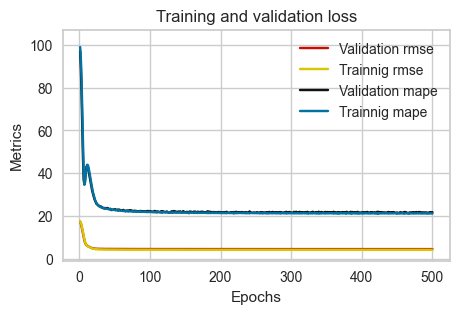

In [144]:
plotme(model7_1_3)

In [145]:
# inputs: distance + roadtypes distance
model7_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model7_1_4

Epoch 1/500
406/406 [==============================] - 1s 872us/step - loss: 1094131.0000 - mape: 99.7946 - rmse: 1046.0072 - val_loss: 1109004.8750 - val_mape: 99.4261 - val_rmse: 1053.0930
Epoch 2/500
406/406 [==============================] - 0s 740us/step - loss: 1078350.2500 - mape: 98.6593 - rmse: 1038.4364 - val_loss: 1085547.0000 - val_mape: 97.7673 - val_rmse: 1041.8959
Epoch 3/500
406/406 [==============================] - 0s 731us/step - loss: 1048775.2500 - mape: 96.5238 - rmse: 1024.0973 - val_loss: 1050106.1250 - val_mape: 95.2315 - val_rmse: 1024.7468
Epoch 4/500
406/406 [==============================] - 0s 749us/step - loss: 1008605.0000 - mape: 93.5756 - rmse: 1004.2933 - val_loss: 1005318.6875 - val_mape: 91.9593 - val_rmse: 1002.6558
Epoch 5/500
406/406 [==============================] - 0s 739us/step - loss: 960067.7500 - mape: 89.9317 - rmse: 979.8304 - val_loss: 953012.5625 - val_mape: 88.0340 - val_rmse: 976.2236
Epoch 6/500
406/406 [============================

Epoch 45/500
406/406 [==============================] - 0s 739us/step - loss: 72597.5078 - mape: 28.5254 - rmse: 269.4392 - val_loss: 79209.9453 - val_mape: 28.4389 - val_rmse: 281.4426
Epoch 46/500
406/406 [==============================] - 0s 740us/step - loss: 71796.7109 - mape: 28.1312 - rmse: 267.9491 - val_loss: 78571.1875 - val_mape: 27.9097 - val_rmse: 280.3055
Epoch 47/500
406/406 [==============================] - 0s 737us/step - loss: 71099.9219 - mape: 27.6768 - rmse: 266.6457 - val_loss: 78036.0781 - val_mape: 27.4219 - val_rmse: 279.3494
Epoch 48/500
406/406 [==============================] - 0s 741us/step - loss: 70494.3125 - mape: 27.2213 - rmse: 265.5077 - val_loss: 77546.3047 - val_mape: 27.0437 - val_rmse: 278.4714
Epoch 49/500
406/406 [==============================] - 0s 740us/step - loss: 69962.7734 - mape: 26.9004 - rmse: 264.5048 - val_loss: 77155.3828 - val_mape: 26.6206 - val_rmse: 277.7686
Epoch 50/500
406/406 [==============================] - 0s 744us/step 

406/406 [==============================] - 0s 735us/step - loss: 65068.2695 - mape: 23.4753 - rmse: 255.0848 - val_loss: 73430.8672 - val_mape: 23.7251 - val_rmse: 270.9813
Epoch 90/500
406/406 [==============================] - 0s 743us/step - loss: 65041.8516 - mape: 23.5785 - rmse: 255.0330 - val_loss: 73439.8594 - val_mape: 23.6450 - val_rmse: 270.9979
Epoch 91/500
406/406 [==============================] - 0s 740us/step - loss: 65022.6211 - mape: 23.4991 - rmse: 254.9953 - val_loss: 73442.3828 - val_mape: 23.5802 - val_rmse: 271.0026
Epoch 92/500
406/406 [==============================] - 0s 733us/step - loss: 64993.6445 - mape: 23.4201 - rmse: 254.9385 - val_loss: 73406.8359 - val_mape: 23.6131 - val_rmse: 270.9370
Epoch 93/500
406/406 [==============================] - 0s 737us/step - loss: 64973.0273 - mape: 23.4815 - rmse: 254.8981 - val_loss: 73397.4531 - val_mape: 23.5823 - val_rmse: 270.9196
Epoch 94/500
406/406 [==============================] - 0s 743us/step - loss: 64950

Epoch 133/500
406/406 [==============================] - 0s 733us/step - loss: 64488.8438 - mape: 23.0622 - rmse: 253.9465 - val_loss: 73119.8438 - val_mape: 23.2446 - val_rmse: 270.4068
Epoch 134/500
406/406 [==============================] - 0s 729us/step - loss: 64487.6250 - mape: 23.0509 - rmse: 253.9441 - val_loss: 73107.2188 - val_mape: 23.2604 - val_rmse: 270.3835
Epoch 135/500
406/406 [==============================] - 0s 737us/step - loss: 64480.4688 - mape: 23.0626 - rmse: 253.9301 - val_loss: 73108.3281 - val_mape: 23.2500 - val_rmse: 270.3855
Epoch 136/500
406/406 [==============================] - 0s 741us/step - loss: 64473.1367 - mape: 23.0657 - rmse: 253.9156 - val_loss: 73085.2734 - val_mape: 23.2980 - val_rmse: 270.3429
Epoch 137/500
406/406 [==============================] - 0s 734us/step - loss: 64463.1367 - mape: 23.0169 - rmse: 253.8959 - val_loss: 73059.1094 - val_mape: 23.3595 - val_rmse: 270.2945
Epoch 138/500
406/406 [==============================] - 0s 738us

Epoch 177/500
406/406 [==============================] - 0s 738us/step - loss: 64340.4844 - mape: 22.8669 - rmse: 253.6543 - val_loss: 73079.4766 - val_mape: 23.1379 - val_rmse: 270.3322
Epoch 178/500
406/406 [==============================] - 0s 732us/step - loss: 64338.8750 - mape: 22.9409 - rmse: 253.6511 - val_loss: 73058.5234 - val_mape: 23.1887 - val_rmse: 270.2934
Epoch 179/500
406/406 [==============================] - 0s 740us/step - loss: 64339.7969 - mape: 22.9542 - rmse: 253.6529 - val_loss: 73079.4688 - val_mape: 23.1386 - val_rmse: 270.3322
Epoch 180/500
406/406 [==============================] - 0s 733us/step - loss: 64335.7031 - mape: 22.9920 - rmse: 253.6448 - val_loss: 73117.8047 - val_mape: 23.0532 - val_rmse: 270.4030
Epoch 181/500
406/406 [==============================] - 0s 732us/step - loss: 64334.1680 - mape: 22.9490 - rmse: 253.6418 - val_loss: 73115.2812 - val_mape: 23.0647 - val_rmse: 270.3984
Epoch 182/500
406/406 [==============================] - 0s 735us

Epoch 221/500
406/406 [==============================] - 0s 736us/step - loss: 64296.6992 - mape: 22.8910 - rmse: 253.5679 - val_loss: 73155.0469 - val_mape: 22.9730 - val_rmse: 270.4719
Epoch 222/500
406/406 [==============================] - 0s 731us/step - loss: 64293.0508 - mape: 22.8129 - rmse: 253.5607 - val_loss: 73069.4688 - val_mape: 23.1584 - val_rmse: 270.3137
Epoch 223/500
406/406 [==============================] - 0s 740us/step - loss: 64294.1172 - mape: 22.9290 - rmse: 253.5629 - val_loss: 73095.3906 - val_mape: 23.1052 - val_rmse: 270.3616
Epoch 224/500
406/406 [==============================] - 0s 735us/step - loss: 64291.3672 - mape: 22.9499 - rmse: 253.5574 - val_loss: 73141.5000 - val_mape: 23.0051 - val_rmse: 270.4468
Epoch 225/500
406/406 [==============================] - 0s 739us/step - loss: 64295.1680 - mape: 22.8275 - rmse: 253.5649 - val_loss: 73099.7812 - val_mape: 23.0923 - val_rmse: 270.3697
Epoch 226/500
406/406 [==============================] - 0s 734us

Epoch 265/500
406/406 [==============================] - 0s 729us/step - loss: 64280.0000 - mape: 22.8536 - rmse: 253.5350 - val_loss: 73123.7969 - val_mape: 23.0667 - val_rmse: 270.4141
Epoch 266/500
406/406 [==============================] - 0s 733us/step - loss: 64280.6367 - mape: 22.8364 - rmse: 253.5363 - val_loss: 73113.2969 - val_mape: 23.0876 - val_rmse: 270.3947
Epoch 267/500
406/406 [==============================] - 0s 729us/step - loss: 64282.4531 - mape: 22.9195 - rmse: 253.5398 - val_loss: 73138.9062 - val_mape: 23.0344 - val_rmse: 270.4420
Epoch 268/500
406/406 [==============================] - 0s 735us/step - loss: 64280.1953 - mape: 22.8648 - rmse: 253.5354 - val_loss: 73121.0156 - val_mape: 23.0732 - val_rmse: 270.4090
Epoch 269/500
406/406 [==============================] - 0s 732us/step - loss: 64279.2344 - mape: 22.8376 - rmse: 253.5335 - val_loss: 73109.7812 - val_mape: 23.0973 - val_rmse: 270.3882
Epoch 270/500
406/406 [==============================] - 0s 723us

Epoch 309/500
406/406 [==============================] - 0s 730us/step - loss: 64274.3008 - mape: 22.8827 - rmse: 253.5238 - val_loss: 73125.4141 - val_mape: 23.0968 - val_rmse: 270.4171
Epoch 310/500
406/406 [==============================] - 0s 739us/step - loss: 64275.9492 - mape: 22.8427 - rmse: 253.5270 - val_loss: 73093.5312 - val_mape: 23.1732 - val_rmse: 270.3582
Epoch 311/500
406/406 [==============================] - 0s 728us/step - loss: 64275.7422 - mape: 22.8935 - rmse: 253.5266 - val_loss: 73111.4844 - val_mape: 23.1246 - val_rmse: 270.3914
Epoch 312/500
406/406 [==============================] - 0s 733us/step - loss: 64272.6758 - mape: 22.7755 - rmse: 253.5206 - val_loss: 73068.6172 - val_mape: 23.2393 - val_rmse: 270.3121
Epoch 313/500
406/406 [==============================] - 0s 737us/step - loss: 64277.5352 - mape: 22.9652 - rmse: 253.5302 - val_loss: 73138.0547 - val_mape: 23.0682 - val_rmse: 270.4405
Epoch 314/500
406/406 [==============================] - 0s 738us

Epoch 353/500
406/406 [==============================] - 0s 755us/step - loss: 64273.2383 - mape: 22.8858 - rmse: 253.5217 - val_loss: 73177.4766 - val_mape: 22.9992 - val_rmse: 270.5134
Epoch 354/500
406/406 [==============================] - 0s 751us/step - loss: 64273.4531 - mape: 22.8441 - rmse: 253.5221 - val_loss: 73166.4766 - val_mape: 23.0287 - val_rmse: 270.4930
Epoch 355/500
406/406 [==============================] - 0s 735us/step - loss: 64270.7383 - mape: 22.9004 - rmse: 253.5167 - val_loss: 73154.6641 - val_mape: 23.0557 - val_rmse: 270.4712
Epoch 356/500
406/406 [==============================] - 0s 730us/step - loss: 64269.3672 - mape: 22.7700 - rmse: 253.5140 - val_loss: 73111.7891 - val_mape: 23.1489 - val_rmse: 270.3919
Epoch 357/500
406/406 [==============================] - 0s 735us/step - loss: 64276.3320 - mape: 22.9376 - rmse: 253.5278 - val_loss: 73132.8047 - val_mape: 23.0988 - val_rmse: 270.4308
Epoch 358/500
406/406 [==============================] - 0s 729us

Epoch 397/500
406/406 [==============================] - 0s 735us/step - loss: 64271.3398 - mape: 22.8211 - rmse: 253.5179 - val_loss: 73156.8125 - val_mape: 23.0649 - val_rmse: 270.4752
Epoch 398/500
406/406 [==============================] - 0s 744us/step - loss: 64270.2188 - mape: 22.8695 - rmse: 253.5157 - val_loss: 73162.5391 - val_mape: 23.0476 - val_rmse: 270.4857
Epoch 399/500
406/406 [==============================] - 0s 767us/step - loss: 64270.2266 - mape: 22.8697 - rmse: 253.5157 - val_loss: 73133.8438 - val_mape: 23.1117 - val_rmse: 270.4327
Epoch 400/500
406/406 [==============================] - 0s 739us/step - loss: 64271.2773 - mape: 22.8910 - rmse: 253.5178 - val_loss: 73147.4141 - val_mape: 23.0829 - val_rmse: 270.4578
Epoch 401/500
406/406 [==============================] - 0s 737us/step - loss: 64268.6367 - mape: 22.8324 - rmse: 253.5126 - val_loss: 73133.5391 - val_mape: 23.1119 - val_rmse: 270.4321
Epoch 402/500
406/406 [==============================] - 0s 742us

Epoch 441/500
406/406 [==============================] - 0s 745us/step - loss: 64270.6133 - mape: 22.8857 - rmse: 253.5165 - val_loss: 73191.2656 - val_mape: 23.0022 - val_rmse: 270.5388
Epoch 442/500
406/406 [==============================] - 0s 748us/step - loss: 64271.5312 - mape: 22.8396 - rmse: 253.5183 - val_loss: 73155.4141 - val_mape: 23.0765 - val_rmse: 270.4726
Epoch 443/500
406/406 [==============================] - 0s 740us/step - loss: 64269.2148 - mape: 22.8650 - rmse: 253.5137 - val_loss: 73147.5391 - val_mape: 23.0904 - val_rmse: 270.4580
Epoch 444/500
406/406 [==============================] - 0s 745us/step - loss: 64269.9883 - mape: 22.8514 - rmse: 253.5153 - val_loss: 73153.7266 - val_mape: 23.0779 - val_rmse: 270.4695
Epoch 445/500
406/406 [==============================] - 0s 745us/step - loss: 64271.8867 - mape: 22.9067 - rmse: 253.5190 - val_loss: 73167.6641 - val_mape: 23.0417 - val_rmse: 270.4952
Epoch 446/500
406/406 [==============================] - 0s 755us

Epoch 485/500
406/406 [==============================] - 0s 768us/step - loss: 64272.3242 - mape: 22.8309 - rmse: 253.5199 - val_loss: 73188.2266 - val_mape: 23.0131 - val_rmse: 270.5332
Epoch 486/500
406/406 [==============================] - 0s 740us/step - loss: 64270.1250 - mape: 22.8316 - rmse: 253.5155 - val_loss: 73154.4062 - val_mape: 23.0814 - val_rmse: 270.4707
Epoch 487/500
406/406 [==============================] - 0s 792us/step - loss: 64273.6758 - mape: 22.8816 - rmse: 253.5225 - val_loss: 73169.0625 - val_mape: 23.0497 - val_rmse: 270.4978
Epoch 488/500
406/406 [==============================] - 0s 741us/step - loss: 64267.5898 - mape: 22.8080 - rmse: 253.5105 - val_loss: 73116.0547 - val_mape: 23.1738 - val_rmse: 270.3998
Epoch 489/500
406/406 [==============================] - 0s 728us/step - loss: 64270.2617 - mape: 22.9203 - rmse: 253.5158 - val_loss: 73144.2656 - val_mape: 23.1077 - val_rmse: 270.4520
Epoch 490/500
406/406 [==============================] - 0s 733us

In [146]:
# inputs: distance + roadtypes distance
model7_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model7_1_5

Epoch 1/500
406/406 [==============================] - 1s 1ms/step - loss: 1064919.1250 - mape: 97.6922 - rmse: 1031.9492 - val_loss: 1022641.2500 - val_mape: 93.2933 - val_rmse: 1011.2573
Epoch 2/500
406/406 [==============================] - 0s 834us/step - loss: 891914.7500 - mape: 84.7232 - rmse: 944.4124 - val_loss: 784879.6875 - val_mape: 74.6238 - val_rmse: 885.9344
Epoch 3/500
406/406 [==============================] - 0s 823us/step - loss: 630702.9375 - mape: 61.7428 - rmse: 794.1681 - val_loss: 515088.5312 - val_mape: 49.4007 - val_rmse: 717.6967
Epoch 4/500
406/406 [==============================] - 0s 826us/step - loss: 389107.8125 - mape: 39.7085 - rmse: 623.7851 - val_loss: 307279.3125 - val_mape: 34.8460 - val_rmse: 554.3278
Epoch 5/500
406/406 [==============================] - 0s 844us/step - loss: 231035.9844 - mape: 35.2486 - rmse: 480.6620 - val_loss: 192743.7031 - val_mape: 37.6393 - val_rmse: 439.0258
Epoch 6/500
406/406 [==============================] - 0s 814us

Epoch 45/500
406/406 [==============================] - 0s 816us/step - loss: 63113.5508 - mape: 22.3528 - rmse: 251.2241 - val_loss: 72136.8281 - val_mape: 22.9419 - val_rmse: 268.5830
Epoch 46/500
406/406 [==============================] - 0s 759us/step - loss: 63075.8516 - mape: 22.4409 - rmse: 251.1491 - val_loss: 72282.3359 - val_mape: 22.4966 - val_rmse: 268.8538
Epoch 47/500
406/406 [==============================] - 0s 754us/step - loss: 63023.9414 - mape: 22.3584 - rmse: 251.0457 - val_loss: 72256.3516 - val_mape: 22.4546 - val_rmse: 268.8054
Epoch 48/500
406/406 [==============================] - 0s 746us/step - loss: 62972.6250 - mape: 22.3198 - rmse: 250.9435 - val_loss: 72258.7656 - val_mape: 22.4250 - val_rmse: 268.8099
Epoch 49/500
406/406 [==============================] - 0s 762us/step - loss: 62946.7852 - mape: 22.1508 - rmse: 250.8920 - val_loss: 72068.6016 - val_mape: 22.8162 - val_rmse: 268.4560
Epoch 50/500
406/406 [==============================] - 0s 757us/step 

406/406 [==============================] - 0s 761us/step - loss: 61813.7969 - mape: 21.9106 - rmse: 248.6238 - val_loss: 71904.5078 - val_mape: 21.5198 - val_rmse: 268.1501
Epoch 90/500
406/406 [==============================] - 0s 750us/step - loss: 61819.3672 - mape: 21.5974 - rmse: 248.6350 - val_loss: 71580.7656 - val_mape: 22.0544 - val_rmse: 267.5458
Epoch 91/500
406/406 [==============================] - 0s 752us/step - loss: 61785.7344 - mape: 21.7626 - rmse: 248.5674 - val_loss: 71676.8281 - val_mape: 21.8127 - val_rmse: 267.7253
Epoch 92/500
406/406 [==============================] - 0s 761us/step - loss: 61774.8398 - mape: 21.6415 - rmse: 248.5454 - val_loss: 71573.5000 - val_mape: 22.0242 - val_rmse: 267.5322
Epoch 93/500
406/406 [==============================] - 0s 754us/step - loss: 61752.7656 - mape: 21.6645 - rmse: 248.5010 - val_loss: 71443.3047 - val_mape: 22.3434 - val_rmse: 267.2888
Epoch 94/500
406/406 [==============================] - 0s 755us/step - loss: 61740

Epoch 133/500
406/406 [==============================] - 0s 812us/step - loss: 61272.7109 - mape: 21.5434 - rmse: 247.5332 - val_loss: 71551.6875 - val_mape: 21.4570 - val_rmse: 267.4915
Epoch 134/500
406/406 [==============================] - 0s 763us/step - loss: 61290.7461 - mape: 21.4233 - rmse: 247.5697 - val_loss: 71294.0625 - val_mape: 21.9399 - val_rmse: 267.0095
Epoch 135/500
406/406 [==============================] - 0s 753us/step - loss: 61267.3516 - mape: 21.5050 - rmse: 247.5224 - val_loss: 71452.0703 - val_mape: 21.6046 - val_rmse: 267.3052
Epoch 136/500
406/406 [==============================] - 0s 761us/step - loss: 61260.4766 - mape: 21.3628 - rmse: 247.5085 - val_loss: 71347.6641 - val_mape: 21.8215 - val_rmse: 267.1098
Epoch 137/500
406/406 [==============================] - 0s 761us/step - loss: 61241.9180 - mape: 21.4891 - rmse: 247.4710 - val_loss: 71456.7188 - val_mape: 21.5589 - val_rmse: 267.3139
Epoch 138/500
406/406 [==============================] - 0s 752us

Epoch 177/500
406/406 [==============================] - 0s 797us/step - loss: 61028.7695 - mape: 21.4310 - rmse: 247.0400 - val_loss: 71344.8203 - val_mape: 21.4356 - val_rmse: 267.1045
Epoch 178/500
406/406 [==============================] - 0s 821us/step - loss: 61029.0586 - mape: 21.1727 - rmse: 247.0406 - val_loss: 71121.2344 - val_mape: 21.9976 - val_rmse: 266.6856
Epoch 179/500
406/406 [==============================] - 0s 769us/step - loss: 61023.7812 - mape: 21.3815 - rmse: 247.0299 - val_loss: 71216.9531 - val_mape: 21.7387 - val_rmse: 266.8651
Epoch 180/500
406/406 [==============================] - 0s 768us/step - loss: 61022.8945 - mape: 21.2752 - rmse: 247.0281 - val_loss: 71243.7734 - val_mape: 21.6976 - val_rmse: 266.9153
Epoch 181/500
406/406 [==============================] - 0s 762us/step - loss: 61010.1641 - mape: 21.4212 - rmse: 247.0023 - val_loss: 71479.3438 - val_mape: 21.2437 - val_rmse: 267.3562
Epoch 182/500
406/406 [==============================] - 0s 760us

Epoch 221/500
406/406 [==============================] - 0s 736us/step - loss: 60845.7227 - mape: 21.2433 - rmse: 246.6693 - val_loss: 71153.8047 - val_mape: 21.5954 - val_rmse: 266.7467
Epoch 222/500
406/406 [==============================] - 0s 746us/step - loss: 60841.1836 - mape: 21.2816 - rmse: 246.6600 - val_loss: 71281.1953 - val_mape: 21.3487 - val_rmse: 266.9854
Epoch 223/500
406/406 [==============================] - 0s 734us/step - loss: 60825.1914 - mape: 21.2946 - rmse: 246.6276 - val_loss: 71380.1406 - val_mape: 21.2075 - val_rmse: 267.1706
Epoch 224/500
406/406 [==============================] - 0s 738us/step - loss: 60833.7344 - mape: 21.1090 - rmse: 246.6450 - val_loss: 71000.1016 - val_mape: 21.9765 - val_rmse: 266.4584
Epoch 225/500
406/406 [==============================] - 0s 736us/step - loss: 60837.2344 - mape: 21.3954 - rmse: 246.6521 - val_loss: 71313.3281 - val_mape: 21.2641 - val_rmse: 267.0456
Epoch 226/500
406/406 [==============================] - 0s 731us

Epoch 265/500
406/406 [==============================] - 0s 764us/step - loss: 60684.6367 - mape: 21.2180 - rmse: 246.3425 - val_loss: 71033.2266 - val_mape: 21.5210 - val_rmse: 266.5206
Epoch 266/500
406/406 [==============================] - 0s 751us/step - loss: 60679.2617 - mape: 21.1490 - rmse: 246.3316 - val_loss: 71001.5859 - val_mape: 21.6035 - val_rmse: 266.4612
Epoch 267/500
406/406 [==============================] - 0s 754us/step - loss: 60673.5195 - mape: 21.1738 - rmse: 246.3199 - val_loss: 70894.8750 - val_mape: 21.8664 - val_rmse: 266.2609
Epoch 268/500
406/406 [==============================] - 0s 751us/step - loss: 60671.2109 - mape: 21.2178 - rmse: 246.3153 - val_loss: 70930.1016 - val_mape: 21.7408 - val_rmse: 266.3271
Epoch 269/500
406/406 [==============================] - 0s 762us/step - loss: 60660.6445 - mape: 21.3249 - rmse: 246.2938 - val_loss: 71207.9453 - val_mape: 21.1942 - val_rmse: 266.8482
Epoch 270/500
406/406 [==============================] - 0s 742us

Epoch 309/500
406/406 [==============================] - 0s 750us/step - loss: 60535.2852 - mape: 21.1583 - rmse: 246.0392 - val_loss: 70801.4844 - val_mape: 21.7921 - val_rmse: 266.0855
Epoch 310/500
406/406 [==============================] - 0s 745us/step - loss: 60537.7188 - mape: 21.1252 - rmse: 246.0441 - val_loss: 70864.0078 - val_mape: 21.6515 - val_rmse: 266.2029
Epoch 311/500
406/406 [==============================] - 0s 754us/step - loss: 60526.7070 - mape: 21.1948 - rmse: 246.0218 - val_loss: 70820.1172 - val_mape: 21.7554 - val_rmse: 266.1205
Epoch 312/500
406/406 [==============================] - 0s 744us/step - loss: 60516.8984 - mape: 21.0714 - rmse: 246.0018 - val_loss: 70848.3281 - val_mape: 21.6905 - val_rmse: 266.1735
Epoch 313/500
406/406 [==============================] - 0s 751us/step - loss: 60518.3398 - mape: 21.2160 - rmse: 246.0048 - val_loss: 70837.9609 - val_mape: 21.7069 - val_rmse: 266.1540
Epoch 314/500
406/406 [==============================] - 0s 748us

Epoch 353/500
406/406 [==============================] - 0s 772us/step - loss: 60407.7969 - mape: 21.1211 - rmse: 245.7800 - val_loss: 70781.1562 - val_mape: 21.5927 - val_rmse: 266.0473
Epoch 354/500
406/406 [==============================] - 0s 760us/step - loss: 60414.0039 - mape: 21.2552 - rmse: 245.7926 - val_loss: 70906.8125 - val_mape: 21.3212 - val_rmse: 266.2833
Epoch 355/500
406/406 [==============================] - 0s 767us/step - loss: 60408.0977 - mape: 21.0477 - rmse: 245.7806 - val_loss: 70757.2656 - val_mape: 21.6702 - val_rmse: 266.0024
Epoch 356/500
406/406 [==============================] - 0s 762us/step - loss: 60393.5820 - mape: 21.1322 - rmse: 245.7511 - val_loss: 70920.3047 - val_mape: 21.3190 - val_rmse: 266.3087
Epoch 357/500
406/406 [==============================] - 0s 736us/step - loss: 60399.1875 - mape: 21.1867 - rmse: 245.7625 - val_loss: 70874.2031 - val_mape: 21.3883 - val_rmse: 266.2221
Epoch 358/500
406/406 [==============================] - 0s 753us

Epoch 397/500
406/406 [==============================] - 0s 749us/step - loss: 60306.4453 - mape: 21.0636 - rmse: 245.5737 - val_loss: 70730.0547 - val_mape: 21.4784 - val_rmse: 265.9512
Epoch 398/500
406/406 [==============================] - 0s 751us/step - loss: 60306.6211 - mape: 21.1445 - rmse: 245.5741 - val_loss: 70726.9219 - val_mape: 21.4826 - val_rmse: 265.9453
Epoch 399/500
406/406 [==============================] - 0s 739us/step - loss: 60311.3242 - mape: 21.0690 - rmse: 245.5836 - val_loss: 70800.7969 - val_mape: 21.3614 - val_rmse: 266.0842
Epoch 400/500
406/406 [==============================] - 0s 751us/step - loss: 60302.6953 - mape: 21.1241 - rmse: 245.5661 - val_loss: 70656.7656 - val_mape: 21.6417 - val_rmse: 265.8134
Epoch 401/500
406/406 [==============================] - 0s 750us/step - loss: 60282.2148 - mape: 21.0088 - rmse: 245.5244 - val_loss: 70633.5078 - val_mape: 21.7302 - val_rmse: 265.7697
Epoch 402/500
406/406 [==============================] - 0s 752us

Epoch 441/500
406/406 [==============================] - 0s 746us/step - loss: 60210.5234 - mape: 21.1337 - rmse: 245.3783 - val_loss: 70665.9062 - val_mape: 21.4463 - val_rmse: 265.8306
Epoch 442/500
406/406 [==============================] - 0s 740us/step - loss: 60216.5430 - mape: 21.0826 - rmse: 245.3906 - val_loss: 70849.0547 - val_mape: 21.1489 - val_rmse: 266.1749
Epoch 443/500
406/406 [==============================] - 0s 738us/step - loss: 60220.9766 - mape: 21.1186 - rmse: 245.3996 - val_loss: 70839.9141 - val_mape: 21.1418 - val_rmse: 266.1577
Epoch 444/500
406/406 [==============================] - 0s 750us/step - loss: 60216.1641 - mape: 21.0420 - rmse: 245.3898 - val_loss: 70537.6406 - val_mape: 21.7602 - val_rmse: 265.5892
Epoch 445/500
406/406 [==============================] - 0s 741us/step - loss: 60209.3398 - mape: 21.0380 - rmse: 245.3759 - val_loss: 70676.2266 - val_mape: 21.4301 - val_rmse: 265.8500
Epoch 446/500
406/406 [==============================] - 0s 751us

Epoch 485/500
406/406 [==============================] - 0s 735us/step - loss: 60138.3945 - mape: 21.0092 - rmse: 245.2313 - val_loss: 70703.4766 - val_mape: 21.2494 - val_rmse: 265.9012
Epoch 486/500
406/406 [==============================] - 0s 743us/step - loss: 60128.5156 - mape: 21.0397 - rmse: 245.2112 - val_loss: 70582.3203 - val_mape: 21.4666 - val_rmse: 265.6733
Epoch 487/500
406/406 [==============================] - 0s 735us/step - loss: 60138.9219 - mape: 20.9742 - rmse: 245.2324 - val_loss: 70513.6172 - val_mape: 21.6765 - val_rmse: 265.5440
Epoch 488/500
406/406 [==============================] - 0s 745us/step - loss: 60112.6445 - mape: 21.2620 - rmse: 245.1788 - val_loss: 70977.5781 - val_mape: 20.8309 - val_rmse: 266.4162
Epoch 489/500
406/406 [==============================] - 0s 746us/step - loss: 60149.1523 - mape: 20.9798 - rmse: 245.2532 - val_loss: 70681.7188 - val_mape: 21.2330 - val_rmse: 265.8604
Epoch 490/500
406/406 [==============================] - 0s 739us

## model 8: take the most powerful regressors: distance, 1st dominated hot-encoded, primary road full distance

In [221]:
df = pd.read_csv('C:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf_hs_sphs.csv', index_col=0)
dff = pd.read_csv('C:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf1_hs_sphs.csv', index_col=0)
df_ = pd.concat([df, dff], axis=1)
df_ = df_[['travel time','distance','1st ranked','2nd ranked','3rd ranked','primary','secondary','service']]
df_ = df_.T.drop_duplicates().T

In [222]:
# Normalize using Min/Max Normalization.
normalized_distance2=(df_['distance']-df_['distance'].min())/(df_['distance'].max()-df_['distance'].min())
df_['distance'] = normalized_distance2
normalize=(df_['primary']-df_['primary'].min())/(df_['primary'].max()-df_['primary'].min())
df_['primary'] = normalize

normalize=(df_['secondary']-df_['secondary'].min())/(df_['secondary'].max()-df_['secondary'].min())
df_['secondary'] = normalize

normalize=(df_['service']-df_['service'].min())/(df_['service'].max()-df_['service'].min())
df_['service'] = normalize
df_

travel time  distance 1st ranked    2nd ranked    3rd ranked   primary  \
0            2171   0.22759    primary  unclassified      tertiary  0.210152   
1             799  0.230074    primary      tertiary  primary_link  0.230517   
2             698  0.229496    primary      tertiary  primary_link  0.221845   
3             806  0.236326    primary      tertiary       service   0.22718   
4             721  0.244855    primary      tertiary       service  0.221845   
...           ...       ...        ...           ...           ...       ...   
16226        1700  0.468989    primary      tertiary     secondary  0.446153   
16227        1337  0.460845    primary      tertiary     secondary  0.446153   
16228        1240  0.471547    primary      tertiary     secondary  0.446153   
16229        1266  0.477397    primary      tertiary     secondary  0.446153   
16230        1216  0.464442    primary      tertiary     secondary  0.446153   

       secondary   service  
0              0   0.20211  
1              0         0  
2              0   0.20211  
3              0  0.308776  
4              0   0.35622  
...          ...       ...  
16226  0.0300005         0  
16227  0.0247334         0  
16228  0.0300005         0  
16229  0.0300005         0  
16230  0.0300005         0  

[16231 rows x 8 columns]

In [223]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16231 entries, 0 to 16230
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   travel time  16231 non-null  object
 1   distance     16231 non-null  object
 2   1st ranked   16231 non-null  object
 3   2nd ranked   15493 non-null  object
 4   3rd ranked   13673 non-null  object
 5   primary      16231 non-null  object
 6   secondary    16231 non-null  object
 7   service      16231 non-null  object
dtypes: object(8)
memory usage: 1.7+ MB


In [224]:
df_['travel time'] = df_['travel time'].astype(float)
df_['primary'] = df_['primary'].astype(float)
df_['secondary'] = df_['secondary'].astype(float)
df_['service'] = df_['service'].astype(float)
df_['distance'] = df_['distance'].astype(float)
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16231 entries, 0 to 16230
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel time  16231 non-null  float64
 1   distance     16231 non-null  float64
 2   1st ranked   16231 non-null  object 
 3   2nd ranked   15493 non-null  object 
 4   3rd ranked   13673 non-null  object 
 5   primary      16231 non-null  float64
 6   secondary    16231 non-null  float64
 7   service      16231 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.7+ MB


In [225]:
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway           52.0
primary         12150.0
residential       566.0
secondary        3326.0
service             1.0
tertiary           41.0
unclassified       95.0
Name: travel time, dtype: float64

In [226]:
option = ['primary','secondary']
df_.loc[~df_['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1        755.0
primary      12150.0
secondary     3326.0
Name: travel time, dtype: float64

In [227]:
summar1 = df_.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
living_street     135.0
motorway           39.0
primary          1807.0
primary_link      404.0
residential      7553.0
secondary         369.0
service           792.0
tertiary         2398.0
track               7.0
unclassified     1989.0
Name: travel time, dtype: float64

In [228]:
option = ['residential','tertiary','primary',None]
df_.loc[~df_['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
summar1 = df_.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
others2        4473.0
primary        1807.0
residential    7553.0
tertiary       2398.0
Name: travel time, dtype: float64

In [229]:
summar1 = df_.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
living_street       34.0
motorway_link       53.0
primary            234.0
primary_link      3454.0
residential       2307.0
secondary          769.0
secondary_link      13.0
service           5181.0
tertiary           581.0
track              112.0
unclassified       935.0
Name: travel time, dtype: float64

In [230]:
option = ['residential','primary_link','service',None]
df_.loc[~df_['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
summar1 = df_.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
others3         5289.0
primary_link    3454.0
residential     2307.0
service         5181.0
Name: travel time, dtype: float64

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [231]:
te = TargetEncoder()
df_['1st ranked'] = te.fit_transform(df_['1st ranked'],df_['travel time'])
df_['2nd ranked'] = te.fit_transform(df_['2nd ranked'],df_['travel time'])
df_['3rd ranked'] = te.fit_transform(df_['3rd ranked'],df_['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [232]:
df_.head()

travel time  distance  1st ranked   2nd ranked   3rd ranked   primary  \
0       2171.0  0.227590  773.082798   856.989269  1103.172244  0.210152   
1        799.0  0.230074  773.082798  1148.367389   895.952808  0.230517   
2        698.0  0.229496  773.082798  1148.367389   895.952808  0.221845   
3        806.0  0.236326  773.082798  1148.367389   627.585601  0.227180   
4        721.0  0.244855  773.082798  1148.367389   627.585601  0.221845   

   secondary   service  
0        0.0  0.202110  
1        0.0  0.000000  
2        0.0  0.202110  
3        0.0  0.308776  
4        0.0  0.356220

In [233]:
normalized_distance2=(df_['1st ranked']-df_['1st ranked'].min())/(df_['1st ranked'].max()-df_['1st ranked'].min())
df_['1st ranked'] = normalized_distance2
normalize=(df_['2nd ranked']-df_['2nd ranked'].min())/(df_['2nd ranked'].max()-df_['2nd ranked'].min())
df_['2nd ranked'] = normalize

normalize=(df_['3rd ranked']-df_['3rd ranked'].min())/(df_['3rd ranked'].max()-df_['3rd ranked'].min())
df_['3rd ranked'] = normalize

df_

travel time  distance  1st ranked  2nd ranked  3rd ranked   primary  \
0           2171.0  0.227590    0.087583    0.191081    1.000000  0.210152   
1            799.0  0.230074    0.087583    0.570377    0.564287  0.230517   
2            698.0  0.229496    0.087583    0.570377    0.564287  0.221845   
3            806.0  0.236326    0.087583    0.570377    0.000000  0.227180   
4            721.0  0.244855    0.087583    0.570377    0.000000  0.221845   
...            ...       ...         ...         ...         ...       ...   
16226       1700.0  0.468989    0.087583    0.570377    1.000000  0.446153   
16227       1337.0  0.460845    0.087583    0.570377    1.000000  0.446153   
16228       1240.0  0.471547    0.087583    0.570377    1.000000  0.446153   
16229       1266.0  0.477397    0.087583    0.570377    1.000000  0.446153   
16230       1216.0  0.464442    0.087583    0.570377    1.000000  0.446153   

       secondary   service  
0       0.000000  0.202110  
1       0.000000  0.000000  
2       0.000000  0.202110  
3       0.000000  0.308776  
4       0.000000  0.356220  
...          ...       ...  
16226   0.030001  0.000000  
16227   0.024733  0.000000  
16228   0.030001  0.000000  
16229   0.030001  0.000000  
16230   0.030001  0.000000  

[16231 rows x 8 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

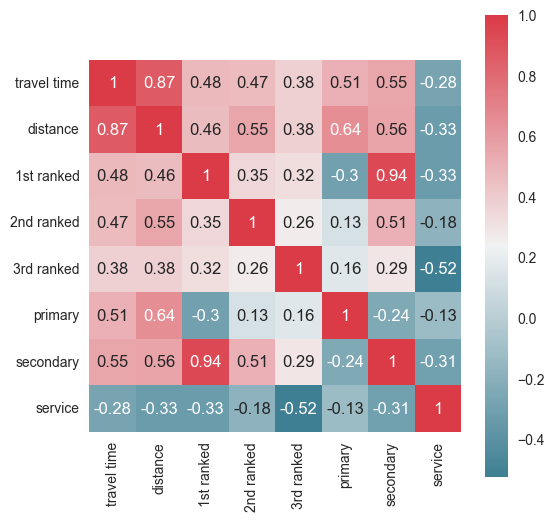

In [234]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df_.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [235]:
x = np.array(df_.iloc[:,1:])
y = np.array(df_['travel time'])
x

array([[0.22759008, 0.08758294, 0.19108064, ..., 0.2101521 , 0.        ,
        0.20210969],
       [0.23007385, 0.08758294, 0.57037736, ..., 0.2305172 , 0.        ,
        0.        ],
       [0.22949631, 0.08758294, 0.57037736, ..., 0.22184539, 0.        ,
        0.20210969],
       ...,
       [0.4715468 , 0.08758294, 0.57037736, ..., 0.44615305, 0.03000051,
        0.        ],
       [0.47739699, 0.08758294, 0.57037736, ..., 0.44615305, 0.03000051,
        0.        ],
       [0.46444217, 0.08758294, 0.57037736, ..., 0.44615305, 0.03000051,
        0.        ]])

In [236]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [237]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12984, 7)
(3247, 7)


In [238]:
# inputs: distance + roadtypes distance
model8_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model8_1_3

Epoch 1/500
406/406 [==============================] - 1s 1ms/step - loss: 1073409.1250 - mape: 98.4719 - rmse: 1036.0546 - val_loss: 1045273.8750 - val_mape: 95.4021 - val_rmse: 1022.3864
Epoch 2/500
406/406 [==============================] - 0s 774us/step - loss: 932264.3750 - mape: 88.9821 - rmse: 965.5384 - val_loss: 842986.8750 - val_mape: 81.4588 - val_rmse: 918.1432
Epoch 3/500
406/406 [==============================] - 0s 766us/step - loss: 700755.1250 - mape: 71.8040 - rmse: 837.1112 - val_loss: 595736.6250 - val_mape: 61.7214 - val_rmse: 771.8398
Epoch 4/500
406/406 [==============================] - 0s 752us/step - loss: 465271.8438 - mape: 51.7747 - rmse: 682.1084 - val_loss: 379554.4062 - val_mape: 43.6270 - val_rmse: 616.0799
Epoch 5/500
406/406 [==============================] - 0s 740us/step - loss: 285250.4375 - mape: 38.0528 - rmse: 534.0884 - val_loss: 234641.6406 - val_mape: 35.0255 - val_rmse: 484.3982
Epoch 6/500
406/406 [==============================] - 0s 734us

Epoch 45/500
406/406 [==============================] - 0s 841us/step - loss: 66584.7812 - mape: 23.4547 - rmse: 258.0403 - val_loss: 75171.0469 - val_mape: 23.3949 - val_rmse: 274.1734
Epoch 46/500
406/406 [==============================] - 0s 855us/step - loss: 66581.5938 - mape: 23.2874 - rmse: 258.0341 - val_loss: 75094.9062 - val_mape: 23.5804 - val_rmse: 274.0345
Epoch 47/500
406/406 [==============================] - 0s 838us/step - loss: 66560.3516 - mape: 23.4322 - rmse: 257.9929 - val_loss: 75160.9609 - val_mape: 23.3746 - val_rmse: 274.1550
Epoch 48/500
406/406 [==============================] - 0s 839us/step - loss: 66548.5156 - mape: 23.3929 - rmse: 257.9700 - val_loss: 75171.4922 - val_mape: 23.3203 - val_rmse: 274.1742
Epoch 49/500
406/406 [==============================] - 0s 842us/step - loss: 66544.8516 - mape: 23.3505 - rmse: 257.9629 - val_loss: 75148.7656 - val_mape: 23.3467 - val_rmse: 274.1328
Epoch 50/500
406/406 [==============================] - 0s 837us/step 

406/406 [==============================] - 0s 839us/step - loss: 66044.8828 - mape: 23.2284 - rmse: 256.9920 - val_loss: 74599.3359 - val_mape: 23.5032 - val_rmse: 273.1288
Epoch 90/500
406/406 [==============================] - 0s 834us/step - loss: 66025.9688 - mape: 23.2251 - rmse: 256.9552 - val_loss: 74715.9531 - val_mape: 23.1521 - val_rmse: 273.3422
Epoch 91/500
406/406 [==============================] - 0s 833us/step - loss: 66024.2422 - mape: 23.2016 - rmse: 256.9518 - val_loss: 74720.8438 - val_mape: 23.1195 - val_rmse: 273.3511
Epoch 92/500
406/406 [==============================] - 0s 840us/step - loss: 66010.7969 - mape: 23.1787 - rmse: 256.9257 - val_loss: 74634.7109 - val_mape: 23.2839 - val_rmse: 273.1935
Epoch 93/500
406/406 [==============================] - 0s 835us/step - loss: 65994.0000 - mape: 23.2228 - rmse: 256.8930 - val_loss: 74767.3125 - val_mape: 22.9864 - val_rmse: 273.4361
Epoch 94/500
406/406 [==============================] - 0s 858us/step - loss: 65994

Epoch 133/500
406/406 [==============================] - 0s 753us/step - loss: 65552.8203 - mape: 22.9828 - rmse: 256.0328 - val_loss: 74277.4922 - val_mape: 23.0417 - val_rmse: 272.5390
Epoch 134/500
406/406 [==============================] - 0s 752us/step - loss: 65535.2891 - mape: 23.0760 - rmse: 255.9986 - val_loss: 74393.5781 - val_mape: 22.7717 - val_rmse: 272.7519
Epoch 135/500
406/406 [==============================] - 0s 749us/step - loss: 65488.0312 - mape: 23.0086 - rmse: 255.9063 - val_loss: 74506.3906 - val_mape: 22.5791 - val_rmse: 272.9586
Epoch 136/500
406/406 [==============================] - 0s 754us/step - loss: 65527.0234 - mape: 22.8740 - rmse: 255.9825 - val_loss: 74316.2734 - val_mape: 22.9051 - val_rmse: 272.6101
Epoch 137/500
406/406 [==============================] - 0s 766us/step - loss: 65496.1719 - mape: 22.9290 - rmse: 255.9222 - val_loss: 74109.5000 - val_mape: 23.5113 - val_rmse: 272.2306
Epoch 138/500
406/406 [==============================] - 0s 691us

Epoch 177/500
406/406 [==============================] - 0s 833us/step - loss: 65122.6523 - mape: 22.8338 - rmse: 255.1914 - val_loss: 73997.7656 - val_mape: 22.7308 - val_rmse: 272.0253
Epoch 178/500
406/406 [==============================] - 0s 836us/step - loss: 65079.9062 - mape: 22.6891 - rmse: 255.1076 - val_loss: 73825.5547 - val_mape: 23.1801 - val_rmse: 271.7086
Epoch 179/500
406/406 [==============================] - 0s 864us/step - loss: 65082.7109 - mape: 22.8872 - rmse: 255.1131 - val_loss: 74033.6719 - val_mape: 22.6353 - val_rmse: 272.0913
Epoch 180/500
406/406 [==============================] - 0s 843us/step - loss: 65077.4180 - mape: 22.7305 - rmse: 255.1028 - val_loss: 73851.5234 - val_mape: 23.0453 - val_rmse: 271.7564
Epoch 181/500
406/406 [==============================] - 0s 847us/step - loss: 65070.7070 - mape: 22.8202 - rmse: 255.0896 - val_loss: 73871.7969 - val_mape: 22.9369 - val_rmse: 271.7937
Epoch 182/500
406/406 [==============================] - 0s 843us

Epoch 221/500
406/406 [==============================] - 0s 760us/step - loss: 64738.8281 - mape: 22.6835 - rmse: 254.4383 - val_loss: 73675.3203 - val_mape: 22.6720 - val_rmse: 271.4320
Epoch 222/500
406/406 [==============================] - 0s 757us/step - loss: 64737.4375 - mape: 22.6124 - rmse: 254.4355 - val_loss: 73575.6016 - val_mape: 22.9262 - val_rmse: 271.2482
Epoch 223/500
406/406 [==============================] - 0s 761us/step - loss: 64724.5742 - mape: 22.6816 - rmse: 254.4102 - val_loss: 73664.8125 - val_mape: 22.6647 - val_rmse: 271.4126
Epoch 224/500
406/406 [==============================] - 0s 756us/step - loss: 64713.6875 - mape: 22.5691 - rmse: 254.3889 - val_loss: 73665.5312 - val_mape: 22.6627 - val_rmse: 271.4139
Epoch 225/500
406/406 [==============================] - 0s 745us/step - loss: 64699.0742 - mape: 22.5960 - rmse: 254.3601 - val_loss: 73564.7109 - val_mape: 22.8995 - val_rmse: 271.2281
Epoch 226/500
406/406 [==============================] - 0s 749us

Epoch 265/500
406/406 [==============================] - 0s 753us/step - loss: 64445.3438 - mape: 22.5093 - rmse: 253.8609 - val_loss: 73437.9375 - val_mape: 22.5648 - val_rmse: 270.9944
Epoch 266/500
406/406 [==============================] - 0s 751us/step - loss: 64428.1016 - mape: 22.5777 - rmse: 253.8269 - val_loss: 73436.4141 - val_mape: 22.5465 - val_rmse: 270.9915
Epoch 267/500
406/406 [==============================] - 0s 747us/step - loss: 64432.2422 - mape: 22.4244 - rmse: 253.8351 - val_loss: 73414.7656 - val_mape: 22.5844 - val_rmse: 270.9516
Epoch 268/500
406/406 [==============================] - 0s 753us/step - loss: 64415.2070 - mape: 22.4600 - rmse: 253.8015 - val_loss: 73301.9844 - val_mape: 22.9290 - val_rmse: 270.7434
Epoch 269/500
406/406 [==============================] - 0s 749us/step - loss: 64428.3555 - mape: 22.5251 - rmse: 253.8274 - val_loss: 73380.2969 - val_mape: 22.6422 - val_rmse: 270.8880
Epoch 270/500
406/406 [==============================] - 0s 759us

Epoch 309/500
406/406 [==============================] - 0s 752us/step - loss: 64191.9453 - mape: 22.4402 - rmse: 253.3613 - val_loss: 73270.8906 - val_mape: 22.4135 - val_rmse: 270.6860
Epoch 310/500
406/406 [==============================] - 0s 758us/step - loss: 64189.7031 - mape: 22.3403 - rmse: 253.3569 - val_loss: 73157.9062 - val_mape: 22.7341 - val_rmse: 270.4772
Epoch 311/500
406/406 [==============================] - 0s 752us/step - loss: 64190.5703 - mape: 22.3585 - rmse: 253.3586 - val_loss: 73217.3359 - val_mape: 22.5379 - val_rmse: 270.5870
Epoch 312/500
406/406 [==============================] - 0s 758us/step - loss: 64189.3984 - mape: 22.4543 - rmse: 253.3563 - val_loss: 73317.3125 - val_mape: 22.2997 - val_rmse: 270.7717
Epoch 313/500
406/406 [==============================] - 0s 749us/step - loss: 64181.4023 - mape: 22.3482 - rmse: 253.3405 - val_loss: 73369.7031 - val_mape: 22.1776 - val_rmse: 270.8684
Epoch 314/500
406/406 [==============================] - 0s 745us

Epoch 353/500
406/406 [==============================] - 0s 750us/step - loss: 64027.8008 - mape: 22.2929 - rmse: 253.0372 - val_loss: 73266.4375 - val_mape: 22.1068 - val_rmse: 270.6777
Epoch 354/500
406/406 [==============================] - 0s 763us/step - loss: 64029.0703 - mape: 22.1535 - rmse: 253.0397 - val_loss: 73046.8516 - val_mape: 22.6443 - val_rmse: 270.2718
Epoch 355/500
406/406 [==============================] - 0s 760us/step - loss: 64003.1797 - mape: 22.4333 - rmse: 252.9885 - val_loss: 73270.6953 - val_mape: 22.0751 - val_rmse: 270.6856
Epoch 356/500
406/406 [==============================] - 0s 762us/step - loss: 64006.7773 - mape: 22.2714 - rmse: 252.9956 - val_loss: 73229.0234 - val_mape: 22.1590 - val_rmse: 270.6086
Epoch 357/500
406/406 [==============================] - 0s 759us/step - loss: 64011.6758 - mape: 22.1578 - rmse: 253.0053 - val_loss: 73067.9531 - val_mape: 22.5335 - val_rmse: 270.3109
Epoch 358/500
406/406 [==============================] - 0s 754us

Epoch 397/500
406/406 [==============================] - 0s 745us/step - loss: 63894.3672 - mape: 22.1686 - rmse: 252.7733 - val_loss: 73114.9062 - val_mape: 22.2038 - val_rmse: 270.3977
Epoch 398/500
406/406 [==============================] - 0s 745us/step - loss: 63891.2930 - mape: 22.1904 - rmse: 252.7673 - val_loss: 73026.1172 - val_mape: 22.4122 - val_rmse: 270.2335
Epoch 399/500
406/406 [==============================] - 0s 734us/step - loss: 63900.1836 - mape: 22.2513 - rmse: 252.7849 - val_loss: 73042.6719 - val_mape: 22.3503 - val_rmse: 270.2641
Epoch 400/500
406/406 [==============================] - 0s 748us/step - loss: 63894.9766 - mape: 22.2357 - rmse: 252.7746 - val_loss: 73098.5391 - val_mape: 22.2173 - val_rmse: 270.3674
Epoch 401/500
406/406 [==============================] - 0s 750us/step - loss: 63890.9961 - mape: 22.1513 - rmse: 252.7667 - val_loss: 72993.5703 - val_mape: 22.4715 - val_rmse: 270.1732
Epoch 402/500
406/406 [==============================] - 0s 744us

Epoch 441/500
406/406 [==============================] - 0s 764us/step - loss: 63789.9414 - mape: 22.1537 - rmse: 252.5667 - val_loss: 73260.2344 - val_mape: 21.7991 - val_rmse: 270.6663
Epoch 442/500
406/406 [==============================] - 0s 757us/step - loss: 63811.6953 - mape: 22.0683 - rmse: 252.6098 - val_loss: 73038.8047 - val_mape: 22.1908 - val_rmse: 270.2569
Epoch 443/500
406/406 [==============================] - 0s 757us/step - loss: 63797.3281 - mape: 22.1705 - rmse: 252.5813 - val_loss: 73051.5000 - val_mape: 22.1522 - val_rmse: 270.2804
Epoch 444/500
406/406 [==============================] - 0s 748us/step - loss: 63806.6797 - mape: 22.1123 - rmse: 252.5998 - val_loss: 73121.2344 - val_mape: 22.0231 - val_rmse: 270.4094
Epoch 445/500
406/406 [==============================] - 0s 759us/step - loss: 63805.5039 - mape: 22.1850 - rmse: 252.5975 - val_loss: 73018.6641 - val_mape: 22.1948 - val_rmse: 270.2197
Epoch 446/500
406/406 [==============================] - 0s 755us

Epoch 485/500
406/406 [==============================] - 0s 749us/step - loss: 63740.3555 - mape: 22.0968 - rmse: 252.4685 - val_loss: 72905.6172 - val_mape: 22.3990 - val_rmse: 270.0104
Epoch 486/500
406/406 [==============================] - 0s 754us/step - loss: 63724.5781 - mape: 22.0571 - rmse: 252.4373 - val_loss: 72882.3125 - val_mape: 22.4685 - val_rmse: 269.9673
Epoch 487/500
406/406 [==============================] - 0s 755us/step - loss: 63716.5391 - mape: 22.1756 - rmse: 252.4214 - val_loss: 73012.8750 - val_mape: 22.1015 - val_rmse: 270.2090
Epoch 488/500
406/406 [==============================] - 0s 753us/step - loss: 63726.5625 - mape: 22.0968 - rmse: 252.4412 - val_loss: 72952.2109 - val_mape: 22.2547 - val_rmse: 270.0967
Epoch 489/500
406/406 [==============================] - 0s 760us/step - loss: 63731.0508 - mape: 22.1354 - rmse: 252.4501 - val_loss: 73061.6094 - val_mape: 21.9867 - val_rmse: 270.2991
Epoch 490/500
406/406 [==============================] - 0s 753us

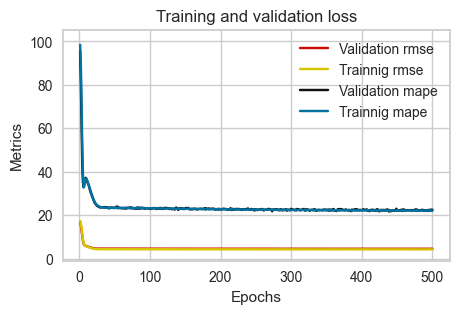

In [239]:
plotme(model8_1_3)

In [240]:
# inputs: distance + roadtypes distance
model8_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model8_1_5

Epoch 1/500
406/406 [==============================] - 1s 901us/step - loss: 1047382.1250 - mape: 96.8804 - rmse: 1023.4169 - val_loss: 974117.6875 - val_mape: 90.7643 - val_rmse: 986.9740
Epoch 2/500
406/406 [==============================] - 0s 775us/step - loss: 796059.7500 - mape: 79.1517 - rmse: 892.2218 - val_loss: 643728.3750 - val_mape: 65.9438 - val_rmse: 802.3268
Epoch 3/500
406/406 [==============================] - 0s 766us/step - loss: 464567.5938 - mape: 51.9846 - rmse: 681.5920 - val_loss: 339563.8125 - val_mape: 41.0823 - val_rmse: 582.7211
Epoch 4/500
406/406 [==============================] - 0s 770us/step - loss: 234262.0156 - mape: 35.3064 - rmse: 484.0062 - val_loss: 181658.1719 - val_mape: 33.0486 - val_rmse: 426.2138
Epoch 5/500
406/406 [==============================] - 0s 772us/step - loss: 142612.4844 - mape: 33.0606 - rmse: 377.6407 - val_loss: 135460.1562 - val_mape: 34.9268 - val_rmse: 368.0491
Epoch 6/500
406/406 [==============================] - 0s 766us

Epoch 45/500
406/406 [==============================] - 0s 766us/step - loss: 66419.0859 - mape: 23.4470 - rmse: 257.7190 - val_loss: 75400.9375 - val_mape: 22.8119 - val_rmse: 274.5923
Epoch 46/500
406/406 [==============================] - 0s 759us/step - loss: 66436.2500 - mape: 23.2895 - rmse: 257.7523 - val_loss: 74945.6094 - val_mape: 23.5852 - val_rmse: 273.7620
Epoch 47/500
406/406 [==============================] - 0s 762us/step - loss: 66404.3203 - mape: 23.4078 - rmse: 257.6904 - val_loss: 74903.0859 - val_mape: 23.6499 - val_rmse: 273.6843
Epoch 48/500
406/406 [==============================] - 0s 763us/step - loss: 66400.8594 - mape: 23.3741 - rmse: 257.6837 - val_loss: 75131.0156 - val_mape: 23.1331 - val_rmse: 274.1004
Epoch 49/500
406/406 [==============================] - 0s 742us/step - loss: 66393.2734 - mape: 23.4362 - rmse: 257.6689 - val_loss: 74995.0312 - val_mape: 23.3429 - val_rmse: 273.8522
Epoch 50/500
406/406 [==============================] - 0s 718us/step 

406/406 [==============================] - 0s 765us/step - loss: 65826.0625 - mape: 23.2173 - rmse: 256.5659 - val_loss: 74404.5312 - val_mape: 23.5182 - val_rmse: 272.7719
Epoch 90/500
406/406 [==============================] - 0s 765us/step - loss: 65827.3984 - mape: 23.2869 - rmse: 256.5685 - val_loss: 74571.7344 - val_mape: 23.0840 - val_rmse: 273.0782
Epoch 91/500
406/406 [==============================] - 0s 768us/step - loss: 65803.6406 - mape: 23.2494 - rmse: 256.5222 - val_loss: 74566.4531 - val_mape: 23.0397 - val_rmse: 273.0686
Epoch 92/500
406/406 [==============================] - 0s 756us/step - loss: 65789.6953 - mape: 23.1632 - rmse: 256.4950 - val_loss: 74539.1641 - val_mape: 23.0973 - val_rmse: 273.0186
Epoch 93/500
406/406 [==============================] - 0s 764us/step - loss: 65776.6172 - mape: 23.2047 - rmse: 256.4695 - val_loss: 74354.3359 - val_mape: 23.5069 - val_rmse: 272.6799
Epoch 94/500
406/406 [==============================] - 0s 764us/step - loss: 65781

Epoch 133/500
406/406 [==============================] - 0s 773us/step - loss: 65261.3281 - mape: 22.8977 - rmse: 255.4630 - val_loss: 73913.8984 - val_mape: 23.5244 - val_rmse: 271.8711
Epoch 134/500
406/406 [==============================] - 0s 762us/step - loss: 65260.1250 - mape: 23.0870 - rmse: 255.4606 - val_loss: 74129.2969 - val_mape: 22.8987 - val_rmse: 272.2670
Epoch 135/500
406/406 [==============================] - 0s 768us/step - loss: 65223.4531 - mape: 23.0567 - rmse: 255.3888 - val_loss: 74013.5625 - val_mape: 23.0755 - val_rmse: 272.0544
Epoch 136/500
406/406 [==============================] - 0s 757us/step - loss: 65245.0039 - mape: 22.9785 - rmse: 255.4310 - val_loss: 73911.8594 - val_mape: 23.3863 - val_rmse: 271.8674
Epoch 137/500
406/406 [==============================] - 0s 775us/step - loss: 65210.1484 - mape: 23.0218 - rmse: 255.3628 - val_loss: 74141.3281 - val_mape: 22.7859 - val_rmse: 272.2891
Epoch 138/500
406/406 [==============================] - 0s 770us

Epoch 177/500
406/406 [==============================] - 0s 752us/step - loss: 64799.9375 - mape: 22.7991 - rmse: 254.5583 - val_loss: 73596.4844 - val_mape: 23.2589 - val_rmse: 271.2867
Epoch 178/500
406/406 [==============================] - 0s 749us/step - loss: 64800.0352 - mape: 22.8162 - rmse: 254.5585 - val_loss: 73693.6953 - val_mape: 22.9117 - val_rmse: 271.4658
Epoch 179/500
406/406 [==============================] - 0s 759us/step - loss: 64793.5117 - mape: 22.8030 - rmse: 254.5457 - val_loss: 73744.6328 - val_mape: 22.7921 - val_rmse: 271.5596
Epoch 180/500
406/406 [==============================] - 0s 759us/step - loss: 64776.1641 - mape: 22.7993 - rmse: 254.5116 - val_loss: 73838.1406 - val_mape: 22.6085 - val_rmse: 271.7318
Epoch 181/500
406/406 [==============================] - 0s 747us/step - loss: 64776.6211 - mape: 22.7535 - rmse: 254.5125 - val_loss: 73657.1484 - val_mape: 22.9526 - val_rmse: 271.3985
Epoch 182/500
406/406 [==============================] - 0s 751us

Epoch 221/500
406/406 [==============================] - 0s 758us/step - loss: 64475.9844 - mape: 22.6217 - rmse: 253.9212 - val_loss: 73482.8281 - val_mape: 22.6497 - val_rmse: 271.0771
Epoch 222/500
406/406 [==============================] - 0s 759us/step - loss: 64478.4492 - mape: 22.6555 - rmse: 253.9261 - val_loss: 73440.8594 - val_mape: 22.7209 - val_rmse: 270.9997
Epoch 223/500
406/406 [==============================] - 0s 756us/step - loss: 64459.9023 - mape: 22.5993 - rmse: 253.8895 - val_loss: 73453.5391 - val_mape: 22.6925 - val_rmse: 271.0231
Epoch 224/500
406/406 [==============================] - 0s 758us/step - loss: 64464.7695 - mape: 22.5935 - rmse: 253.8991 - val_loss: 73601.3750 - val_mape: 22.4235 - val_rmse: 271.2957
Epoch 225/500
406/406 [==============================] - 0s 754us/step - loss: 64445.6836 - mape: 22.5540 - rmse: 253.8615 - val_loss: 73448.4062 - val_mape: 22.7176 - val_rmse: 271.0137
Epoch 226/500
406/406 [==============================] - 0s 760us

Epoch 265/500
406/406 [==============================] - 0s 758us/step - loss: 64250.4062 - mape: 22.4372 - rmse: 253.4766 - val_loss: 73509.3359 - val_mape: 22.2518 - val_rmse: 271.1260
Epoch 266/500
406/406 [==============================] - 0s 759us/step - loss: 64240.5859 - mape: 22.4333 - rmse: 253.4573 - val_loss: 73234.6172 - val_mape: 22.7923 - val_rmse: 270.6190
Epoch 267/500
406/406 [==============================] - 0s 768us/step - loss: 64219.0312 - mape: 22.5495 - rmse: 253.4147 - val_loss: 73525.8359 - val_mape: 22.2379 - val_rmse: 271.1565
Epoch 268/500
406/406 [==============================] - 0s 770us/step - loss: 64240.2617 - mape: 22.4016 - rmse: 253.4566 - val_loss: 73243.5312 - val_mape: 22.7238 - val_rmse: 270.6354
Epoch 269/500
406/406 [==============================] - 0s 754us/step - loss: 64235.8711 - mape: 22.5643 - rmse: 253.4480 - val_loss: 73215.1094 - val_mape: 22.7970 - val_rmse: 270.5829
Epoch 270/500
406/406 [==============================] - 0s 758us

Epoch 309/500
406/406 [==============================] - 0s 761us/step - loss: 64082.5781 - mape: 22.3205 - rmse: 253.1454 - val_loss: 73185.6719 - val_mape: 22.5282 - val_rmse: 270.5285
Epoch 310/500
406/406 [==============================] - 0s 764us/step - loss: 64065.0195 - mape: 22.3629 - rmse: 253.1107 - val_loss: 73140.7266 - val_mape: 22.6681 - val_rmse: 270.4454
Epoch 311/500
406/406 [==============================] - 0s 751us/step - loss: 64085.8516 - mape: 22.3566 - rmse: 253.1518 - val_loss: 73159.8594 - val_mape: 22.6002 - val_rmse: 270.4808
Epoch 312/500
406/406 [==============================] - 0s 752us/step - loss: 64076.4453 - mape: 22.4408 - rmse: 253.1333 - val_loss: 73261.1172 - val_mape: 22.3506 - val_rmse: 270.6679
Epoch 313/500
406/406 [==============================] - 0s 753us/step - loss: 64067.3750 - mape: 22.4046 - rmse: 253.1153 - val_loss: 73240.6094 - val_mape: 22.4033 - val_rmse: 270.6300
Epoch 314/500
406/406 [==============================] - 0s 752us

Epoch 353/500
406/406 [==============================] - 0s 759us/step - loss: 63986.0508 - mape: 22.2700 - rmse: 252.9546 - val_loss: 73127.1328 - val_mape: 22.4971 - val_rmse: 270.4203
Epoch 354/500
406/406 [==============================] - 0s 755us/step - loss: 63987.2148 - mape: 22.3697 - rmse: 252.9569 - val_loss: 73202.6250 - val_mape: 22.3144 - val_rmse: 270.5598
Epoch 355/500
406/406 [==============================] - 0s 766us/step - loss: 63944.9766 - mape: 22.2399 - rmse: 252.8734 - val_loss: 73014.2969 - val_mape: 22.9435 - val_rmse: 270.2116
Epoch 356/500
406/406 [==============================] - 0s 772us/step - loss: 63987.9570 - mape: 22.2629 - rmse: 252.9584 - val_loss: 73181.0078 - val_mape: 22.3682 - val_rmse: 270.5199
Epoch 357/500
406/406 [==============================] - 0s 762us/step - loss: 63975.0781 - mape: 22.3292 - rmse: 252.9330 - val_loss: 73284.3828 - val_mape: 22.2085 - val_rmse: 270.7109
Epoch 358/500
406/406 [==============================] - 0s 766us

Epoch 397/500
406/406 [==============================] - 0s 761us/step - loss: 63920.9219 - mape: 22.3129 - rmse: 252.8259 - val_loss: 73191.6875 - val_mape: 22.1494 - val_rmse: 270.5396
Epoch 398/500
406/406 [==============================] - 0s 735us/step - loss: 63907.3711 - mape: 22.1925 - rmse: 252.7991 - val_loss: 73154.1875 - val_mape: 22.2365 - val_rmse: 270.4703
Epoch 399/500
406/406 [==============================] - 0s 744us/step - loss: 63903.0195 - mape: 22.2534 - rmse: 252.7905 - val_loss: 73111.9453 - val_mape: 22.3249 - val_rmse: 270.3922
Epoch 400/500
406/406 [==============================] - 0s 741us/step - loss: 63915.8945 - mape: 22.2679 - rmse: 252.8159 - val_loss: 73038.5469 - val_mape: 22.5218 - val_rmse: 270.2564
Epoch 401/500
406/406 [==============================] - 0s 757us/step - loss: 63916.2031 - mape: 22.2166 - rmse: 252.8165 - val_loss: 73207.4766 - val_mape: 22.1181 - val_rmse: 270.5688
Epoch 402/500
406/406 [==============================] - 0s 750us

Epoch 441/500
406/406 [==============================] - 0s 758us/step - loss: 63864.5664 - mape: 22.1378 - rmse: 252.7144 - val_loss: 73051.8359 - val_mape: 22.3237 - val_rmse: 270.2810
Epoch 442/500
406/406 [==============================] - 0s 757us/step - loss: 63842.4414 - mape: 22.3057 - rmse: 252.6706 - val_loss: 73338.4297 - val_mape: 21.7931 - val_rmse: 270.8107
Epoch 443/500
406/406 [==============================] - 0s 750us/step - loss: 63847.9648 - mape: 22.0865 - rmse: 252.6815 - val_loss: 73094.1172 - val_mape: 22.1995 - val_rmse: 270.3592
Epoch 444/500
406/406 [==============================] - 0s 755us/step - loss: 63863.7031 - mape: 22.1643 - rmse: 252.7127 - val_loss: 73068.4141 - val_mape: 22.2591 - val_rmse: 270.3117
Epoch 445/500
406/406 [==============================] - 0s 758us/step - loss: 63844.9375 - mape: 22.2063 - rmse: 252.6756 - val_loss: 73117.5781 - val_mape: 22.1938 - val_rmse: 270.4026
Epoch 446/500
406/406 [==============================] - 0s 758us

Epoch 485/500
406/406 [==============================] - 0s 762us/step - loss: 63831.6641 - mape: 22.1399 - rmse: 252.6493 - val_loss: 72991.8672 - val_mape: 22.3882 - val_rmse: 270.1701
Epoch 486/500
406/406 [==============================] - 0s 759us/step - loss: 63812.9141 - mape: 22.1809 - rmse: 252.6122 - val_loss: 73041.3672 - val_mape: 22.2600 - val_rmse: 270.2617
Epoch 487/500
406/406 [==============================] - 0s 759us/step - loss: 63828.5781 - mape: 22.1624 - rmse: 252.6432 - val_loss: 72941.8438 - val_mape: 22.5275 - val_rmse: 270.0775
Epoch 488/500
406/406 [==============================] - 0s 756us/step - loss: 63818.4102 - mape: 22.2542 - rmse: 252.6231 - val_loss: 73248.9297 - val_mape: 21.8886 - val_rmse: 270.6454
Epoch 489/500
406/406 [==============================] - 0s 757us/step - loss: 63821.3906 - mape: 22.1404 - rmse: 252.6290 - val_loss: 73032.0000 - val_mape: 22.2356 - val_rmse: 270.2443
Epoch 490/500
406/406 [==============================] - 0s 767us

In [241]:
# inputs: distance + roadtypes distance
model8_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model8_1_1

Epoch 1/500
406/406 [==============================] - 1s 971us/step - loss: 614468.5625 - mape: 65.6449 - rmse: 783.8804 - val_loss: 127674.2188 - val_mape: 37.6024 - val_rmse: 357.3153
Epoch 2/500
406/406 [==============================] - 0s 806us/step - loss: 108286.5234 - mape: 36.3773 - rmse: 329.0692 - val_loss: 103162.7891 - val_mape: 34.0759 - val_rmse: 321.1896
Epoch 3/500
406/406 [==============================] - 0s 816us/step - loss: 85852.3984 - mape: 31.6111 - rmse: 293.0058 - val_loss: 84301.6484 - val_mape: 29.0610 - val_rmse: 290.3475
Epoch 4/500
406/406 [==============================] - 0s 808us/step - loss: 72050.1641 - mape: 27.0198 - rmse: 268.4216 - val_loss: 76584.0781 - val_mape: 25.2558 - val_rmse: 276.7383
Epoch 5/500
406/406 [==============================] - 0s 811us/step - loss: 67628.3438 - mape: 24.4983 - rmse: 260.0545 - val_loss: 75683.5781 - val_mape: 23.4510 - val_rmse: 275.1065
Epoch 6/500
406/406 [==============================] - 0s 824us/step - 

406/406 [==============================] - 0s 843us/step - loss: 64052.4180 - mape: 22.5922 - rmse: 253.0858 - val_loss: 72551.0156 - val_mape: 22.4164 - val_rmse: 269.3530
Epoch 90/500
406/406 [==============================] - 0s 955us/step - loss: 64052.6836 - mape: 22.4922 - rmse: 253.0863 - val_loss: 72615.7109 - val_mape: 22.3027 - val_rmse: 269.4730
Epoch 91/500
406/406 [==============================] - 0s 935us/step - loss: 64054.1680 - mape: 22.5784 - rmse: 253.0892 - val_loss: 72623.5391 - val_mape: 22.3474 - val_rmse: 269.4875
Epoch 92/500
406/406 [==============================] - 0s 979us/step - loss: 64069.3867 - mape: 22.6172 - rmse: 253.1193 - val_loss: 72498.9766 - val_mape: 22.5432 - val_rmse: 269.2563
Epoch 93/500
406/406 [==============================] - 0s 833us/step - loss: 64081.8203 - mape: 22.5264 - rmse: 253.1439 - val_loss: 73424.5234 - val_mape: 21.4647 - val_rmse: 270.9696
Epoch 94/500
406/406 [==============================] - 0s 815us/step - loss: 64023

Epoch 133/500
406/406 [==============================] - 0s 809us/step - loss: 63567.0742 - mape: 22.4894 - rmse: 252.1251 - val_loss: 73139.2734 - val_mape: 21.1459 - val_rmse: 270.4427
Epoch 134/500
406/406 [==============================] - 0s 807us/step - loss: 63596.1250 - mape: 22.3459 - rmse: 252.1827 - val_loss: 72579.2969 - val_mape: 21.6843 - val_rmse: 269.4055
Epoch 135/500
406/406 [==============================] - 0s 796us/step - loss: 63516.8594 - mape: 22.2964 - rmse: 252.0255 - val_loss: 72008.4922 - val_mape: 23.0575 - val_rmse: 268.3440
Epoch 136/500
406/406 [==============================] - 0s 817us/step - loss: 63512.7734 - mape: 22.4373 - rmse: 252.0174 - val_loss: 72426.5391 - val_mape: 21.9500 - val_rmse: 269.1218
Epoch 137/500
406/406 [==============================] - 0s 809us/step - loss: 63552.8867 - mape: 22.3729 - rmse: 252.0970 - val_loss: 72027.7344 - val_mape: 23.0968 - val_rmse: 268.3798
Epoch 138/500
406/406 [==============================] - 0s 799us

Epoch 177/500
406/406 [==============================] - 0s 799us/step - loss: 63088.0625 - mape: 22.2484 - rmse: 251.1734 - val_loss: 71849.8594 - val_mape: 22.2352 - val_rmse: 268.0482
Epoch 178/500
406/406 [==============================] - 0s 806us/step - loss: 63080.7734 - mape: 22.2262 - rmse: 251.1589 - val_loss: 71796.7344 - val_mape: 22.4670 - val_rmse: 267.9491
Epoch 179/500
406/406 [==============================] - 0s 799us/step - loss: 63048.0391 - mape: 22.1278 - rmse: 251.0937 - val_loss: 71661.7031 - val_mape: 23.1240 - val_rmse: 267.6970
Epoch 180/500
406/406 [==============================] - 0s 799us/step - loss: 63021.0469 - mape: 22.2290 - rmse: 251.0399 - val_loss: 72021.9922 - val_mape: 21.9098 - val_rmse: 268.3691
Epoch 181/500
406/406 [==============================] - 0s 804us/step - loss: 63063.9883 - mape: 22.1492 - rmse: 251.1254 - val_loss: 71869.6797 - val_mape: 22.2922 - val_rmse: 268.0852
Epoch 182/500
406/406 [==============================] - 0s 801us

Epoch 221/500
406/406 [==============================] - 0s 820us/step - loss: 62613.6641 - mape: 21.9893 - rmse: 250.2272 - val_loss: 71398.1172 - val_mape: 23.1265 - val_rmse: 267.2043
Epoch 222/500
406/406 [==============================] - 0s 811us/step - loss: 62569.0508 - mape: 22.0725 - rmse: 250.1381 - val_loss: 71934.1641 - val_mape: 21.5089 - val_rmse: 268.2054
Epoch 223/500
406/406 [==============================] - 0s 822us/step - loss: 62600.6055 - mape: 22.0059 - rmse: 250.2011 - val_loss: 71957.2266 - val_mape: 21.3555 - val_rmse: 268.2484
Epoch 224/500
406/406 [==============================] - 0s 821us/step - loss: 62575.2266 - mape: 22.0038 - rmse: 250.1504 - val_loss: 71568.7500 - val_mape: 22.2115 - val_rmse: 267.5234
Epoch 225/500
406/406 [==============================] - 0s 809us/step - loss: 62650.5000 - mape: 22.0347 - rmse: 250.3008 - val_loss: 71705.3438 - val_mape: 21.7913 - val_rmse: 267.7785
Epoch 226/500
406/406 [==============================] - 0s 807us

Epoch 265/500
406/406 [==============================] - 0s 831us/step - loss: 62235.4219 - mape: 21.8025 - rmse: 249.4703 - val_loss: 71275.5156 - val_mape: 22.4620 - val_rmse: 266.9748
Epoch 266/500
406/406 [==============================] - 0s 809us/step - loss: 62268.6250 - mape: 21.9427 - rmse: 249.5368 - val_loss: 71312.0469 - val_mape: 22.1402 - val_rmse: 267.0432
Epoch 267/500
406/406 [==============================] - 0s 815us/step - loss: 62285.8320 - mape: 21.9701 - rmse: 249.5713 - val_loss: 71447.5078 - val_mape: 21.6214 - val_rmse: 267.2967
Epoch 268/500
406/406 [==============================] - 0s 821us/step - loss: 62172.3438 - mape: 21.7921 - rmse: 249.3438 - val_loss: 71657.8516 - val_mape: 21.8788 - val_rmse: 267.6898
Epoch 269/500
406/406 [==============================] - 0s 818us/step - loss: 62260.4805 - mape: 22.0462 - rmse: 249.5205 - val_loss: 72240.2500 - val_mape: 20.4882 - val_rmse: 268.7755
Epoch 270/500
406/406 [==============================] - 0s 814us

Epoch 309/500
406/406 [==============================] - 0s 830us/step - loss: 62004.2578 - mape: 21.7980 - rmse: 249.0065 - val_loss: 71737.8281 - val_mape: 21.2241 - val_rmse: 267.8392
Epoch 310/500
406/406 [==============================] - 0s 829us/step - loss: 62010.6133 - mape: 21.8681 - rmse: 249.0193 - val_loss: 71531.5625 - val_mape: 21.4007 - val_rmse: 267.4539
Epoch 311/500
406/406 [==============================] - 0s 827us/step - loss: 62093.1055 - mape: 21.6777 - rmse: 249.1849 - val_loss: 71302.6094 - val_mape: 22.3448 - val_rmse: 267.0255
Epoch 312/500
406/406 [==============================] - 0s 819us/step - loss: 62037.1953 - mape: 21.9631 - rmse: 249.0727 - val_loss: 71377.3125 - val_mape: 21.5993 - val_rmse: 267.1653
Epoch 313/500
406/406 [==============================] - 0s 826us/step - loss: 62005.2539 - mape: 21.7801 - rmse: 249.0085 - val_loss: 71463.1406 - val_mape: 21.8652 - val_rmse: 267.3259
Epoch 314/500
406/406 [==============================] - 0s 821us

Epoch 353/500
406/406 [==============================] - 0s 813us/step - loss: 61855.3164 - mape: 21.7791 - rmse: 248.7073 - val_loss: 71770.4688 - val_mape: 21.0709 - val_rmse: 267.9001
Epoch 354/500
406/406 [==============================] - 0s 817us/step - loss: 61870.7227 - mape: 21.7631 - rmse: 248.7383 - val_loss: 71121.6016 - val_mape: 22.2583 - val_rmse: 266.6863
Epoch 355/500
406/406 [==============================] - 0s 823us/step - loss: 61915.9570 - mape: 21.8369 - rmse: 248.8292 - val_loss: 71915.1641 - val_mape: 21.0266 - val_rmse: 268.1700
Epoch 356/500
406/406 [==============================] - 0s 817us/step - loss: 61980.6250 - mape: 21.7150 - rmse: 248.9591 - val_loss: 71861.4922 - val_mape: 21.0099 - val_rmse: 268.0699
Epoch 357/500
406/406 [==============================] - 0s 823us/step - loss: 61934.7578 - mape: 21.8083 - rmse: 248.8669 - val_loss: 71120.8125 - val_mape: 22.1983 - val_rmse: 266.6848
Epoch 358/500
406/406 [==============================] - 0s 813us

Epoch 397/500
406/406 [==============================] - 0s 818us/step - loss: 61821.6680 - mape: 21.7379 - rmse: 248.6396 - val_loss: 71309.6875 - val_mape: 21.5317 - val_rmse: 267.0387
Epoch 398/500
406/406 [==============================] - 0s 816us/step - loss: 61756.4375 - mape: 21.7430 - rmse: 248.5084 - val_loss: 71531.8672 - val_mape: 20.9730 - val_rmse: 267.4544
Epoch 399/500
406/406 [==============================] - 0s 814us/step - loss: 61674.4961 - mape: 21.6908 - rmse: 248.3435 - val_loss: 72311.6953 - val_mape: 20.3858 - val_rmse: 268.9083
Epoch 400/500
406/406 [==============================] - 0s 819us/step - loss: 61796.1719 - mape: 21.6517 - rmse: 248.5884 - val_loss: 70997.8281 - val_mape: 22.5413 - val_rmse: 266.4542
Epoch 401/500
406/406 [==============================] - 0s 817us/step - loss: 61821.5469 - mape: 21.7372 - rmse: 248.6394 - val_loss: 71028.9688 - val_mape: 23.0397 - val_rmse: 266.5126
Epoch 402/500
406/406 [==============================] - 0s 826us

Epoch 441/500
406/406 [==============================] - 0s 843us/step - loss: 61644.8633 - mape: 21.6828 - rmse: 248.2838 - val_loss: 72098.5859 - val_mape: 20.6405 - val_rmse: 268.5118
Epoch 442/500
406/406 [==============================] - 0s 825us/step - loss: 61660.1562 - mape: 21.6729 - rmse: 248.3146 - val_loss: 71431.0938 - val_mape: 21.1180 - val_rmse: 267.2660
Epoch 443/500
406/406 [==============================] - 0s 824us/step - loss: 61610.9883 - mape: 21.5945 - rmse: 248.2156 - val_loss: 70945.5703 - val_mape: 22.3021 - val_rmse: 266.3561
Epoch 444/500
406/406 [==============================] - 0s 829us/step - loss: 61551.7891 - mape: 21.7483 - rmse: 248.0963 - val_loss: 71427.3672 - val_mape: 20.9622 - val_rmse: 267.2590
Epoch 445/500
406/406 [==============================] - 0s 832us/step - loss: 61682.0703 - mape: 21.5434 - rmse: 248.3587 - val_loss: 70932.3828 - val_mape: 22.9317 - val_rmse: 266.3313
Epoch 446/500
406/406 [==============================] - 0s 830us

Epoch 485/500
406/406 [==============================] - 0s 818us/step - loss: 61492.6094 - mape: 21.6154 - rmse: 247.9770 - val_loss: 70818.1328 - val_mape: 22.7017 - val_rmse: 266.1168
Epoch 486/500
406/406 [==============================] - 0s 818us/step - loss: 61450.6367 - mape: 21.6214 - rmse: 247.8924 - val_loss: 70992.3672 - val_mape: 22.0474 - val_rmse: 266.4439
Epoch 487/500
406/406 [==============================] - 0s 822us/step - loss: 61455.7539 - mape: 21.5007 - rmse: 247.9027 - val_loss: 70973.4531 - val_mape: 21.7807 - val_rmse: 266.4084
Epoch 488/500
406/406 [==============================] - 0s 827us/step - loss: 61470.4805 - mape: 21.6019 - rmse: 247.9324 - val_loss: 71598.7891 - val_mape: 21.1087 - val_rmse: 267.5795
Epoch 489/500
406/406 [==============================] - 0s 815us/step - loss: 61468.3320 - mape: 21.6311 - rmse: 247.9281 - val_loss: 70987.2422 - val_mape: 21.7651 - val_rmse: 266.4343
Epoch 490/500
406/406 [==============================] - 0s 825us

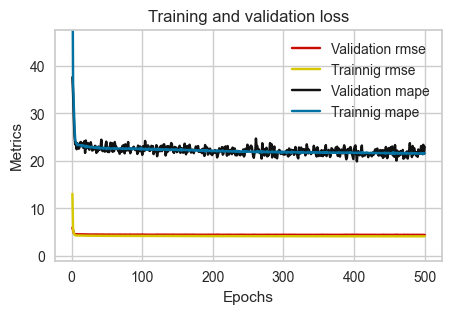

In [242]:
plotme(model8_1_1)

In [243]:
# inputs: distance + hour + roadtypes distance
model8_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model8_1_2

Epoch 1/500
406/406 [==============================] - 1s 1ms/step - loss: 439233.8125 - mape: 56.2187 - rmse: 662.7472 - val_loss: 112753.5703 - val_mape: 35.7946 - val_rmse: 335.7880
Epoch 2/500
406/406 [==============================] - 0s 938us/step - loss: 88659.9531 - mape: 32.2885 - rmse: 297.7582 - val_loss: 82282.0625 - val_mape: 29.0098 - val_rmse: 286.8485
Epoch 3/500
406/406 [==============================] - 0s 925us/step - loss: 69893.8750 - mape: 26.0925 - rmse: 264.3745 - val_loss: 75578.9922 - val_mape: 24.2466 - val_rmse: 274.9164
Epoch 4/500
406/406 [==============================] - 0s 951us/step - loss: 66987.6250 - mape: 23.8407 - rmse: 258.8197 - val_loss: 75054.9297 - val_mape: 24.2363 - val_rmse: 273.9615
Epoch 5/500
406/406 [==============================] - 0s 957us/step - loss: 66764.3906 - mape: 23.5481 - rmse: 258.3881 - val_loss: 75083.9609 - val_mape: 23.2687 - val_rmse: 274.0145
Epoch 6/500
406/406 [==============================] - 0s 959us/step - loss

406/406 [==============================] - 0s 944us/step - loss: 62870.6055 - mape: 21.9908 - rmse: 250.7401 - val_loss: 71911.1562 - val_mape: 21.9576 - val_rmse: 268.1626
Epoch 90/500
406/406 [==============================] - 0s 943us/step - loss: 62882.6016 - mape: 22.0729 - rmse: 250.7640 - val_loss: 72070.0781 - val_mape: 21.5071 - val_rmse: 268.4587
Epoch 91/500
406/406 [==============================] - 0s 976us/step - loss: 62885.9609 - mape: 21.8930 - rmse: 250.7707 - val_loss: 72718.6016 - val_mape: 20.9378 - val_rmse: 269.6639
Epoch 92/500
406/406 [==============================] - 0s 965us/step - loss: 62830.8359 - mape: 22.0234 - rmse: 250.6608 - val_loss: 71988.9141 - val_mape: 21.5706 - val_rmse: 268.3075
Epoch 93/500
406/406 [==============================] - 0s 952us/step - loss: 62806.7344 - mape: 21.8993 - rmse: 250.6127 - val_loss: 71698.4141 - val_mape: 22.8264 - val_rmse: 267.7656
Epoch 94/500
406/406 [==============================] - 0s 947us/step - loss: 62862

Epoch 133/500
406/406 [==============================] - 0s 949us/step - loss: 62413.6797 - mape: 21.7208 - rmse: 249.8273 - val_loss: 71735.1484 - val_mape: 21.6022 - val_rmse: 267.8342
Epoch 134/500
406/406 [==============================] - 0s 956us/step - loss: 62339.4883 - mape: 21.8831 - rmse: 249.6788 - val_loss: 71570.9453 - val_mape: 22.8262 - val_rmse: 267.5275
Epoch 135/500
406/406 [==============================] - 0s 940us/step - loss: 62281.2070 - mape: 21.7485 - rmse: 249.5620 - val_loss: 72074.5859 - val_mape: 20.9054 - val_rmse: 268.4671
Epoch 136/500
406/406 [==============================] - 0s 950us/step - loss: 62307.7148 - mape: 21.7833 - rmse: 249.6151 - val_loss: 71492.6641 - val_mape: 23.2076 - val_rmse: 267.3811
Epoch 137/500
406/406 [==============================] - 0s 939us/step - loss: 62311.3789 - mape: 21.7511 - rmse: 249.6225 - val_loss: 71403.3594 - val_mape: 22.5401 - val_rmse: 267.2141
Epoch 138/500
406/406 [==============================] - 0s 949us

Epoch 177/500
406/406 [==============================] - 0s 928us/step - loss: 61878.6562 - mape: 21.5450 - rmse: 248.7542 - val_loss: 71659.6797 - val_mape: 21.4200 - val_rmse: 267.6933
Epoch 178/500
406/406 [==============================] - 0s 945us/step - loss: 61878.2656 - mape: 21.7593 - rmse: 248.7534 - val_loss: 72252.6172 - val_mape: 20.2789 - val_rmse: 268.7985
Epoch 179/500
406/406 [==============================] - 0s 945us/step - loss: 61815.4141 - mape: 21.5429 - rmse: 248.6271 - val_loss: 71180.1953 - val_mape: 22.5561 - val_rmse: 266.7962
Epoch 180/500
406/406 [==============================] - 0s 937us/step - loss: 61890.4453 - mape: 21.6854 - rmse: 248.7779 - val_loss: 71386.3203 - val_mape: 21.5475 - val_rmse: 267.1822
Epoch 181/500
406/406 [==============================] - 0s 943us/step - loss: 61874.4961 - mape: 21.6467 - rmse: 248.7458 - val_loss: 71506.1797 - val_mape: 21.3256 - val_rmse: 267.4064
Epoch 182/500
406/406 [==============================] - 0s 945us

Epoch 221/500
406/406 [==============================] - 0s 942us/step - loss: 61610.1602 - mape: 21.4999 - rmse: 248.2139 - val_loss: 71707.6328 - val_mape: 23.9621 - val_rmse: 267.7828
Epoch 222/500
406/406 [==============================] - 0s 938us/step - loss: 61839.6406 - mape: 21.5982 - rmse: 248.6758 - val_loss: 71258.7891 - val_mape: 21.4942 - val_rmse: 266.9434
Epoch 223/500
406/406 [==============================] - 0s 949us/step - loss: 61618.2656 - mape: 21.5582 - rmse: 248.2303 - val_loss: 71293.9141 - val_mape: 22.1153 - val_rmse: 267.0092
Epoch 224/500
406/406 [==============================] - 0s 939us/step - loss: 61673.1680 - mape: 21.5520 - rmse: 248.3408 - val_loss: 71467.7891 - val_mape: 21.2141 - val_rmse: 267.3346
Epoch 225/500
406/406 [==============================] - 0s 942us/step - loss: 61537.6797 - mape: 21.5542 - rmse: 248.0679 - val_loss: 71249.8828 - val_mape: 21.7702 - val_rmse: 266.9267
Epoch 226/500
406/406 [==============================] - 0s 943us

Epoch 265/500
406/406 [==============================] - 0s 1ms/step - loss: 61379.4023 - mape: 21.4462 - rmse: 247.7487 - val_loss: 70928.8359 - val_mape: 23.1394 - val_rmse: 266.3247
Epoch 266/500
406/406 [==============================] - 0s 1ms/step - loss: 61528.9062 - mape: 21.5877 - rmse: 248.0502 - val_loss: 71262.9219 - val_mape: 23.2900 - val_rmse: 266.9512
Epoch 267/500
406/406 [==============================] - 0s 1ms/step - loss: 61541.0430 - mape: 21.4213 - rmse: 248.0747 - val_loss: 70868.2266 - val_mape: 22.5116 - val_rmse: 266.2109
Epoch 268/500
406/406 [==============================] - 0s 1ms/step - loss: 61333.8672 - mape: 21.4326 - rmse: 247.6568 - val_loss: 71402.8438 - val_mape: 24.5545 - val_rmse: 267.2131
Epoch 269/500
406/406 [==============================] - 0s 1ms/step - loss: 61402.0195 - mape: 21.6095 - rmse: 247.7943 - val_loss: 71294.7109 - val_mape: 20.8461 - val_rmse: 267.0107
Epoch 270/500
406/406 [==============================] - 0s 1ms/step - loss

Epoch 309/500
406/406 [==============================] - 0s 940us/step - loss: 61167.6602 - mape: 21.4449 - rmse: 247.3210 - val_loss: 70890.2500 - val_mape: 22.0704 - val_rmse: 266.2522
Epoch 310/500
406/406 [==============================] - 0s 932us/step - loss: 61133.0430 - mape: 21.4023 - rmse: 247.2510 - val_loss: 70861.5000 - val_mape: 21.9657 - val_rmse: 266.1982
Epoch 311/500
406/406 [==============================] - 0s 934us/step - loss: 61227.5898 - mape: 21.4365 - rmse: 247.4421 - val_loss: 70730.4844 - val_mape: 22.5460 - val_rmse: 265.9520
Epoch 312/500
406/406 [==============================] - 0s 938us/step - loss: 61251.0508 - mape: 21.3886 - rmse: 247.4895 - val_loss: 70819.5859 - val_mape: 22.4100 - val_rmse: 266.1195
Epoch 313/500
406/406 [==============================] - 0s 945us/step - loss: 61164.2031 - mape: 21.4875 - rmse: 247.3140 - val_loss: 71617.4766 - val_mape: 20.5639 - val_rmse: 267.6144
Epoch 314/500
406/406 [==============================] - 0s 937us

Epoch 353/500
406/406 [==============================] - 0s 953us/step - loss: 61109.4062 - mape: 21.3864 - rmse: 247.2032 - val_loss: 70781.3438 - val_mape: 21.8673 - val_rmse: 266.0476
Epoch 354/500
406/406 [==============================] - 0s 937us/step - loss: 61082.3516 - mape: 21.3942 - rmse: 247.1484 - val_loss: 70829.0391 - val_mape: 21.8571 - val_rmse: 266.1373
Epoch 355/500
406/406 [==============================] - 0s 942us/step - loss: 61176.6992 - mape: 21.4273 - rmse: 247.3392 - val_loss: 70775.5469 - val_mape: 22.0004 - val_rmse: 266.0367
Epoch 356/500
406/406 [==============================] - 0s 988us/step - loss: 61078.6406 - mape: 21.3874 - rmse: 247.1409 - val_loss: 70840.3672 - val_mape: 21.8040 - val_rmse: 266.1585
Epoch 357/500
406/406 [==============================] - 0s 929us/step - loss: 61115.8984 - mape: 21.3749 - rmse: 247.2163 - val_loss: 71205.2891 - val_mape: 21.0008 - val_rmse: 266.8432
Epoch 358/500
406/406 [==============================] - 0s 932us

Epoch 397/500
406/406 [==============================] - 0s 1ms/step - loss: 61037.0625 - mape: 21.4666 - rmse: 247.0568 - val_loss: 70630.7578 - val_mape: 22.3478 - val_rmse: 265.7645
Epoch 398/500
406/406 [==============================] - 0s 1ms/step - loss: 60882.6328 - mape: 21.3280 - rmse: 246.7441 - val_loss: 70673.4922 - val_mape: 22.4133 - val_rmse: 265.8449
Epoch 399/500
406/406 [==============================] - 0s 1ms/step - loss: 60981.6797 - mape: 21.3853 - rmse: 246.9447 - val_loss: 71748.0000 - val_mape: 20.5024 - val_rmse: 267.8582
Epoch 400/500
406/406 [==============================] - 0s 1ms/step - loss: 60976.4180 - mape: 21.3542 - rmse: 246.9340 - val_loss: 71071.6328 - val_mape: 23.8409 - val_rmse: 266.5926
Epoch 401/500
406/406 [==============================] - 0s 1ms/step - loss: 60920.8242 - mape: 21.4250 - rmse: 246.8214 - val_loss: 70754.6641 - val_mape: 21.5682 - val_rmse: 265.9975
Epoch 402/500
406/406 [==============================] - 0s 1ms/step - loss

Epoch 485/500
406/406 [==============================] - 0s 953us/step - loss: 60660.8594 - mape: 21.3182 - rmse: 246.2943 - val_loss: 70410.2969 - val_mape: 22.3389 - val_rmse: 265.3494
Epoch 486/500
406/406 [==============================] - 0s 949us/step - loss: 60542.6211 - mape: 21.2718 - rmse: 246.0541 - val_loss: 70351.4375 - val_mape: 23.2744 - val_rmse: 265.2385
Epoch 487/500
406/406 [==============================] - 0s 944us/step - loss: 60623.7773 - mape: 21.2623 - rmse: 246.2190 - val_loss: 70369.5312 - val_mape: 23.5873 - val_rmse: 265.2726
Epoch 488/500
406/406 [==============================] - 0s 941us/step - loss: 60747.1289 - mape: 21.3337 - rmse: 246.4693 - val_loss: 70781.4062 - val_mape: 22.5502 - val_rmse: 266.0478
Epoch 489/500
406/406 [==============================] - 0s 944us/step - loss: 60711.3789 - mape: 21.2346 - rmse: 246.3968 - val_loss: 70217.5234 - val_mape: 22.7862 - val_rmse: 264.9859
Epoch 490/500
406/406 [==============================] - 0s 948us

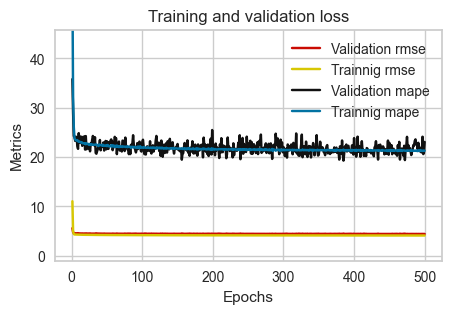

In [244]:
plotme(model8_1_2)

In [245]:
# inputs: distance + roadtypes distance
model8_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model8_1_4

Epoch 1/500
406/406 [==============================] - 1s 867us/step - loss: 1091541.6250 - mape: 99.6503 - rmse: 1044.7687 - val_loss: 1100500.0000 - val_mape: 98.9421 - val_rmse: 1049.0472
Epoch 2/500
406/406 [==============================] - 0s 747us/step - loss: 1058171.0000 - mape: 97.5113 - rmse: 1028.6744 - val_loss: 1051333.5000 - val_mape: 95.7951 - val_rmse: 1025.3456
Epoch 3/500
406/406 [==============================] - 0s 726us/step - loss: 996877.1875 - mape: 93.4939 - rmse: 998.4374 - val_loss: 979227.3750 - val_mape: 91.0307 - val_rmse: 989.5592
Epoch 4/500
406/406 [==============================] - 0s 716us/step - loss: 916419.1250 - mape: 87.9882 - rmse: 957.2979 - val_loss: 891303.0000 - val_mape: 84.9431 - val_rmse: 944.0884
Epoch 5/500
406/406 [==============================] - 0s 707us/step - loss: 823704.1250 - mape: 81.3135 - rmse: 907.5815 - val_loss: 794182.9375 - val_mape: 77.8314 - val_rmse: 891.1694
Epoch 6/500
406/406 [==============================] - 0s

Epoch 45/500
406/406 [==============================] - 0s 714us/step - loss: 67869.4297 - mape: 24.4768 - rmse: 260.5176 - val_loss: 75936.0859 - val_mape: 24.4587 - val_rmse: 275.5650
Epoch 46/500
406/406 [==============================] - 0s 729us/step - loss: 67646.4844 - mape: 24.3525 - rmse: 260.0894 - val_loss: 75816.2891 - val_mape: 24.2467 - val_rmse: 275.3476
Epoch 47/500
406/406 [==============================] - 0s 715us/step - loss: 67469.2031 - mape: 24.3231 - rmse: 259.7484 - val_loss: 75775.4766 - val_mape: 23.9658 - val_rmse: 275.2735
Epoch 48/500
406/406 [==============================] - 0s 705us/step - loss: 67337.4062 - mape: 24.0946 - rmse: 259.4945 - val_loss: 75607.3438 - val_mape: 24.0219 - val_rmse: 274.9679
Epoch 49/500
406/406 [==============================] - 0s 722us/step - loss: 67221.0156 - mape: 23.9562 - rmse: 259.2702 - val_loss: 75510.3359 - val_mape: 23.9941 - val_rmse: 274.7914
Epoch 50/500
406/406 [==============================] - 0s 726us/step 

406/406 [==============================] - 0s 707us/step - loss: 66545.7109 - mape: 23.3750 - rmse: 257.9645 - val_loss: 75248.6250 - val_mape: 23.1855 - val_rmse: 274.3148
Epoch 90/500
406/406 [==============================] - 0s 722us/step - loss: 66538.0234 - mape: 23.3751 - rmse: 257.9496 - val_loss: 75234.0391 - val_mape: 23.2047 - val_rmse: 274.2882
Epoch 91/500
406/406 [==============================] - 0s 733us/step - loss: 66528.3281 - mape: 23.3618 - rmse: 257.9308 - val_loss: 75132.2031 - val_mape: 23.3848 - val_rmse: 274.1025
Epoch 92/500
406/406 [==============================] - 0s 718us/step - loss: 66522.0000 - mape: 23.3862 - rmse: 257.9186 - val_loss: 75135.6172 - val_mape: 23.3630 - val_rmse: 274.1088
Epoch 93/500
406/406 [==============================] - 0s 729us/step - loss: 66522.1172 - mape: 23.3299 - rmse: 257.9188 - val_loss: 75091.5391 - val_mape: 23.4530 - val_rmse: 274.0284
Epoch 94/500
406/406 [==============================] - 0s 732us/step - loss: 66508

Epoch 133/500
406/406 [==============================] - 0s 734us/step - loss: 66311.3906 - mape: 23.4550 - rmse: 257.5100 - val_loss: 74970.6328 - val_mape: 23.2670 - val_rmse: 273.8076
Epoch 134/500
406/406 [==============================] - 0s 737us/step - loss: 66311.2031 - mape: 23.2911 - rmse: 257.5096 - val_loss: 74855.5703 - val_mape: 23.5288 - val_rmse: 273.5975
Epoch 135/500
406/406 [==============================] - 0s 734us/step - loss: 66311.4062 - mape: 23.4505 - rmse: 257.5100 - val_loss: 74907.3516 - val_mape: 23.3906 - val_rmse: 273.6921
Epoch 136/500
406/406 [==============================] - 0s 717us/step - loss: 66298.6094 - mape: 23.4298 - rmse: 257.4852 - val_loss: 75015.6875 - val_mape: 23.1589 - val_rmse: 273.8899
Epoch 137/500
406/406 [==============================] - 0s 723us/step - loss: 66309.9531 - mape: 23.2882 - rmse: 257.5072 - val_loss: 74920.7891 - val_mape: 23.3373 - val_rmse: 273.7166
Epoch 138/500
406/406 [==============================] - 0s 721us

Epoch 177/500
406/406 [==============================] - 0s 733us/step - loss: 66176.5312 - mape: 23.3073 - rmse: 257.2480 - val_loss: 74817.4062 - val_mape: 23.2792 - val_rmse: 273.5277
Epoch 178/500
406/406 [==============================] - 0s 727us/step - loss: 66162.7969 - mape: 23.2438 - rmse: 257.2213 - val_loss: 74692.2500 - val_mape: 23.5954 - val_rmse: 273.2988
Epoch 179/500
406/406 [==============================] - 0s 718us/step - loss: 66161.0469 - mape: 23.4413 - rmse: 257.2179 - val_loss: 74753.8984 - val_mape: 23.4164 - val_rmse: 273.4116
Epoch 180/500
406/406 [==============================] - 0s 738us/step - loss: 66168.7734 - mape: 23.3878 - rmse: 257.2329 - val_loss: 74784.1797 - val_mape: 23.3290 - val_rmse: 273.4669
Epoch 181/500
406/406 [==============================] - 0s 729us/step - loss: 66162.8906 - mape: 23.3238 - rmse: 257.2215 - val_loss: 74773.2812 - val_mape: 23.3520 - val_rmse: 273.4470
Epoch 182/500
406/406 [==============================] - 0s 725us

Epoch 221/500
406/406 [==============================] - 0s 732us/step - loss: 66056.1328 - mape: 23.3664 - rmse: 257.0139 - val_loss: 74652.8281 - val_mape: 23.3732 - val_rmse: 273.2267
Epoch 222/500
406/406 [==============================] - 0s 735us/step - loss: 66046.3125 - mape: 23.3667 - rmse: 256.9948 - val_loss: 74677.2812 - val_mape: 23.3067 - val_rmse: 273.2715
Epoch 223/500
406/406 [==============================] - 0s 721us/step - loss: 66043.1719 - mape: 23.3102 - rmse: 256.9886 - val_loss: 74654.7266 - val_mape: 23.3498 - val_rmse: 273.2302
Epoch 224/500
406/406 [==============================] - 0s 731us/step - loss: 66036.8516 - mape: 23.3828 - rmse: 256.9763 - val_loss: 74742.9922 - val_mape: 23.1622 - val_rmse: 273.3916
Epoch 225/500
406/406 [==============================] - 0s 725us/step - loss: 66038.5625 - mape: 23.2056 - rmse: 256.9797 - val_loss: 74616.1250 - val_mape: 23.4403 - val_rmse: 273.1595
Epoch 226/500
406/406 [==============================] - 0s 730us

Epoch 265/500
406/406 [==============================] - 0s 724us/step - loss: 65954.5859 - mape: 23.3235 - rmse: 256.8163 - val_loss: 74560.2109 - val_mape: 23.3282 - val_rmse: 273.0572
Epoch 266/500
406/406 [==============================] - 0s 716us/step - loss: 65932.0000 - mape: 23.2671 - rmse: 256.7723 - val_loss: 74516.5859 - val_mape: 23.4314 - val_rmse: 272.9773
Epoch 267/500
406/406 [==============================] - 0s 722us/step - loss: 65936.0703 - mape: 23.3367 - rmse: 256.7802 - val_loss: 74612.1172 - val_mape: 23.2164 - val_rmse: 273.1522
Epoch 268/500
406/406 [==============================] - 0s 733us/step - loss: 65938.7734 - mape: 23.2972 - rmse: 256.7855 - val_loss: 74589.3906 - val_mape: 23.2530 - val_rmse: 273.1106
Epoch 269/500
406/406 [==============================] - 0s 757us/step - loss: 65927.1172 - mape: 23.2027 - rmse: 256.7628 - val_loss: 74502.2891 - val_mape: 23.4534 - val_rmse: 272.9511
Epoch 270/500
406/406 [==============================] - 0s 708us

Epoch 309/500
406/406 [==============================] - 0s 731us/step - loss: 65842.0078 - mape: 23.2580 - rmse: 256.5970 - val_loss: 74519.2500 - val_mape: 23.2005 - val_rmse: 272.9821
Epoch 310/500
406/406 [==============================] - 0s 724us/step - loss: 65835.6406 - mape: 23.2962 - rmse: 256.5846 - val_loss: 74562.0703 - val_mape: 23.1140 - val_rmse: 273.0605
Epoch 311/500
406/406 [==============================] - 0s 721us/step - loss: 65838.2031 - mape: 23.2338 - rmse: 256.5896 - val_loss: 74449.7031 - val_mape: 23.3433 - val_rmse: 272.8547
Epoch 312/500
406/406 [==============================] - 0s 715us/step - loss: 65828.3047 - mape: 23.2165 - rmse: 256.5703 - val_loss: 74374.7422 - val_mape: 23.5449 - val_rmse: 272.7173
Epoch 313/500
406/406 [==============================] - 0s 730us/step - loss: 65839.3438 - mape: 23.3618 - rmse: 256.5918 - val_loss: 74512.5234 - val_mape: 23.1946 - val_rmse: 272.9698
Epoch 314/500
406/406 [==============================] - 0s 718us

Epoch 353/500
406/406 [==============================] - 0s 728us/step - loss: 65745.4609 - mape: 23.2328 - rmse: 256.4088 - val_loss: 74369.9531 - val_mape: 23.3220 - val_rmse: 272.7086
Epoch 354/500
406/406 [==============================] - 0s 714us/step - loss: 65745.9297 - mape: 23.2802 - rmse: 256.4097 - val_loss: 74387.5938 - val_mape: 23.2686 - val_rmse: 272.7409
Epoch 355/500
406/406 [==============================] - 0s 714us/step - loss: 65750.4688 - mape: 23.2259 - rmse: 256.4185 - val_loss: 74329.8047 - val_mape: 23.4168 - val_rmse: 272.6349
Epoch 356/500
406/406 [==============================] - 0s 727us/step - loss: 65740.8516 - mape: 23.3738 - rmse: 256.3998 - val_loss: 74424.0781 - val_mape: 23.1771 - val_rmse: 272.8078
Epoch 357/500
406/406 [==============================] - 0s 718us/step - loss: 65744.0703 - mape: 23.2295 - rmse: 256.4061 - val_loss: 74450.4141 - val_mape: 23.1199 - val_rmse: 272.8560
Epoch 358/500
406/406 [==============================] - 0s 726us

Epoch 397/500
406/406 [==============================] - 0s 709us/step - loss: 65667.2109 - mape: 23.1963 - rmse: 256.2561 - val_loss: 74288.7031 - val_mape: 23.3078 - val_rmse: 272.5595
Epoch 398/500
406/406 [==============================] - 0s 724us/step - loss: 65663.5312 - mape: 23.1522 - rmse: 256.2490 - val_loss: 74213.9609 - val_mape: 23.5212 - val_rmse: 272.4224
Epoch 399/500
406/406 [==============================] - 0s 724us/step - loss: 65660.7109 - mape: 23.3499 - rmse: 256.2435 - val_loss: 74314.2188 - val_mape: 23.2341 - val_rmse: 272.6064
Epoch 400/500
406/406 [==============================] - 0s 719us/step - loss: 65657.5312 - mape: 23.2767 - rmse: 256.2372 - val_loss: 74332.7266 - val_mape: 23.1875 - val_rmse: 272.6403
Epoch 401/500
406/406 [==============================] - 0s 730us/step - loss: 65659.0469 - mape: 23.1854 - rmse: 256.2402 - val_loss: 74297.4844 - val_mape: 23.2595 - val_rmse: 272.5757
Epoch 402/500
406/406 [==============================] - 0s 720us

Epoch 441/500
406/406 [==============================] - 0s 717us/step - loss: 65590.7031 - mape: 23.1788 - rmse: 256.1068 - val_loss: 74213.1953 - val_mape: 23.3065 - val_rmse: 272.4210
Epoch 442/500
406/406 [==============================] - 0s 716us/step - loss: 65584.9844 - mape: 23.1586 - rmse: 256.0956 - val_loss: 74174.1016 - val_mape: 23.4157 - val_rmse: 272.3492
Epoch 443/500
406/406 [==============================] - 0s 714us/step - loss: 65585.0391 - mape: 23.2762 - rmse: 256.0958 - val_loss: 74277.0547 - val_mape: 23.1547 - val_rmse: 272.5382
Epoch 444/500
406/406 [==============================] - 0s 719us/step - loss: 65584.0547 - mape: 23.1465 - rmse: 256.0938 - val_loss: 74230.4688 - val_mape: 23.2561 - val_rmse: 272.4527
Epoch 445/500
406/406 [==============================] - 0s 743us/step - loss: 65586.6094 - mape: 23.2250 - rmse: 256.0988 - val_loss: 74263.7266 - val_mape: 23.1767 - val_rmse: 272.5137
Epoch 446/500
406/406 [==============================] - 0s 723us

Epoch 485/500
406/406 [==============================] - 0s 705us/step - loss: 65513.0977 - mape: 23.1993 - rmse: 255.9553 - val_loss: 74211.0859 - val_mape: 23.1437 - val_rmse: 272.4171
Epoch 486/500
406/406 [==============================] - 0s 704us/step - loss: 65516.7461 - mape: 23.1590 - rmse: 255.9624 - val_loss: 74148.3125 - val_mape: 23.2846 - val_rmse: 272.3019
Epoch 487/500
406/406 [==============================] - 0s 702us/step - loss: 65506.4961 - mape: 23.1119 - rmse: 255.9424 - val_loss: 74149.5234 - val_mape: 23.2761 - val_rmse: 272.3041
Epoch 488/500
406/406 [==============================] - 0s 707us/step - loss: 65512.1289 - mape: 23.2166 - rmse: 255.9534 - val_loss: 74184.8281 - val_mape: 23.1884 - val_rmse: 272.3689
Epoch 489/500
406/406 [==============================] - 0s 707us/step - loss: 65507.6328 - mape: 23.2408 - rmse: 255.9446 - val_loss: 74234.7656 - val_mape: 23.0861 - val_rmse: 272.4606
Epoch 490/500
406/406 [==============================] - 0s 712us